Notebook used together with the generic code analysis to plot our results.

In [1]:
import sys,os
#import uproot4 as uproot
#import awkward as ak
import json
import numpy as np
import matplotlib.pyplot as plt
#from fcc_python_tools.locations import loc
#from fcc_python_tools import kinematics_flat
from particle import literals as lp
#from fcc_python_tools import plotting
#import tensorflow as tf
#import zfit
import random
import matplotlib.ticker as tick
from scipy.stats import norm
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.optimize import curve_fit
from seaborn import regplot

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

parameters = {'axes.labelsize': 25,
          'axes.titlesize': 20, 'xtick.labelsize':20,'ytick.labelsize':20, 'figure.titlesize':20, 'legend.fontsize':15 }
plt.rcParams.update(parameters)
import ROOT
rand=0

Welcome to JupyROOT 6.26/10


In [2]:
import xgboost as xgb
import sklearn as skl
import pandas as pd

import numpy as np
import ROOT

x = ROOT.RooRealVar("x", "x", -10, 10)
x_arr = np.random.normal(-1.0, 1.0, (10000,))
datatest = ROOT.RooDataSet.from_numpy({"x": x_arr}, [x])

mean=ROOT.RooRealVar("mu", "mu", 0., -10., 10)
SIGMA = ROOT.RooRealVar(f"SIGMA", "SIGMA", 1., 0., 3.)

Gau_fit = ROOT.RooGaussian("gau","gau",x,mean,SIGMA)

Gau_fit.fitTo(datatest)#,ROOT.RooFit.Extended(),ROOT.RooFit.NumCPU(7))

c222=ROOT.TCanvas()
Xframe = x.frame()
datatest.plotOn(Xframe)
Gau_fit.plotOn(Xframe)
Xframe.Draw()
c222.Draw('x')

for mode in ["sig","Ds2TauNu","Ds2pipipipi0"]:
    for smearing in ["20_3","50_10"]:
        if (mode=="sig"):
            for sol in ["rr","rw","wr","ww"]:
                np.savetxt(fname=f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_B_mean_2_met",X=np.loadtxt(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_smeared"))
                with open(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_B_mean_2_met", "a") as f:
                    np.savetxt(f, np.loadtxt(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_intersec_pi"))
        else:
            for sol in ["--","-+","+-","++"]:
                np.savetxt(fname=f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_B_mean_2_met",X=np.loadtxt(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_smeared"))
                with open(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_B_mean_2_met", "a") as f:
                    np.savetxt(f, np.loadtxt(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_intersec_pi"))
        sol="sel"
        np.savetxt(fname=f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_B_mean_2_met",X=np.loadtxt(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_smeared"))
        with open(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_B_mean_2_met", "a") as f:
            np.savetxt(f, np.loadtxt(f"data_new_method_vertexing/{mode}_{smearing}_{sol}_SV_intersec_pi"))

In [3]:
#0, 0.5, 0.8
probPI0=0.8#0, 0.5, 0.8
SAVEMOD="no"#"yes""no"
eff_vertexing=0.8

In [4]:
listmod=["sig","Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0"]
listvar=["B_FD","eff_reco","eff_pred_sel","p_Kst","p_pi_max_tau_1","p_pi_min_tau_1","p_tau_1","p_pi_max_tau_2","p_pi_min_tau_2","p_tau_2","tau1_FD","tau1_PV_FD","tau2_FD","tau2_PV_FD","tau_1_m2pi_max","tau_1_m2pi_min","tau_1_m3pi","tau_2_m2pi_max","tau_2_m2pi_min","tau_2_m3pi"]
listsmearing=["20-3"]
for i in ["++","--","+-","-+","sel"]:
    listvar.append(f"{i}")

data={}
for mode in listmod:
    for smearing in listsmearing:
        data1={}
        for var in listvar:
            data1[var]=np.loadtxt(f"data_for_sel/{smearing}/{mode}_{var}.txt")
        #adding the p_tau reco variables
        for tau in ["1","2"]:
            data1[f"sel_P_tau_{tau}"]=np.loadtxt(f"data_for_sel/{smearing}/{mode}_P_tau_{tau}_sel.txt")
        for i in ["++","+-","-+","--"]:
            data1[f"{i}_P_tau_1"]=np.loadtxt(f"data_for_sel/{smearing}/{mode}_P_tau_1_{i[0]}.txt")
            data1[f"{i}_P_tau_2"]=np.loadtxt(f"data_for_sel/{smearing}/{mode}_P_tau_2_{i[1]}.txt")       
        data[f"{mode}_{smearing}"]= data1

#eff to obtain a RP candidate wrt the number of event generated and combination of reco efficiency with neutrino method if needed
for mode in listmod:
    for smearing in listsmearing:
        if ((mode=="sig")):
            maxevents=100000
        else:
            maxevents=400000
            data[f"{mode}_{smearing}"][f"eff_reco"][0]=(data[f"{mode}_{smearing}"][f"eff_reco"][0]+data[f"{mode}_{smearing}"][f"eff_reco"][2]+data[f"{mode}_{smearing}"][f"eff_reco"][4]+data[f"{mode}_{smearing}"][f"eff_reco"][6])/4
            data[f"{mode}_{smearing}"][f"eff_reco"][1]=np.sqrt(data[f"{mode}_{smearing}"][f"eff_reco"][1]**2+data[f"{mode}_{smearing}"][f"eff_reco"][3]**2+data[f"{mode}_{smearing}"][f"eff_reco"][5]**2+data[f"{mode}_{smearing}"][f"eff_reco"][7]**2)/4
        data[f"{mode}_{smearing}"][f"eff_RP_candidates"]=len(data[f"{mode}_{smearing}"][f"--"])/maxevents
        data[f"{mode}_{smearing}"][f"eff_RP_candidates_err"]=np.sqrt(data[f"{mode}_{smearing}"][f"eff_RP_candidates"]*(1-data[f"{mode}_{smearing}"][f"eff_RP_candidates"])/maxevents)
        #print(smearing, mode, data[f"{mode}_{smearing}"][f"eff_RP_candidates"])

#add of a var to have class (sig or bkg) for each event and the decay mode on the same principle:
for mode in listmod:
    for smearing in listsmearing:
        data[f"{mode}_{smearing}"]["decay_mode"]=np.array([f'{mode}']*len(data[f"{mode}_{smearing}"]["--"]))
        if (mode=="sig"):
            data[f"{mode}_{smearing}"]["class"]=np.array(['sig']*len(data[f"{mode}_{smearing}"]["--"]))
        else:
            data[f"{mode}_{smearing}"]["class"]=np.array(['bkg']*len(data[f"{mode}_{smearing}"]["--"]))
#print(data[f"sig_{smearing}"]["class"])
#print(len(data[f"sig_{smearing}"]["class"]))

#to build all version by concatenate the +/- solution and duplicate 4 times the previous variables
for mode in listmod:
    for smearing in listsmearing:
        data[f"{mode}_{smearing}"][f"all"]=np.concatenate((data[f"{mode}_{smearing}"][f"++"],data[f"{mode}_{smearing}"][f"+-"],data[f"{mode}_{smearing}"][f"-+"],data[f"{mode}_{smearing}"][f"--"]))
        data[f"{mode}_{smearing}"][f"all_P_tau_1"]=np.concatenate((data[f"{mode}_{smearing}"][f"++_P_tau_1"],data[f"{mode}_{smearing}"][f"+-_P_tau_1"],data[f"{mode}_{smearing}"][f"-+_P_tau_1"],data[f"{mode}_{smearing}"][f"--_P_tau_1"]))
        data[f"{mode}_{smearing}"][f"all_P_tau_2"]=np.concatenate((data[f"{mode}_{smearing}"][f"++_P_tau_2"],data[f"{mode}_{smearing}"][f"+-_P_tau_2"],data[f"{mode}_{smearing}"][f"-+_P_tau_2"],data[f"{mode}_{smearing}"][f"--_P_tau_2"]))
        for var in ["class","decay_mode","B_FD","p_Kst","p_pi_max_tau_1","p_pi_min_tau_1","p_tau_1","p_pi_max_tau_2","p_pi_min_tau_2","p_tau_2","tau1_FD","tau1_PV_FD","tau2_FD","tau2_PV_FD","tau_1_m2pi_max","tau_1_m2pi_min","tau_1_m3pi","tau_2_m2pi_max","tau_2_m2pi_min","tau_2_m3pi"]:
            data[f"{mode}_{smearing}"][f"all_{var}"]=np.concatenate((data[f"{mode}_{smearing}"][f"{var}"],data[f"{mode}_{smearing}"][f"{var}"],data[f"{mode}_{smearing}"][f"{var}"],data[f"{mode}_{smearing}"][f"{var}"]))


In [5]:

listmod=["sig","Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0"]
#BF_list={"sig":9.57*10**(-11),"Bd2KstDsDsDs2TauNu":5.79*10**(-10),"Bd2KstDsDsDs2pipipipi0":7.35*10**(-10),"Bd2KstDsTauNuDs2TauNu":3.59*10**(-10),"Bd2KstDsDsDs2pipipipi0pi0":5.17*10**(-8),"Bd2KstDsstDsDsst2DsgammaDs2Taunu":1.83*10**(-9),"Bd2KstDsDsDs2TaunuDs2pipipipi0":6.52*10**(-10), "Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0":7.51*10**(-9),"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0":5.47*10**(-9), "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0":1.63*10**(-7)}
BF_list={"sig":9.57*10**(-11),"Bd2KstDsDsDs2TauNu":1.14*10**(-10),"Bd2KstDsDsDs2pipipipi0":1.45*10**(-10),"Bd2KstDsTauNuDs2TauNu":3.59*10**(-10),"Bd2KstDsDsDs2pipipipi0pi0":1.02*10**(-8),"Bd2KstDsstDsDsst2DsgammaDs2Taunu":3.60*10**(-10),"Bd2KstDsDsDs2TaunuDs2pipipipi0":1.28*10**(-10), "Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0":7.51*10**(-9),"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0":1.08*10**(-9), "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0":3.22*10**(-8)}
# "Bd2KstDsstDsDsst2DsgammaDs2Taunu":1.83*10**(-9)*0.935 from BF(Dsstar->Ds gamma)
#obtain mass in plot window, in cut study window and the associated eff
for mode in listmod:
    for smearing in listsmearing:
        for i in ["sel","all"]:
                data[f"{mode}_{smearing}"][f"{i}_no_0"]=data[f"{mode}_{smearing}"][f"{i}"][data[f"{mode}_{smearing}"][f"{i}"]!=0]
                data[f"{mode}_{smearing}"][f"{i}_in_window"]=((data[f"{mode}_{smearing}"][f"{i}_no_0"]<6)*((data[f"{mode}_{smearing}"][f"{i}_no_0"]>4.6)))
                data[f"{mode}_{smearing}"][f"{i}_eff_plot_window"]=np.count_nonzero(data[f"{mode}_{smearing}"][f"{i}_in_window"])/len(data[f"{mode}_{smearing}"][f"{i}_no_0"])
                #print(data[f"{mode}_{smearing}"][f"{i}_eff_window"])
                data[f"{mode}_{smearing}"][f"{i}_cut_plot_window"]=(data[f"{mode}_{smearing}"][f"{i}"]!=0)*(data[f"{mode}_{smearing}"][f"{i}"]>4.6)*(data[f"{mode}_{smearing}"][f"{i}"]<6)
                data[f"{mode}_{smearing}"][f"{i}_plot"]=data[f"{mode}_{smearing}"][f"{i}"][data[f"{mode}_{smearing}"][f"{i}_cut_plot_window"]]
                data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]=6*(10**12)*BF_list[f"{mode}"]*data[f"{mode}_{smearing}"][f"eff_RP_candidates"]*data[f"{mode}_{smearing}"][f"eff_reco"][0]*data[f"{mode}_{smearing}"][f"{i}_eff_plot_window"]*eff_vertexing
                data[f"{mode}_{smearing}"][f"{i}_in_cut_window"]=((data[f"{mode}_{smearing}"][f"{i}_no_0"]<5.6)*((data[f"{mode}_{smearing}"][f"{i}_no_0"]>5)))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut_study_window"]=np.count_nonzero(data[f"{mode}_{smearing}"][f"{i}_in_cut_window"])/len(data[f"{mode}_{smearing}"][f"{i}_no_0"])
                if(i=="sel"): print("Eff to be in cut window for {} {} : {}".format(smearing,mode,data[f"{mode}_{smearing}"][f"{i}_eff_cut_study_window"]))
                data[f"{mode}_{smearing}"][f"{i}_cut_cut_window"]=(data[f"{mode}_{smearing}"][f"{i}"]!=0)*(data[f"{mode}_{smearing}"][f"{i}"]>5)*(data[f"{mode}_{smearing}"][f"{i}"]<5.6)
                data[f"{mode}_{smearing}"][f"{i}_cut_study"]=data[f"{mode}_{smearing}"][f"{i}"][data[f"{mode}_{smearing}"][f"{i}_cut_cut_window"]]
                data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]=6*(10**12)*BF_list[f"{mode}"]*data[f"{mode}_{smearing}"][f"eff_RP_candidates"]*data[f"{mode}_{smearing}"][f"eff_reco"][0]*data[f"{mode}_{smearing}"][f"{i}_eff_cut_study_window"]*eff_vertexing

#to obtain cuted variable w.r.t. the cut window study for each of the sol
for var in ["class","decay_mode","B_FD","p_Kst","p_pi_max_tau_1","p_pi_min_tau_1","p_tau_1","p_pi_max_tau_2","p_pi_min_tau_2","p_tau_2","tau1_FD","tau1_PV_FD","tau2_FD","tau2_PV_FD","tau_1_m2pi_max","tau_1_m2pi_min","tau_1_m3pi","tau_2_m2pi_max","tau_2_m2pi_min","tau_2_m3pi"]:
    for mode in listmod:
        for smearing in listsmearing:
            for i in ["sel","all"]:
                if (i=="all"):
                    add_var="all_"
                else:
                    add_var=""
                data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]=data[f"{mode}_{smearing}"][f"{add_var}{var}"][data[f"{mode}_{smearing}"][f"{i}_cut_cut_window"]]
                data[f"{mode}_{smearing}"][f"{i}_plot_{var}"]=data[f"{mode}_{smearing}"][f"{add_var}{var}"][data[f"{mode}_{smearing}"][f"{i}_cut_plot_window"]]
                data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_1"]=data[f"{mode}_{smearing}"][f"{i}_P_tau_1"][data[f"{mode}_{smearing}"][f"{i}_cut_cut_window"]]
                data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_1"]=data[f"{mode}_{smearing}"][f"{i}_P_tau_1"][data[f"{mode}_{smearing}"][f"{i}_cut_plot_window"]]
                data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_2"]=data[f"{mode}_{smearing}"][f"{i}_P_tau_2"][data[f"{mode}_{smearing}"][f"{i}_cut_cut_window"]]
                data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_2"]=data[f"{mode}_{smearing}"][f"{i}_P_tau_2"][data[f"{mode}_{smearing}"][f"{i}_cut_plot_window"]]

#to obtain weights to normalize each sample in cuts study plots  
for mode in listmod:
    for smearing in listsmearing:
        for i in ["sel","all"]:
            data[f"{mode}_{smearing}"][f"{i}_weights"]=np.ones(len(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_FD"]))/len(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_FD"])

Eff to be in cut window for 20-3 sig : 0.8099281175122408
Eff to be in cut window for 20-3 Bd2KstDsDsDs2TauNu : 0.21255626628760957
Eff to be in cut window for 20-3 Bd2KstDsDsDs2pipipipi0 : 0.2354485277333942
Eff to be in cut window for 20-3 Bd2KstDsTauNuDs2TauNu : 0.2594591440823828
Eff to be in cut window for 20-3 Bd2KstDsDsDs2pipipipi0pi0 : 0.3384181543653966
Eff to be in cut window for 20-3 Bd2KstDsstDsDsst2DsgammaDs2Taunu : 0.12652150041954566
Eff to be in cut window for 20-3 Bd2KstDsDsDs2TaunuDs2pipipipi0 : 0.22225784969045212
Eff to be in cut window for 20-3 Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 : 0.2128554424017987
Eff to be in cut window for 20-3 Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 : 0.29176106109013455
Eff to be in cut window for 20-3 Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 : 0.22237978262482055


In [6]:
np.sqrt(0.47*0.21*0.08*0.59*0.24)

0.033437607569920424

mode="Bd2KstDsDsDs2pipipipi0"
smearing="20_3"
i="sel"
print(len(data[f"{mode}_{smearing}"][f"{i}_P_tau_1"]))
print(len(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]))
print(len(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"]))
print(len(np.loadtxt(f"data_new_method_vertexing/{mode}_{smearing}_SV_{SVMOD}_P_tau_1_sel")))

Cut study:

In [7]:
check_correlation=False#do you want to check correlation m-variables

In [8]:
for i in ["sel","all"]:
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
            #print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]))
        significance=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        purity=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/denom_signi
        data[f"sig_{smearing}"][f"{i}_base_signi"]=significance
        print('Base significance on cut window for {} smearing and {} sol: {}'.format(smearname,i,significance))
        print('Base purity on cut window for {} smearing and {} sol: {}'.format(smearname,i,purity))

for i in ["sel","all"]:
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
            #print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]))
        significancenopi0=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        puritynopi0=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/denom_signinopi0
        data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"]=significancenopi0
        print('Base significance without pi0 bkgs on cut window for {} smearing and {} sol: {}'.format(smearname,i,significancenopi0))
        print('Base purity without pi0 bkgs on cut window for {} smearing and {} sol: {}'.format(smearname,i,puritynopi0))
     

Base significance on cut window for 20-3 smearing and sel sol: 0.7753975018254976
Base purity on cut window for 20-3 smearing and sel sol: 0.004208847213110838
Base significance on cut window for 20-3 smearing and all sol: 0.5407773926857369
Base purity on cut window for 20-3 smearing and all sol: 0.0025835754257855156
Base significance without pi0 bkgs on cut window for 20-3 smearing and sel sol: 6.419510888675032
Base purity without pi0 bkgs on cut window for 20-3 smearing and sel sol: 0.28848168449063377
Base significance without pi0 bkgs on cut window for 20-3 smearing and all sol: 4.491900792425052
Base purity without pi0 bkgs on cut window for 20-3 smearing and all sol: 0.17825610051247606


Application of the $\pi^0$ detection rate and recomputation of the significance:

In [9]:
probpi0k=probPI0
rescale1pi0=(1-probpi0k)
rescale2pi0=(1-probpi0k)**2

for i in ["sel","all"]:
    for smearing in listsmearing:
        for mode in listmod:
            if ((mode=='Bd2KstDsDsDs2pipipipi0')|(mode=='Bd2KstDsDsDs2pipipipi0pi0')|(mode=="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]*rescale2pi0
                data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]*rescale2pi0
            elif ((mode=='Bd2KstDsDsDs2TaunuDs2pipipipi0')|(mode=="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")|(mode=="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")):
                data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]*rescale1pi0
                data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]*rescale1pi0
            else:
                data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
                data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]


for i in ["sel","all"]:
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
            #print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]))
        significance=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        purity=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/denom_signi
        data[f"sig_{smearing}"][f"{i}_base_signi"]=significance
        print('Base significance on cut window for {} smearing and {} sol: {}'.format(smearname,i,significance))
        print('Base purity on cut window for {} smearing and {} sol: {}'.format(smearname,i,purity))
        
for i in ["sel","all"]:
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
            #print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]))
        significancenopi0=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        puritynopi0=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/denom_signinopi0
        data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"]=significancenopi0
        print('Base significance without pi0 bkgs on cut window for {} smearing and {} sol: {}'.format(smearname,i,significancenopi0))
        print('Base purity without pi0 bkgs on cut window for {} smearing and {} sol: {}'.format(smearname,i,puritynopi0))
     

Base significance on cut window for 20-3 smearing and sel sol: 2.834248043222933
Base purity on cut window for 20-3 smearing and sel sol: 0.056232847608825916
Base significance on cut window for 20-3 smearing and all sol: 1.9735340137750412
Base purity on cut window for 20-3 smearing and all sol: 0.03440910064941334
Base significance without pi0 bkgs on cut window for 20-3 smearing and sel sol: 6.419510888675032
Base purity without pi0 bkgs on cut window for 20-3 smearing and sel sol: 0.28848168449063377
Base significance without pi0 bkgs on cut window for 20-3 smearing and all sol: 4.491900792425052
Base purity without pi0 bkgs on cut window for 20-3 smearing and all sol: 0.17825610051247606


In [10]:
listsol=["sel"]

mass = ROOT.RooRealVar("mass", "mass", 5., 6.)
bins=int((6-5)/0.03)
npsigmass=np.array(data[f"sig_{smearing}"][f"sel_plot"])

signal_mass = ROOT.RooDataSet.from_numpy(data={"mass": npsigmass}, variables=[mass])
#np.savetxt('data1.txt',X=npsigmass)
low = 4.6
high = 6

rand+=1

#signal fit
#crystal ball parameters
mu=ROOT.RooRealVar(f"mu_{rand}", f"mu_{rand}", lp.B_0.mass/1000., low, high)
sigma = ROOT.RooRealVar(f"sigma_{rand}", f"sigma_{rand}", 0.5, 0., 2.)
alphaR = ROOT.RooRealVar(f"alphaR_{rand}", f"alphaR_{rand}", 0.2, 0., 5.)
nR = ROOT.RooRealVar(f"nR_{rand}", f"nR_{rand}", 10., 0., 200.)
alphaL = ROOT.RooRealVar(f"alphaL_{rand}", f"alphaL_{rand}", 0.2, 0., 5.)
nL = ROOT.RooRealVar(f"nL_{rand}", f"nL_{rand}", 10., 0., 200.)
# Core gaussian parameters
sigmaG1 = ROOT.RooRealVar(f"sigmaG1_{rand}", f"sigmaG1_{rand}", 0.015, 0., 1)
# Fractions
frac = ROOT.RooRealVar(f"frac_{rand}", f"frac_{rand}", 0.5, 0., 1.)

#signal model
CB = ROOT.RooCrystalBall(f"CB_{rand}",f"CB_{rand}",x=mass,x0=mu,sigmaLR=sigma,alphaR=alphaR, nR=nR,alphaL=alphaL, nL=nL )
Gau = ROOT.RooGaussian(f"gau_{rand}",f"gau_{rand}",_x=mass,_mean=mu,_sigma=sigmaG1)
sig_fit= ROOT.RooAddPdf( f"sig_fit_{rand}",f"sig_fit_{rand}",CB, Gau,frac)
minimiz=ROOT.RooFit.Minimizer("Minuit2","migrad")
sig_fit.fitTo(signal_mass,minimiz)#,ROOT.RooFit.Extended(),ROOT.RooFit.NumCPU(7))
c22=ROOT.TCanvas()
Mframe = mass.frame(bins)
signal_mass.plotOn(Mframe)
sig_fit.plotOn(Mframe)
Mframe.Draw()
c22.Draw('mass')

signal_mass_toy = sig_fit.generate(mass,200)
ROOT.SetOwnership(signal_mass_toy, True) # because generate returns an owning pointer

In [89]:
print(sys.version)

3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:13) [Clang 14.0.6 ]


Cell to cut into the cutted data:

cut_var=''
for mode in listmod:
    for smearing in listsmearing:
        if (mode == "sig"):
            for i in ["rr","sel","all"]:
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_cut_window"]=data[f"{mode}_{smearing}"][f"{i}_cut_{cut_var}"]>3
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_eff_cut_window"]=np.count_nonzero(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_cut_window"])/len(data[f"{mode}_{smearing}"][f"{i}_cut_{cut_var}"])
                #print(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_eff_cut_window"])
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]=data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_cut_window"]
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study"]=data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]]
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study_true_number"]=data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study_true_number"]*data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_eff_cut_window"]
        else:
            for i in ["--","sel","all"]:
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_cut_window"]=data[f"{mode}_{smearing}"][f"{i}_cut_{cut_var}"]>3
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_eff_cut_window"]=np.count_nonzero(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_cut_window"])/len(data[f"{mode}_{smearing}"][f"{i}_cut_{cut_var}"])
                #print(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_eff_cut_window"])
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]=data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_cut_window"]
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study"]=data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]]
                data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study_true_number"]=data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study_true_number"]*data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_eff_cut_window"]
"""for i ["rr","sel","all"]:
    mode="sig"
    for smearing in listsmearing:
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_no_0"]=(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"]!=0)
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_window"]=((data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_no_0"]<6)((data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_no_0"]>4.6)))
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_eff_window"]=len(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_window"])/len(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_no_0"])
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_plot_window"]=(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"]!=0)*(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"]>4.6)*(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"]<6)
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_plot"]=data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"][data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_plot_window"]]
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_cut_window"]=((data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_no_0"]<5.6)((data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_no_0"]>5)))
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_eff_cut_window"]=len(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_in_cut_window"])/len(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_no_0"])
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]=(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"]!=0)*(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"]>5)*(data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"]<5.6)
        data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_study"]=data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}"][data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]]
"""
#to obtain cuted variable w.r.t. the cut window study for each of the sol
for var in ["class","decay_mode","missing_E_same_hem","dist_inter_k-SVRP","dist_inter_pi-SVRP","dist_inter_k-SVMC","dist_inter_pi-SVMC","tau1_FD","tau2_FD","dist_inter_pi-inter_kRP","is_SV_in_plan_PV-TV1-TV2",f"sel_SV_{SVMOD}_selection_dif_Ptau_reco-Ptau_pred","mean_thrustangle","is_signal_in_E_min_hem","thrust_E_sig_hem","thrust_E_no_sig_hem","E_tot_sig","E_tot_tau","Kst_k_D0","Kst_k_Z0","Kst_pi_D0","Kst_pi_Z0","tau_1_Z0_max","tau_2_Z0_max","tau_1_D0_max","tau_2_D0_max","tau_1_Z0_mean","tau_2_Z0_mean","tau_1_D0_mean","tau_2_D0_mean","Kst_k_D0_abs","Kst_k_Z0_abs","Kst_pi_D0_abs","Kst_pi_Z0_abs","tau_1_Z0_abs_max","tau_2_Z0_abs_max","tau_1_D0_abs_max","tau_2_D0_abs_max","tau_1_Z0_abs_mean","tau_2_Z0_abs_mean","tau_1_D0_abs_mean","tau_2_D0_abs_mean"]:
    for mode in listmod:
        for smearing in listsmearing:
            if (mode == "sig"):
                for i in ["rr","sel","all"]:
                    data[f"{mode}_{smearing}"][f"{i}_cut_{var}"]=data[f"{mode}_{smearing}"][f"{i}_cut_{var}"][data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]]
            else:
                for i in ["--","sel","all"]:
                    data[f"{mode}_{smearing}"][f"{i}_cut_{var}"]=data[f"{mode}_{smearing}"][f"{i}_cut_{var}"][data[f"{mode}_{smearing}"][f"{i}_SV_{SVMOD}_cut_cut_window"]]
#print(data[f"sig_20_3"][f"rr_cut_missing_E_same_hem"])
#to obtain weights to normalize each sample in cuts study plots  
for mode in listmod:
    for smearing in listsmearing:
        for i in ["--","sel","all"]:
            if ((mode=="sig")&(i=="--")):
                i="rr"
            data[f"{mode}_{smearing}"][f"{i}_weights"]=np.ones(len(data[f"{mode}_{smearing}"][f"{i}_cut_tau1_FD"]))/len(data[f"{mode}_{smearing}"][f"{i}_cut_tau1_FD"])
            

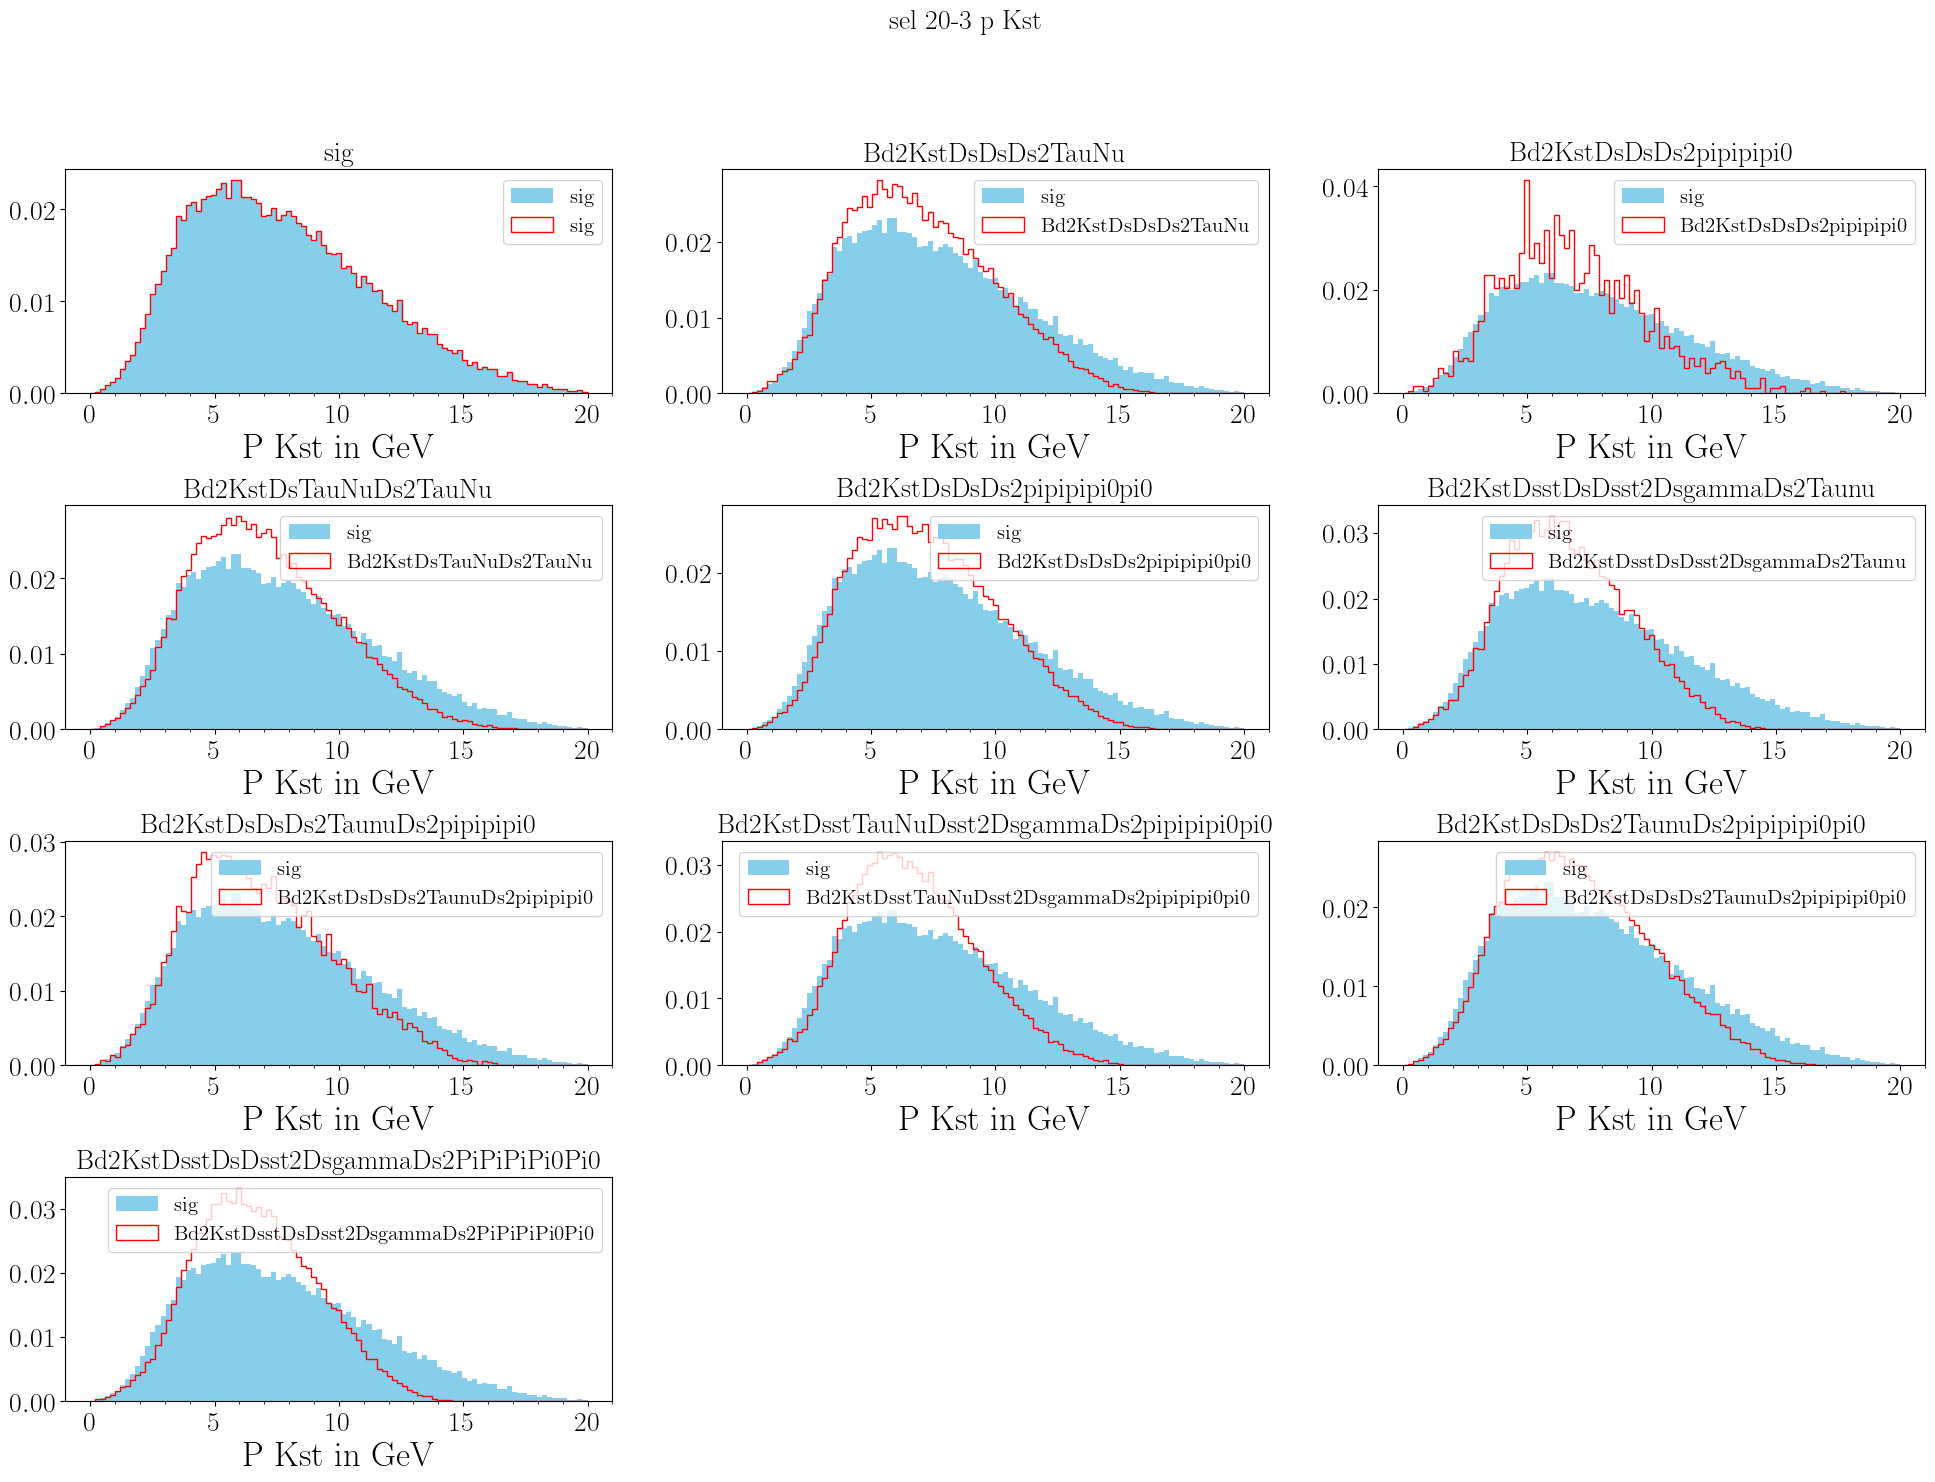

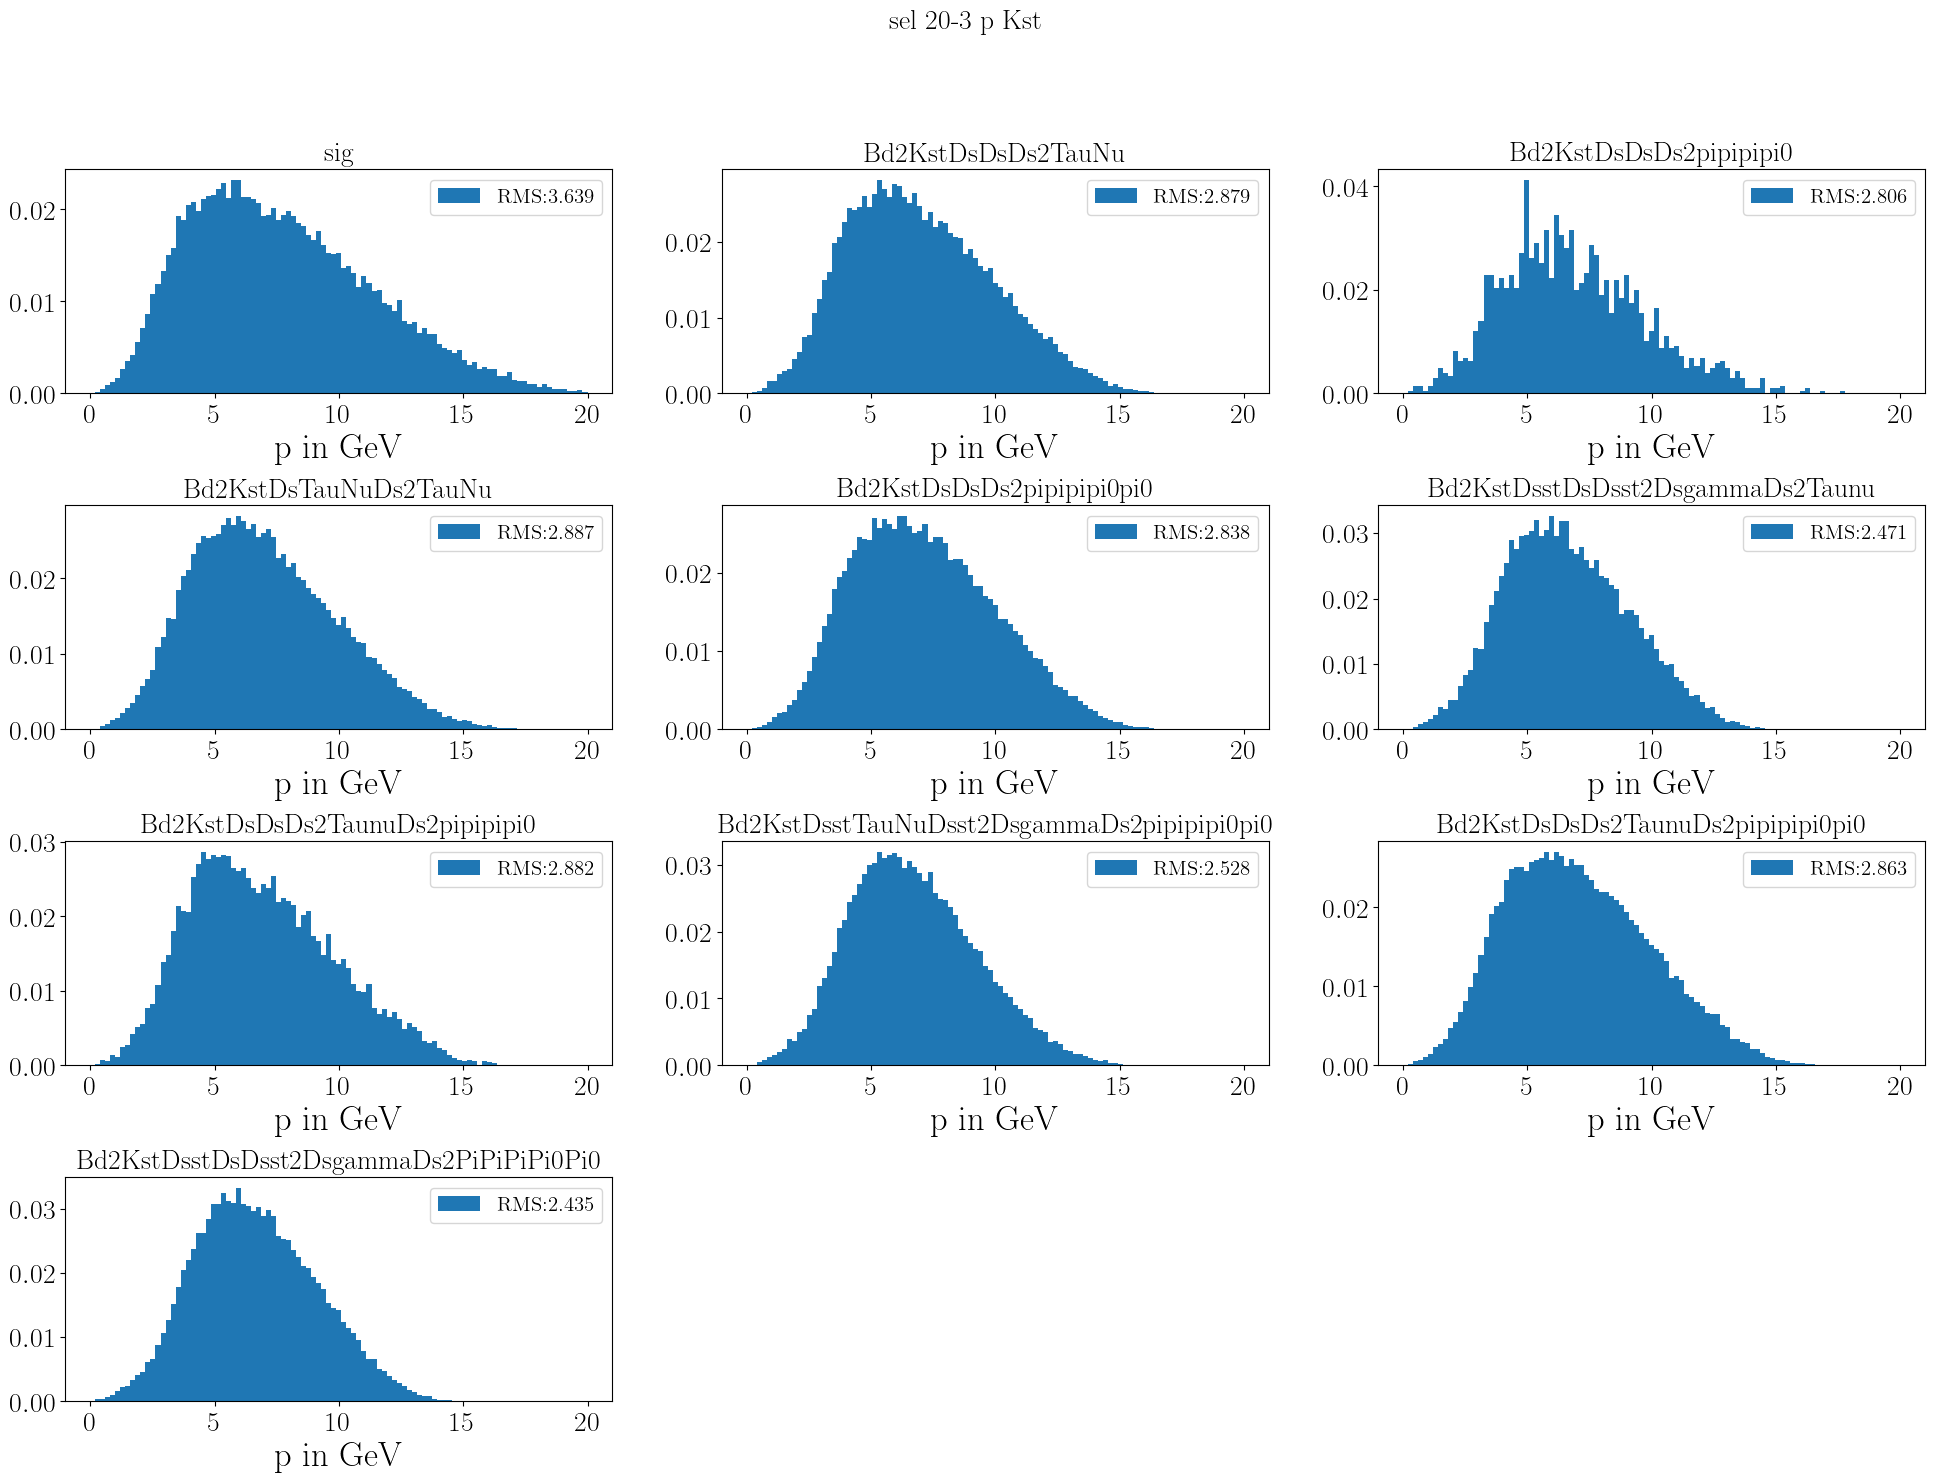

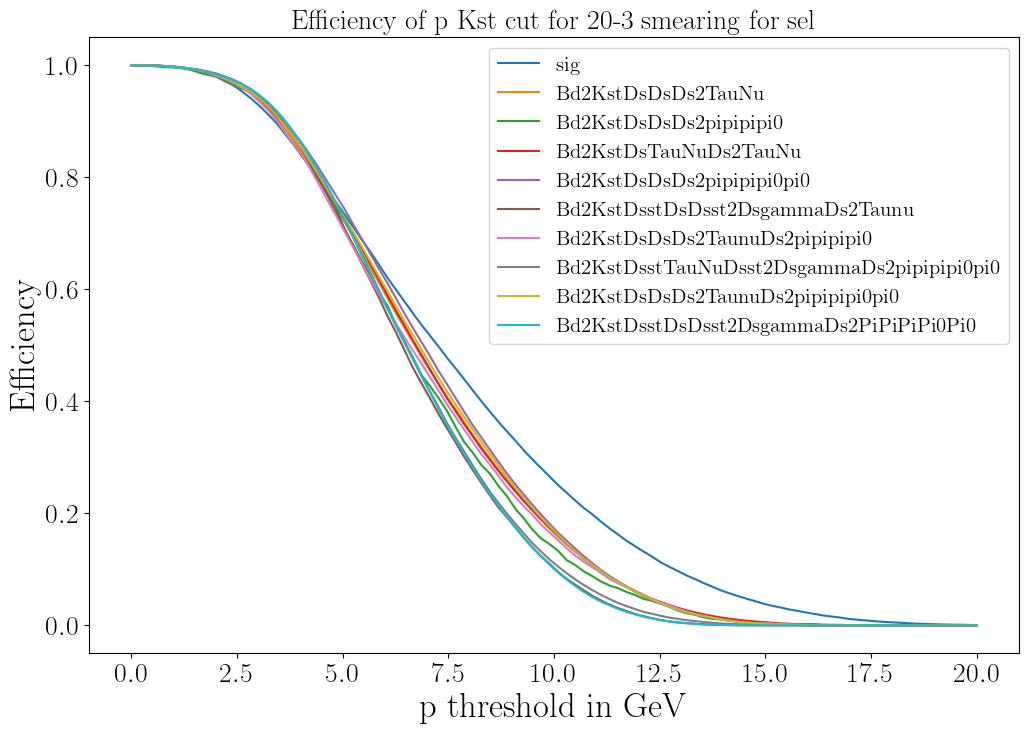

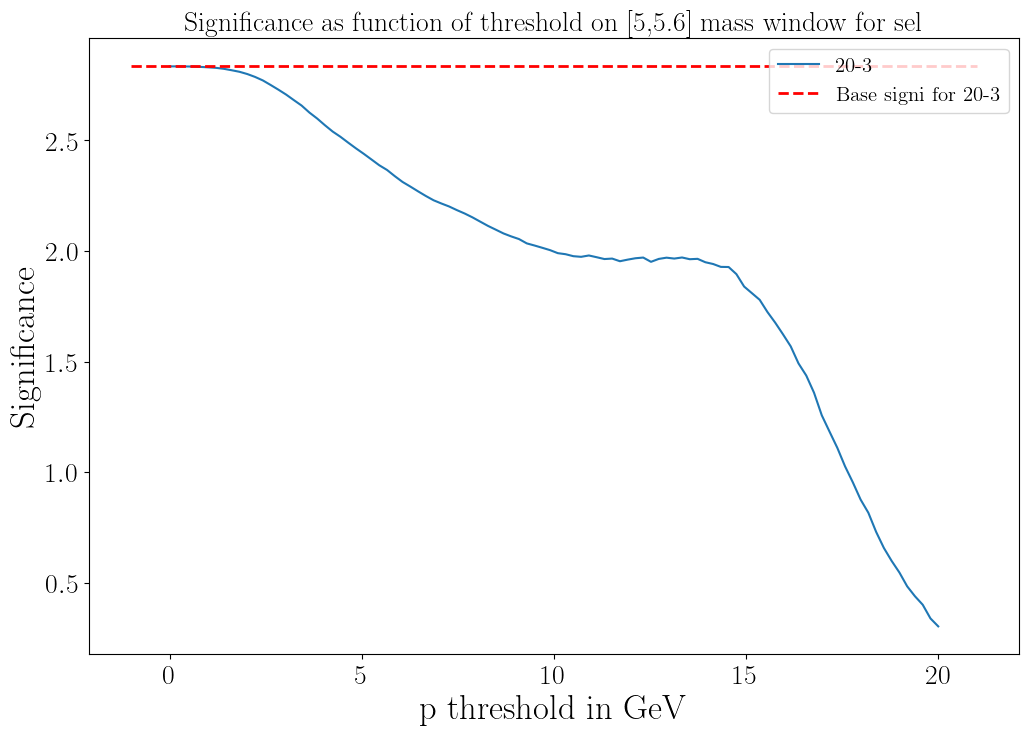

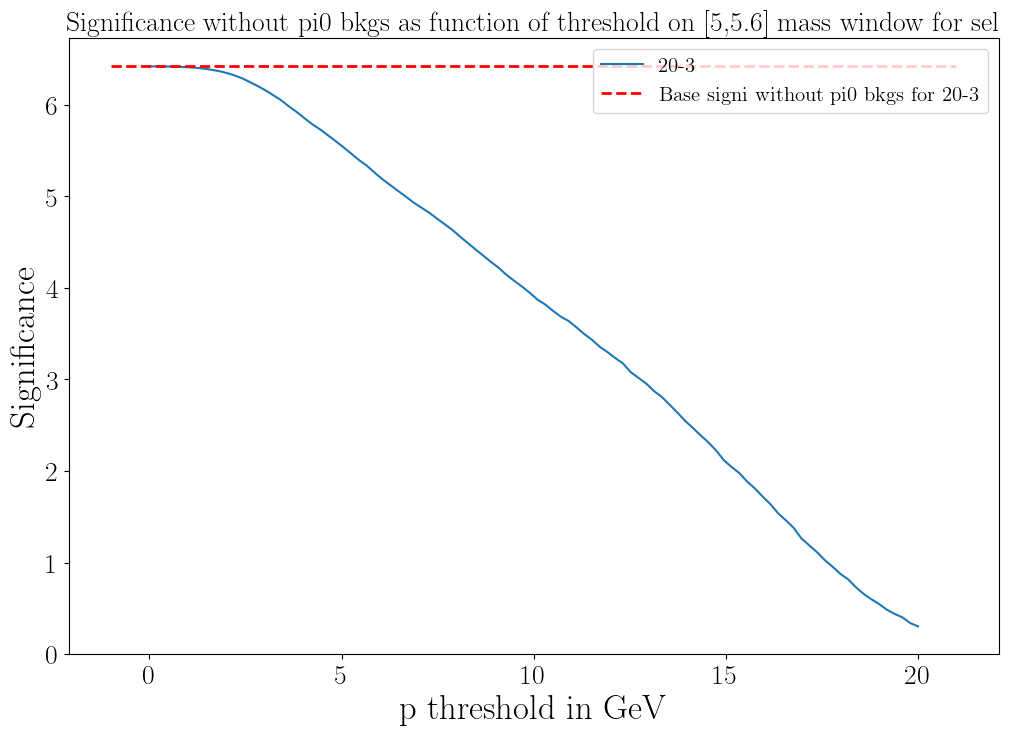

In [90]:
var=f"p_Kst"
varname=var.replace('_',' ')
Tlist=np.linspace(0,20,100)

if (check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            smearname=smearing
            plt.figure(figsize=(24, 16))
            plt.subplots_adjust(hspace=0.5)
            plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
            for n, mode in enumerate(listmod):
                ax = plt.subplot(3, 4, n + 1)
                regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"], x_bins=100, ax=ax)
                ax.set_xlabel(f'M in GeV')
                ax.set_ylabel(f'{varname}')
                ax.set_title(f'{mode}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(data[f"sig_{smearing}"][f"{i}_cut_study_{var}"],bins=Tlist,weights=data[f"sig_{smearing}"][f"{i}_weights"],label=f'sig', color='skyblue')
            ax.hist(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"],bins=Tlist,weights=data[f"{mode}_{smearing}"][f"{i}_weights"],label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('P Kst in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"],bins=Tlist,weights=data[f"{mode}_{smearing}"][f"{i}_weights"],label=f"RMS:{RMS:.3f}")
            ax.set_xlabel('p in GeV')
            ax.set_title(f'{mode}')
            plt.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]>T)
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cut for {smearname} smearing for {nami}')
        for mode in listmod:
            if ((mode!="sig")&(i=="rr")):
                i="--"
            if ((mode=="sig")&(i=="--")):
                i="rr"
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('p threshold in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('p threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('p threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1002392713.py:76: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1002392713.py:92: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)


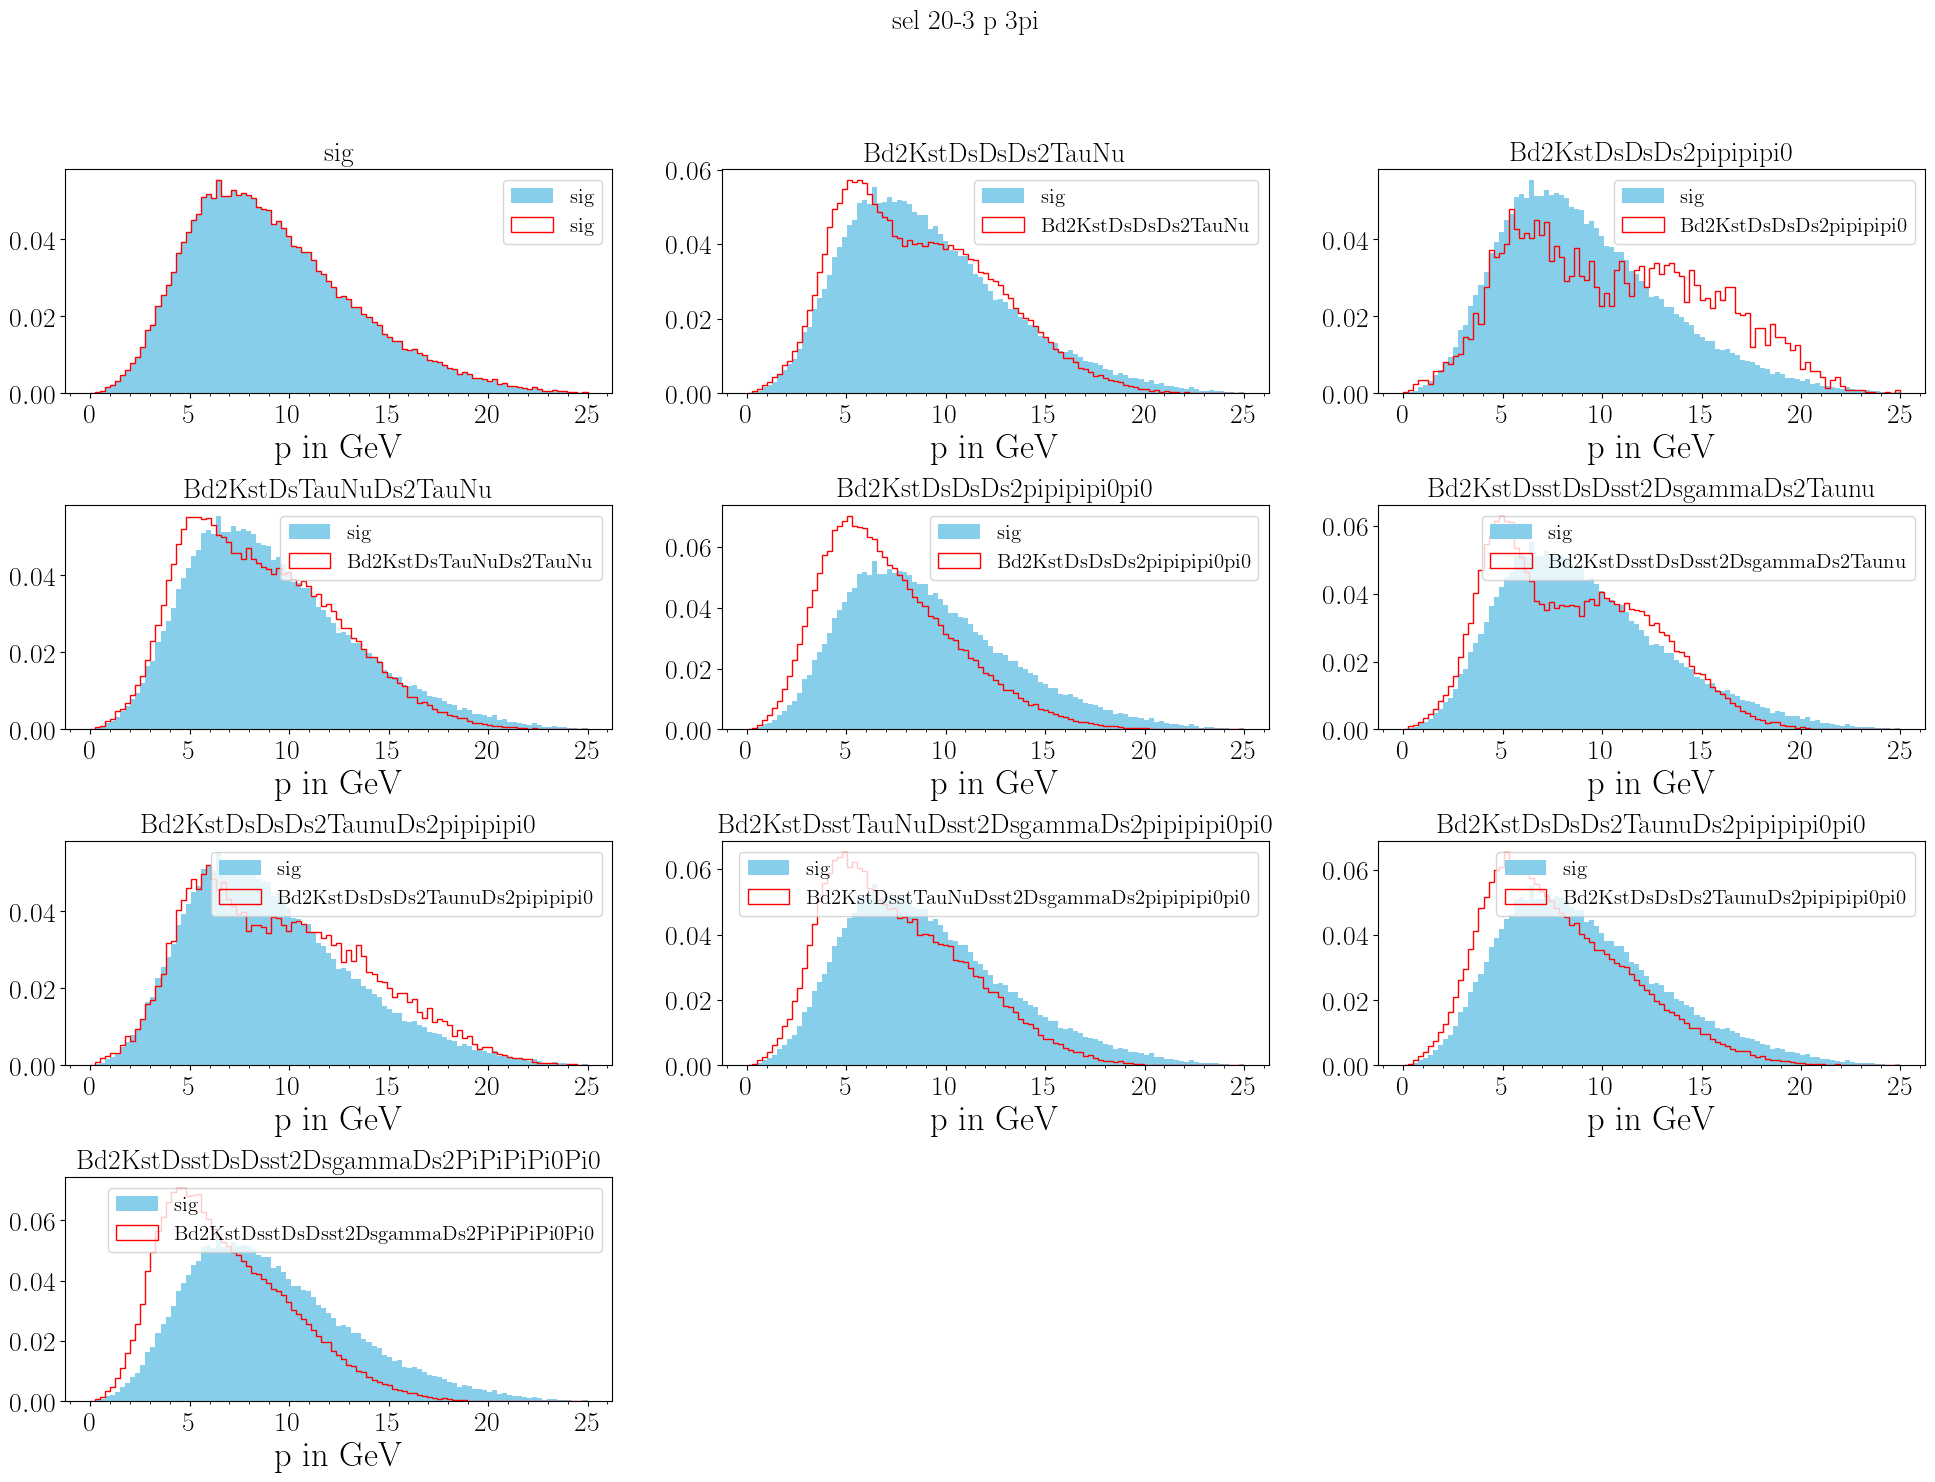

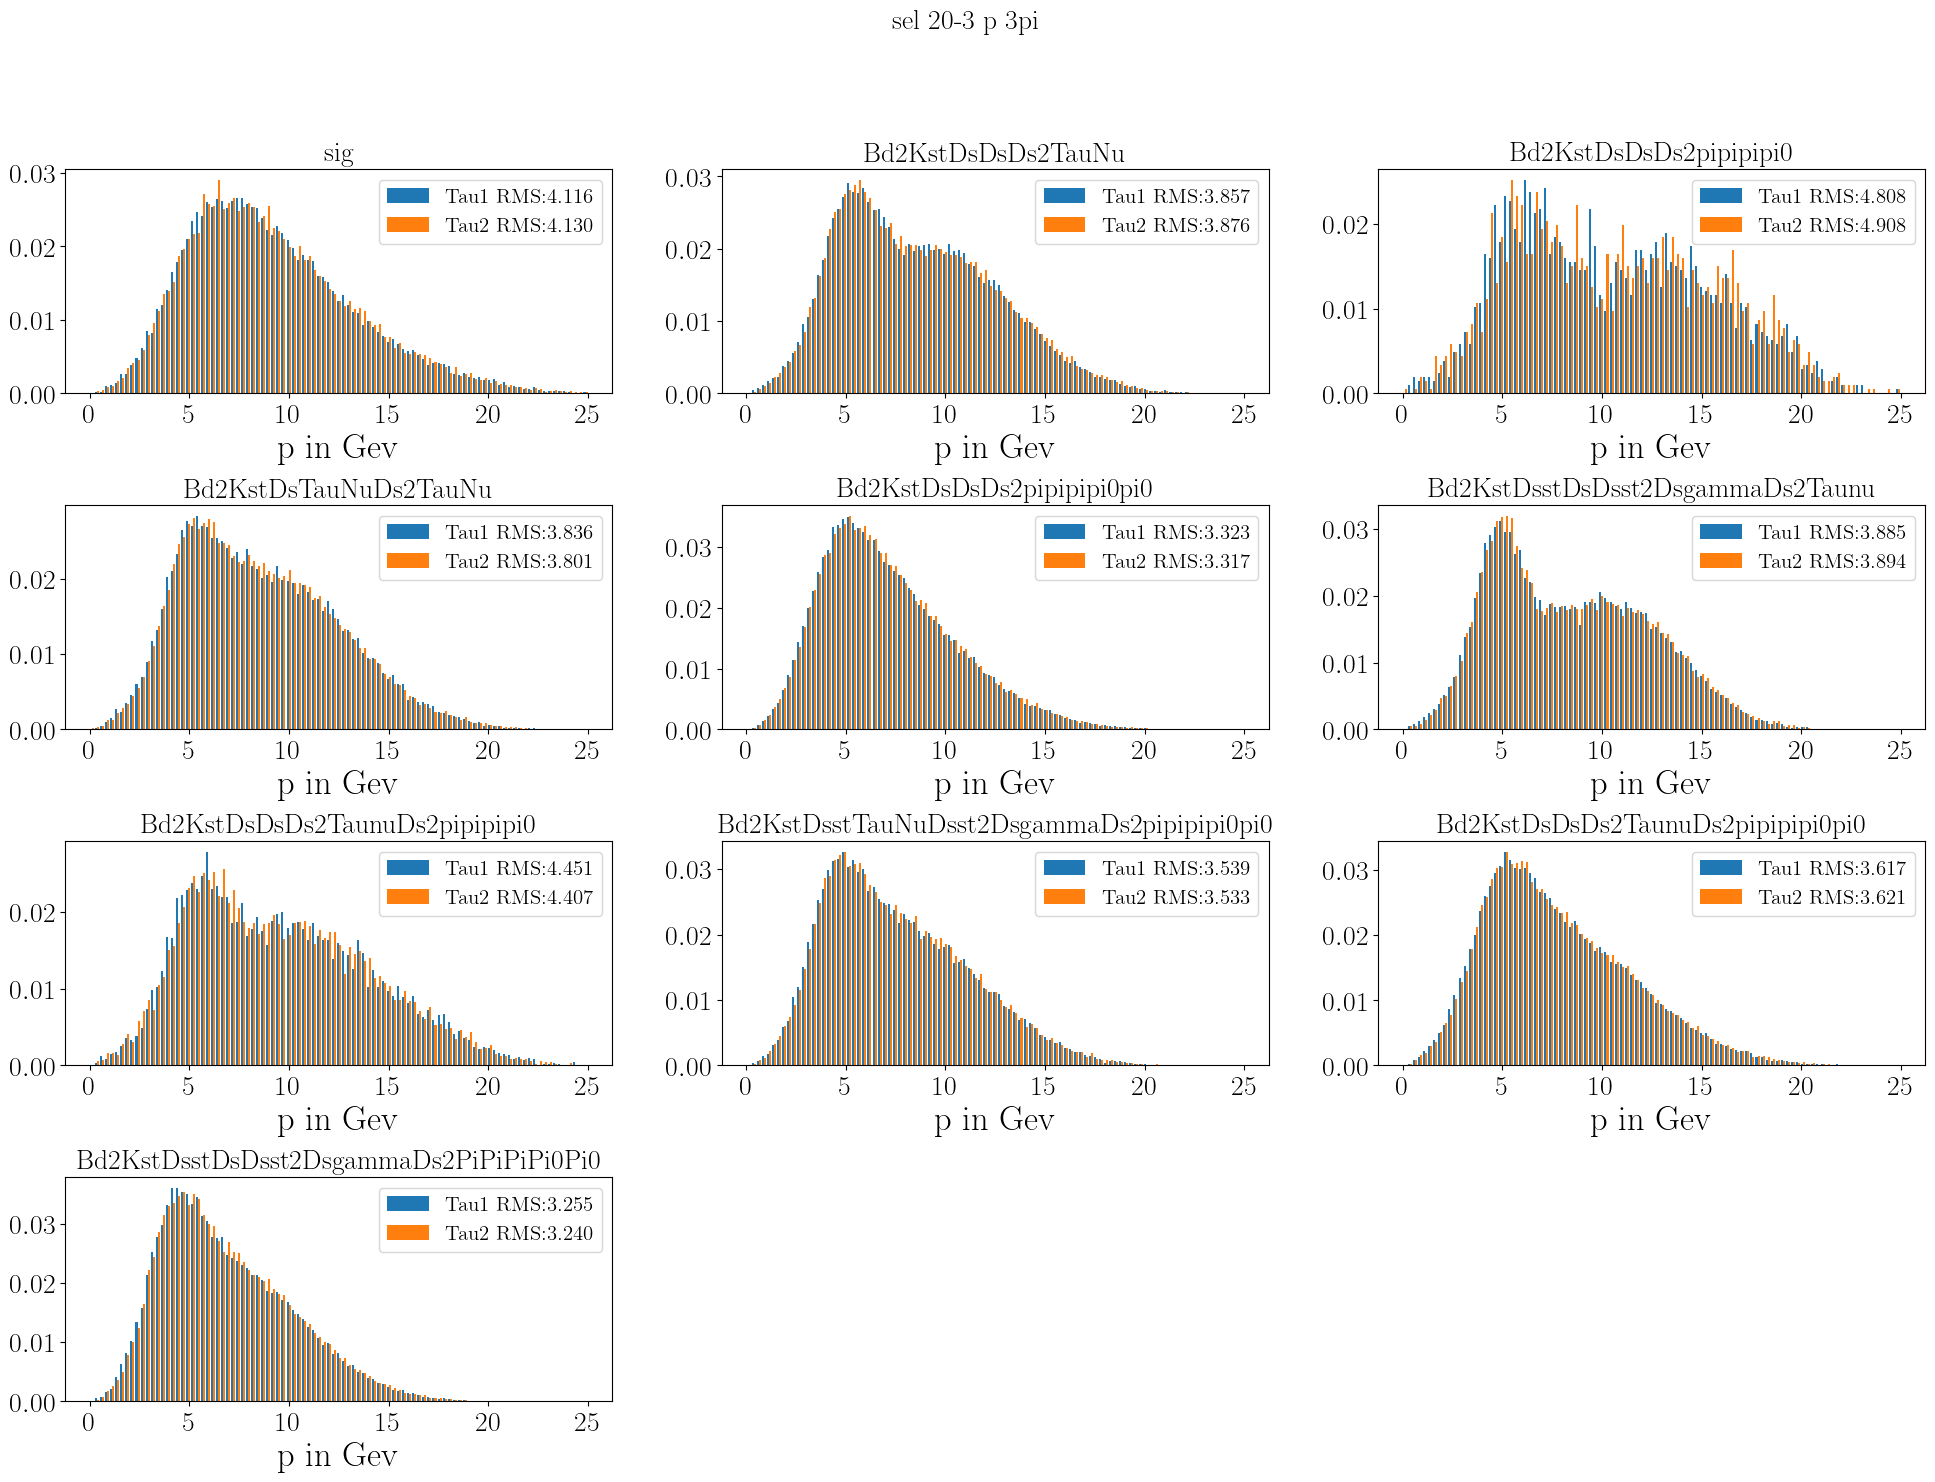

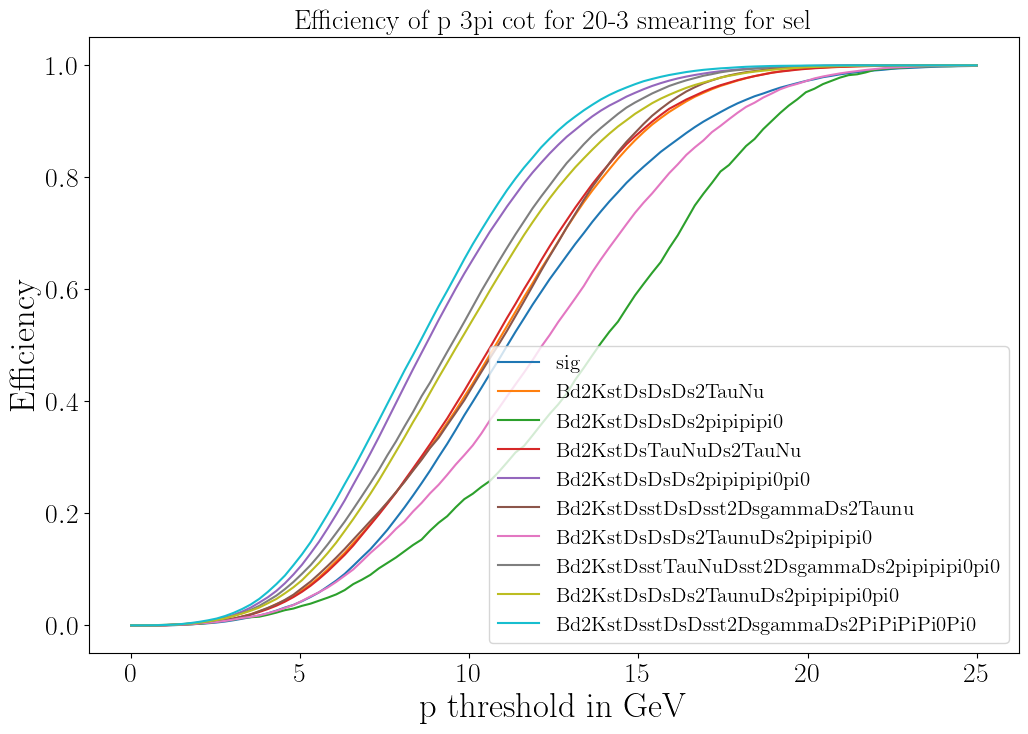

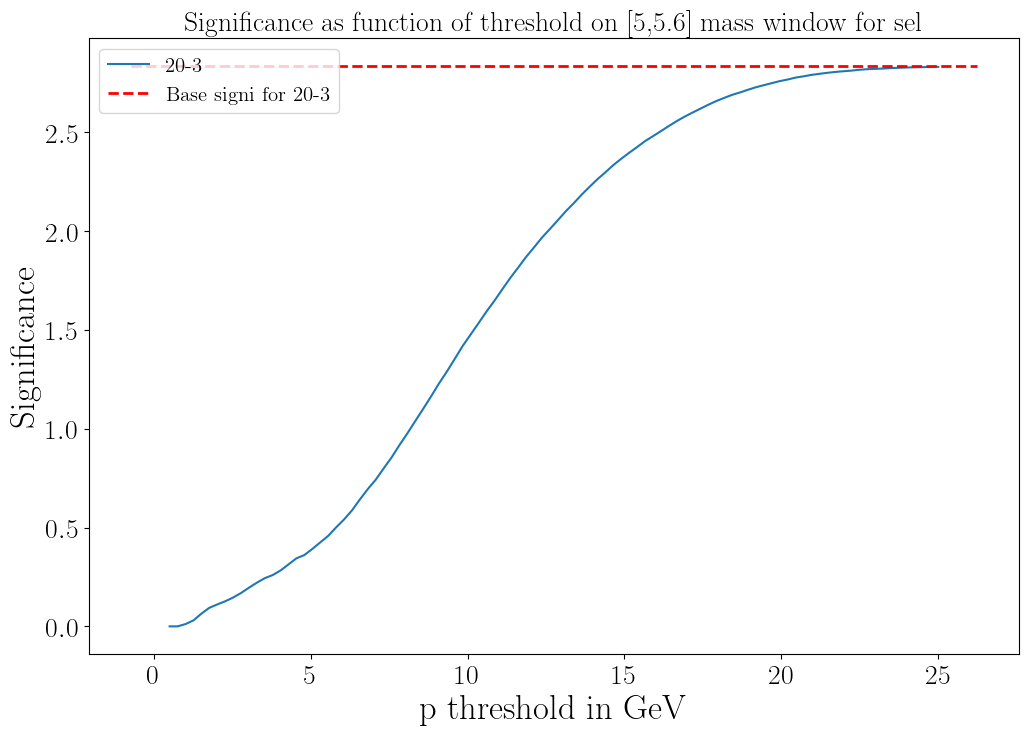

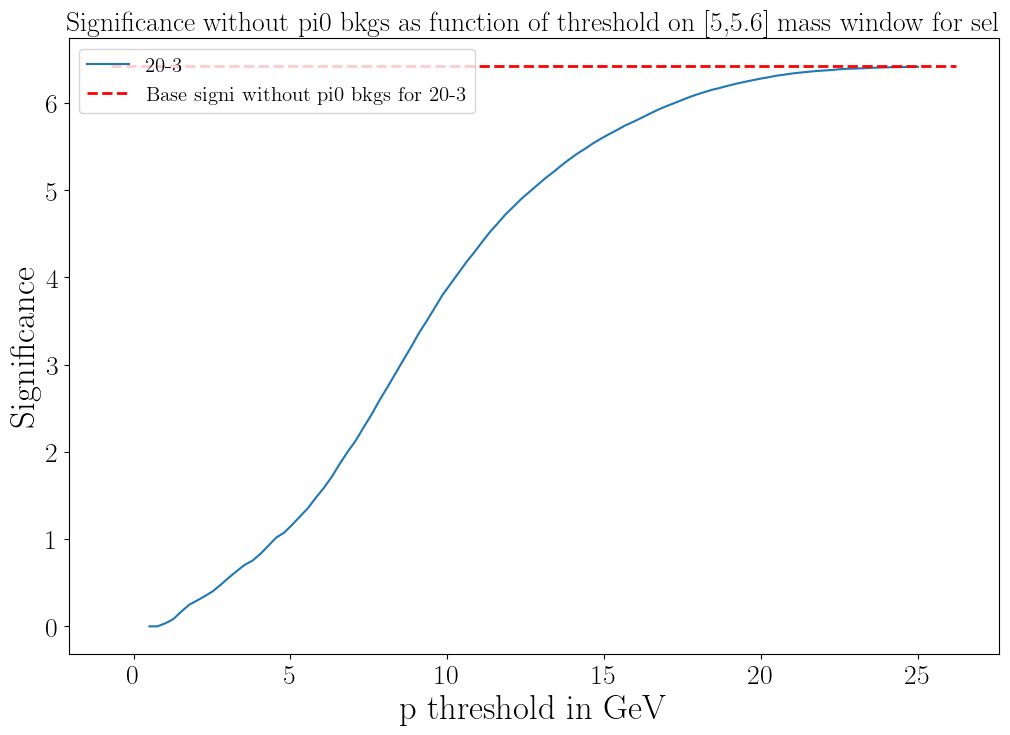

In [91]:
var=f"p_tau"#particular case -> use tau1 and tau2 simultenaously
varname="p 3pi"
Tlist=np.linspace(0,25,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}_{tau}"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_p_tau_1"],data[f"sig_{smearing}"][f"{i}_cut_study_p_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_p_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_p_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('p in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_tau_1"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_tau_2"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_p_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_p_tau_2"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('p in Gev')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_p_tau_1"]<T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_tau_2"]<T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    for smearing in listsmearing:
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cot for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('p threshold in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('p threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('p threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/3081406861.py:81: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/3081406861.py:99: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)


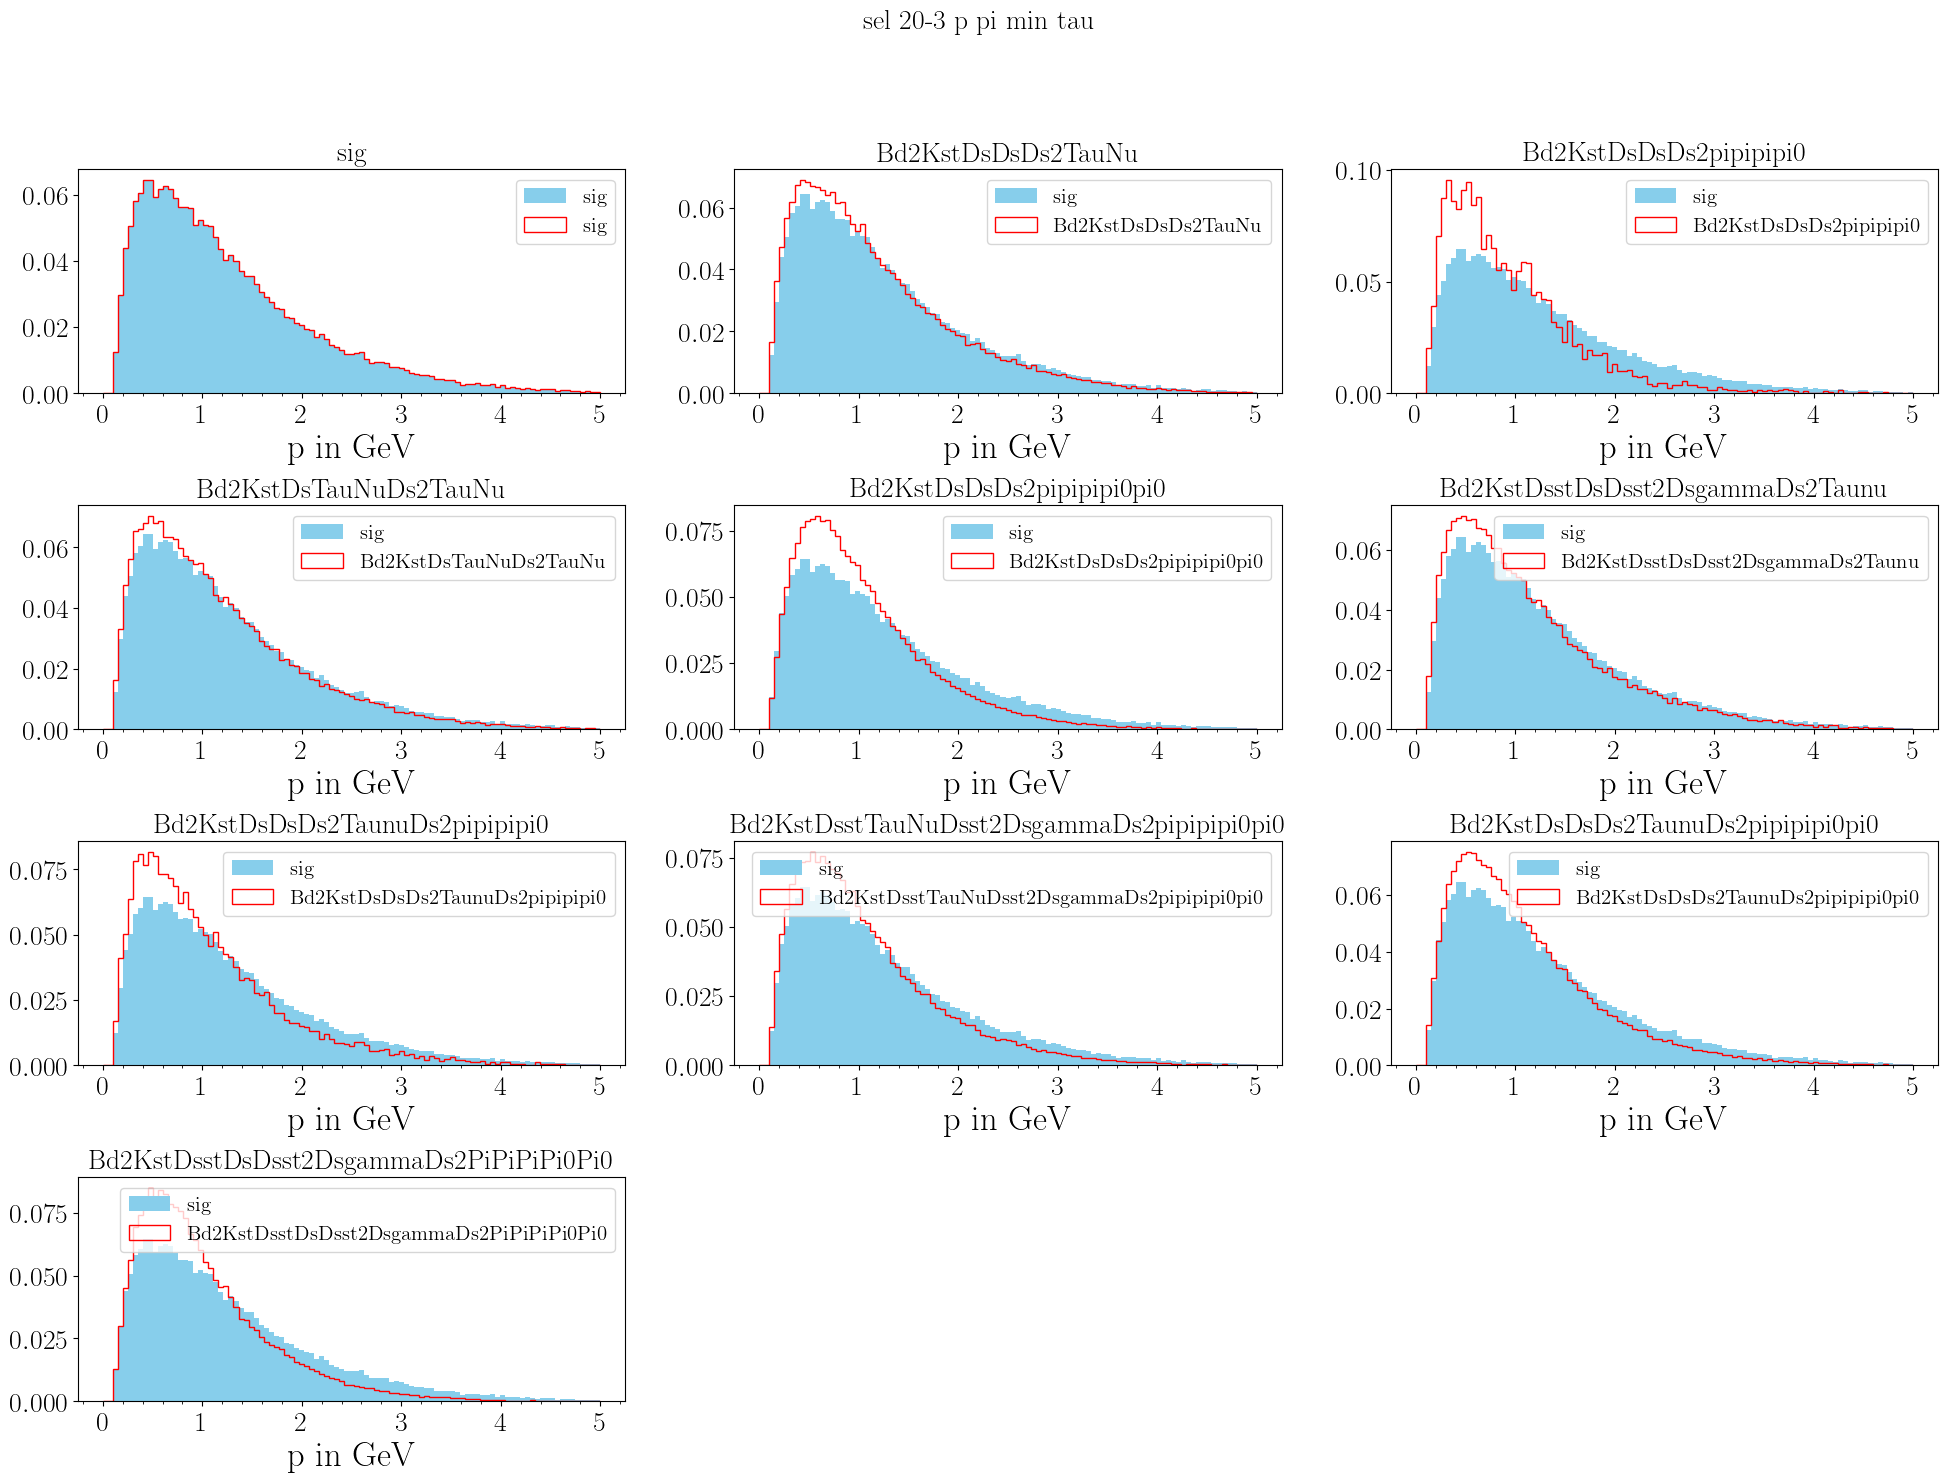

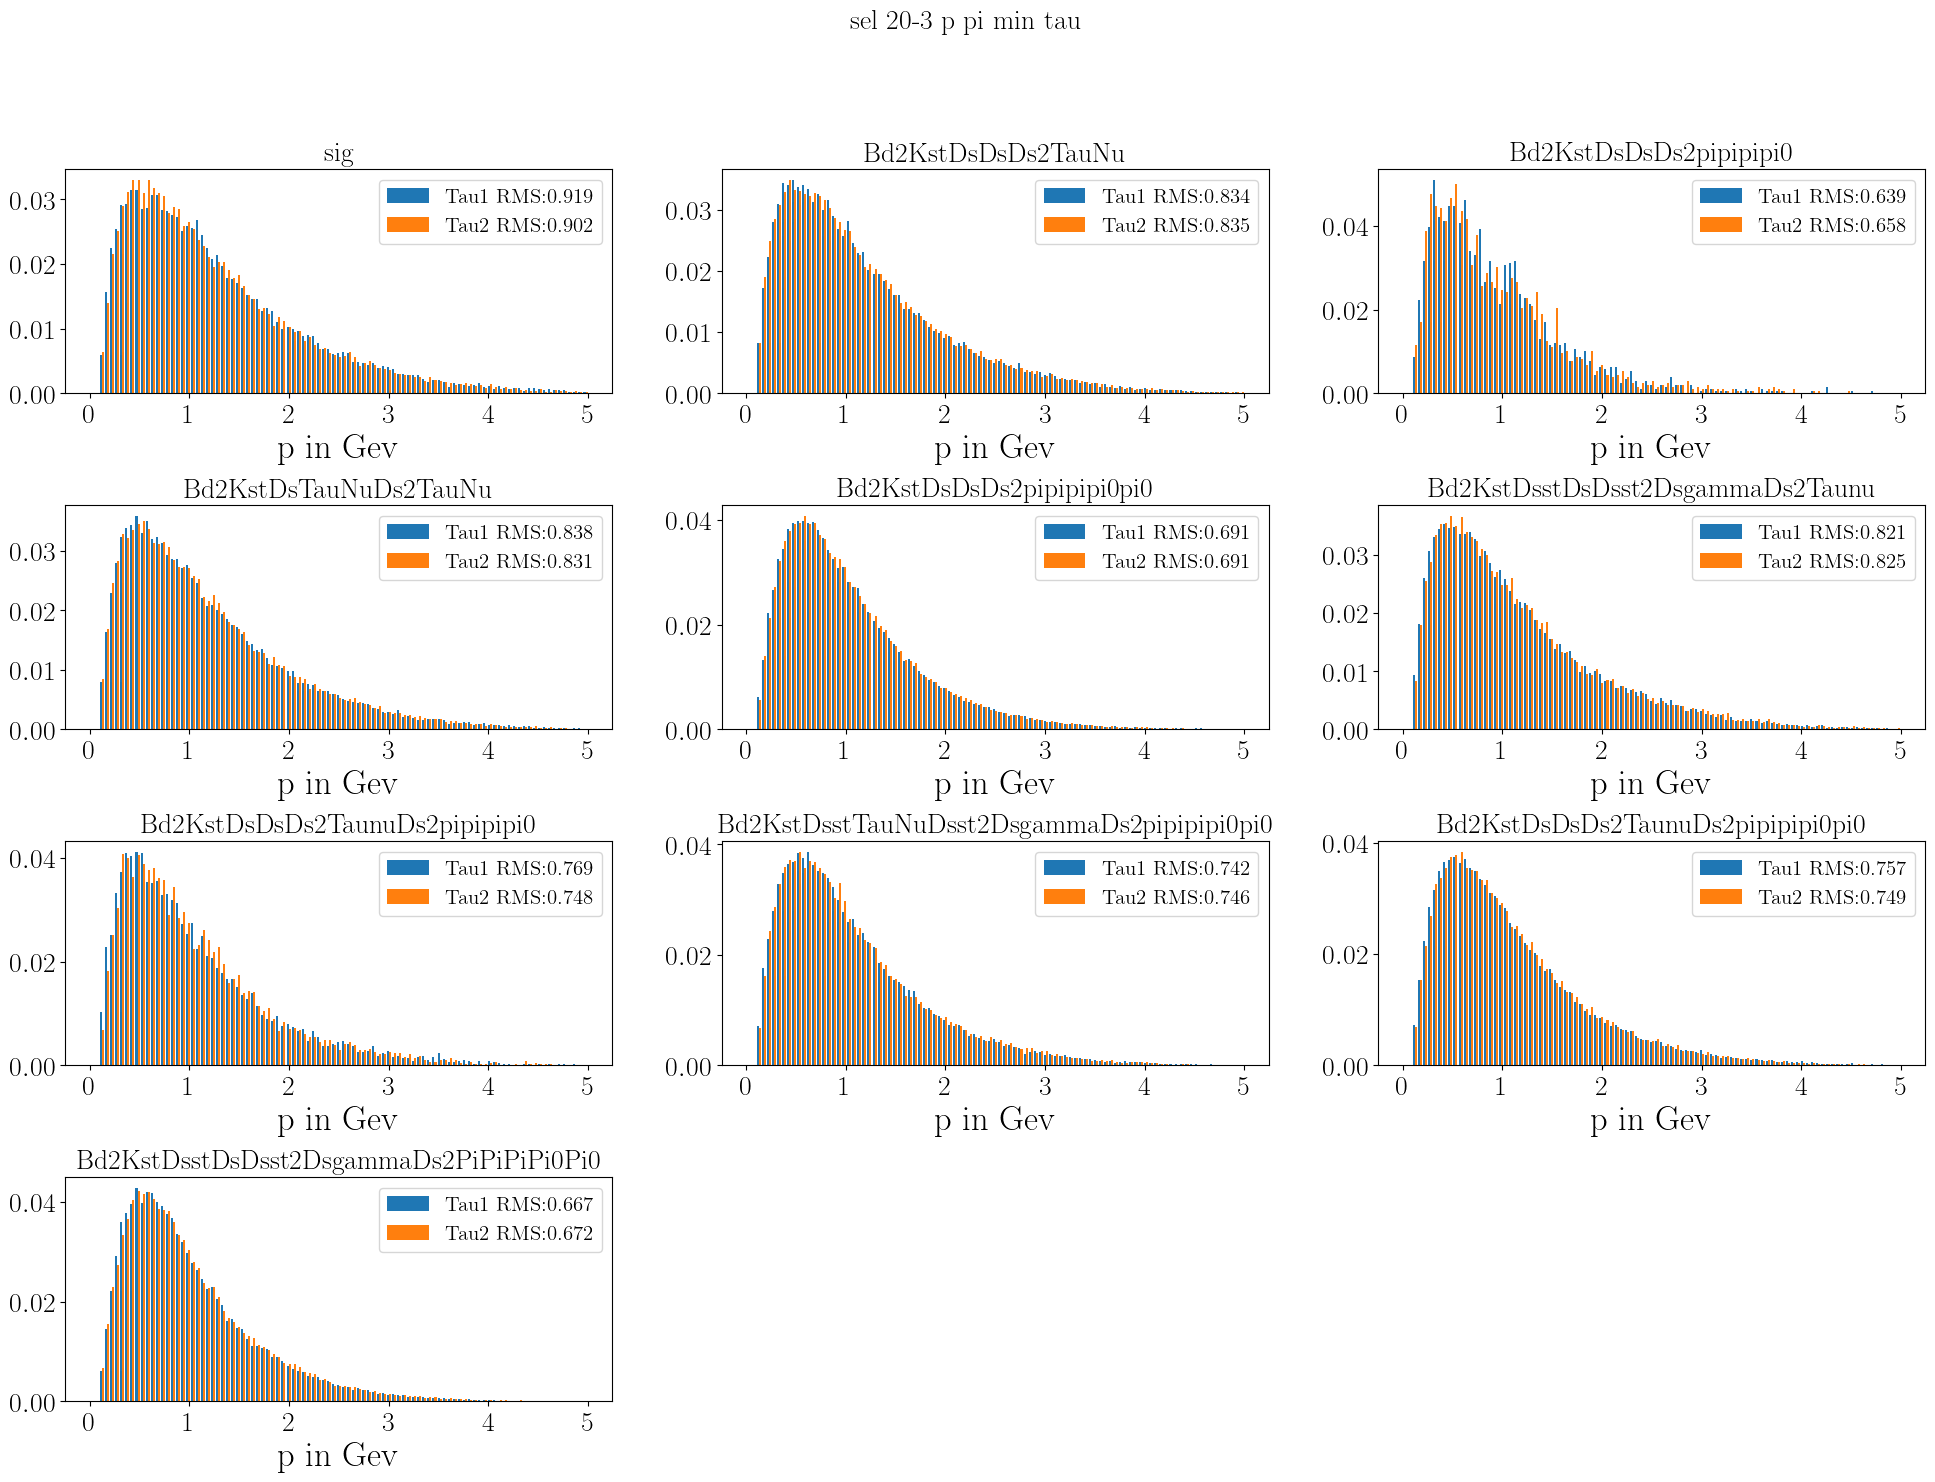

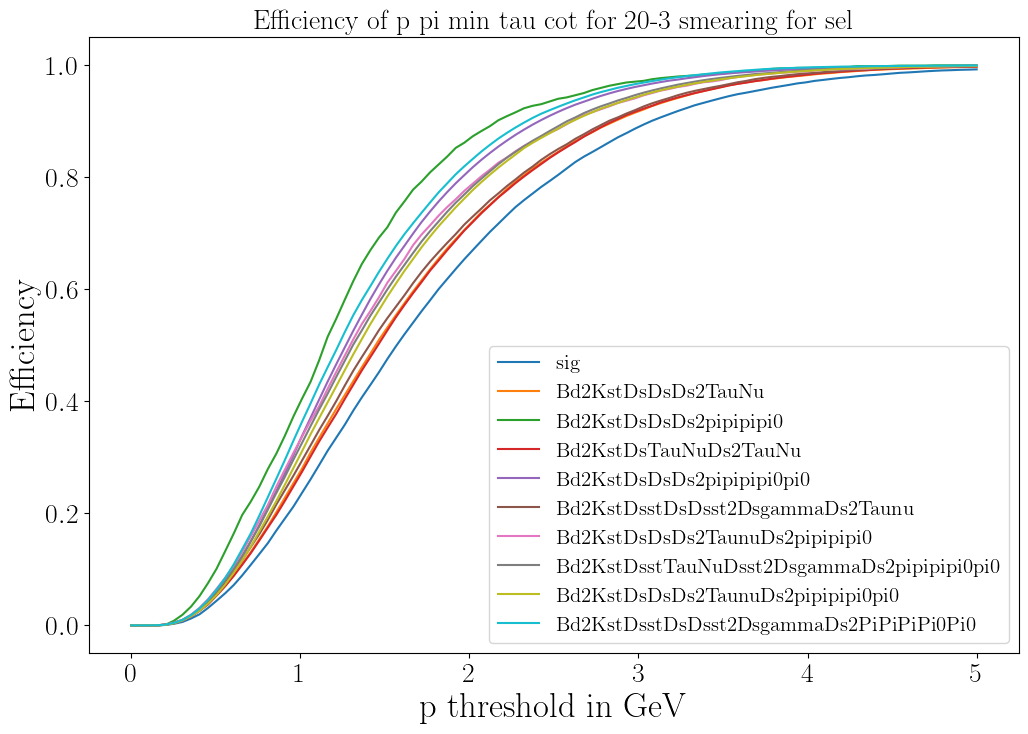

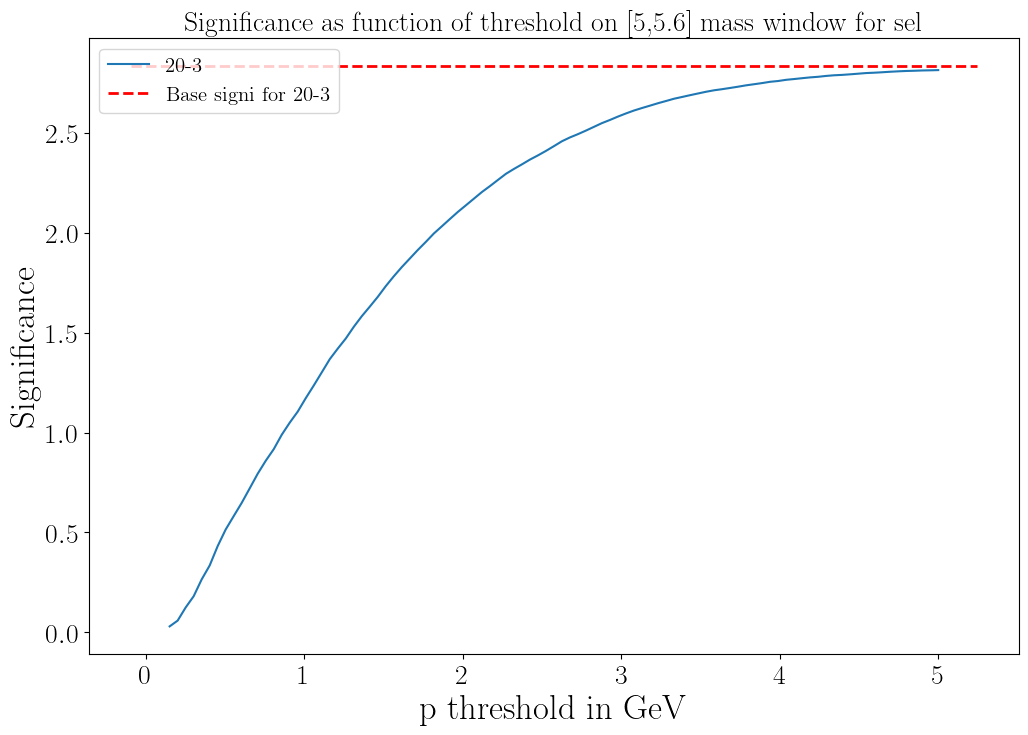

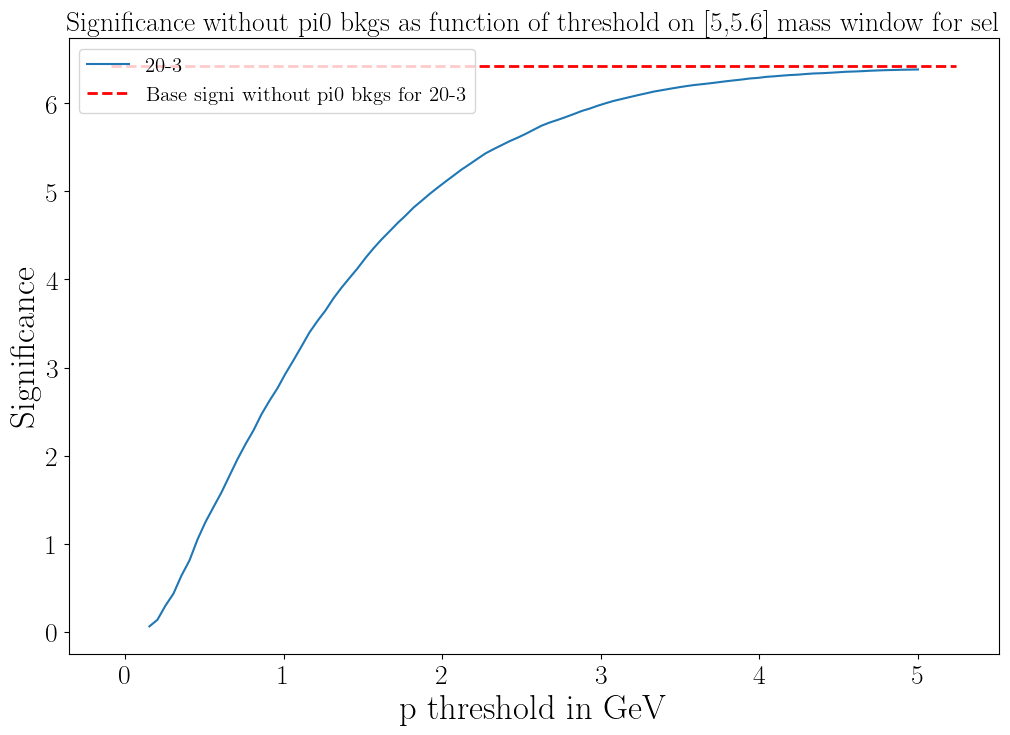

In [92]:
var=f"p_pi_min_tau"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,5,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}_{tau}"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_p_pi_min_tau_1"],data[f"sig_{smearing}"][f"{i}_cut_study_p_pi_min_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_min_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_min_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('p in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_min_tau_1"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_min_tau_2"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_min_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_min_tau_2"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('p in Gev')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_min_tau_1"]<T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_min_tau_2"]<T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cot for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('p threshold in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('p threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('p threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/2595292600.py:85: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/2595292600.py:103: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)


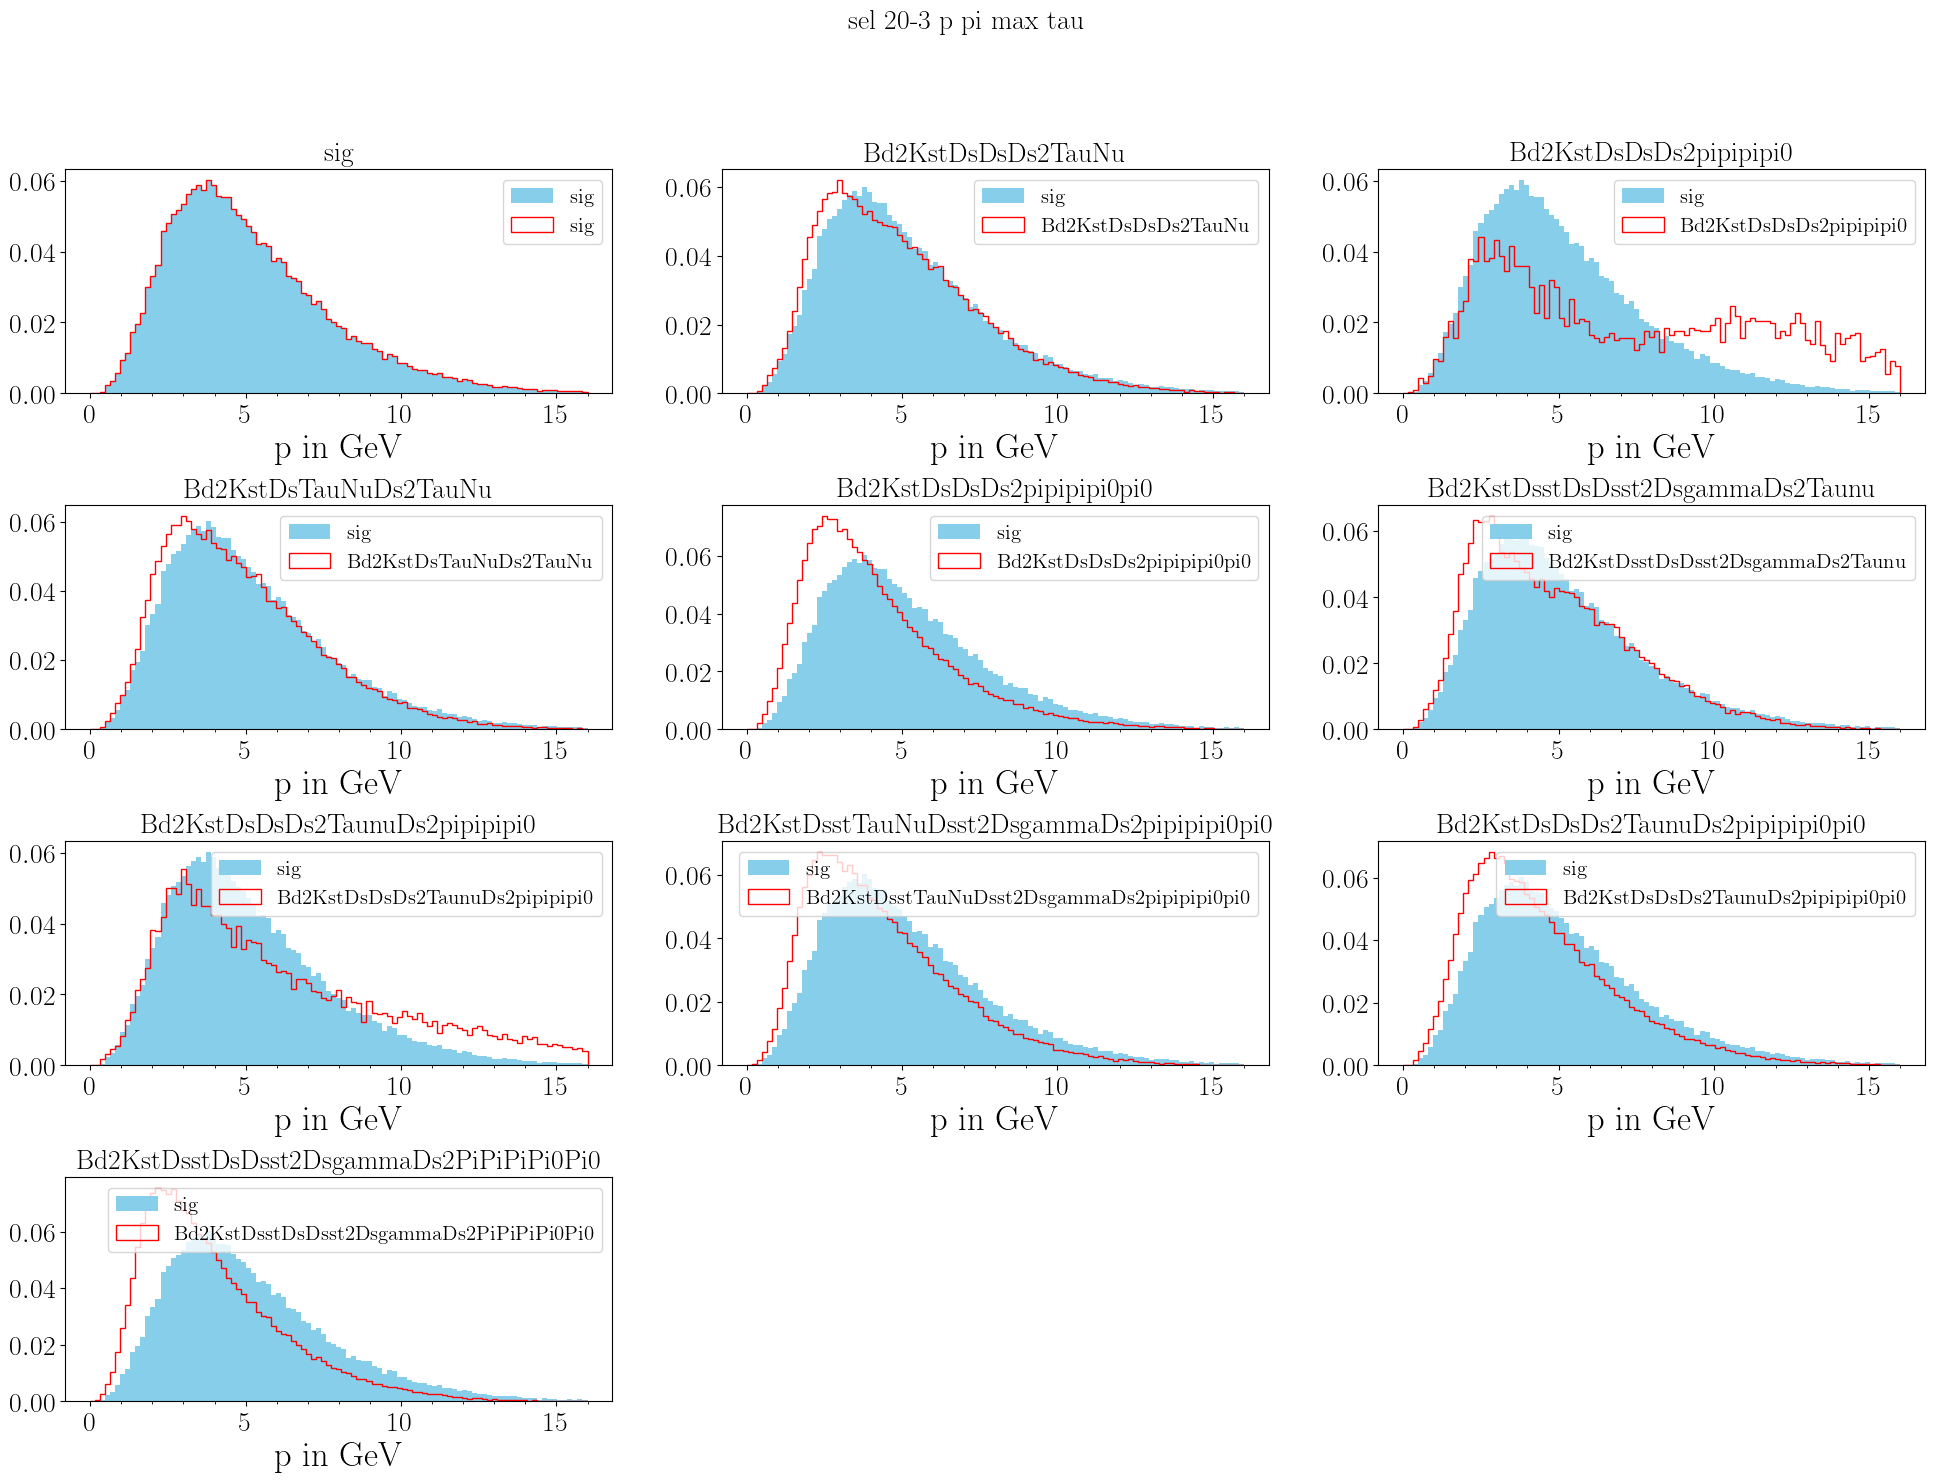

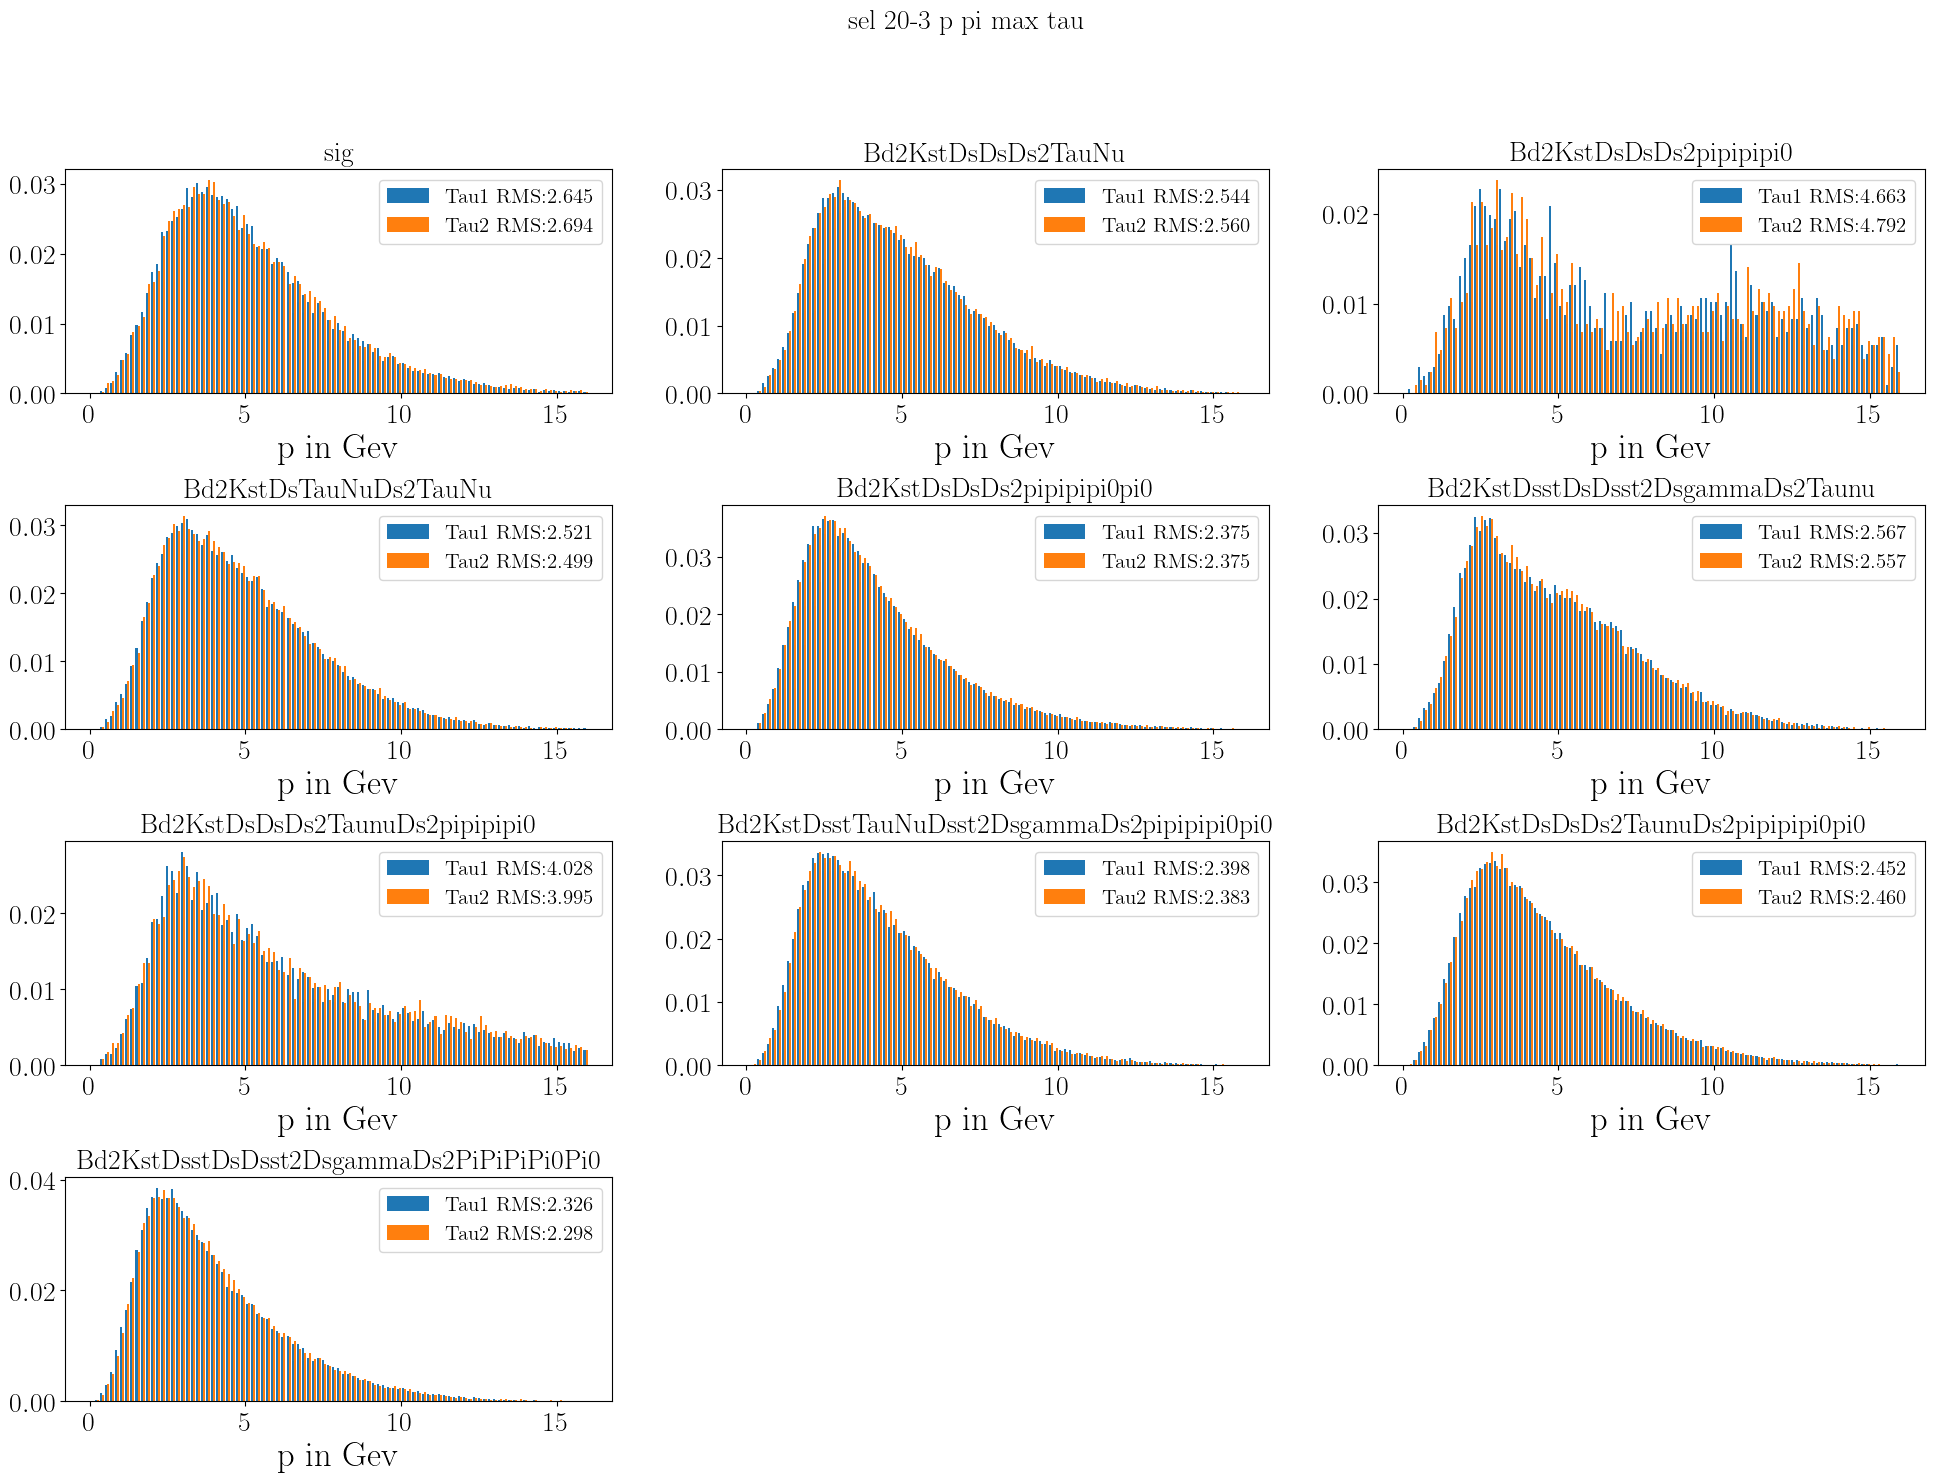

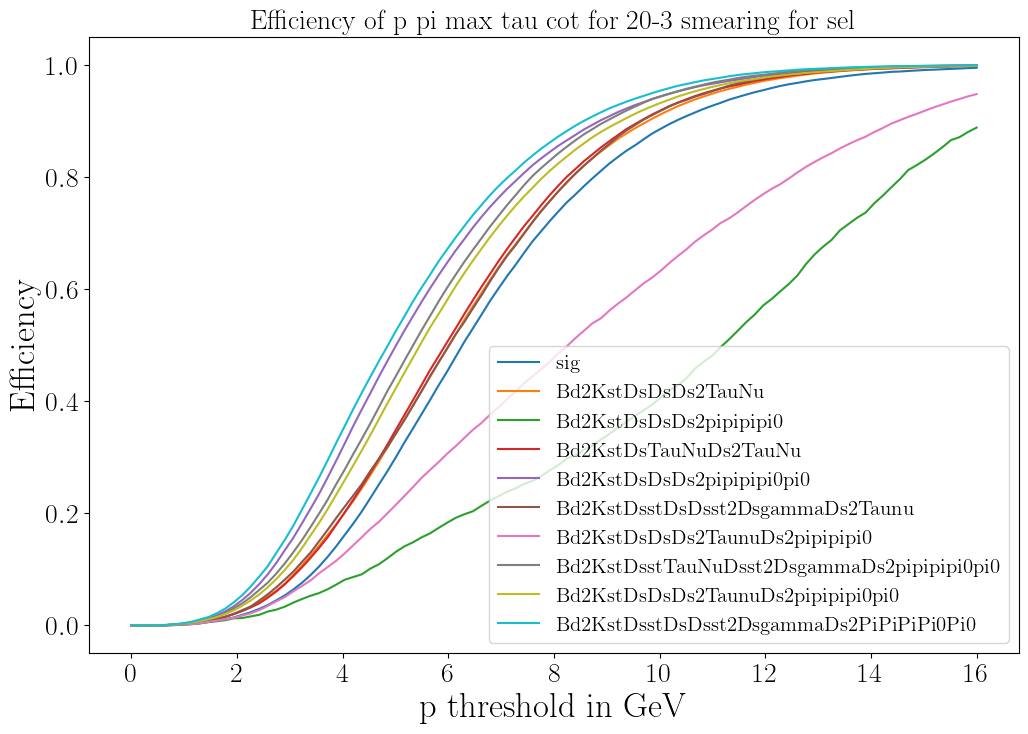

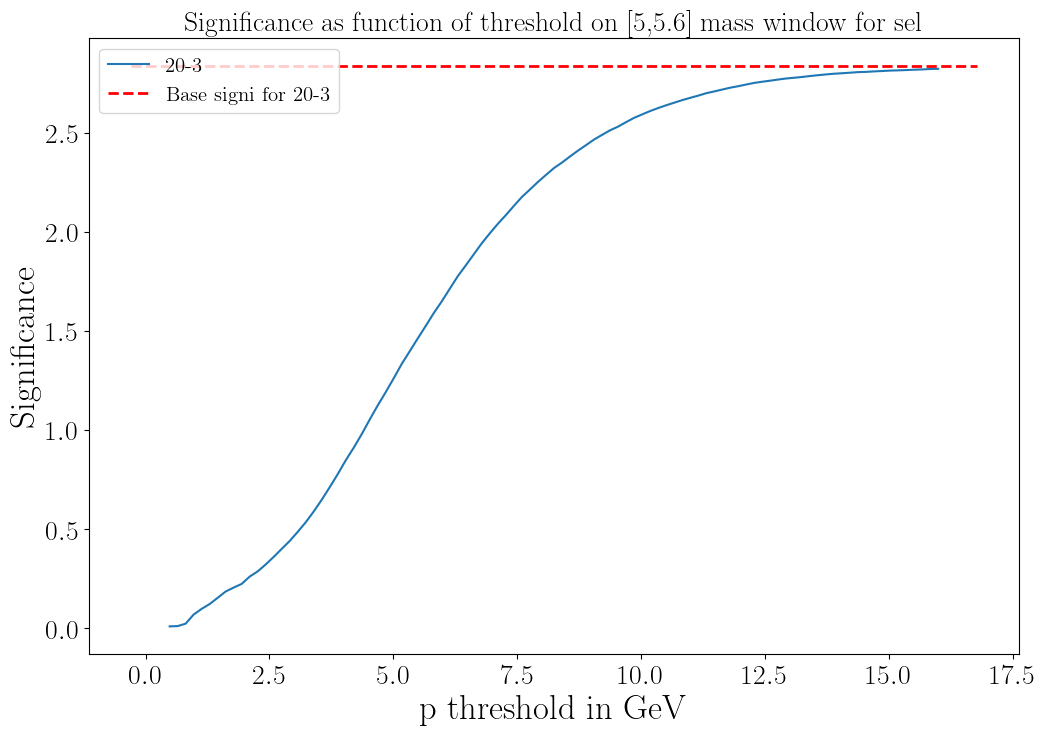

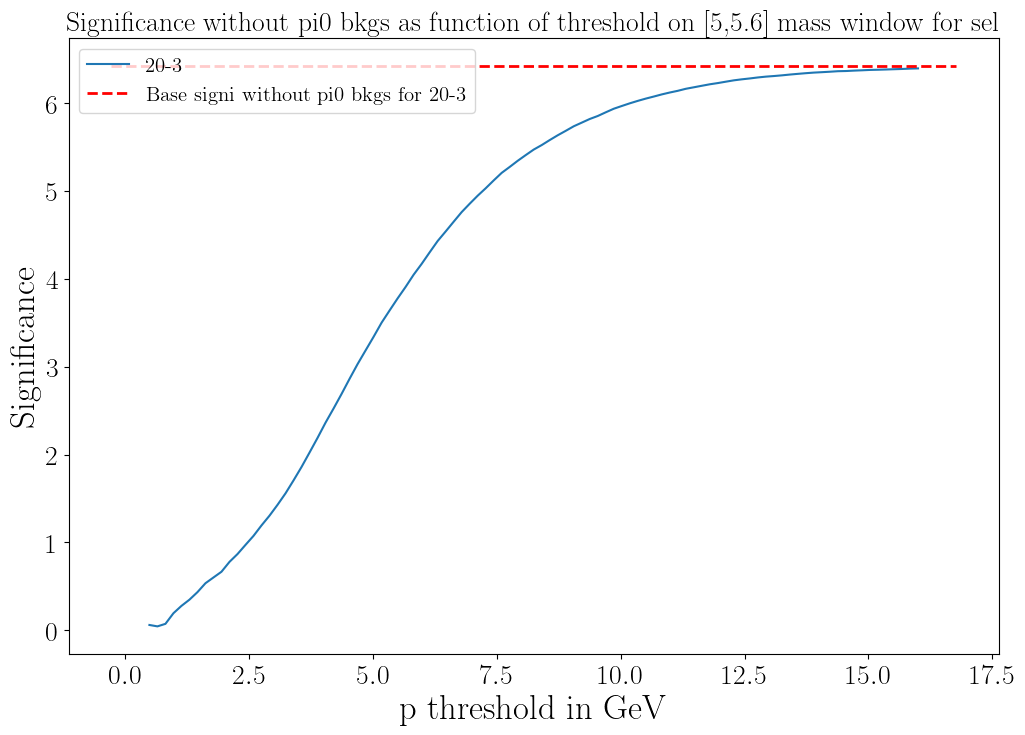

In [93]:
var=f"p_pi_max_tau"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,16,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}_{tau}"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_p_pi_max_tau_1"],data[f"sig_{smearing}"][f"{i}_cut_study_p_pi_max_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_max_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_max_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('p in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing.replace('_','-')
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_max_tau_1"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_max_tau_2"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_max_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_max_tau_2"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('p in Gev')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_max_tau_1"]<T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_p_pi_max_tau_2"]<T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing.replace('_','-')
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cot for {smearname} smearing for {nami}')
        for mode in listmod:
            if ((mode!="sig")&(i=="rr")):
                i="--"
            if ((mode=="sig")&(i=="--")):
                i="rr"
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('p threshold in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing.replace('_','-')
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('p threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing.replace('_','-')
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('p threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

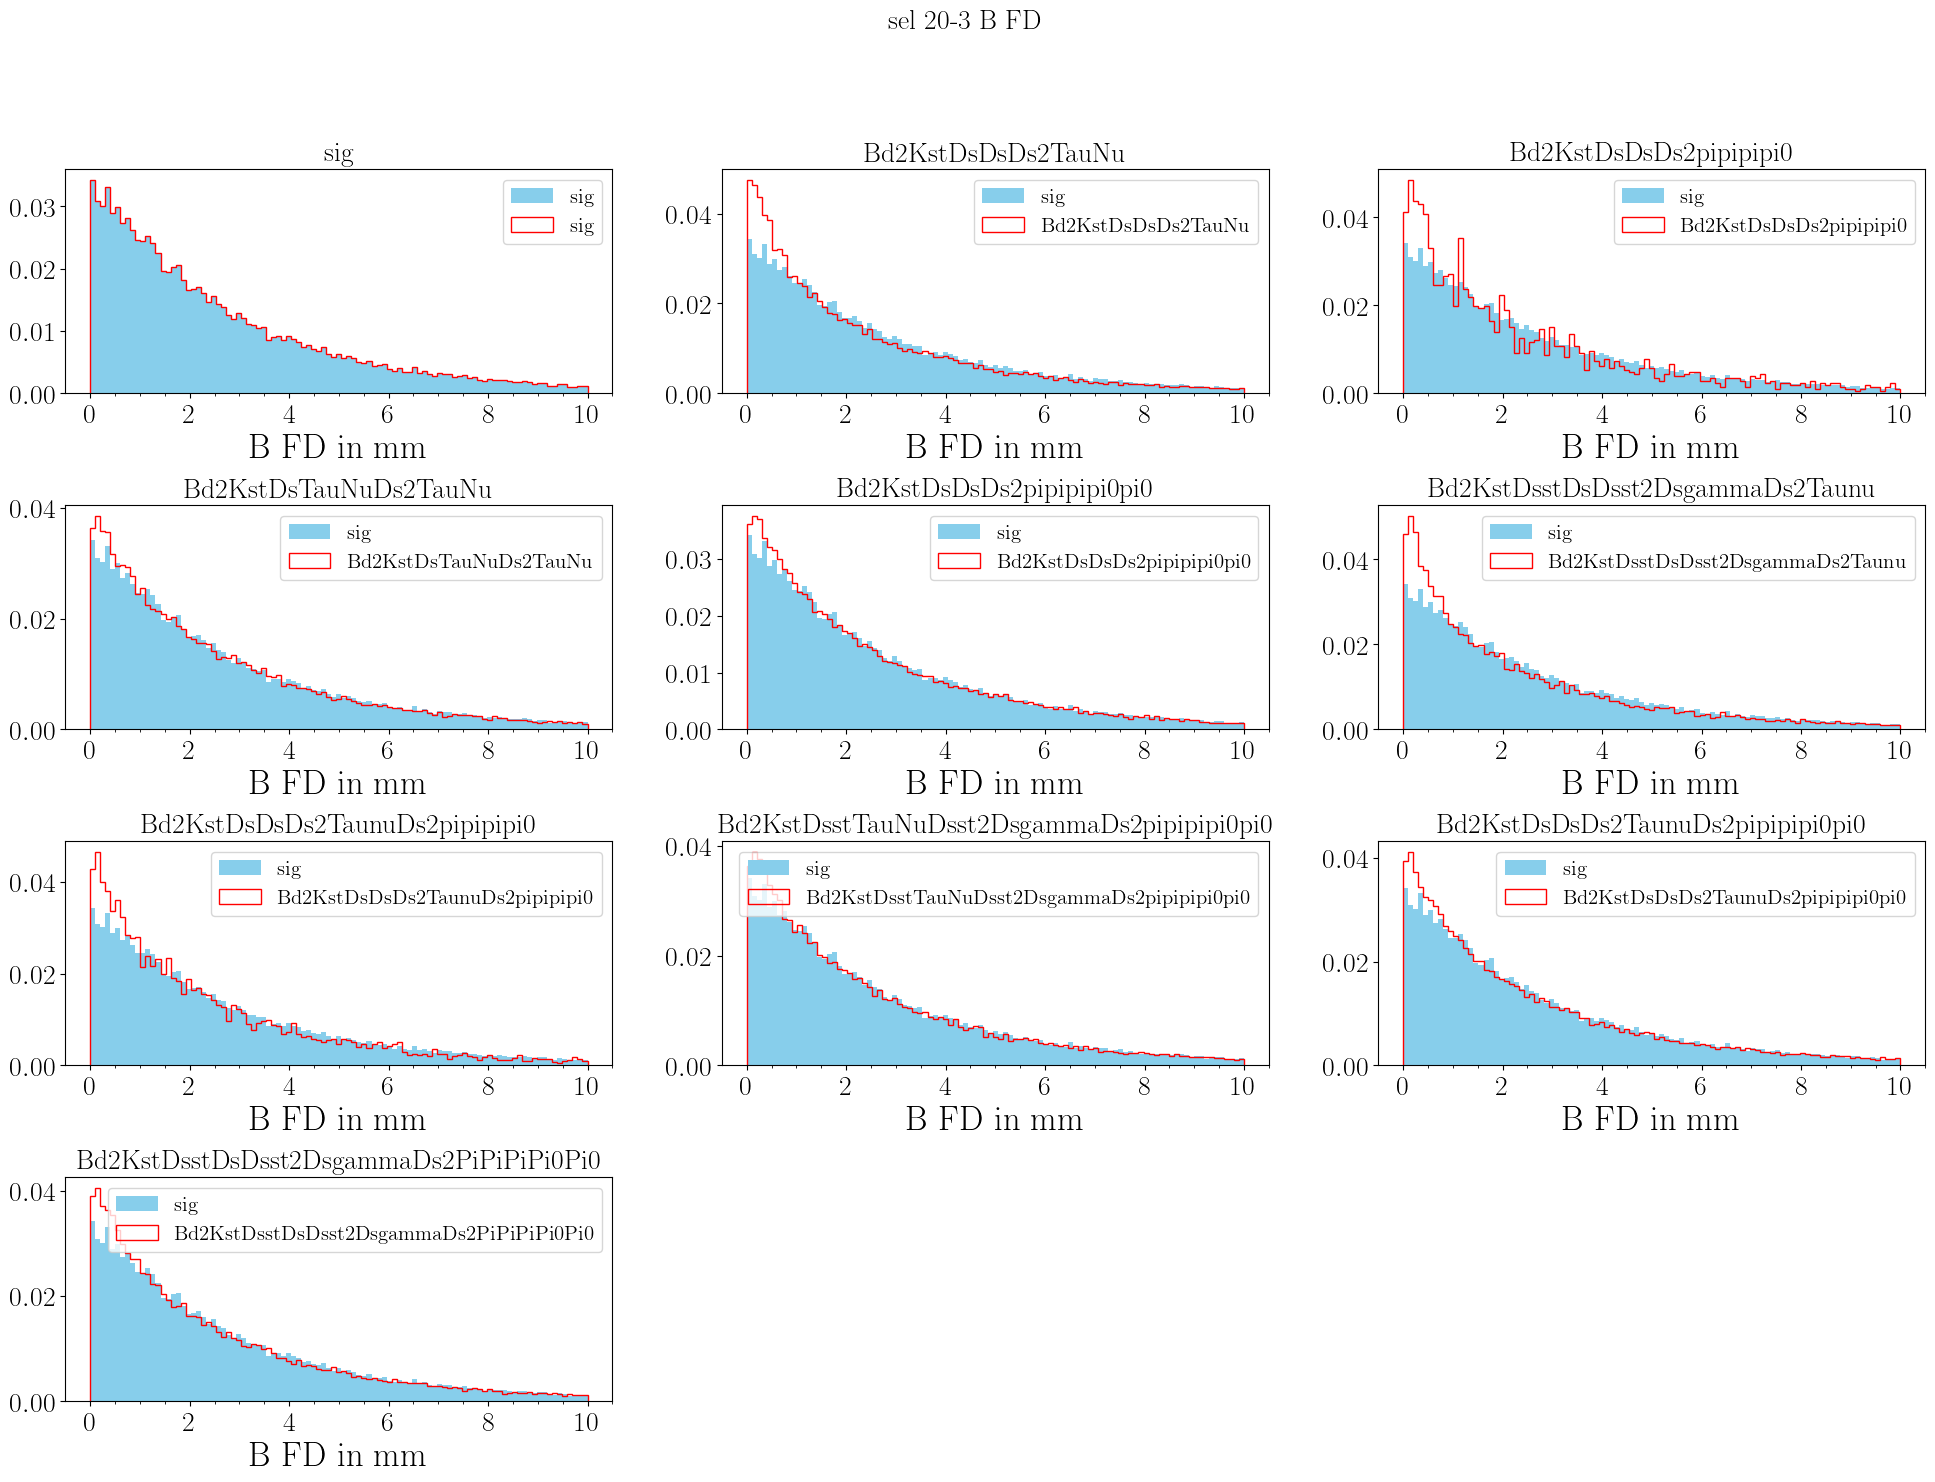

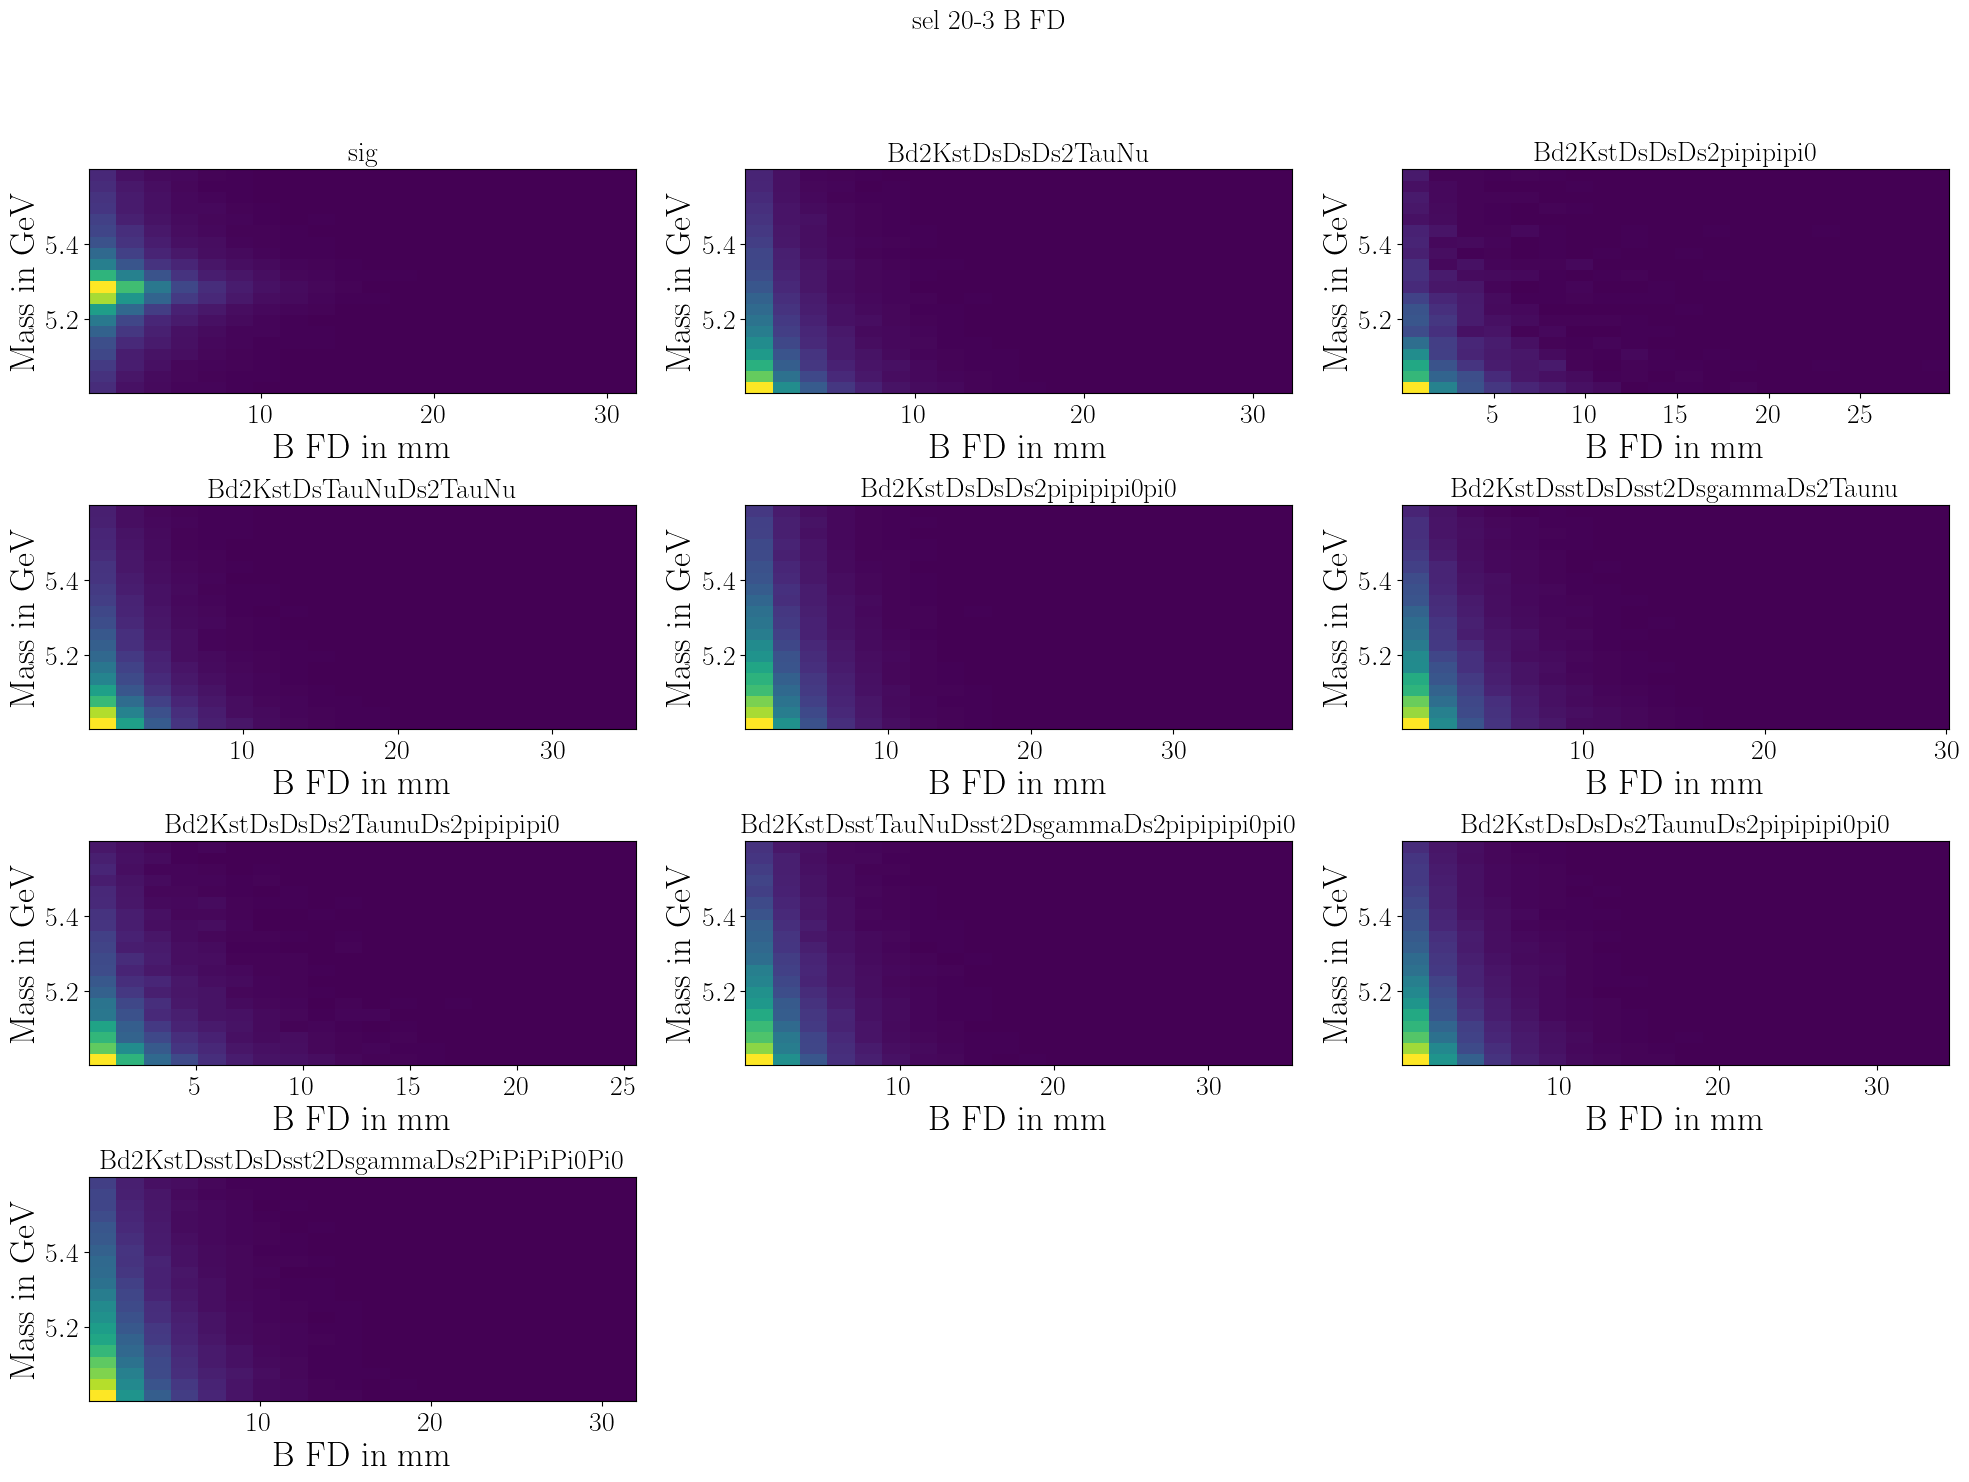

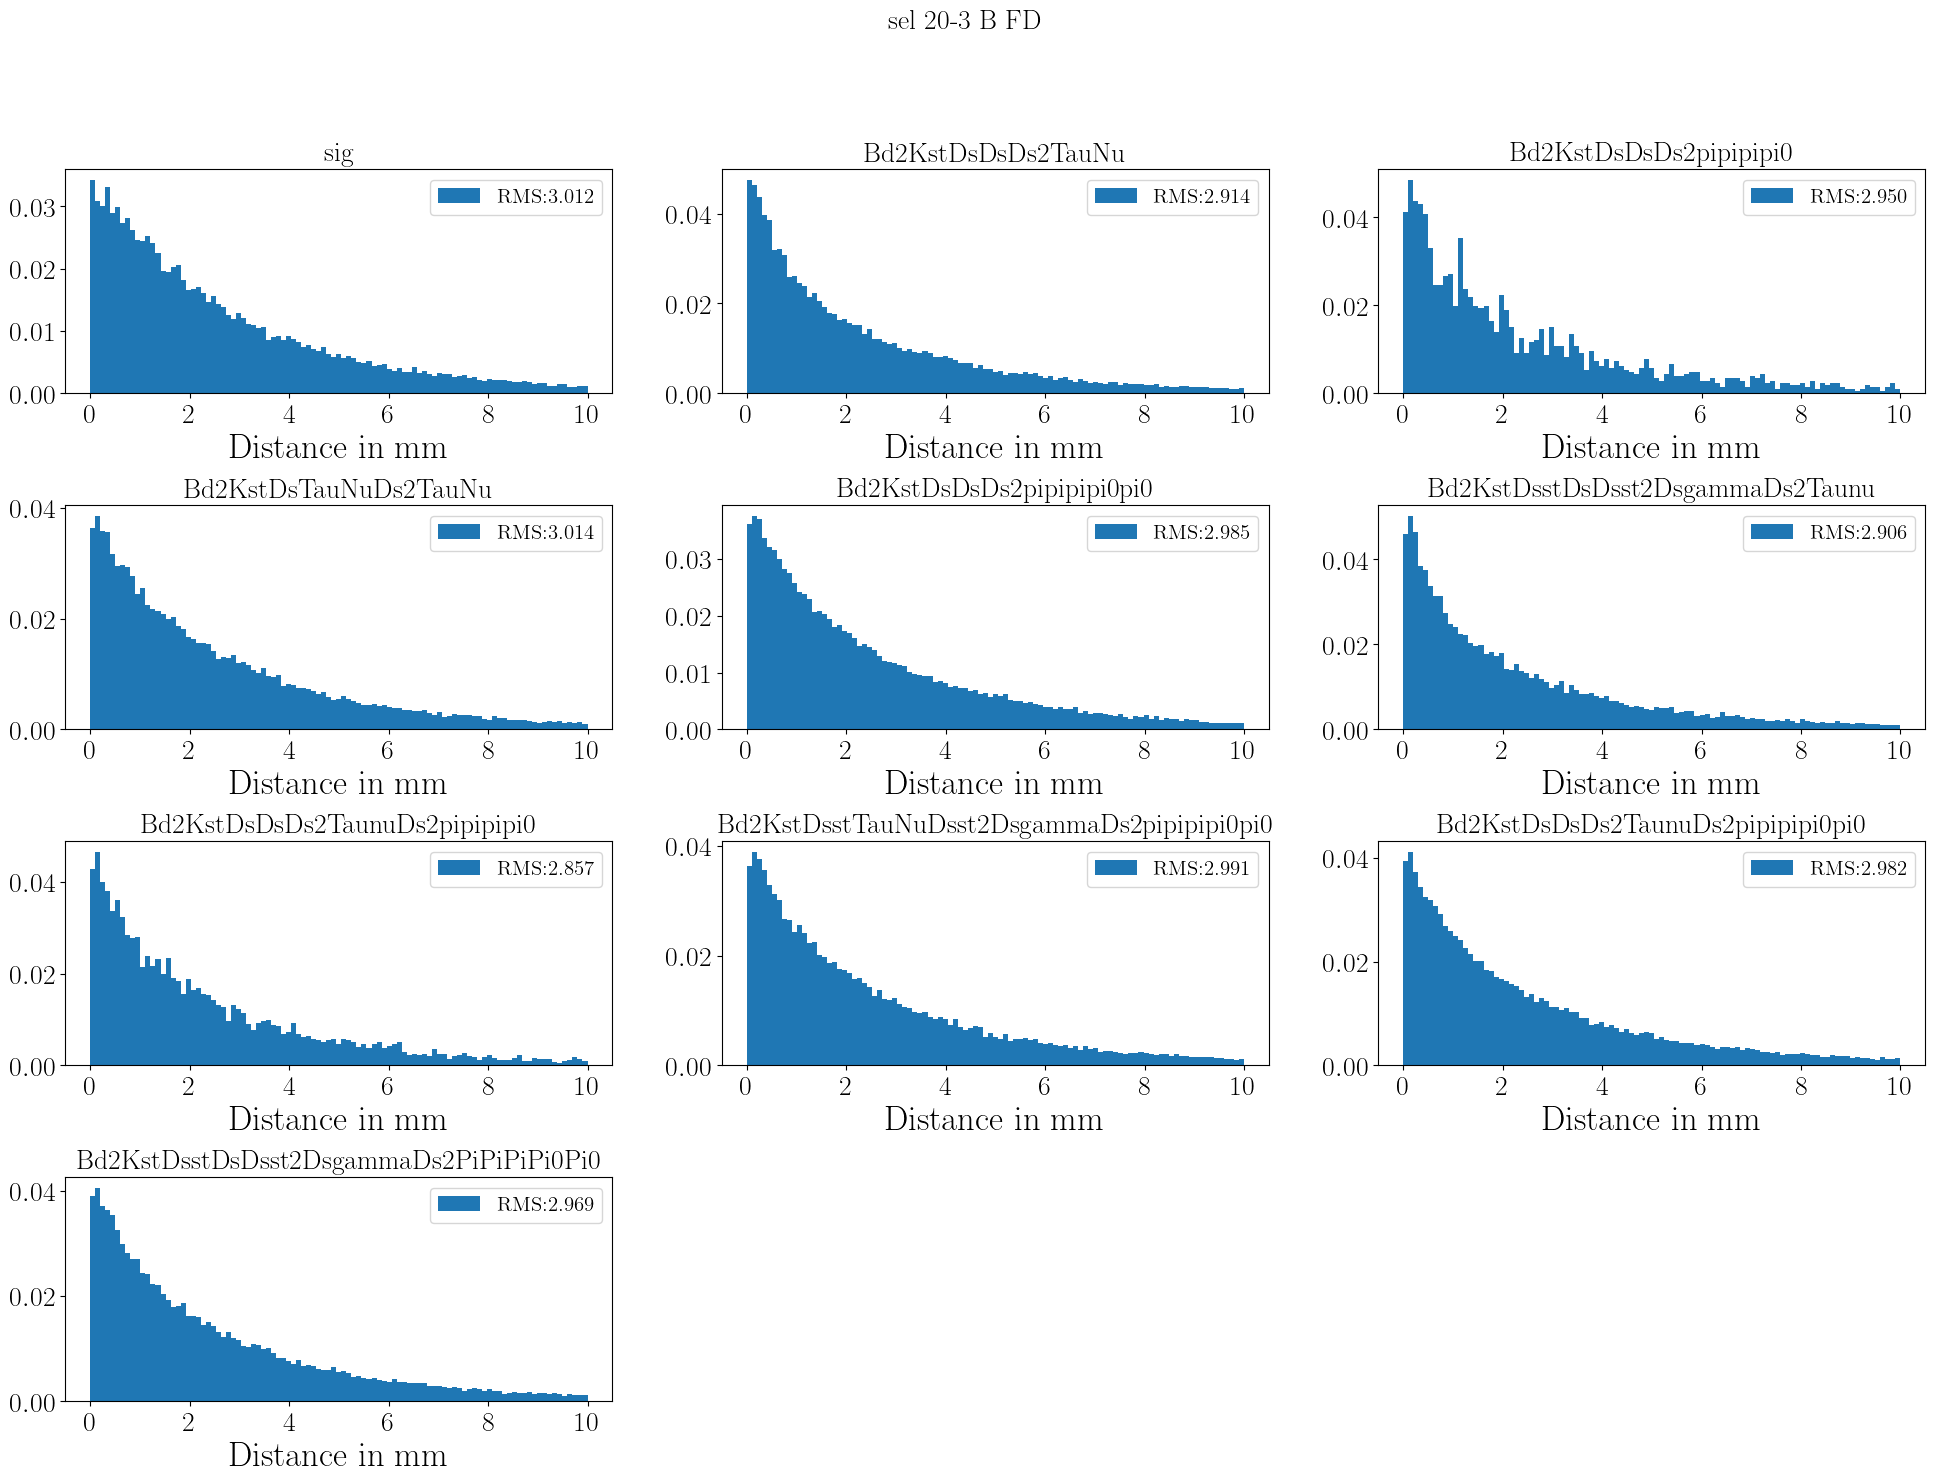

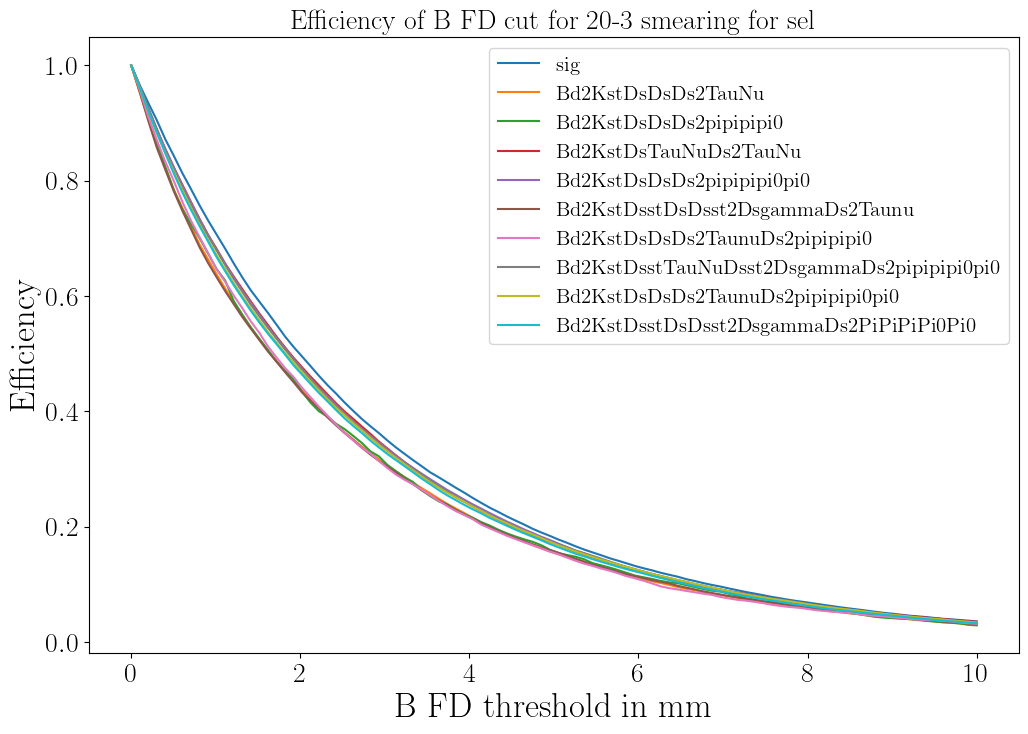

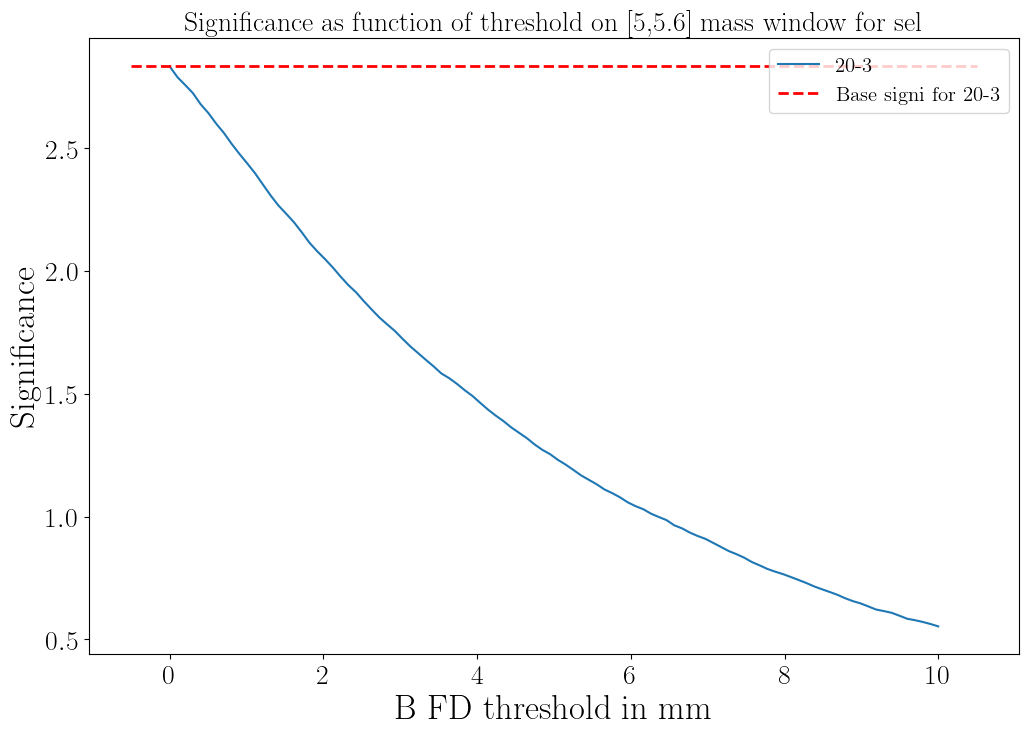

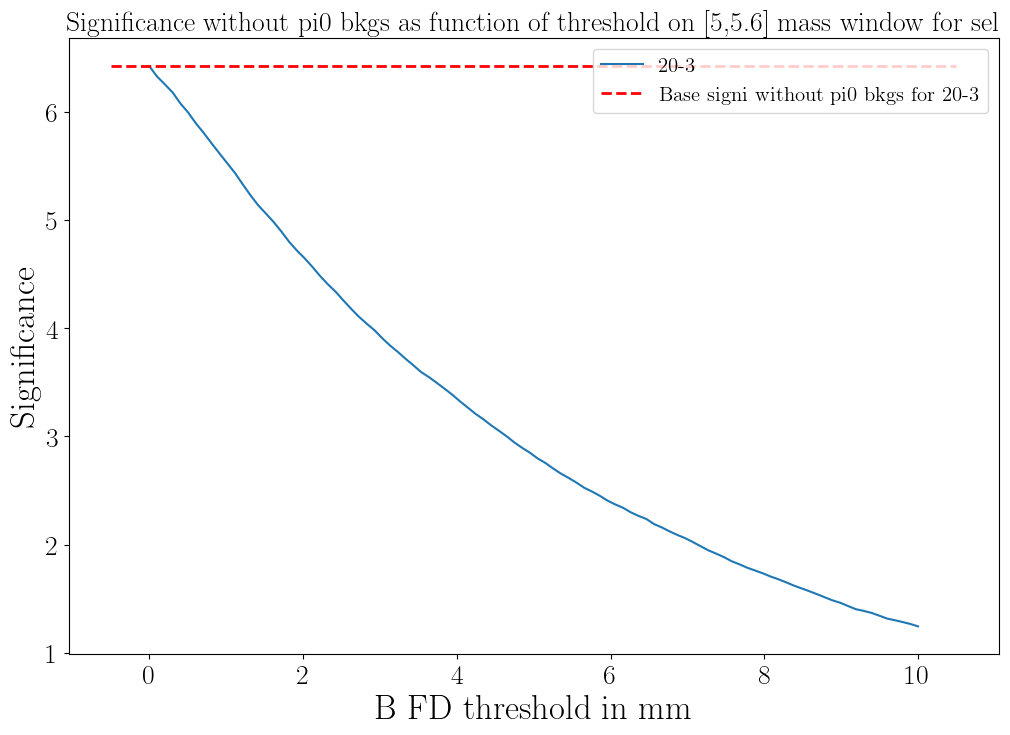

In [94]:
var=f"B_FD"
varname=var.replace('_',' ')
Tlist=np.linspace(0,10,100)

if (check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            smearname=smearing
            plt.figure(figsize=(24, 16))
            plt.subplots_adjust(hspace=0.5)
            plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
            for n, mode in enumerate(listmod):
                ax = plt.subplot(4, 3, n + 1)
                regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"], x_bins=100, ax=ax)
                ax.set_xlabel(f'M in GeV')
                ax.set_ylabel(f'{varname}')
                ax.set_title(f'{mode}')
for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(data[f"sig_{smearing}"][f"{i}_cut_study_{var}"],bins=Tlist,weights=data[f"sig_{smearing}"][f"{i}_weights"],label=f'sig', color='skyblue')
            ax.hist(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"],bins=Tlist,weights=data[f"{mode}_{smearing}"][f"{i}_weights"],label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('B FD in mm')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist2d(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"],data[f"{mode}_{smearing}"][f"{i}_cut_study"],bins=20, density=True)
            ax.set_xlabel('B FD in mm')
            ax.set_ylabel('Mass in GeV')
            ax.set_title(f'{mode}')

            
for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"],bins=Tlist,weights=data[f"{mode}_{smearing}"][f"{i}_weights"],label=f"RMS:{RMS:.3f}")
            ax.set_xlabel('Distance in mm')
            ax.set_title(f'{mode}')
            plt.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=(data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}"]>T)
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cut for {smearname} smearing for {nami}')
        for mode in listmod:
            if ((mode!="sig")&(i=="rr")):
                i="--"
            if ((mode=="sig")&(i=="--")):
                i="rr"
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('B FD threshold in mm')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('B FD threshold in mm')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('B FD threshold in mm')
    plt.ylabel('Significance')
    plt.legend();

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1481187309.py:81: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1481187309.py:99: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)


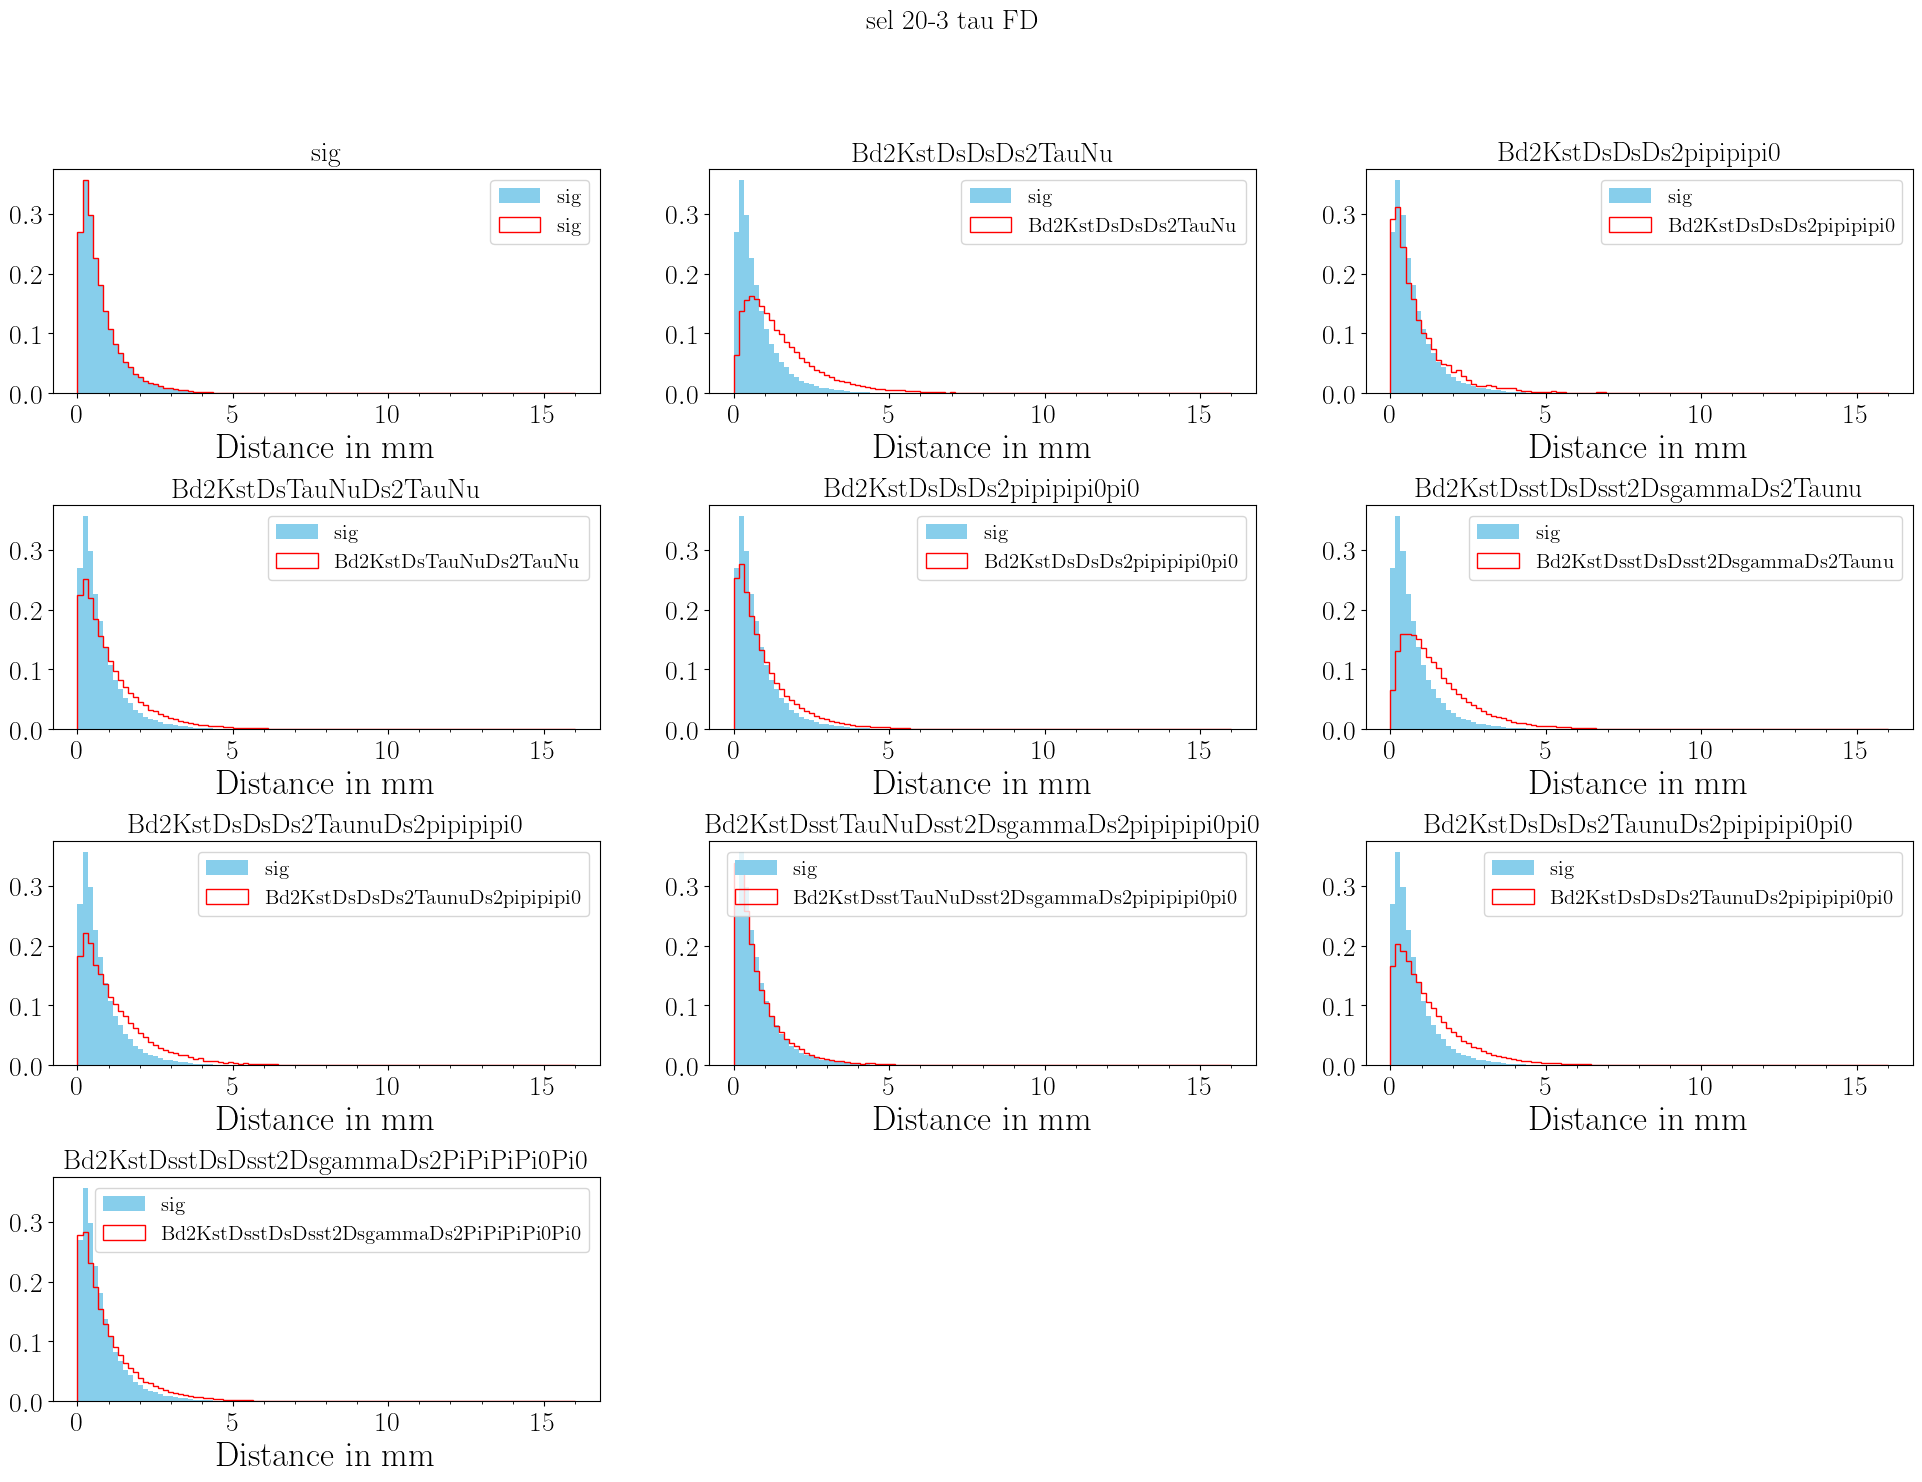

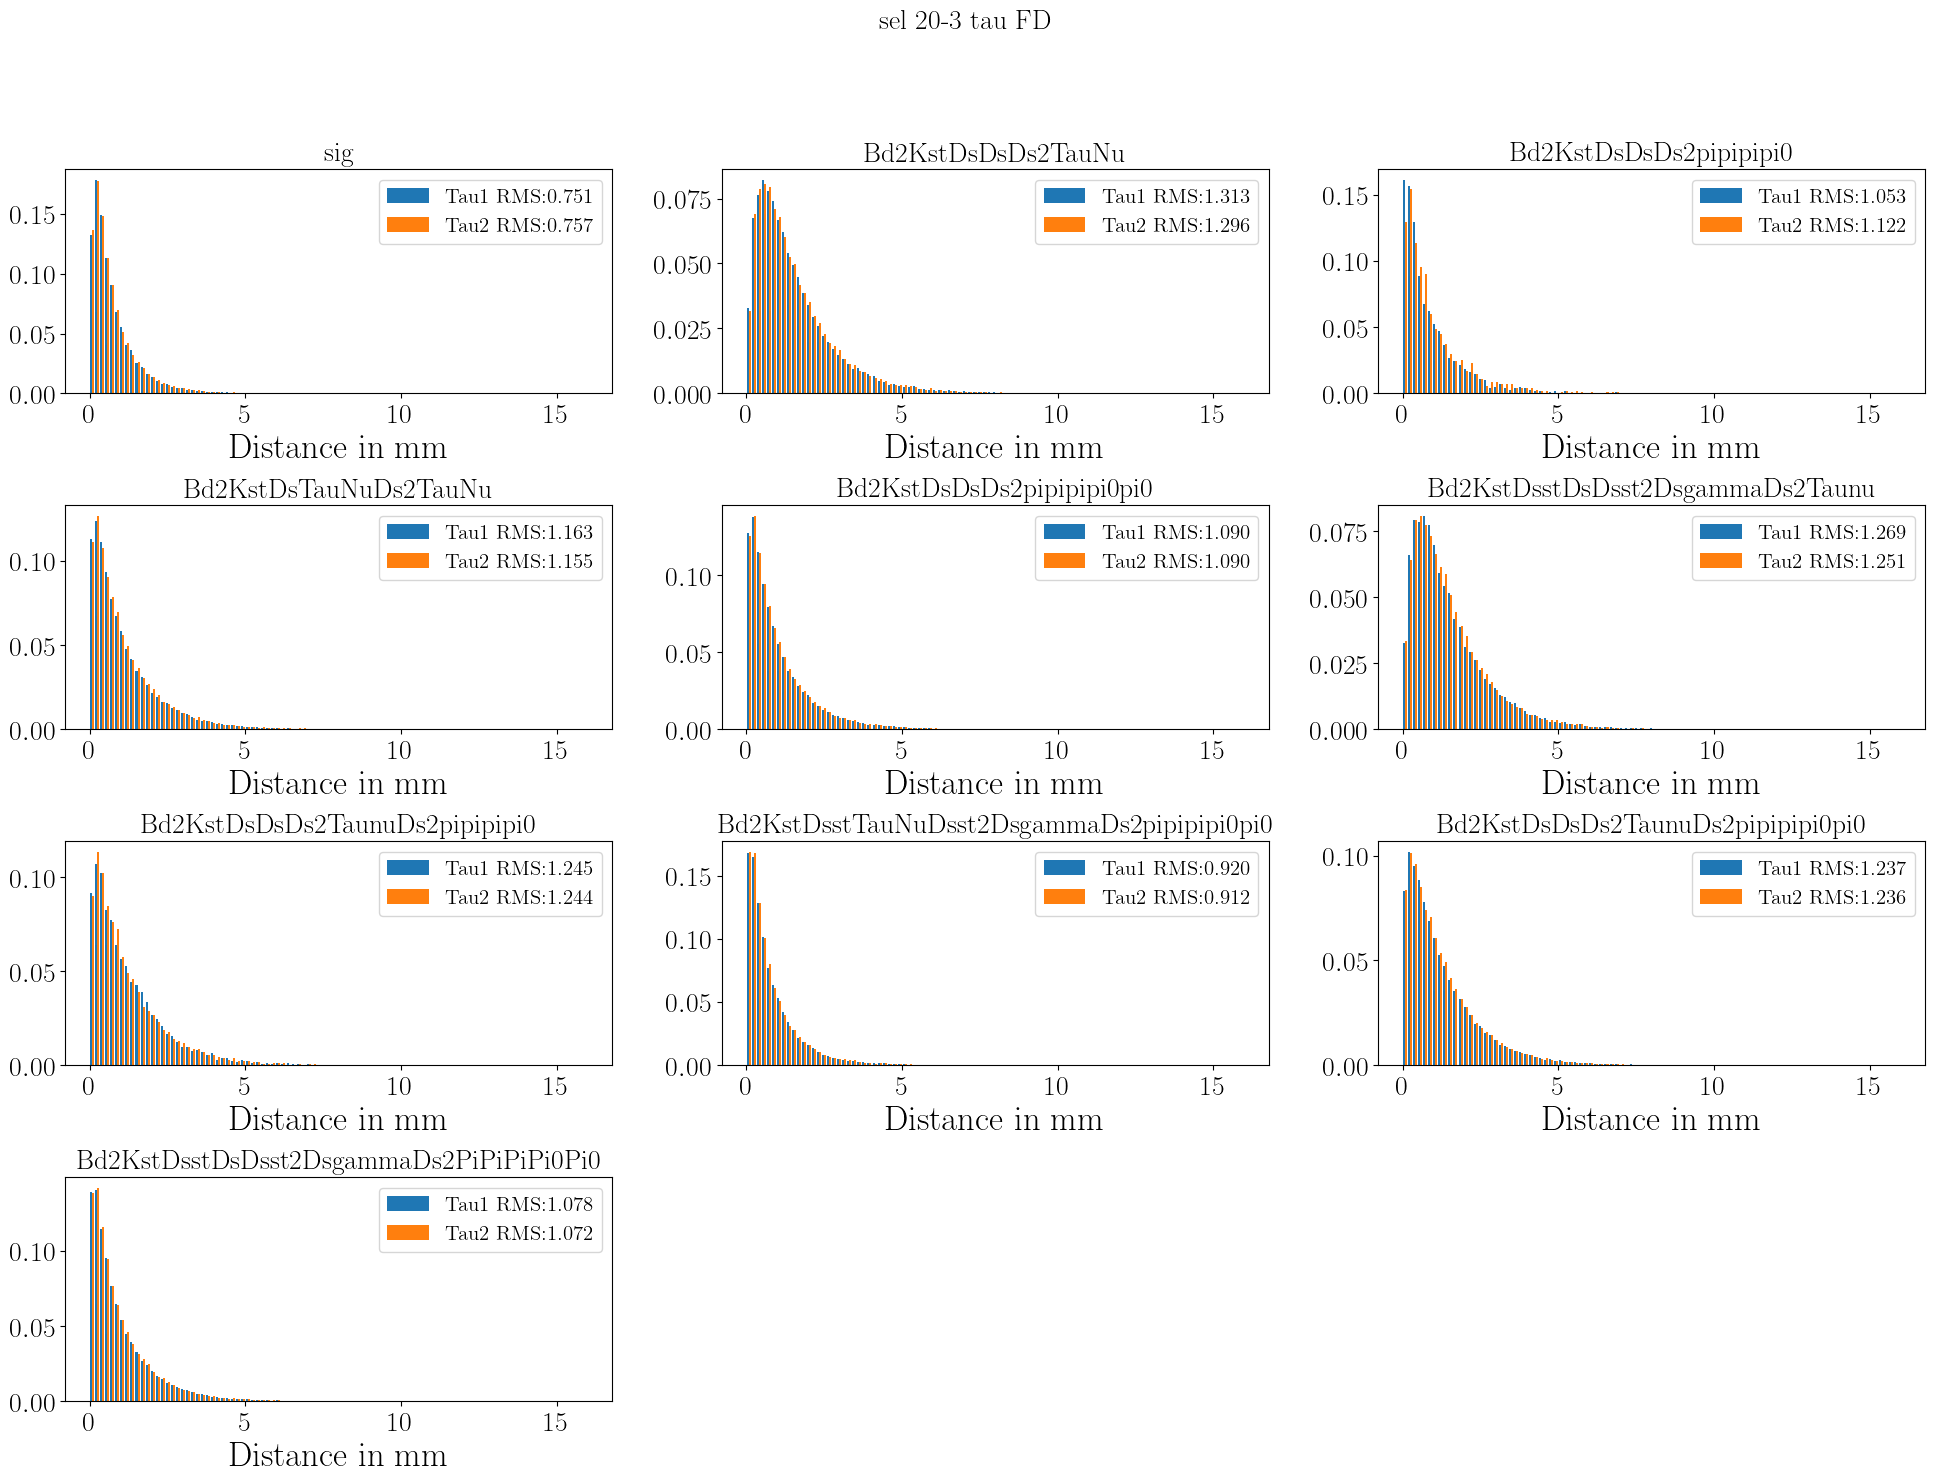

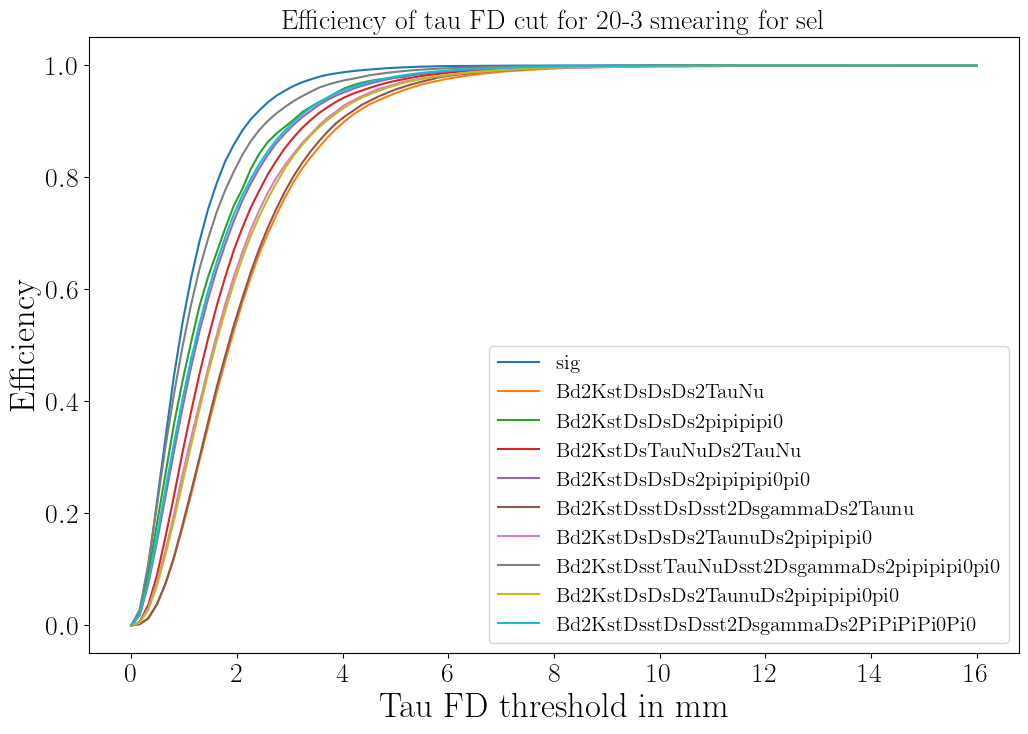

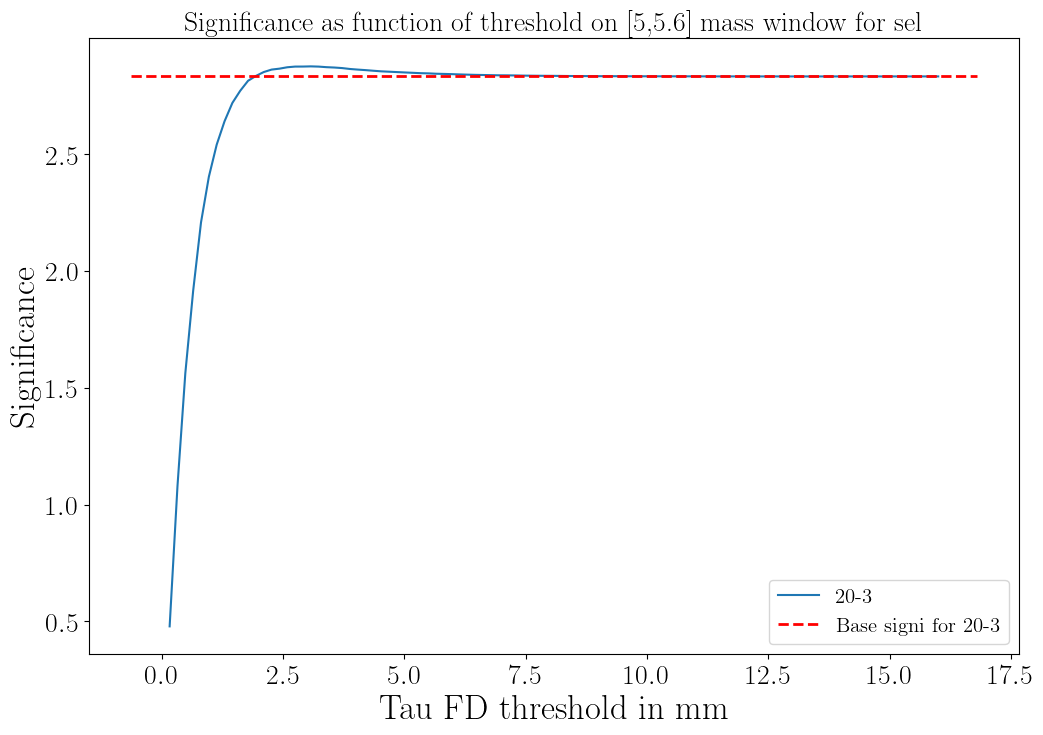

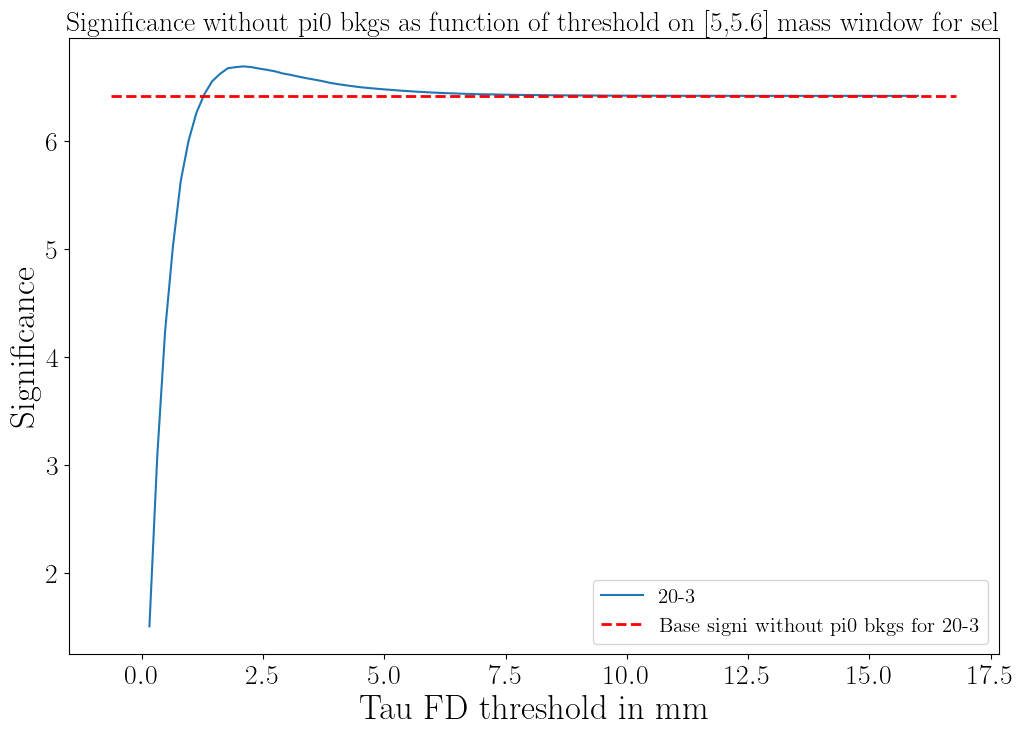

In [95]:
var=f"tau_FD"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,16,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau{tau}_FD"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_tau1_FD"],data[f"sig_{smearing}"][f"{i}_cut_study_tau2_FD"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_FD"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau2_FD"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('Distance in mm')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_FD"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau2_FD"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_FD"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau2_FD"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('Distance in mm')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_FD"]<T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau2_FD"]<T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cut for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('Tau FD threshold in mm')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Tau FD threshold in mm')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Tau FD threshold in mm')
    plt.ylabel('Significance')
    plt.legend();

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1461062823.py:81: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1461062823.py:99: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)


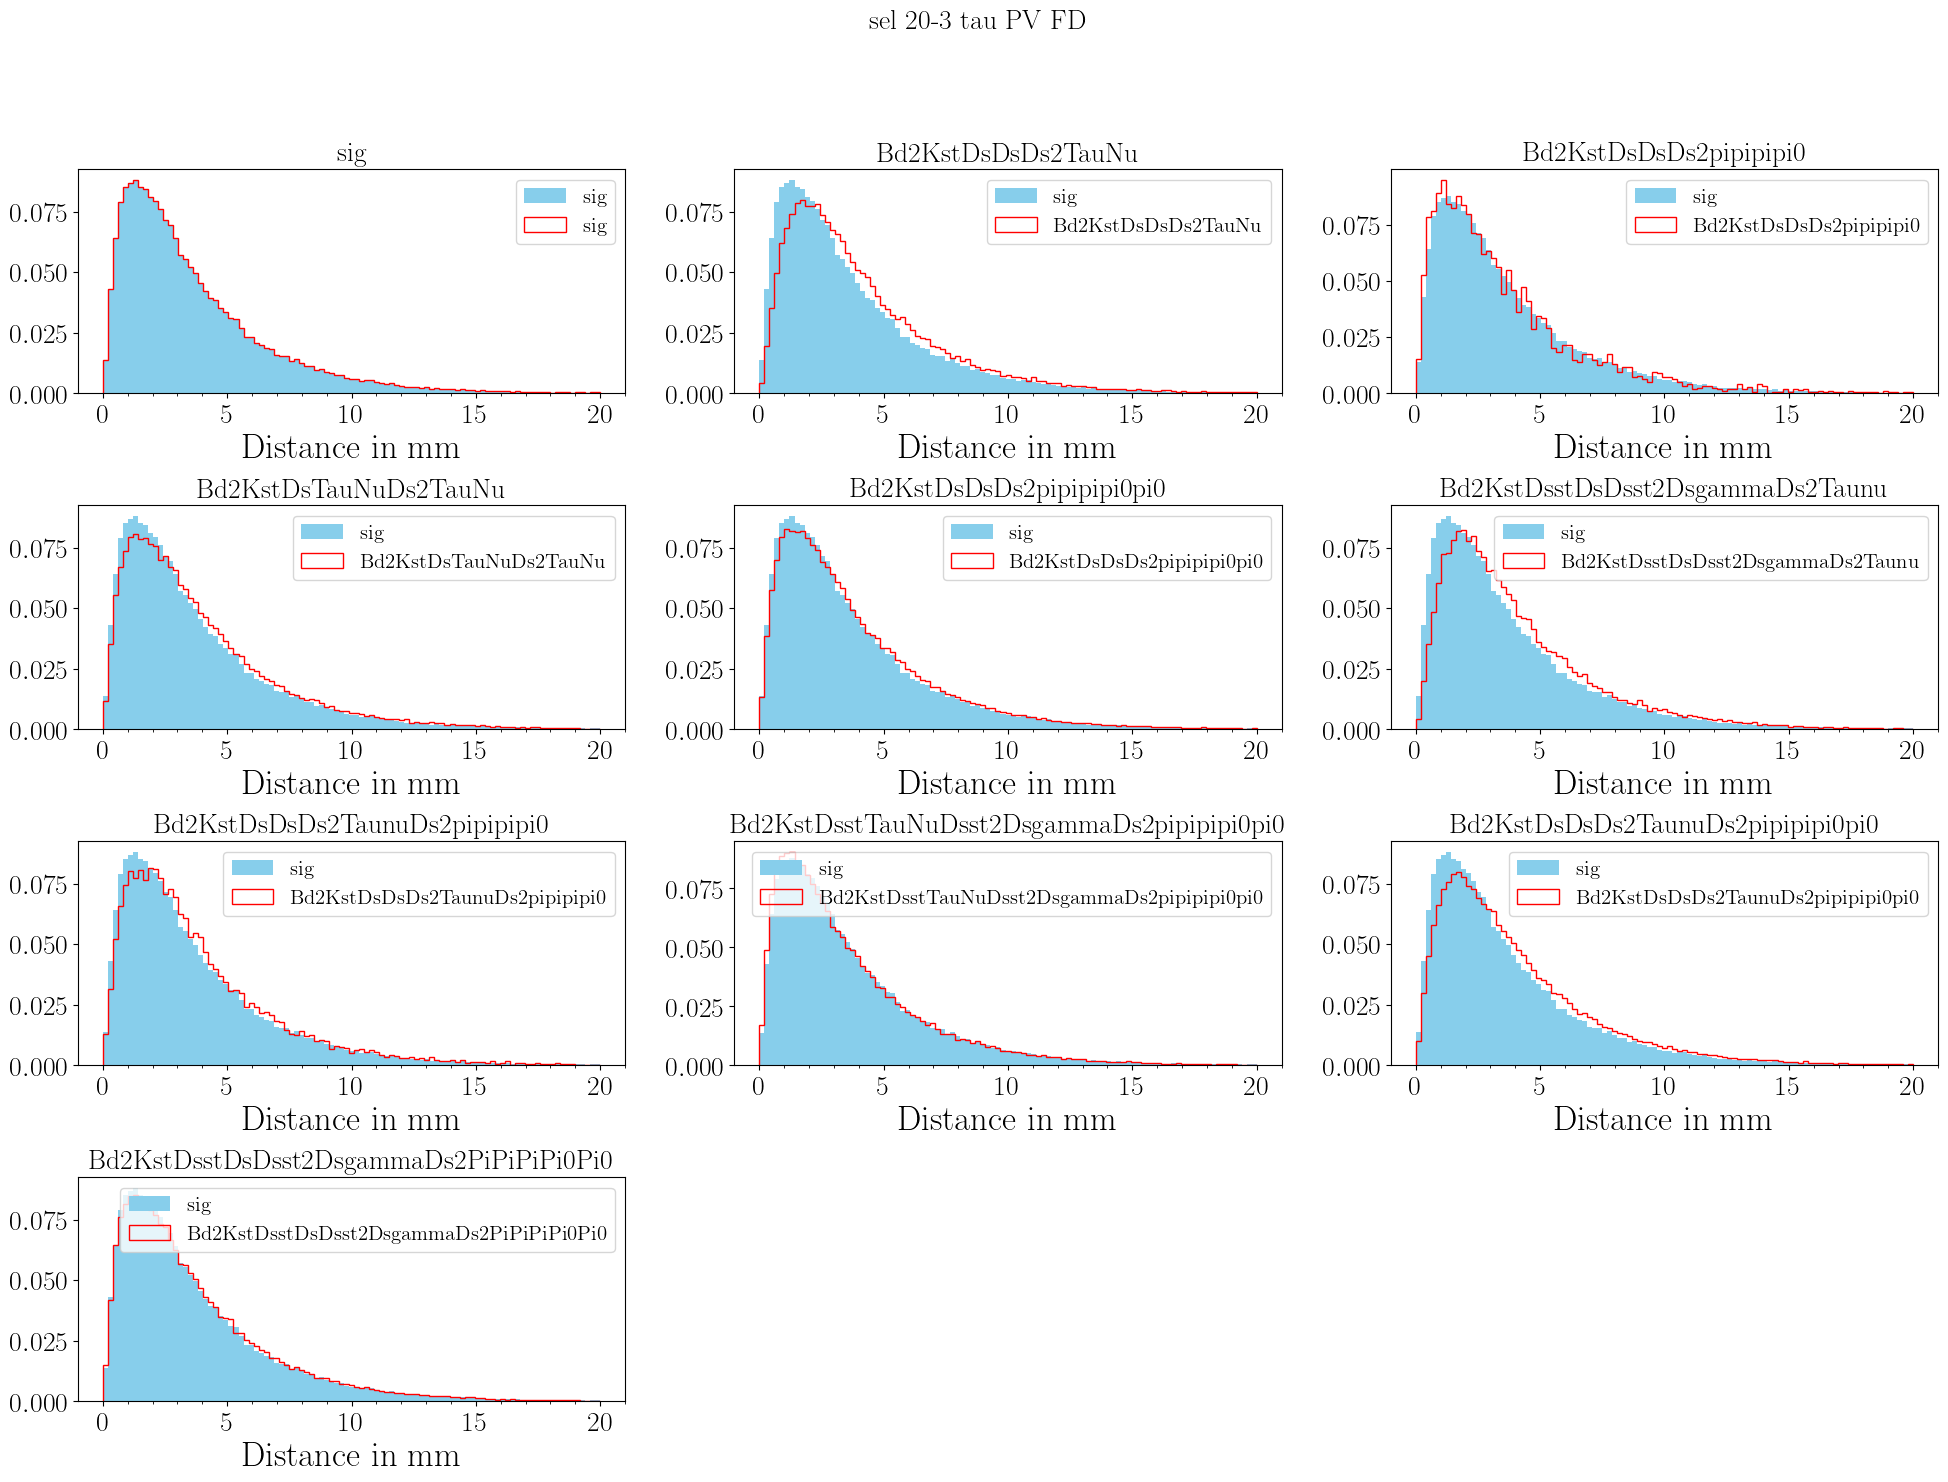

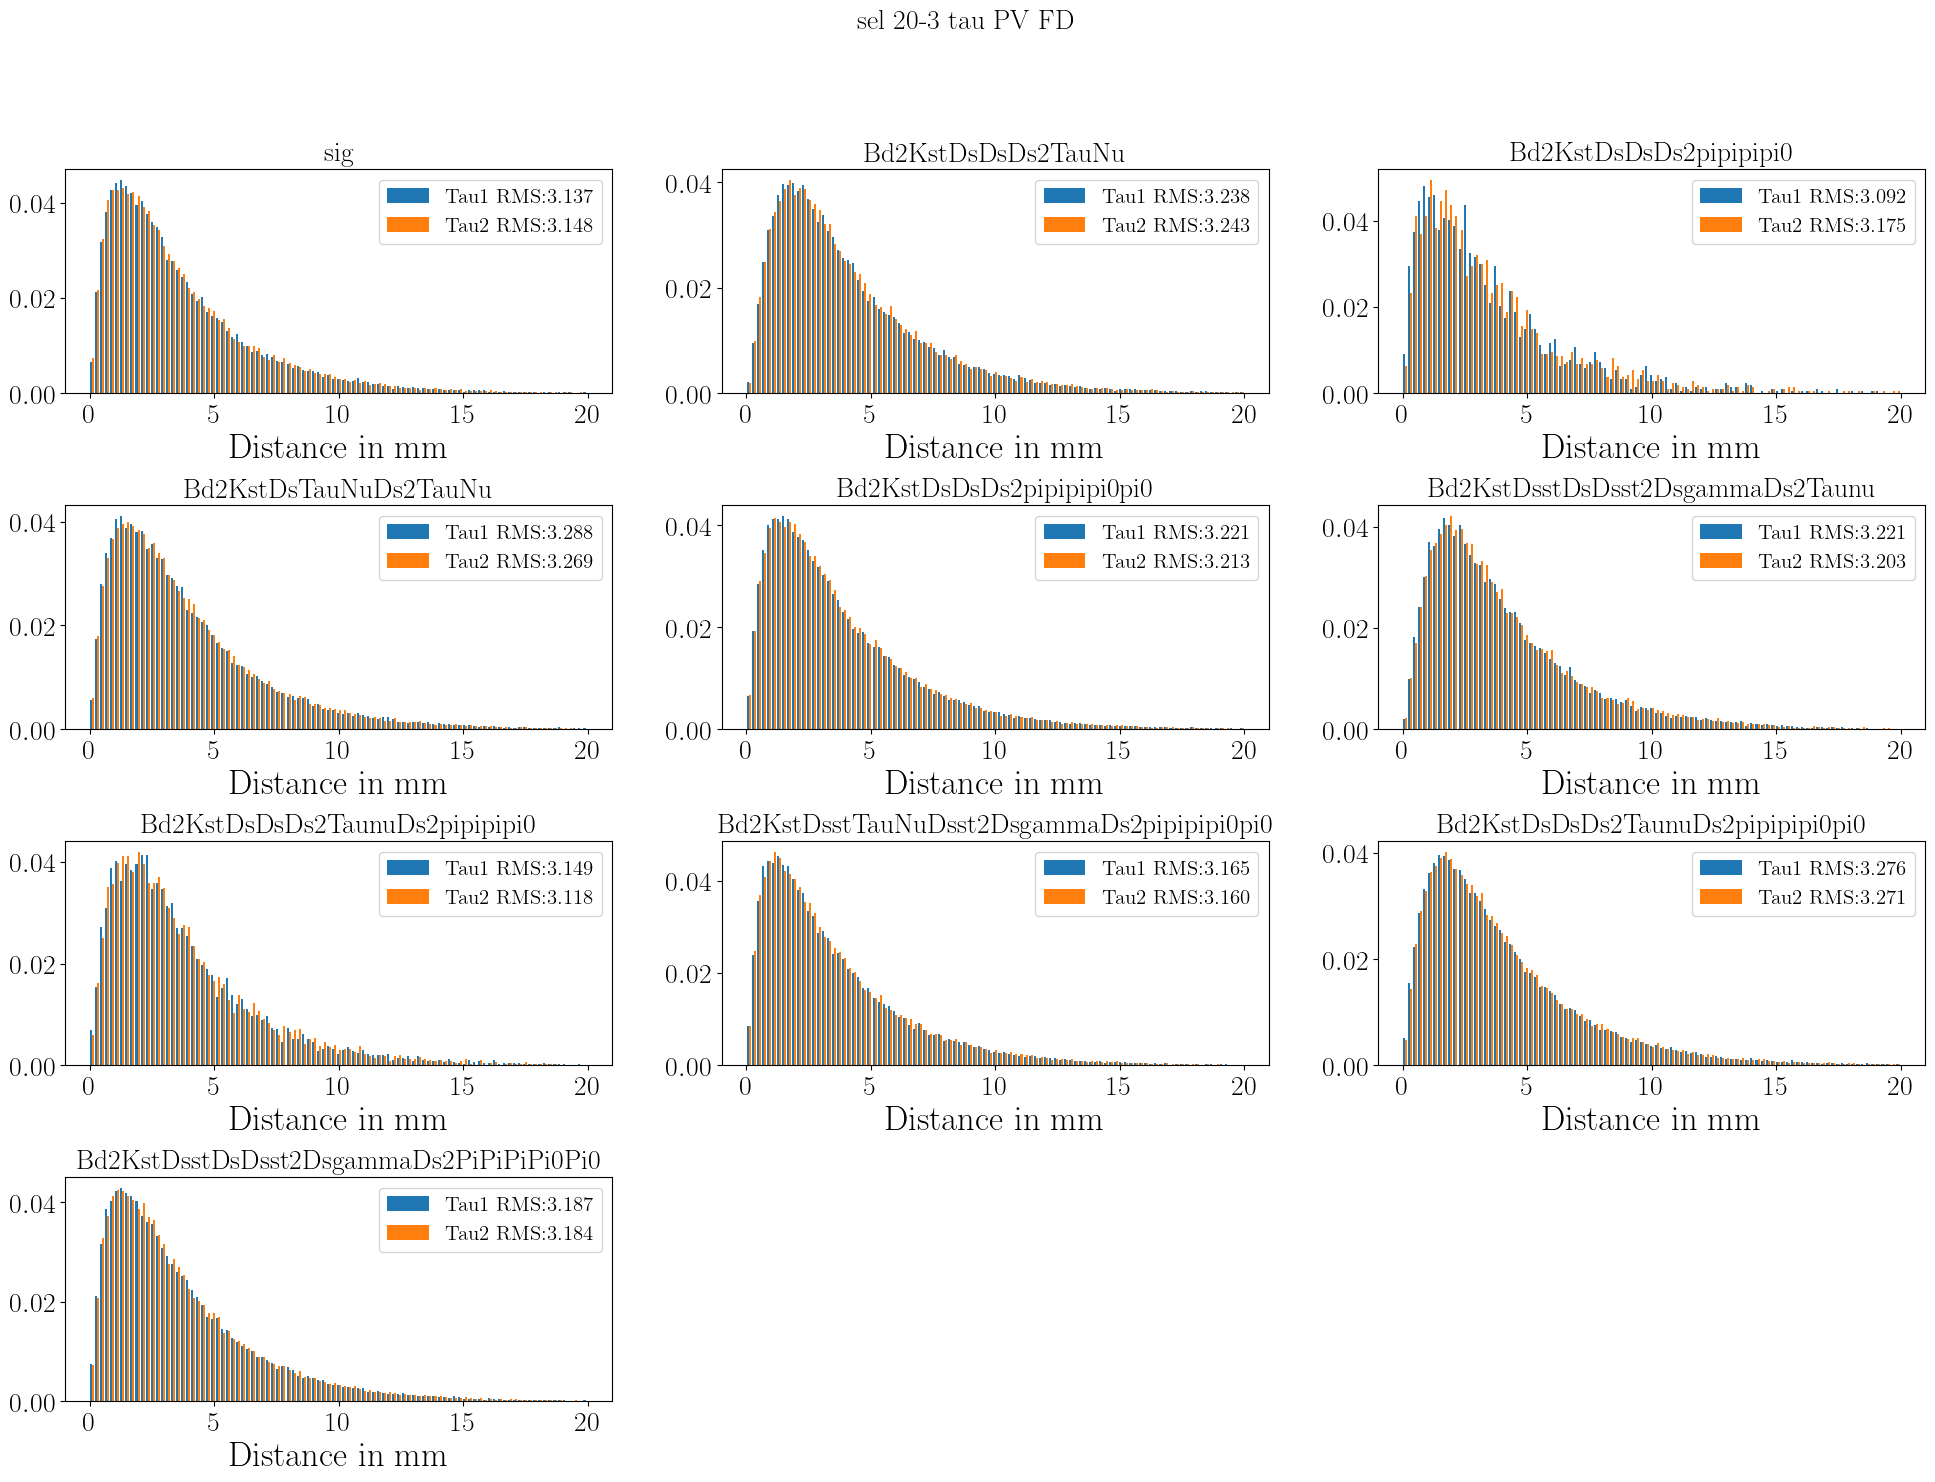

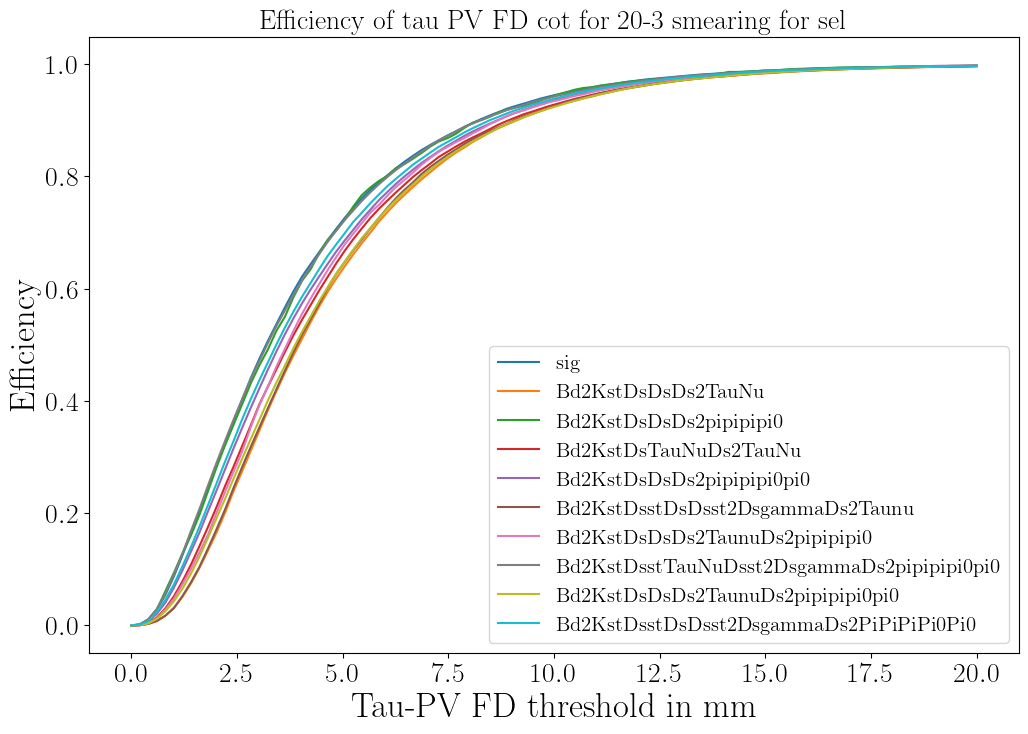

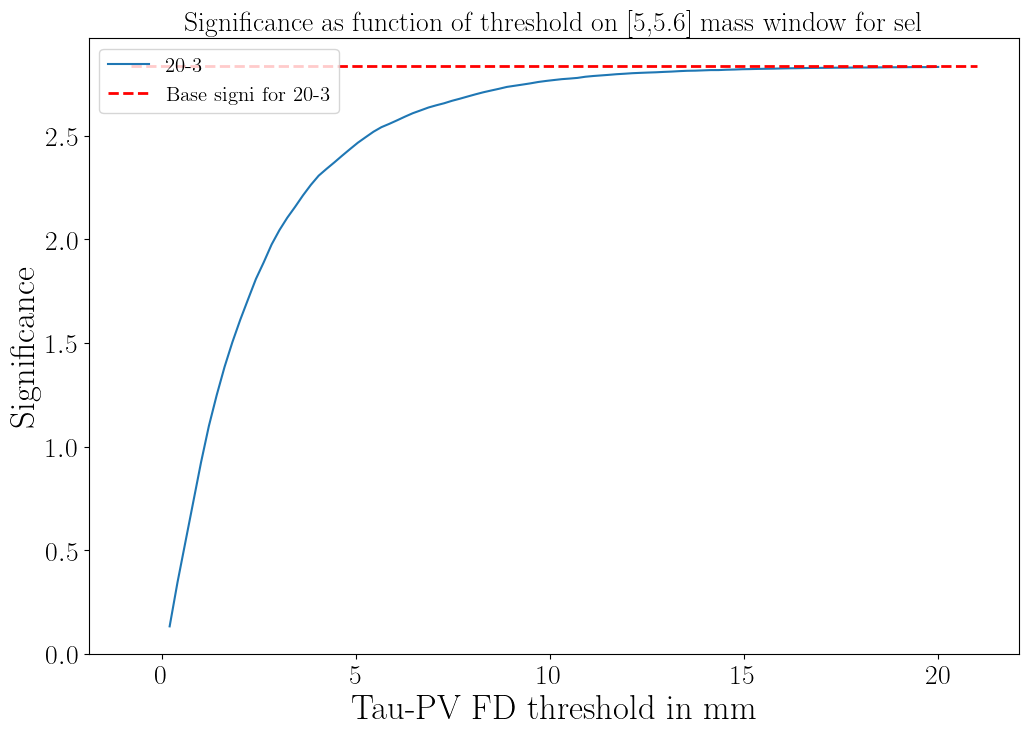

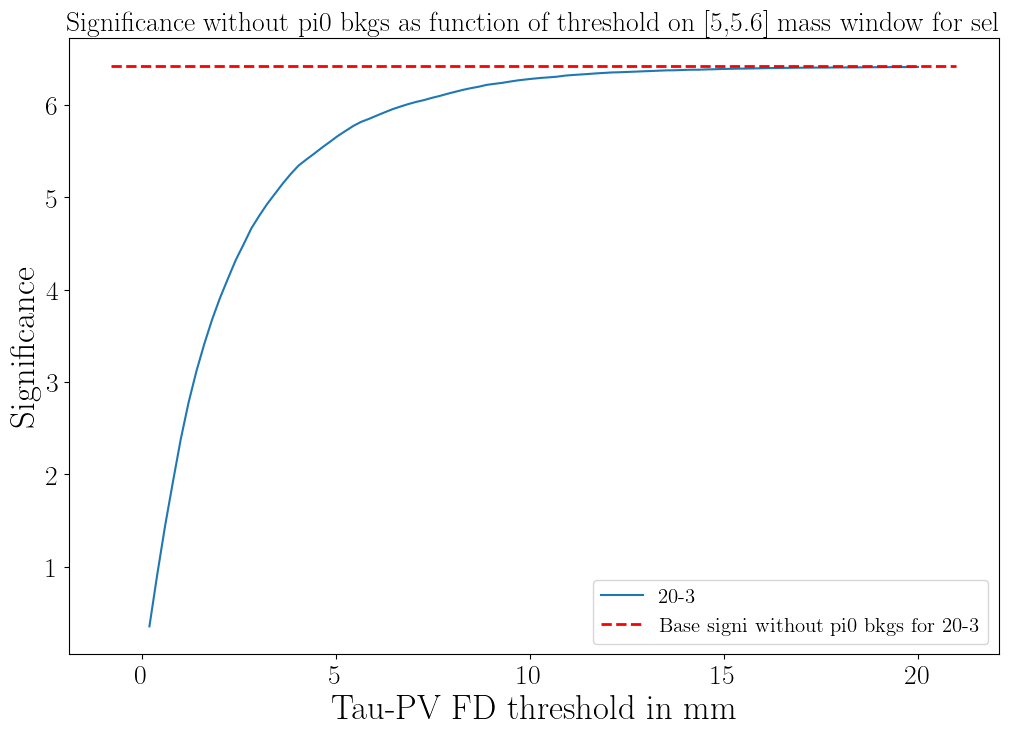

In [96]:
var=f"tau_PV_FD"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,20,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau{tau}_PV_FD"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_tau1_PV_FD"],data[f"sig_{smearing}"][f"{i}_cut_study_tau2_PV_FD"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_PV_FD"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau2_PV_FD"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('Distance in mm')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_PV_FD"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau2_PV_FD"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_PV_FD"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau2_PV_FD"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('Distance in mm')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau1_PV_FD"]<T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau2_PV_FD"]<T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cot for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('Tau-PV FD threshold in mm')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Tau-PV FD threshold in mm')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Tau-PV FD threshold in mm')
    plt.ylabel('Significance')
    plt.legend();

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/3892954724.py:75: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/3892954724.py:91: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)


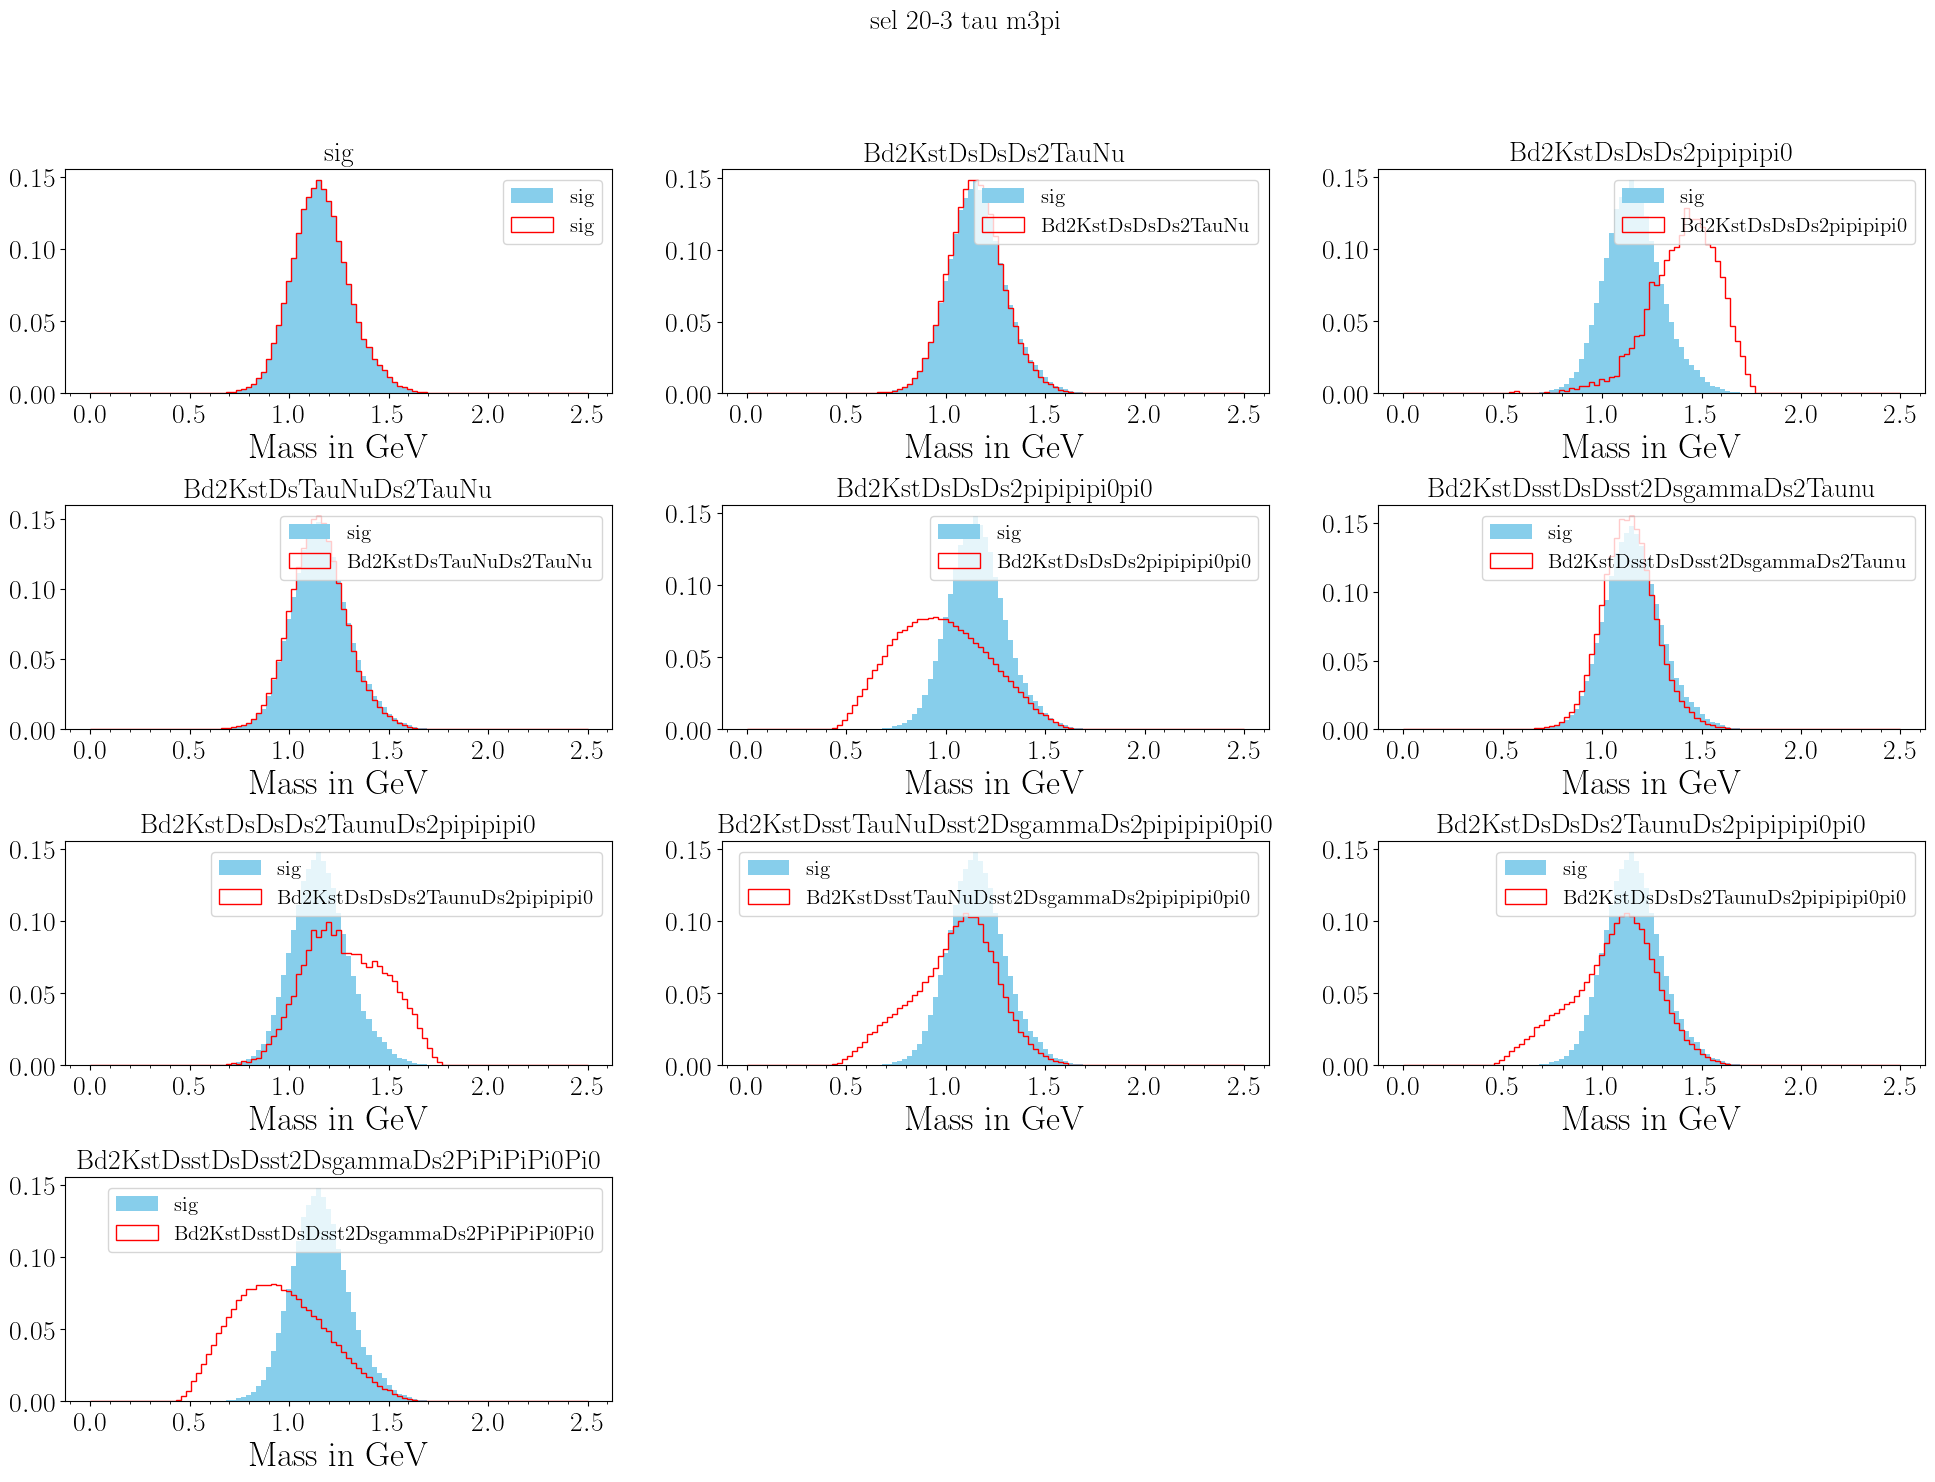

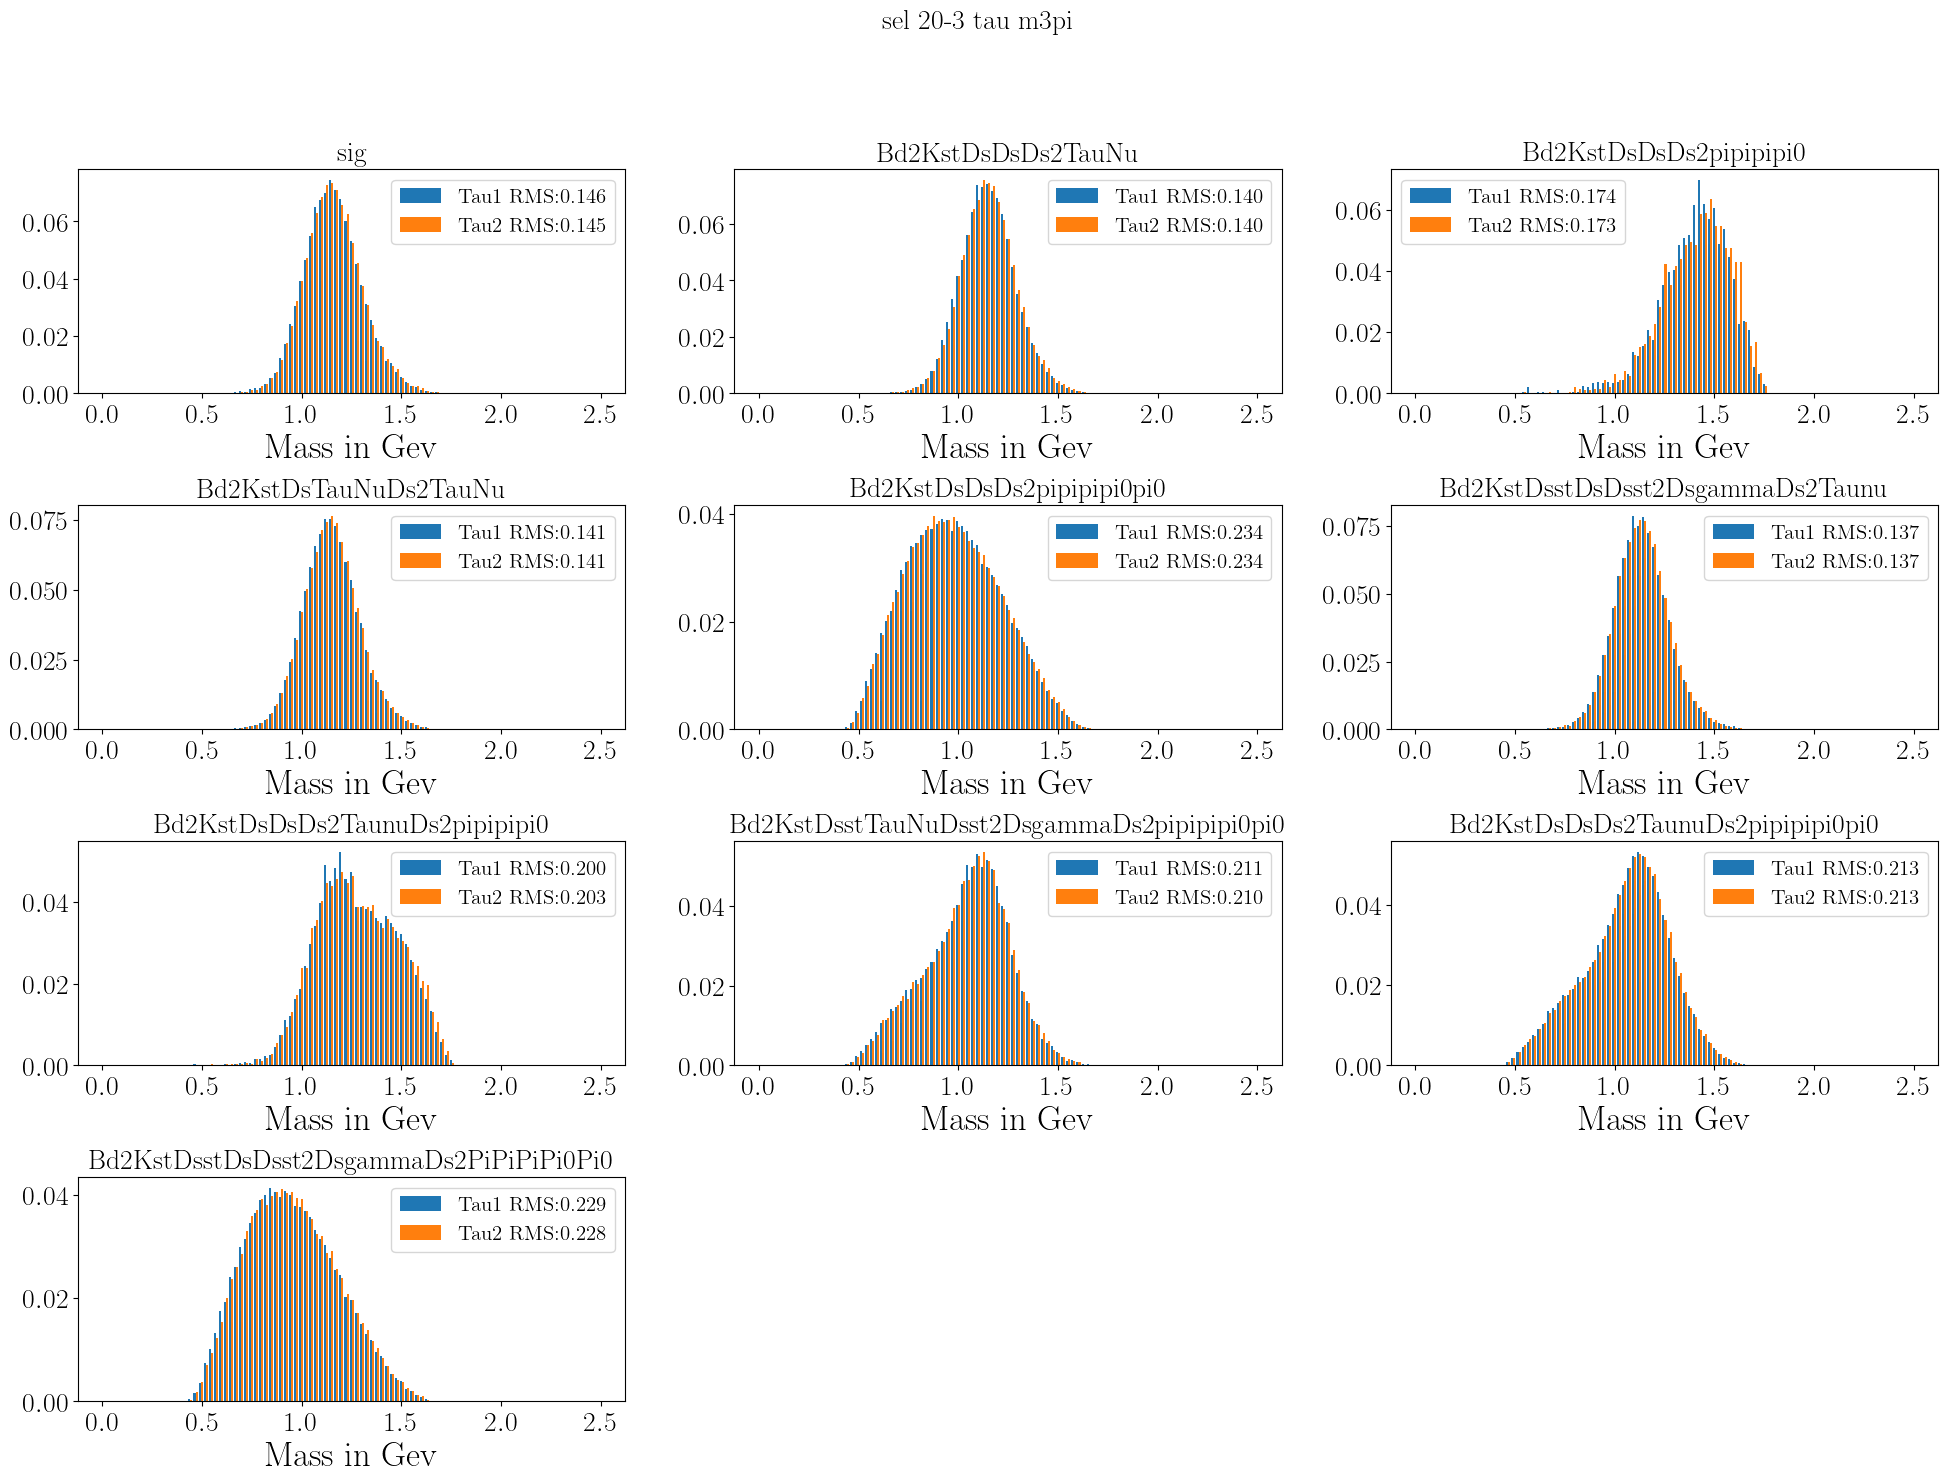

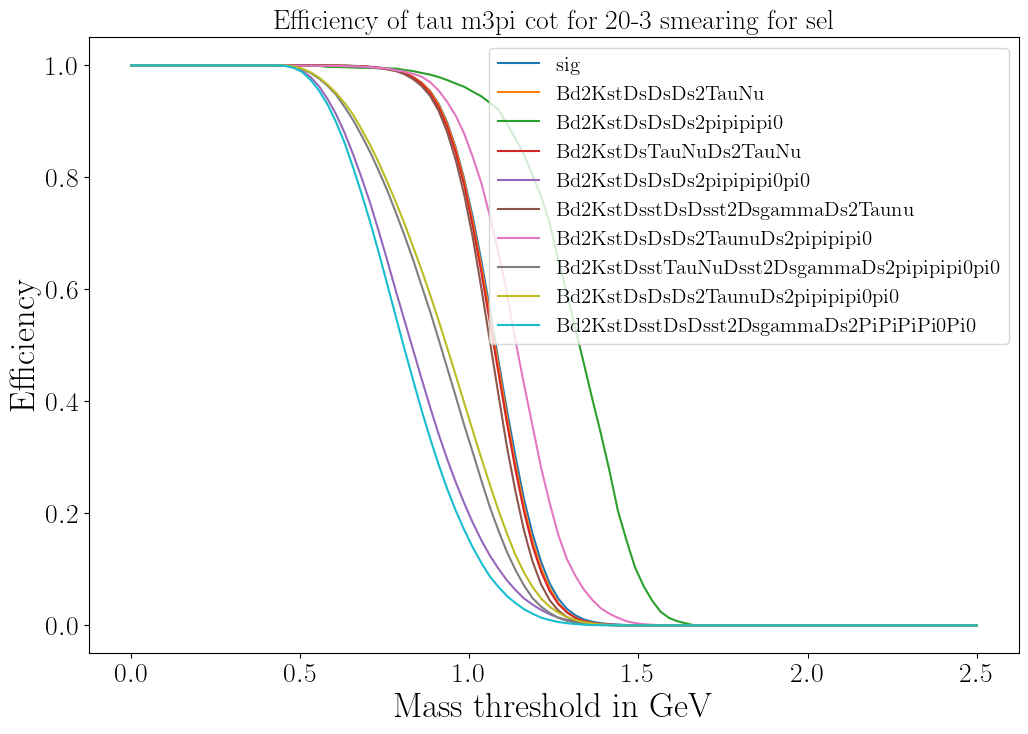

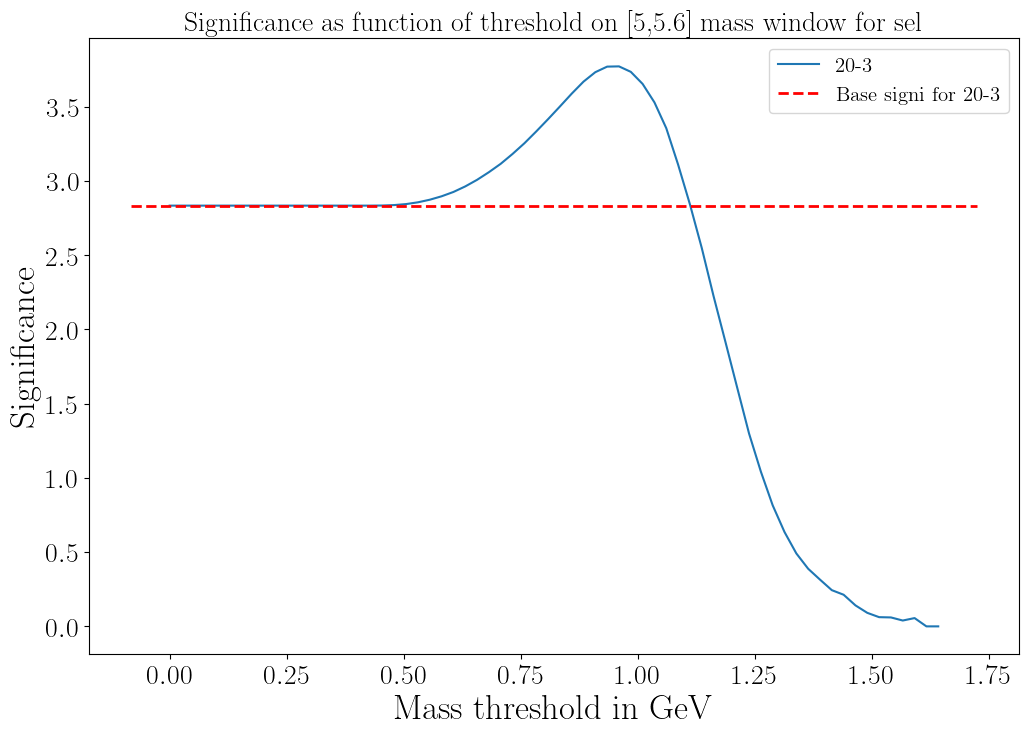

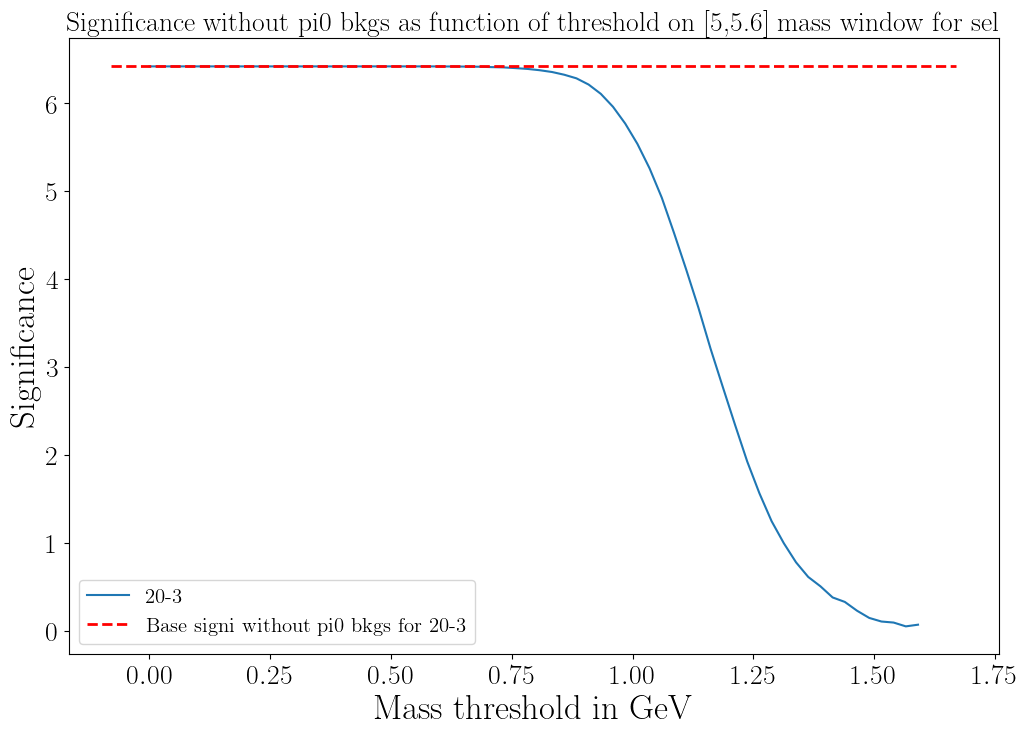

In [97]:
var=f"tau_m3pi"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,2.5,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_{tau}_m3pi"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')
for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_tau_1_m3pi"],data[f"sig_{smearing}"][f"{i}_cut_study_tau_2_m3pi"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m3pi"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m3pi"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('Mass in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m3pi"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m3pi"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m3pi"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m3pi"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('Mass in Gev')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m3pi"]>T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m3pi"]>T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    for smearing in listsmearing:
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cot for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1524552691.py:76: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1524552691.py:92: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)


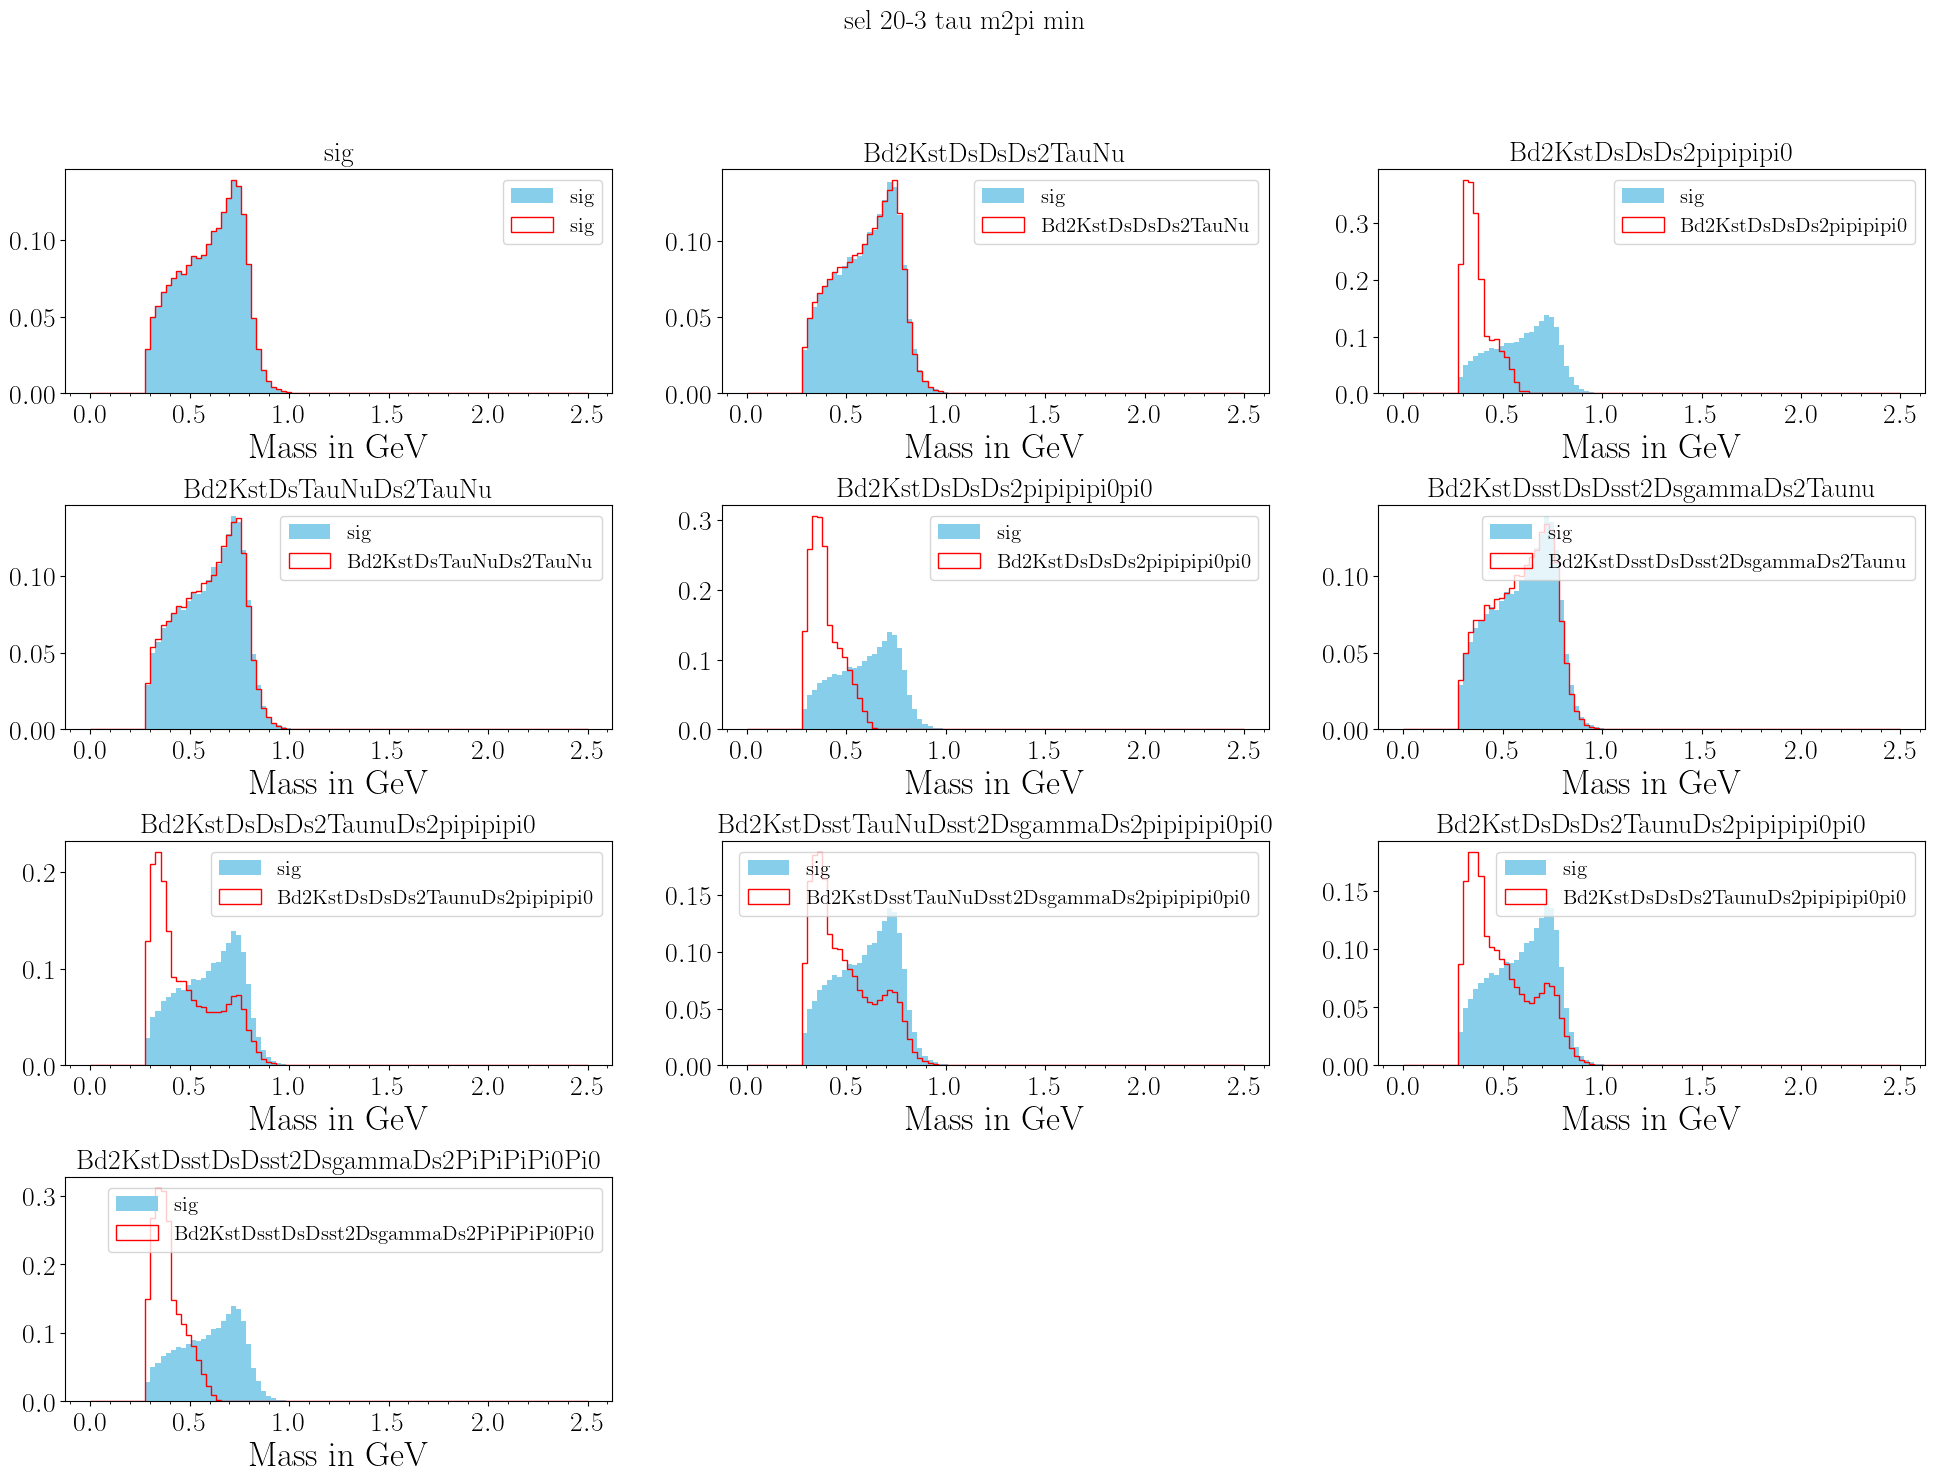

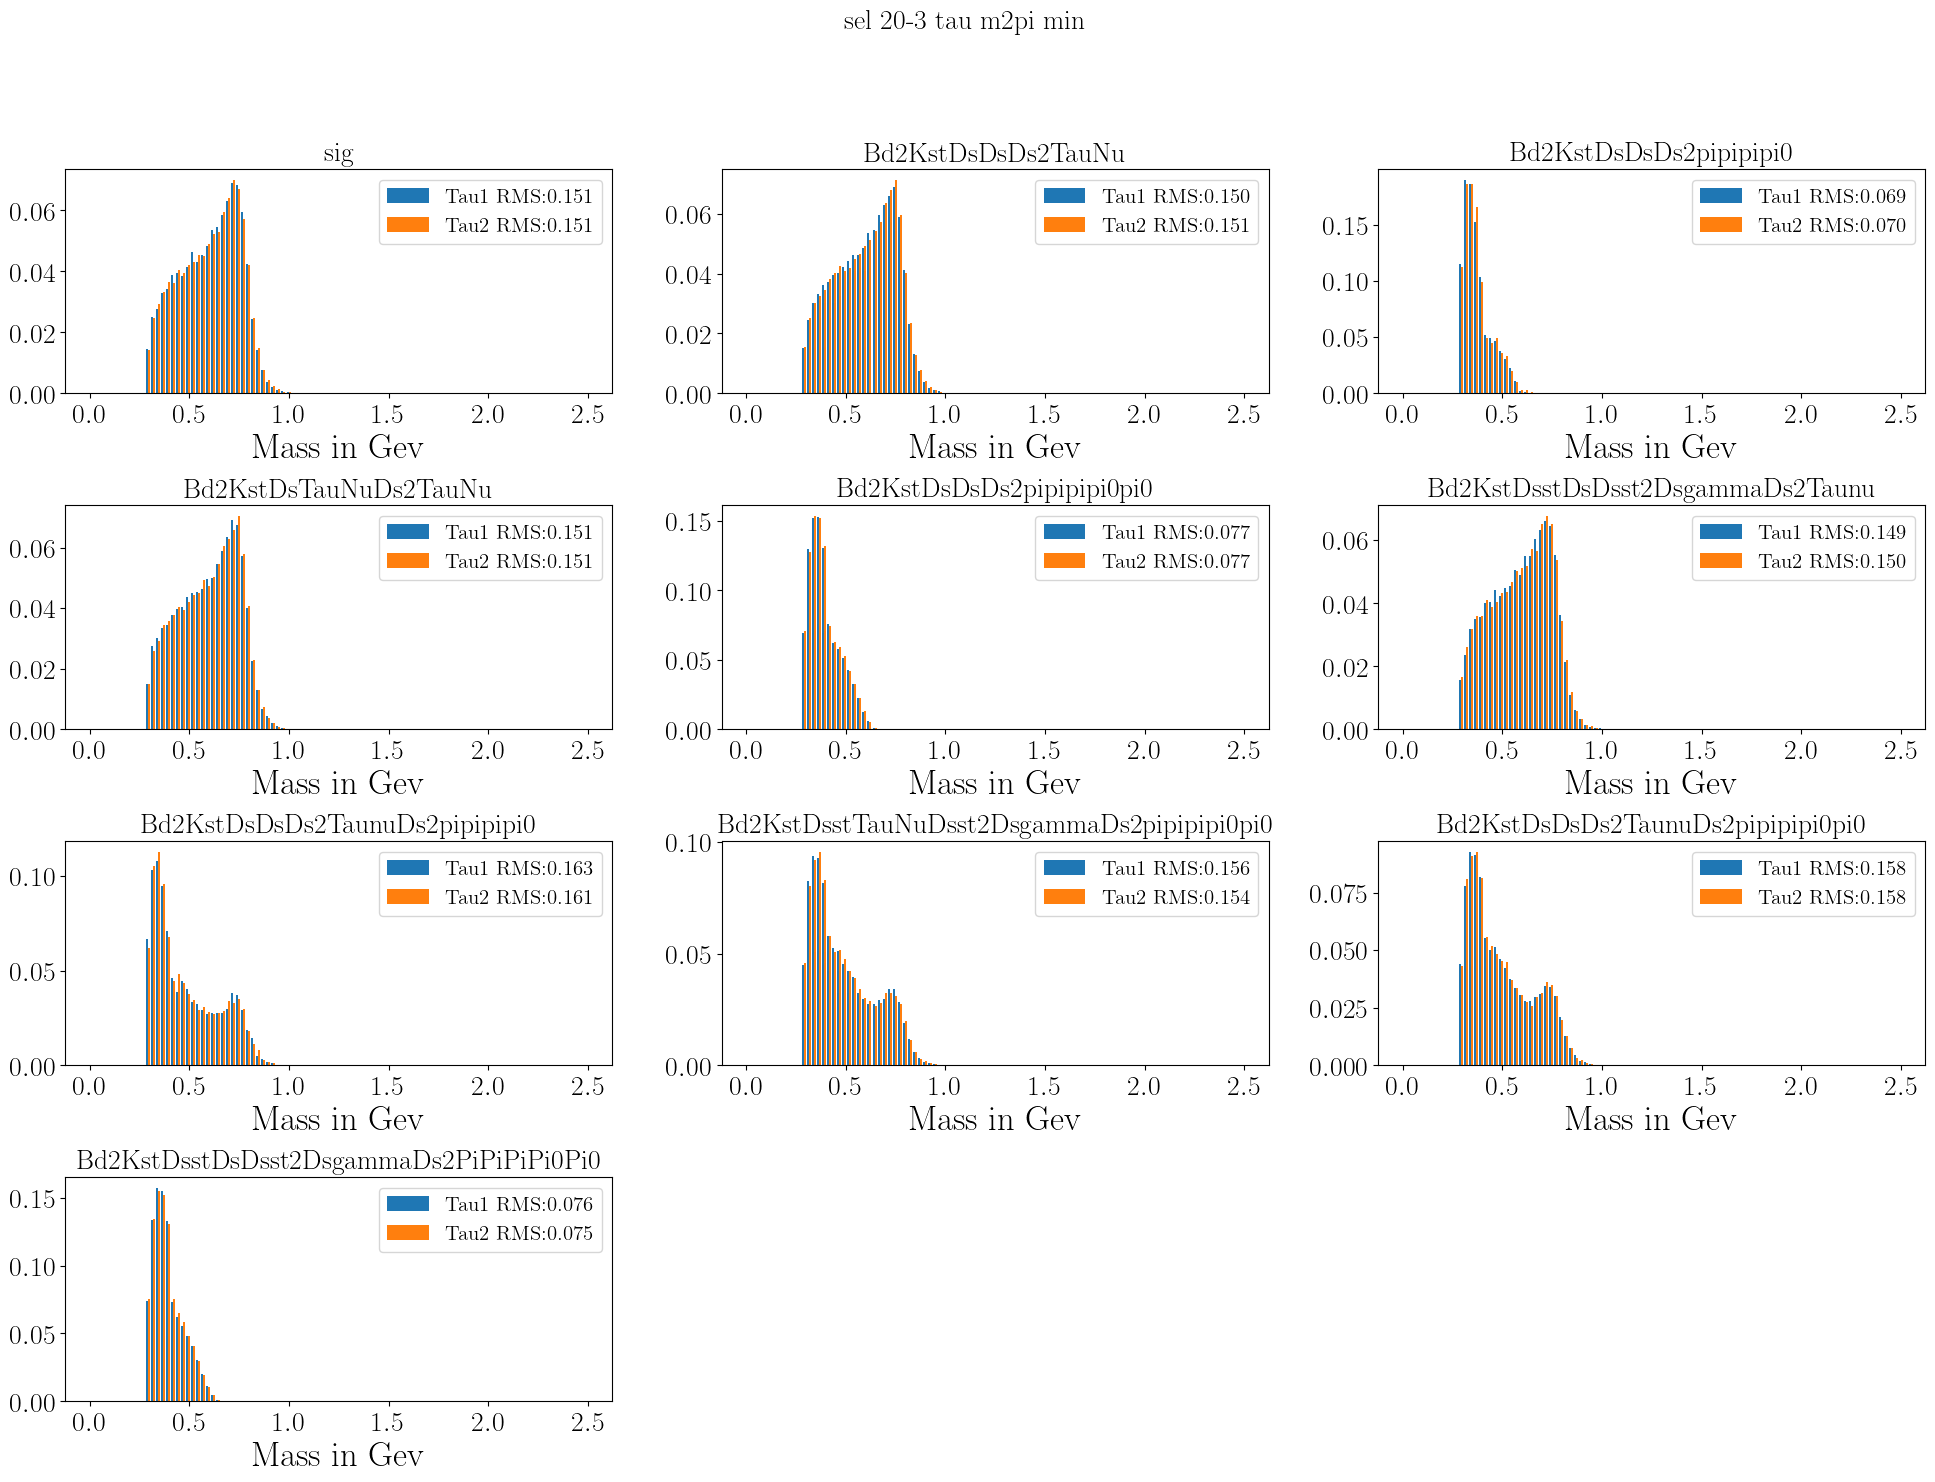

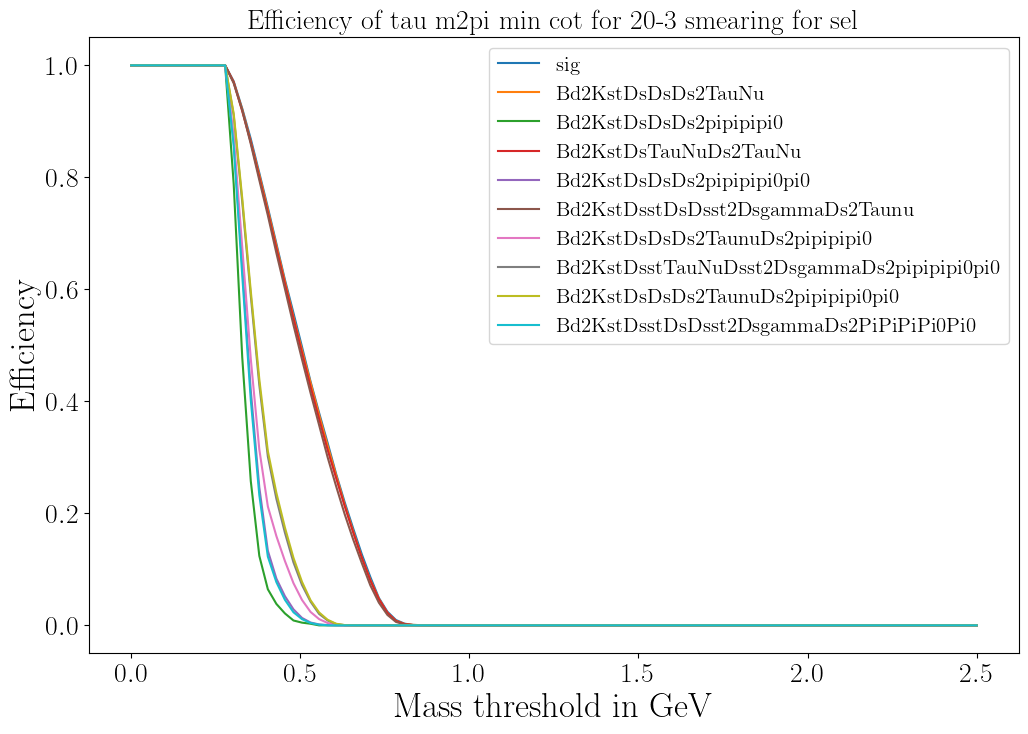

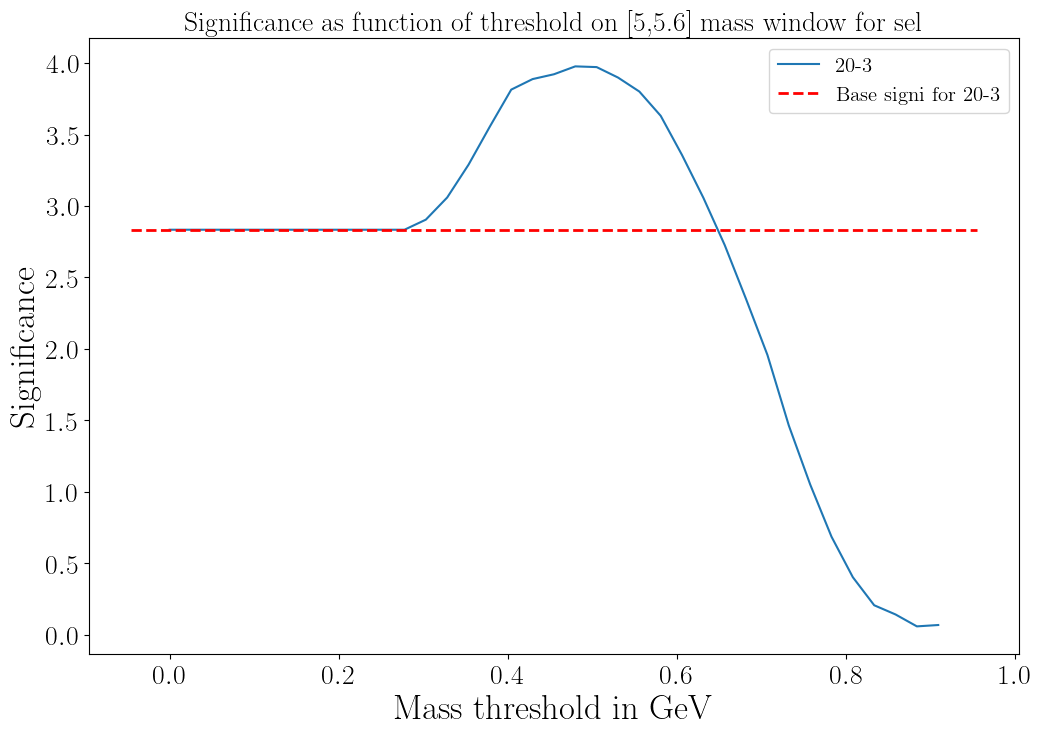

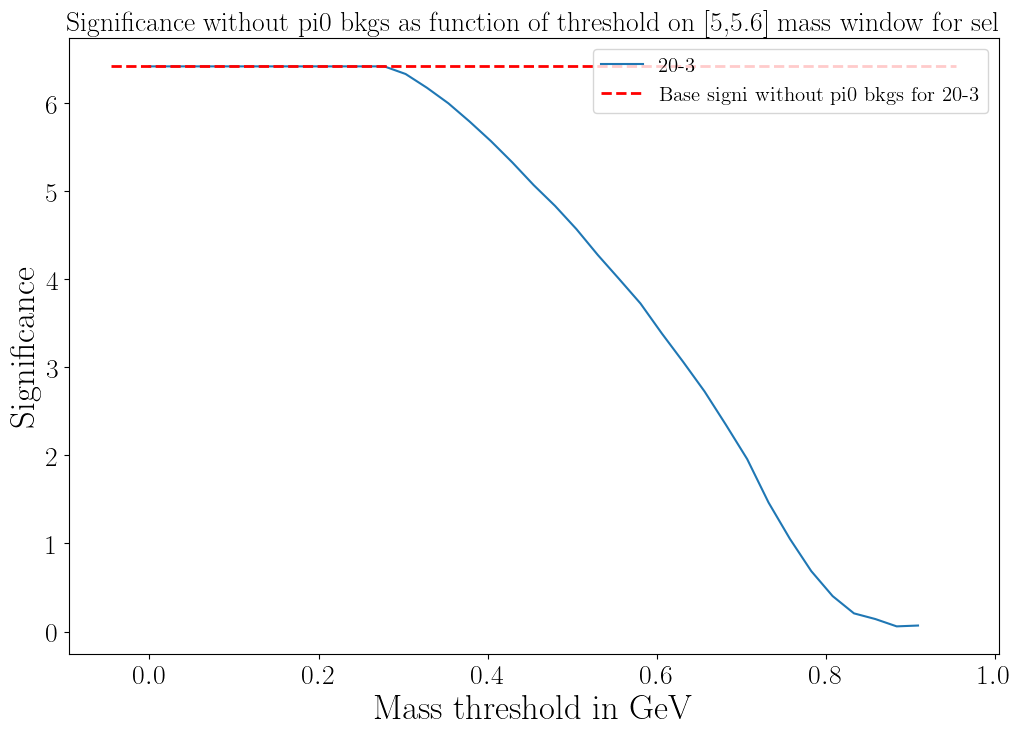

In [98]:
var=f"tau_m2pi_min"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,2.5,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_{tau}_m2pi_min"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_tau_1_m2pi_min"],data[f"sig_{smearing}"][f"{i}_cut_study_tau_2_m2pi_min"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_min"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_min"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('Mass in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_min"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_min"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_min"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_min"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('Mass in Gev')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_min"]>T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_min"]>T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    for smearing in listsmearing:
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cot for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/606156820.py:76: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/606156820.py:92: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)


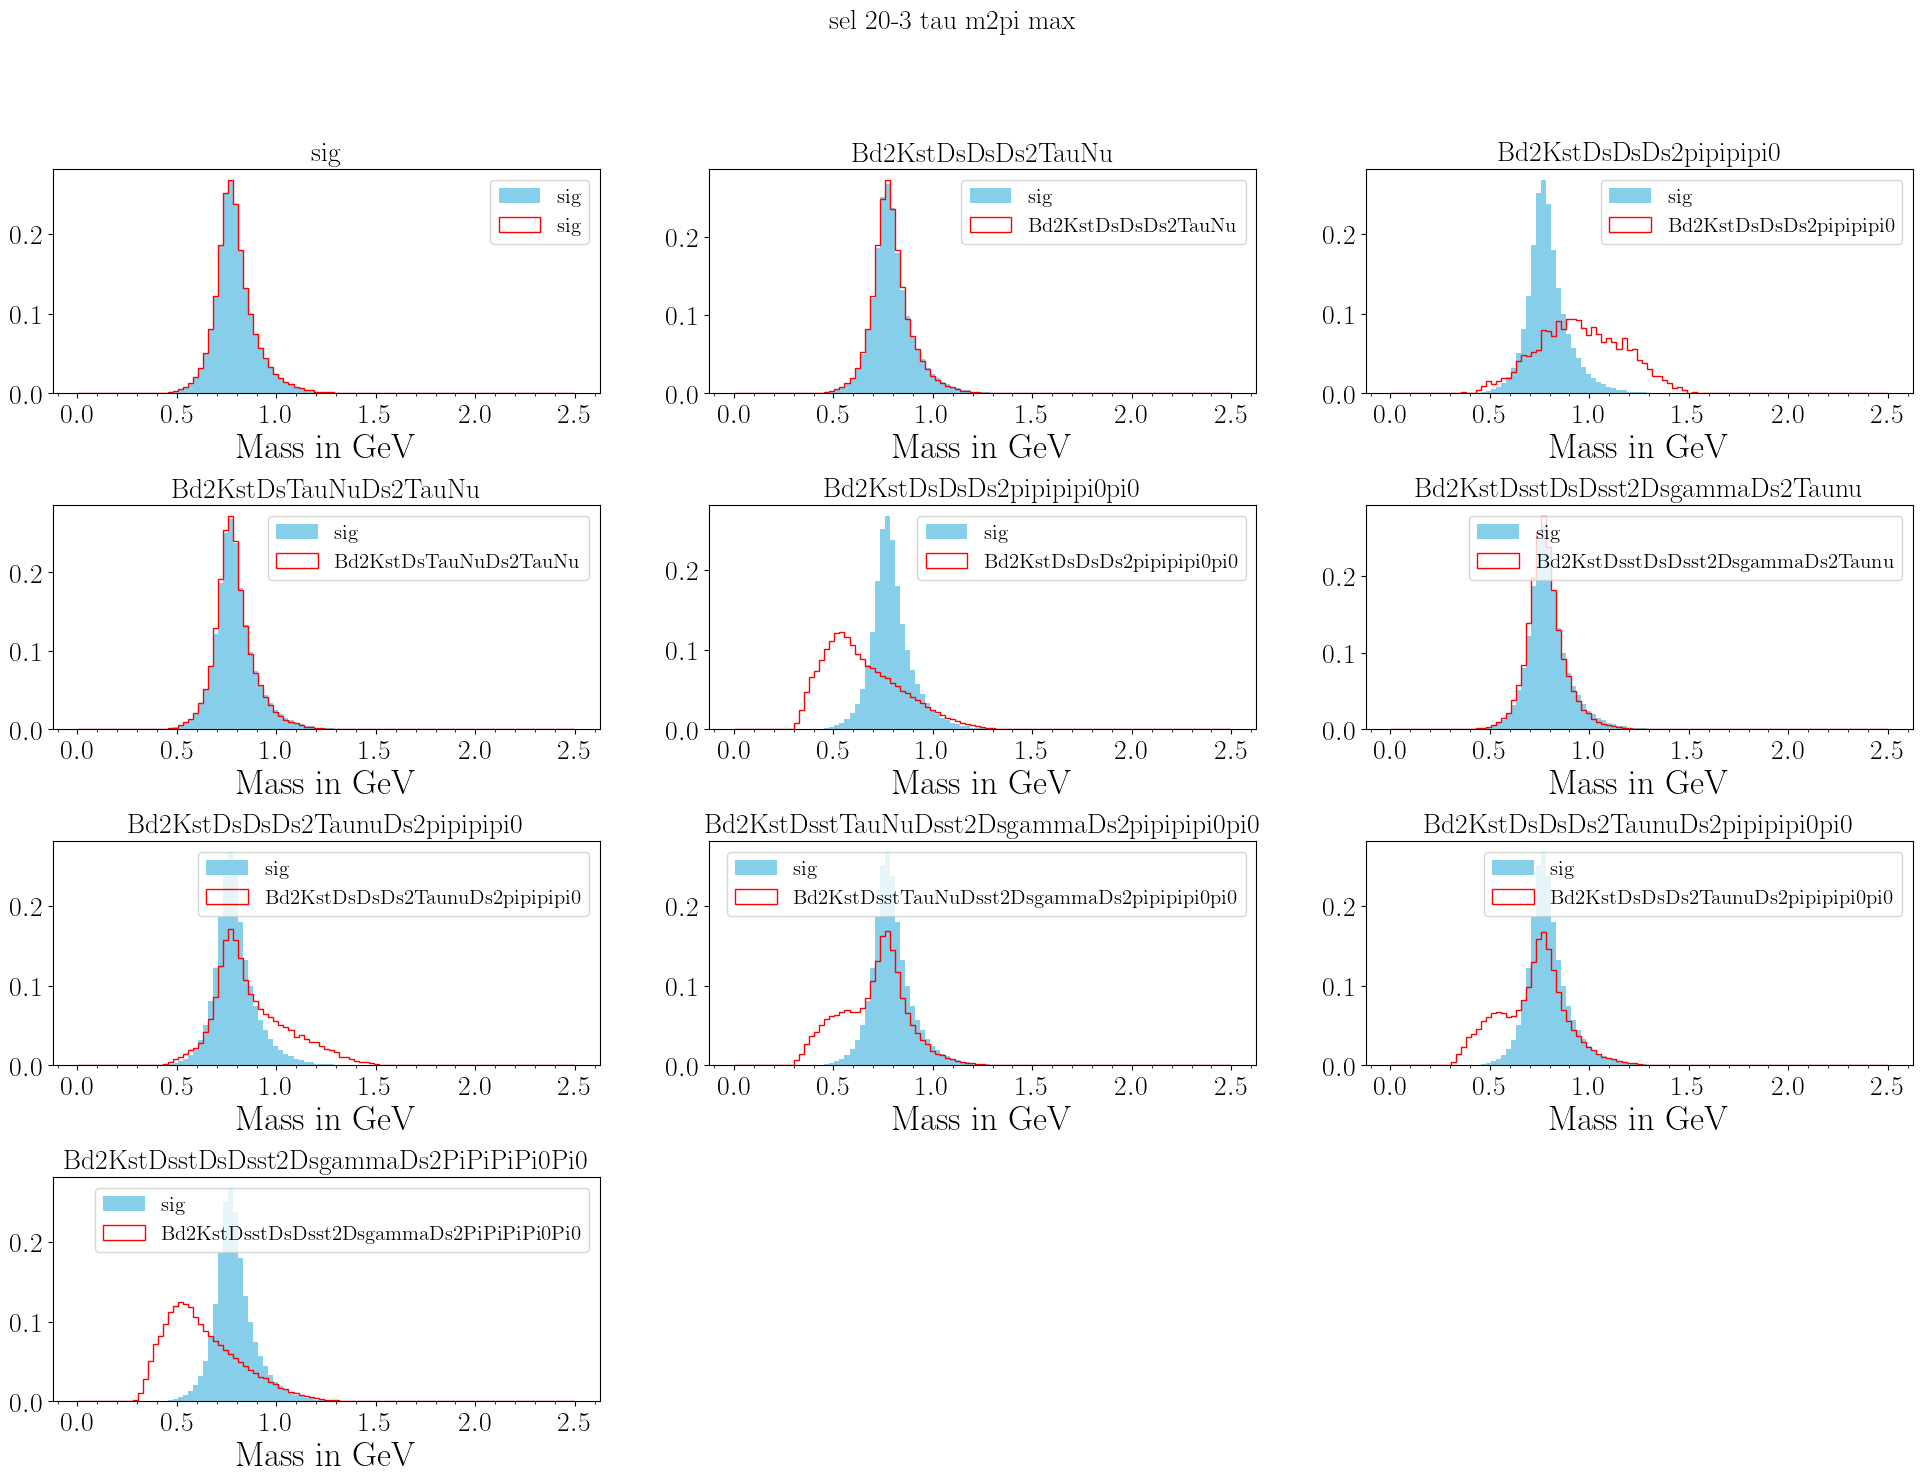

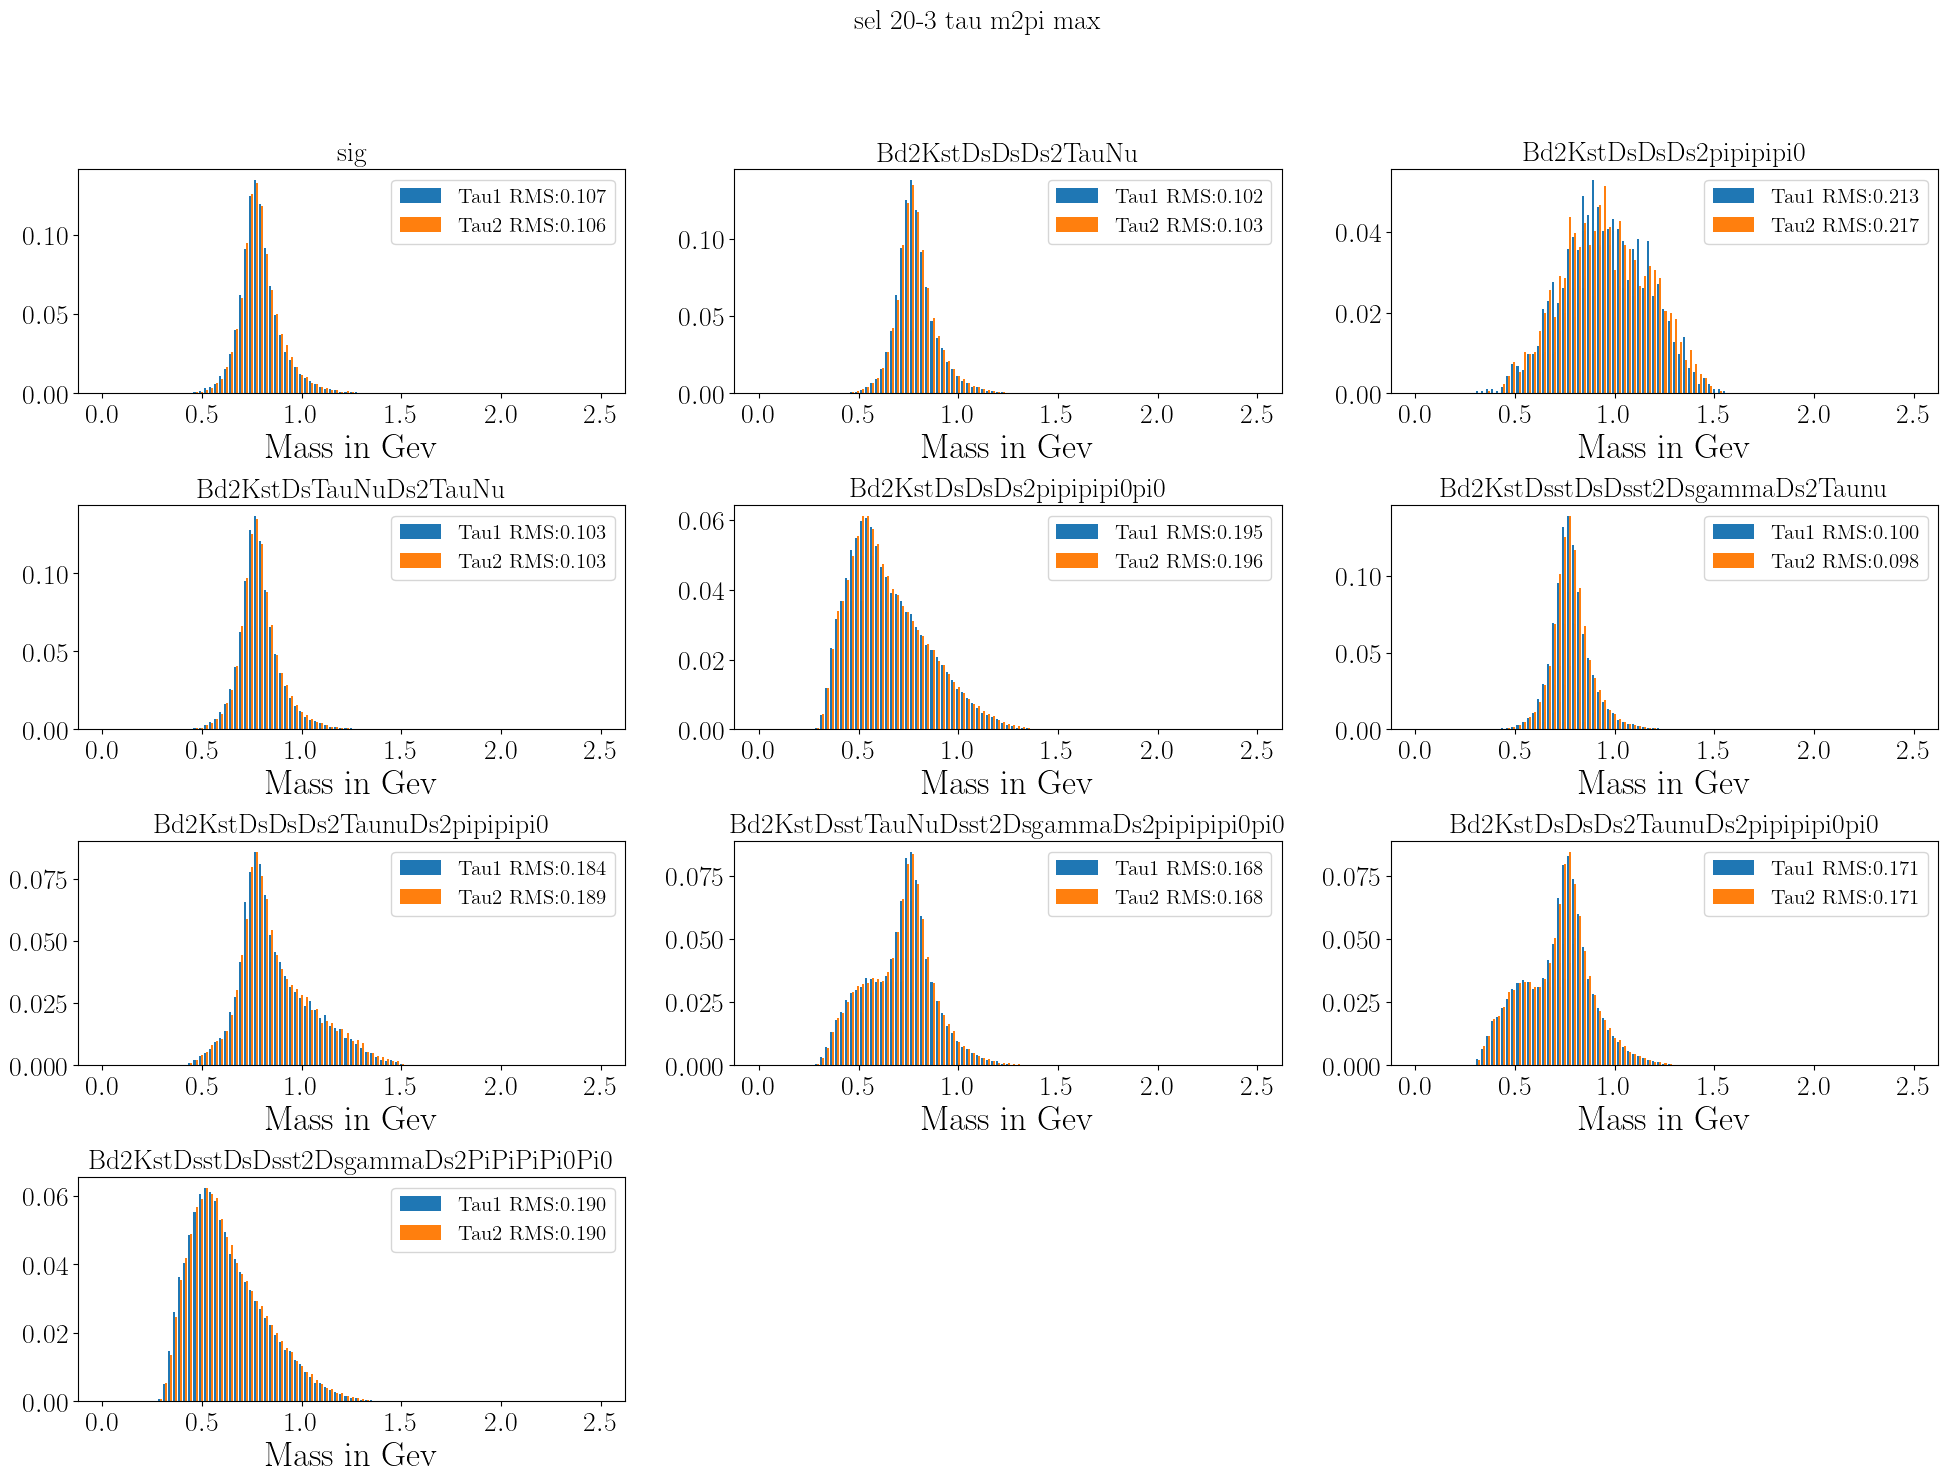

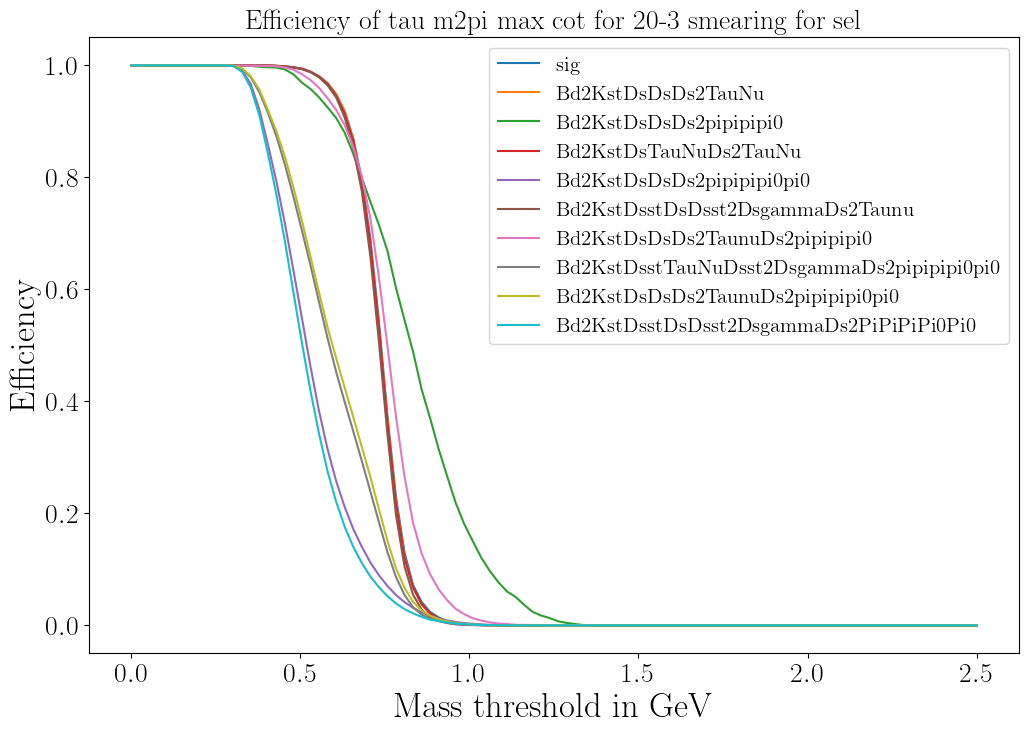

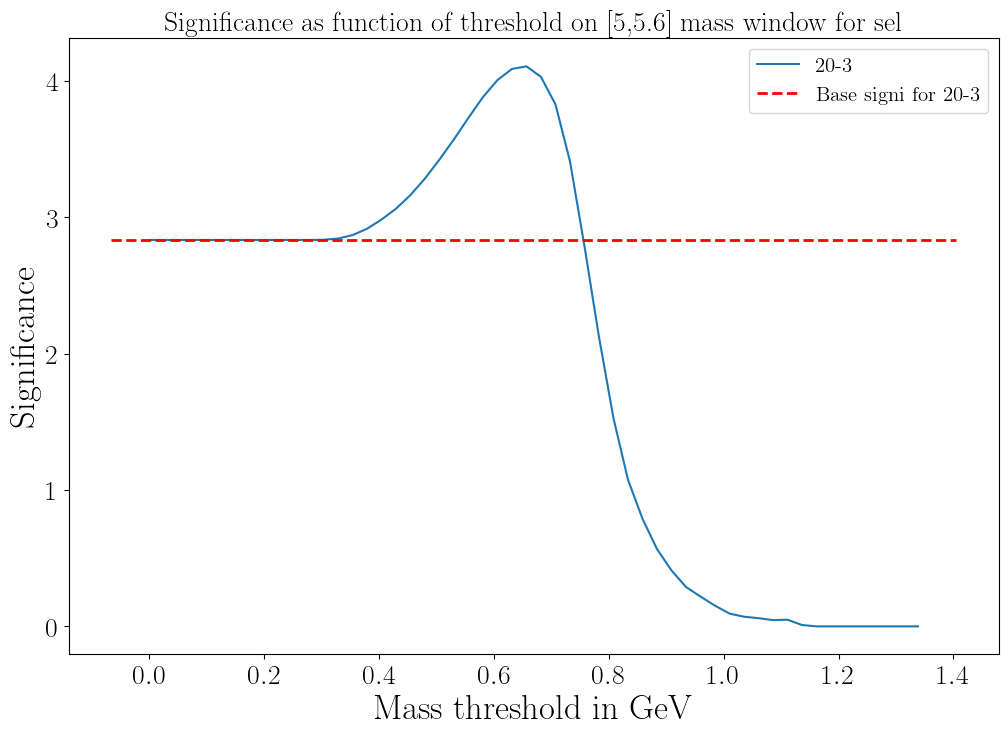

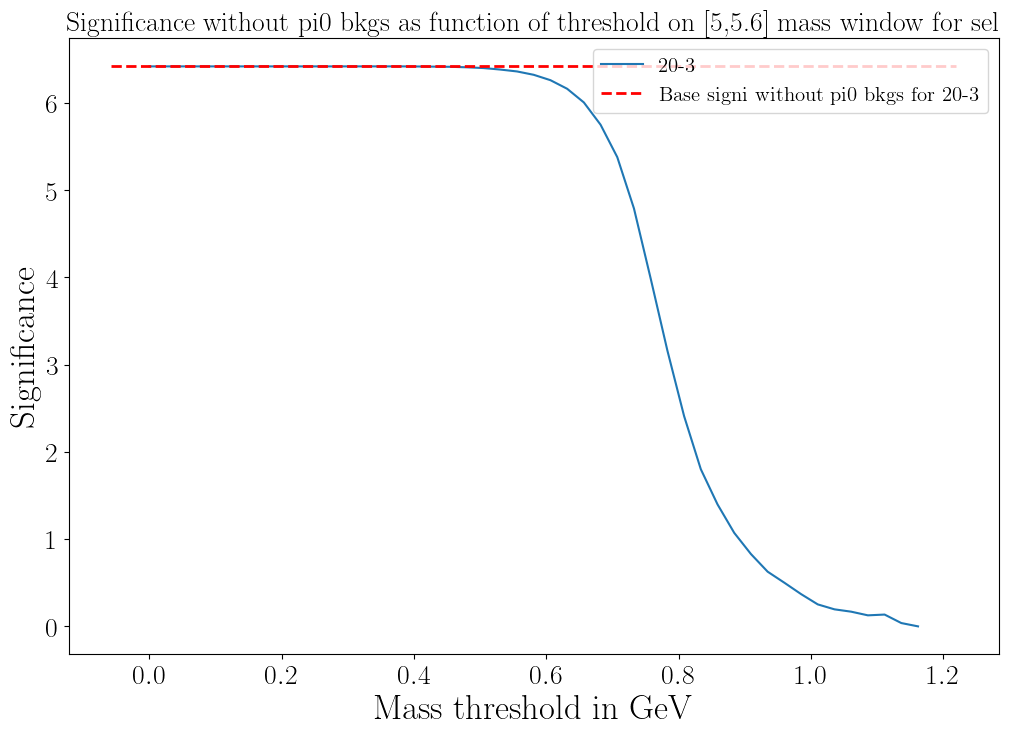

In [99]:
var=f"tau_m2pi_max"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,2.5,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_{tau}_m2pi_max"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_tau_1_m2pi_max"],data[f"sig_{smearing}"][f"{i}_cut_study_tau_2_m2pi_max"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_max"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_max"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('Mass in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_max"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_max"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_max"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_max"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('Mass in Gev')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_max"]>T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_max"]>T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    for smearing in listsmearing:
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cot for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Mass threshold in GeV')
    plt.ylabel('Significance')
    plt.legend();

sig : 0.8175766930349219
sig number of events on [5,5.6] before cut: 142.8517728
sig number of events on [5,5.6] after cut: 116.79227999999999
Bd2KstDsDsDs2TauNu : 0.8147817902610591
Bd2KstDsDsDs2TauNu number of events on [5,5.6] before cut: 55.231688307941056
Bd2KstDsDsDs2TauNu number of events on [5,5.6] after cut: 45.00177387868502
Bd2KstDsDsDs2pipipipi0 : 0.7629665535627727
Bd2KstDsDsDs2pipipipi0 number of events on [5,5.6] before cut: 0.14358182942429618
Bd2KstDsDsDs2pipipipi0 number of events on [5,5.6] after cut: 0.10954813355009316
Bd2KstDsTauNuDs2TauNu : 0.8085225995052845
Bd2KstDsTauNuDs2TauNu number of events on [5,5.6] before cut: 191.57683599783923
Bd2KstDsTauNuDs2TauNu number of events on [5,5.6] after cut: 154.89420144597054
Bd2KstDsDsDs2pipipipi0pi0 : 0.1253461058985631
Bd2KstDsDsDs2pipipipi0pi0 number of events on [5,5.6] before cut: 373.0999167987137
Bd2KstDsDsDs2pipipipi0pi0 number of events on [5,5.6] after cut: 46.76662168179665
Bd2KstDsstDsDsst2DsgammaDs2Taunu : 0

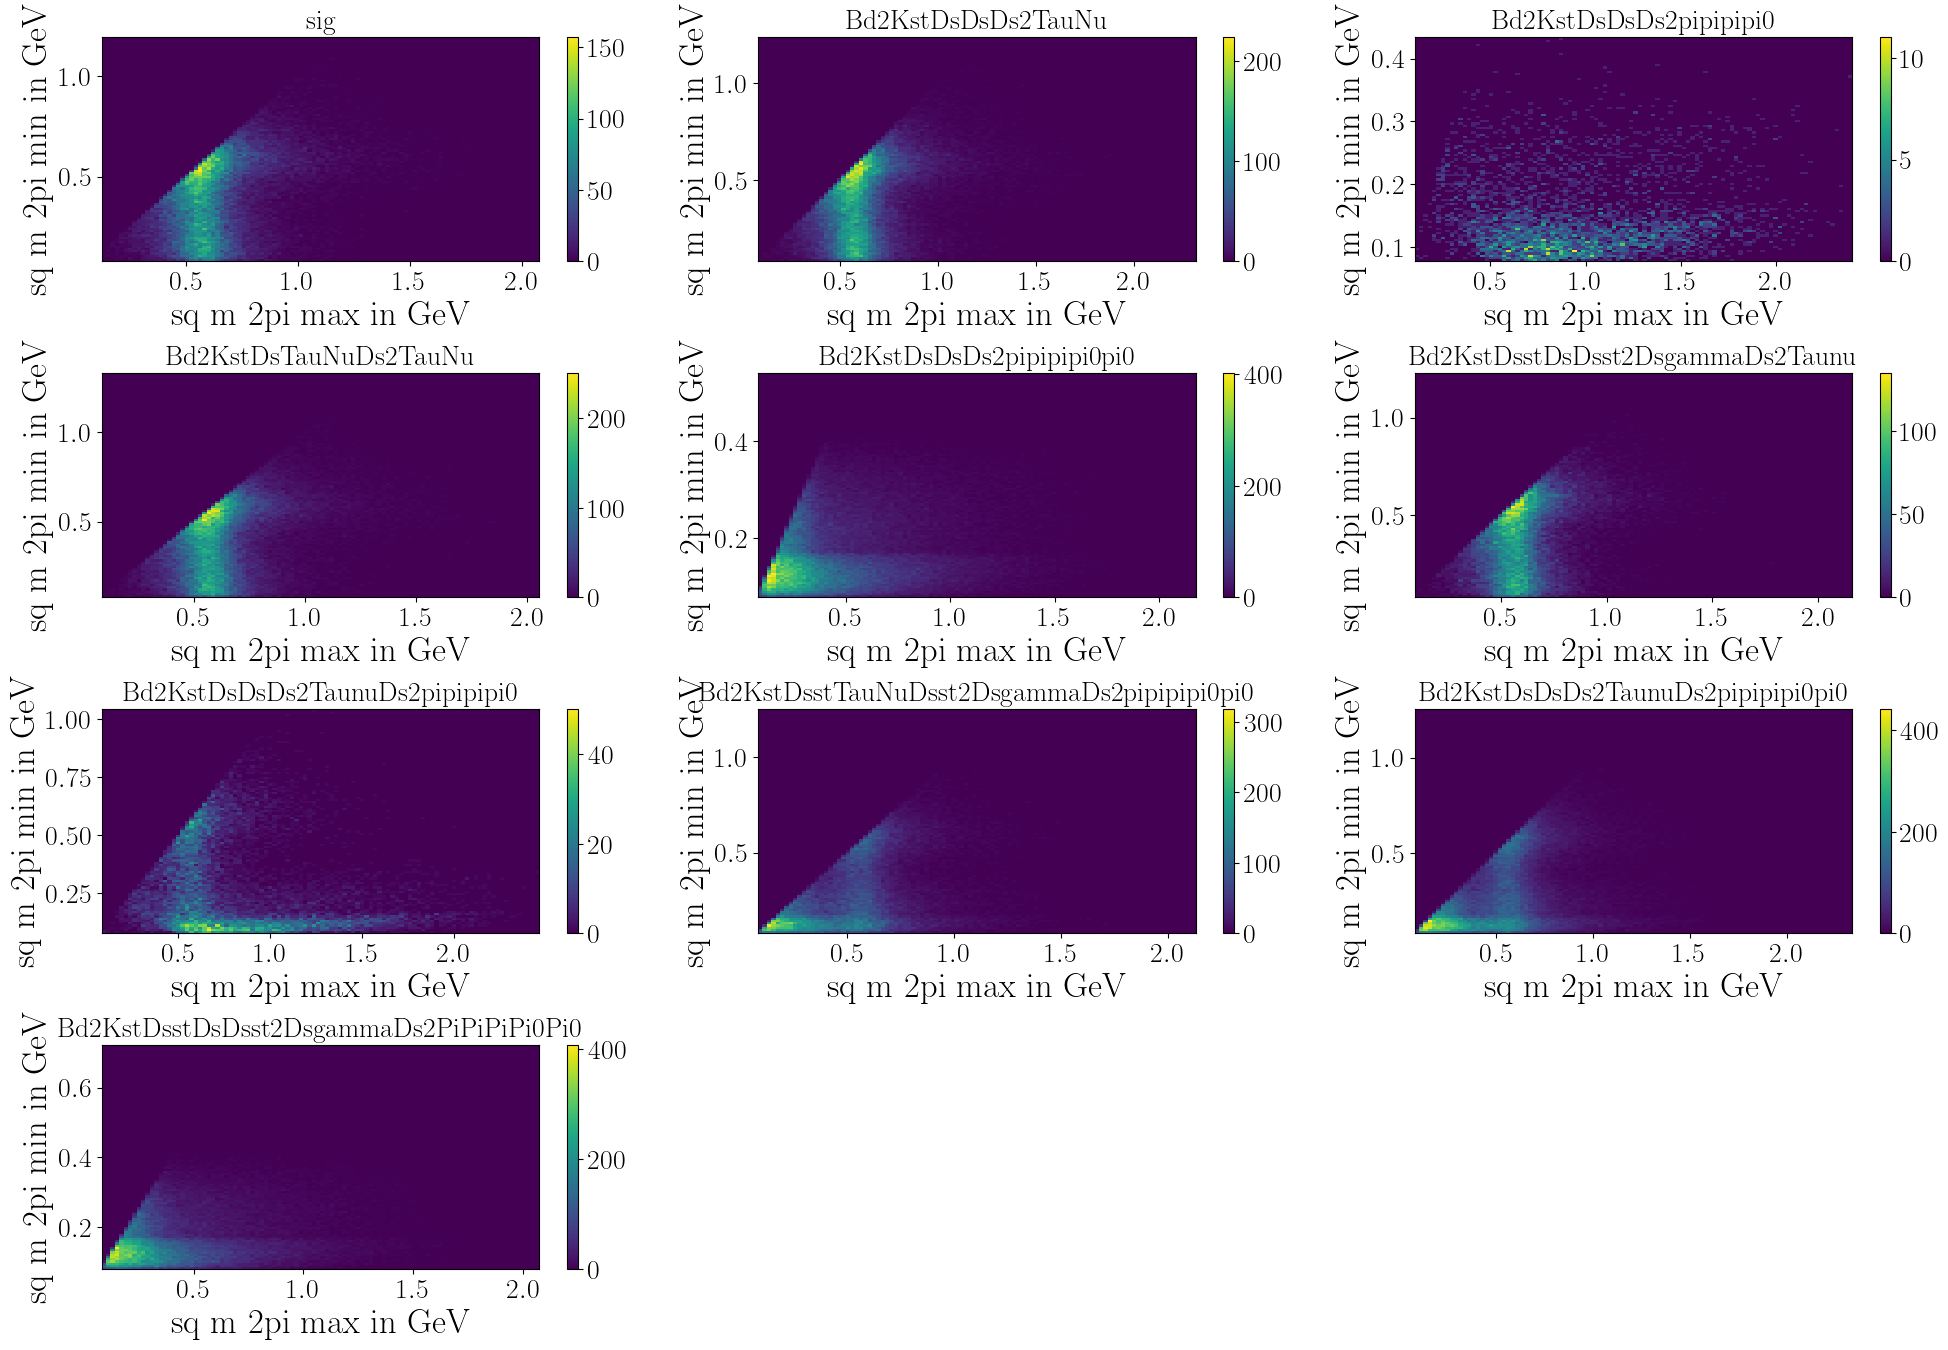

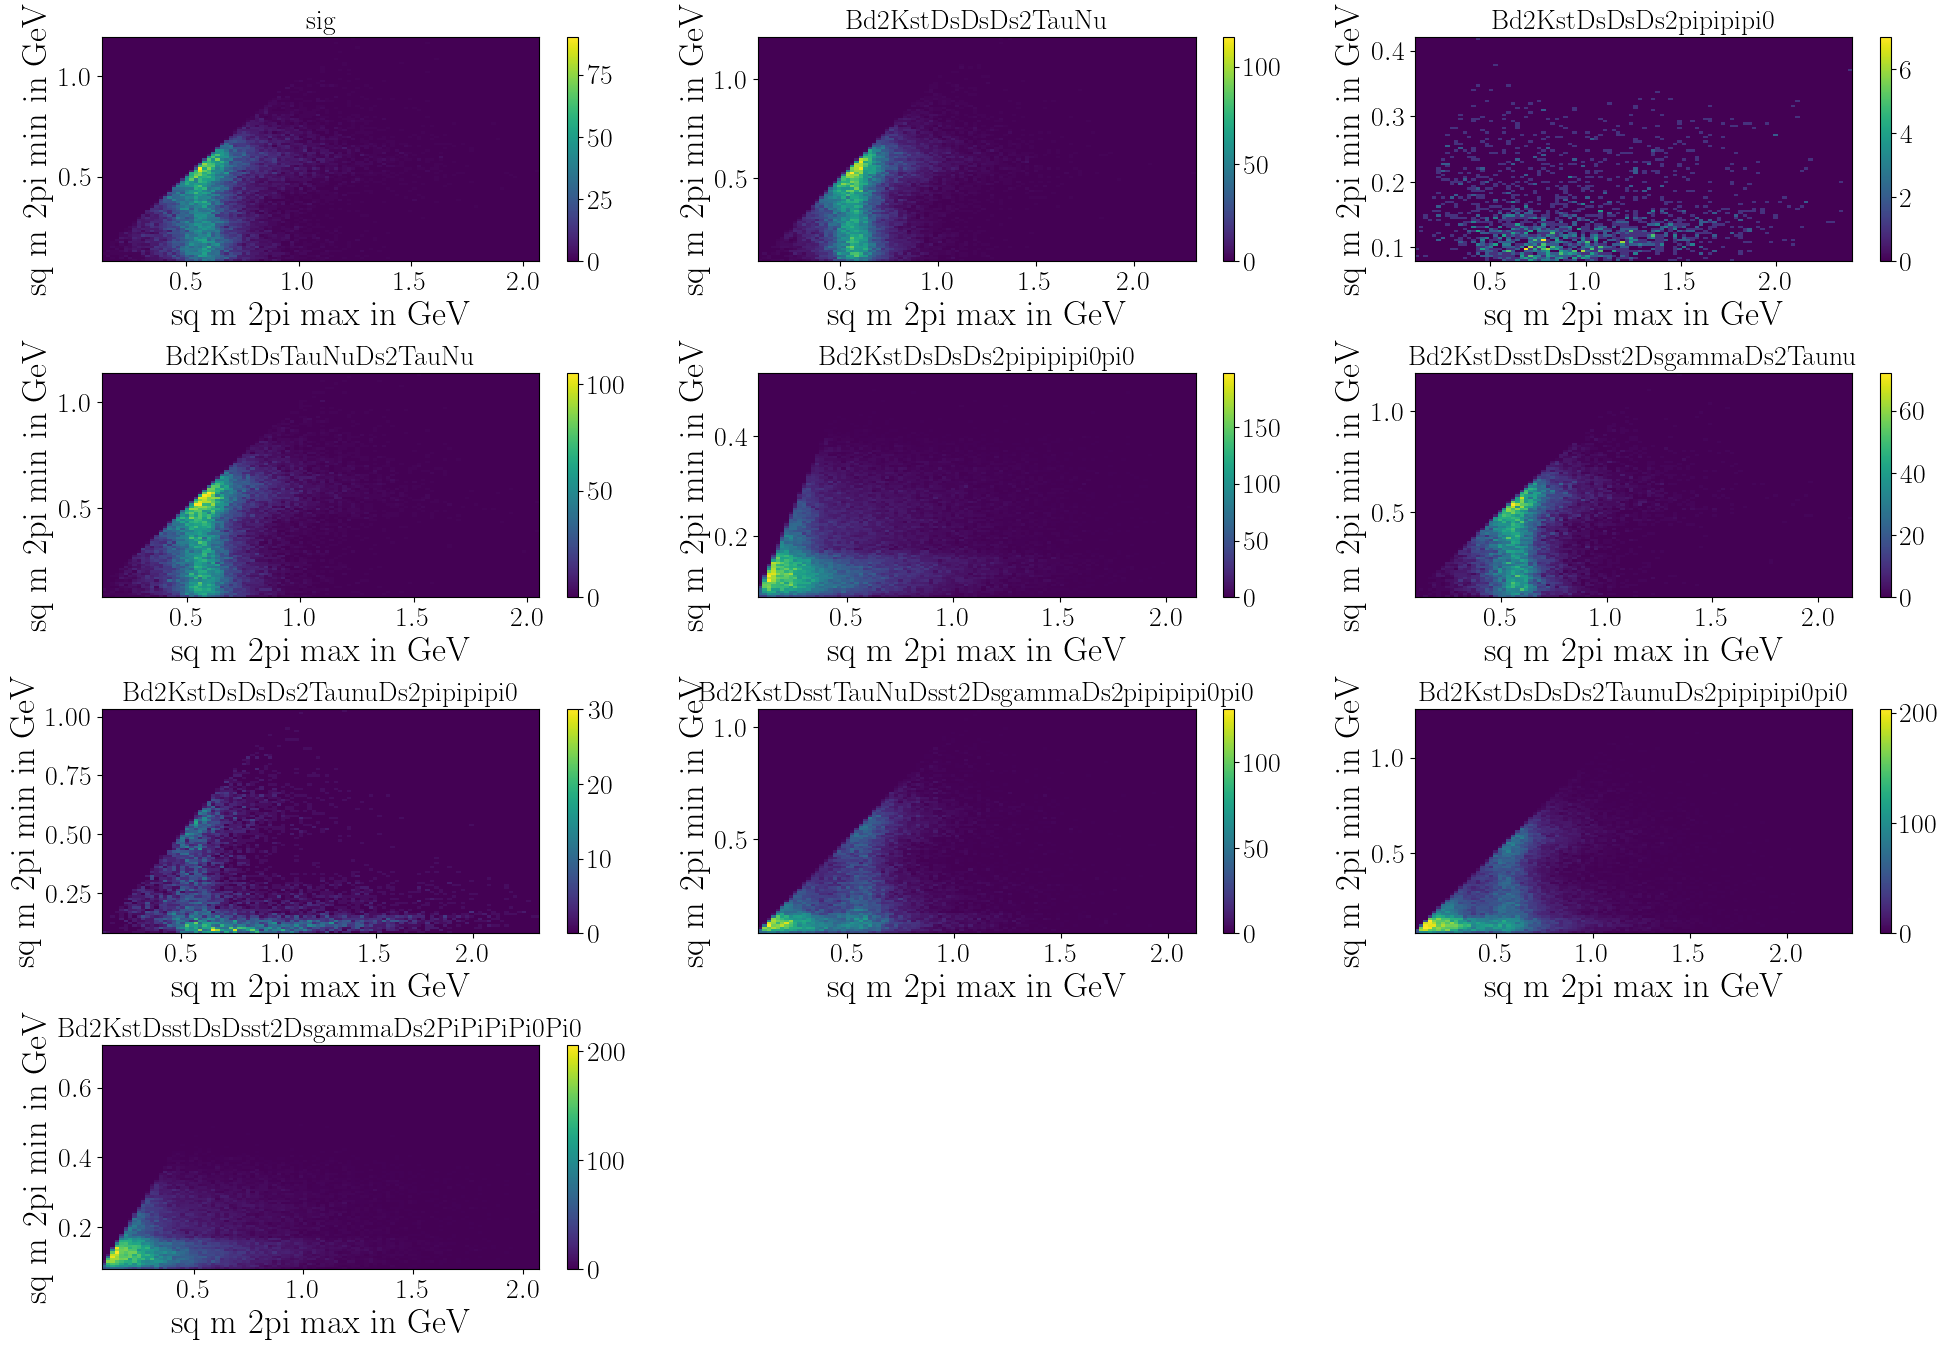

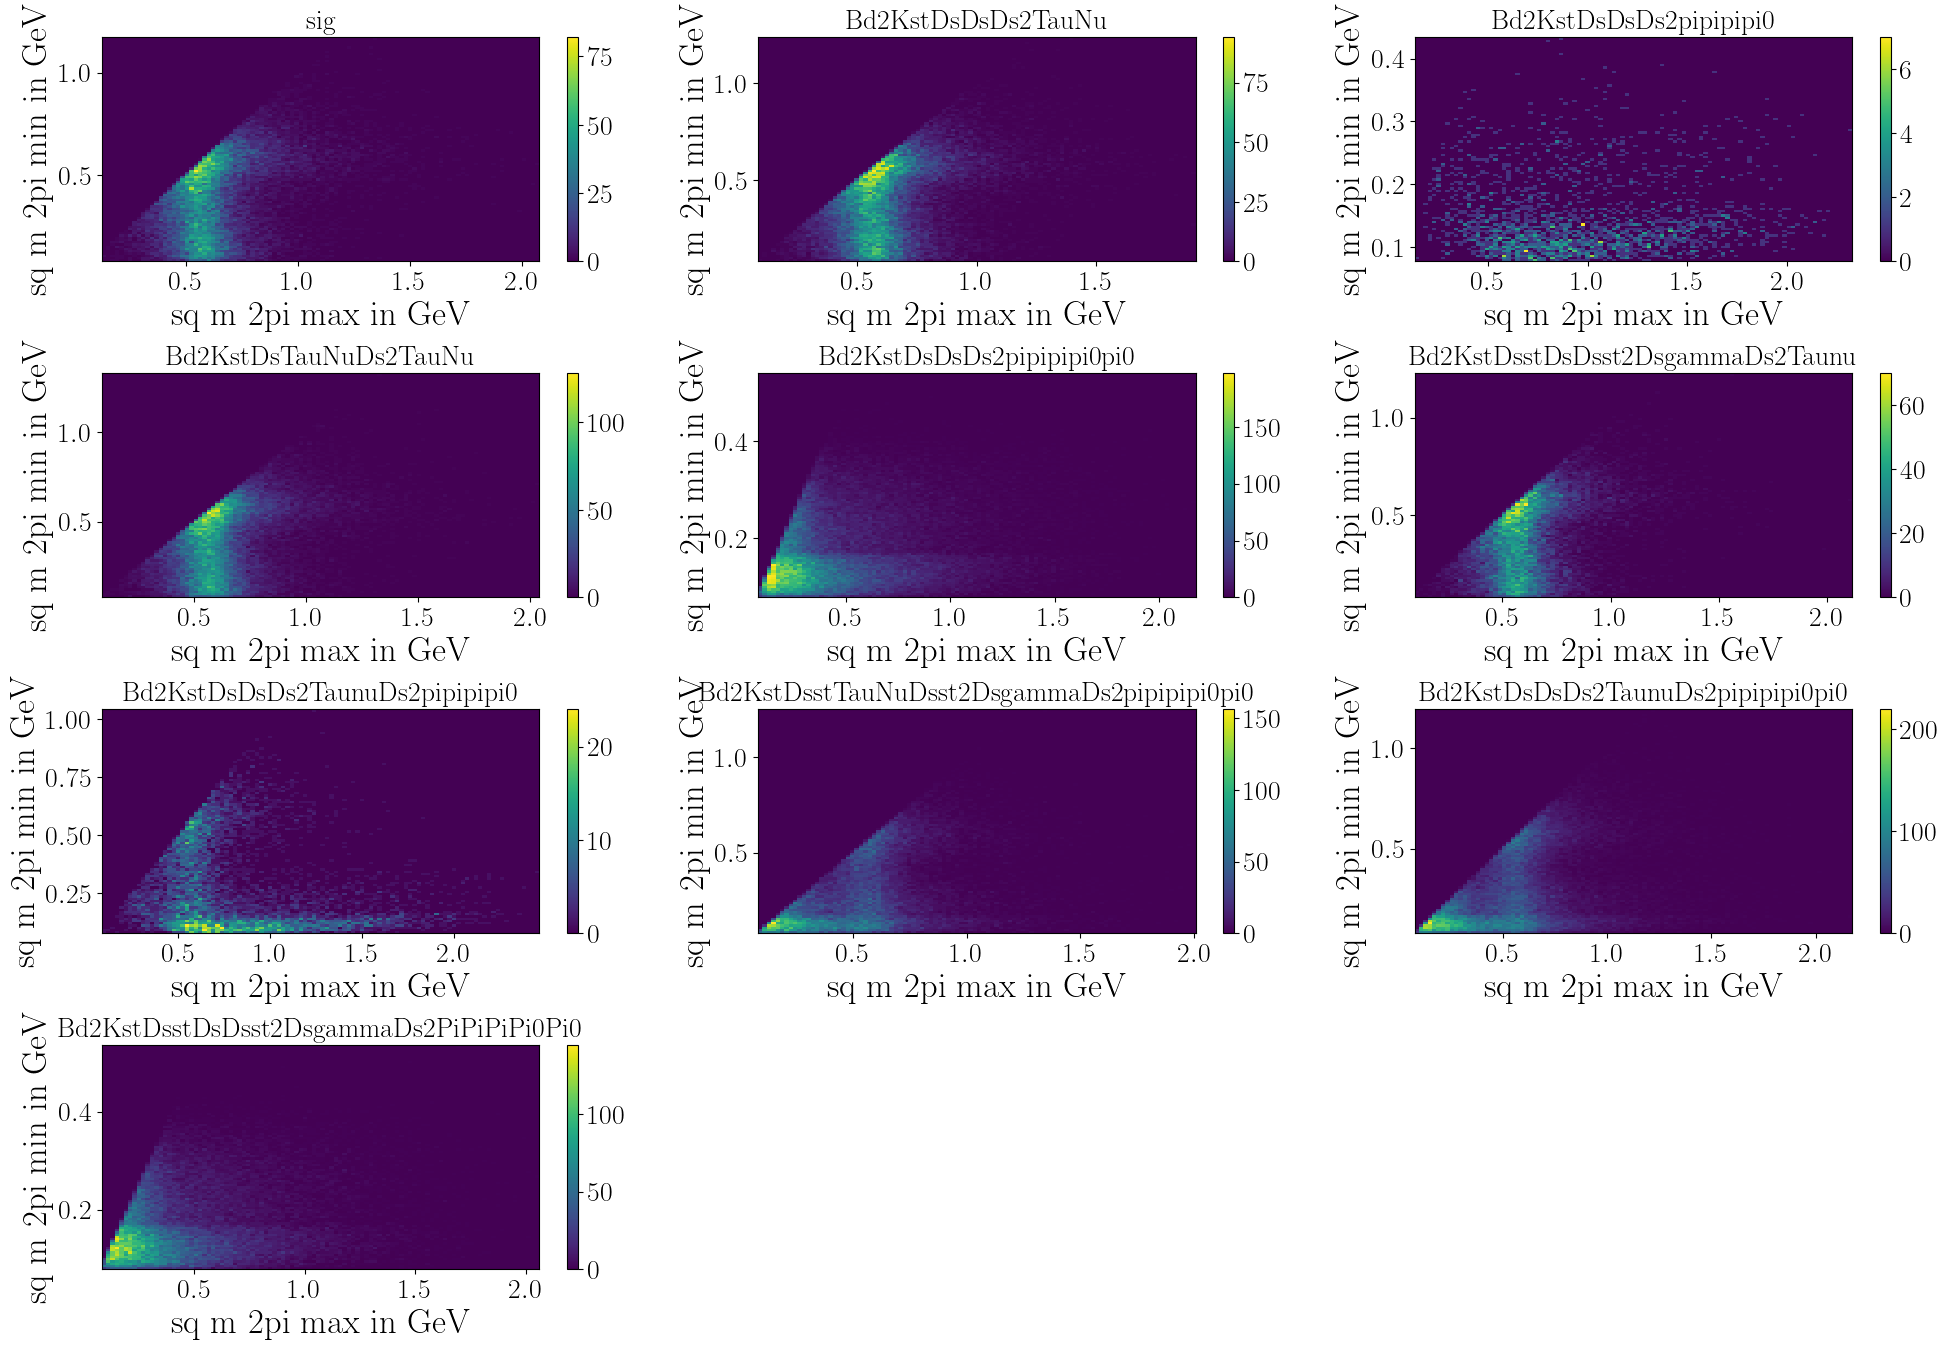

In [100]:
# Dalitz plane with the 2 m2pi+pi- mass
for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        fig = plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        for n, mode in enumerate(listmod):
            data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_max"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_max"]**2
            data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_sq_m2pi_max"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_max"]**2
            data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_min"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_m2pi_min"]**2
            data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_sq_m2pi_min"]=data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_m2pi_min"]**2
            ax = plt.subplot(4, 3, n + 1)
            counts, xedges, yedges, im=ax.hist2d(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_max"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_sq_m2pi_max"])),np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_min"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_sq_m2pi_min"])),bins=100, density=False)
            ax.set_xlabel('sq m 2pi max in GeV')
            ax.set_ylabel('sq m 2pi min in GeV')
            ax.set_title(f'{mode}')
            fig.colorbar(im, ax=ax)
            eff_cut=np.count_nonzero(~((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_max"]<0.5)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_min"]<0.3))*(~((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_sq_m2pi_max"]<0.5)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_sq_m2pi_min"]<0.3))))/len(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_max"])
            #eff_cut=np.count_nonzero(~((data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_min"]<0.3)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_min"]<0.3)))/len(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_max"])
            print(f"{mode} : {eff_cut}")
            print("{} number of events on [5,5.6] before cut: {}".format(mode,data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]))
            print("{} number of events on [5,5.6] after cut: {}".format(mode,data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]*eff_cut))
            
for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        fig = plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            counts, xedges, yedges, im=ax.hist2d(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_max"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_1_sq_m2pi_min"],bins=100, density=False)
            ax.set_xlabel('sq m 2pi max in GeV')
            ax.set_ylabel('sq m 2pi min in GeV')
            ax.set_title(f'{mode}')
            fig.colorbar(im, ax=ax)

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        fig = plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            counts, xedges, yedges, im=ax.hist2d(data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_sq_m2pi_max"],data[f"{mode}_{smearing}"][f"{i}_cut_study_tau_2_sq_m2pi_min"],bins=100, density=False)
            ax.set_xlabel('sq m 2pi max in GeV')
            ax.set_ylabel('sq m 2pi min in GeV')
            ax.set_title(f'{mode}')
            fig.colorbar(im, ax=ax)

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1586420994.py:90: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1586420994.py:108: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/1586420994.py:129: RuntimeWarning: invalid value encountered in divide
  significance=(cutinfeffsig*cutsupeffsig)*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/hc/7r1d6y954csc

3.432016244426808
Optimal cut : [6.0606060606060606,23.232323232323235]
6.794949144392841
Optimal cut : [5.555555555555556,24.242424242424242]
Base signi : 2.834248043222933
Base signi without pi0 bkgs : 6.419510888675032


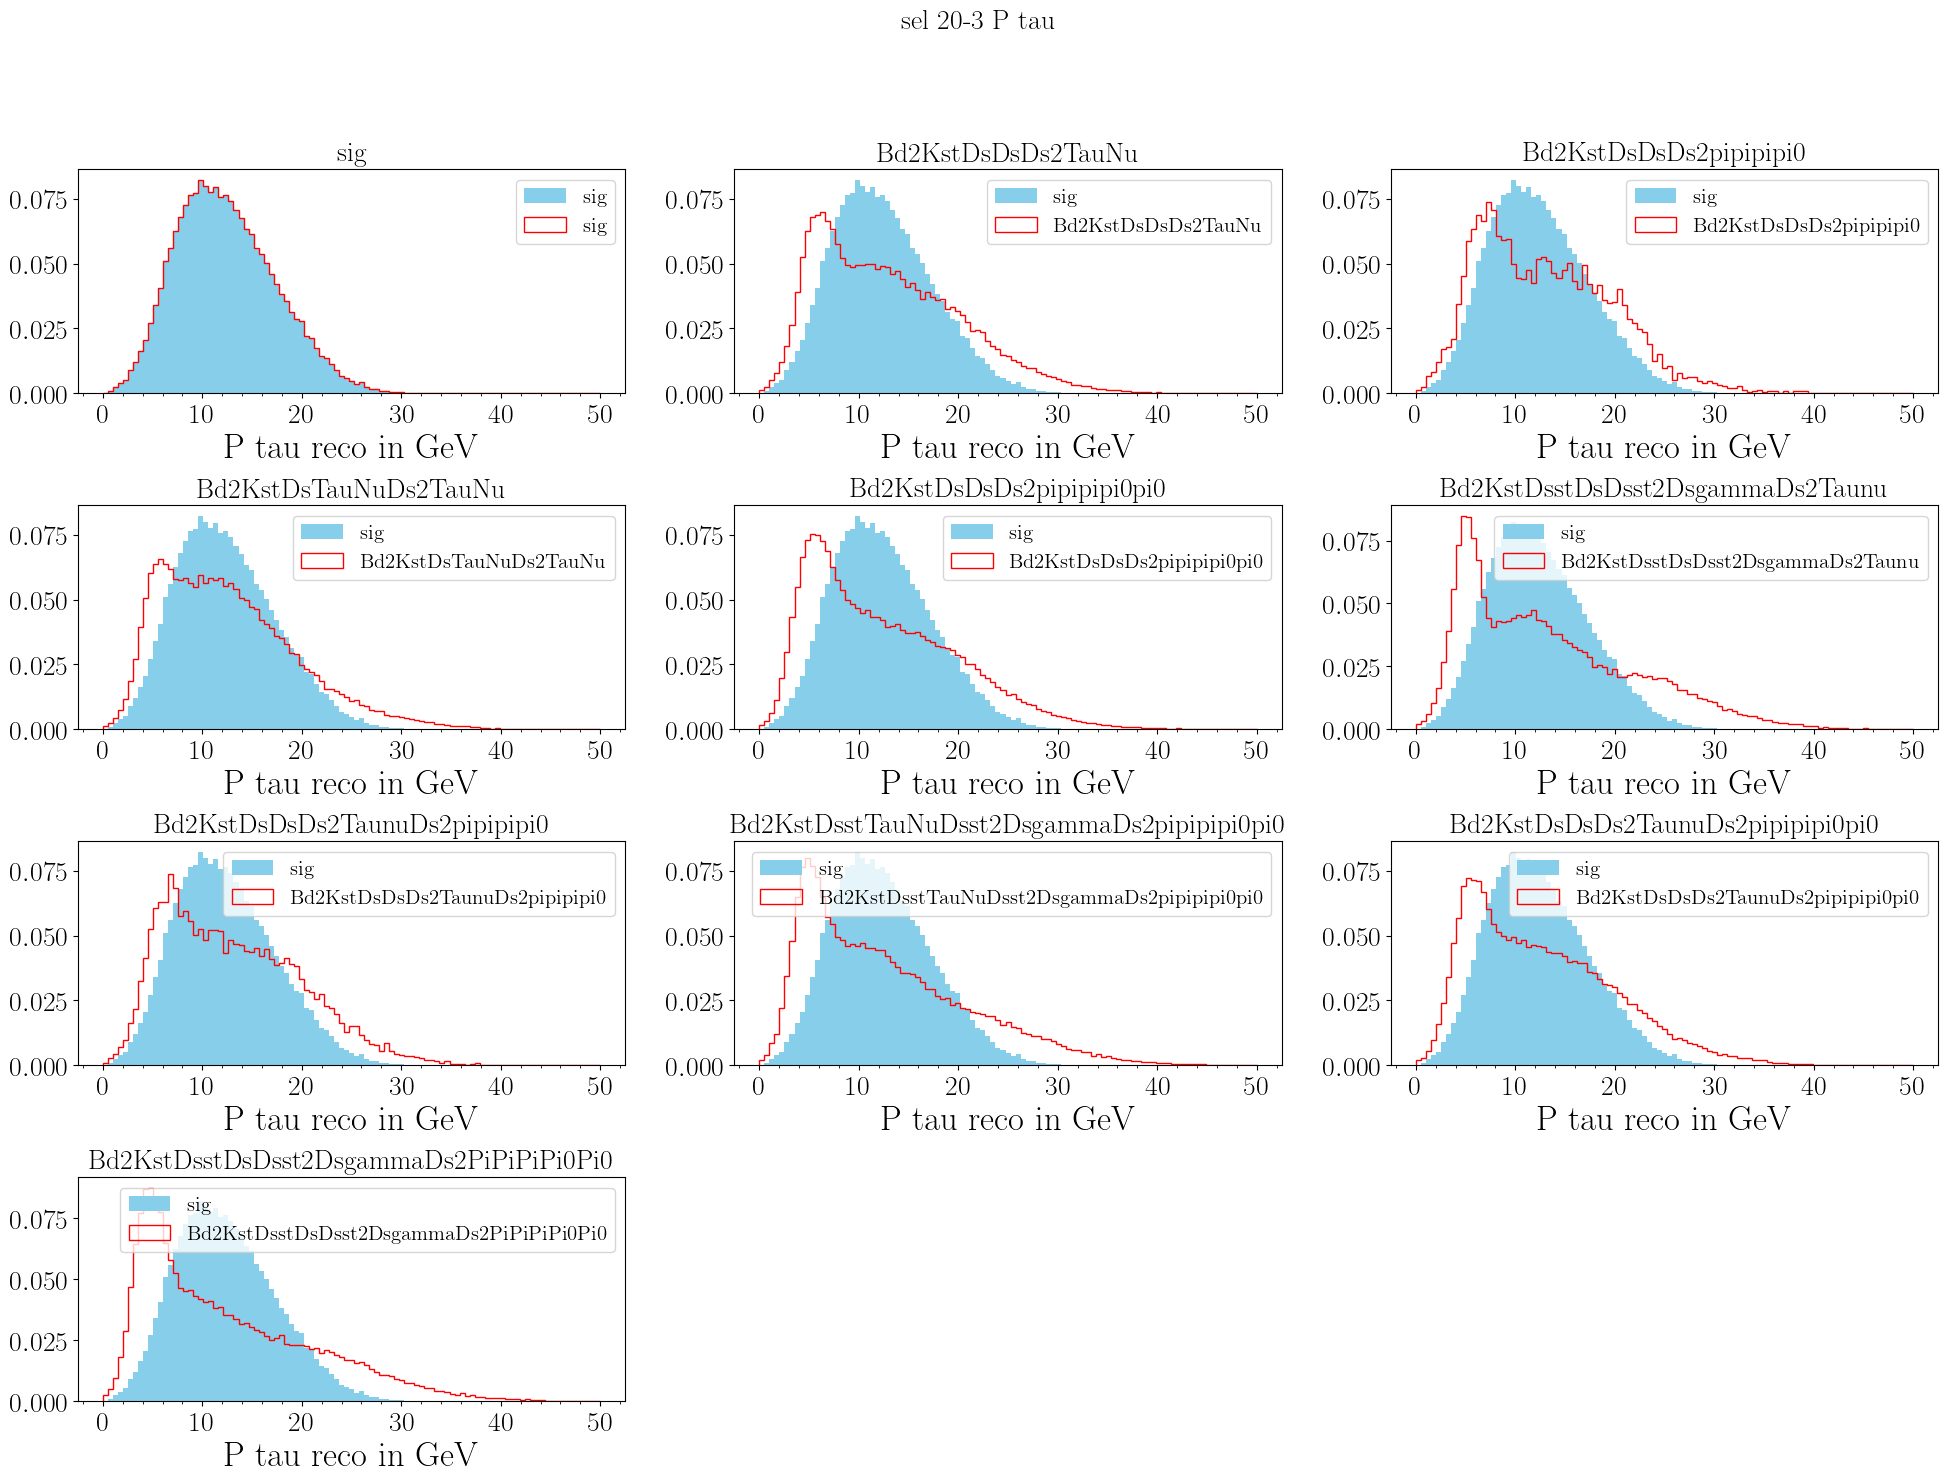

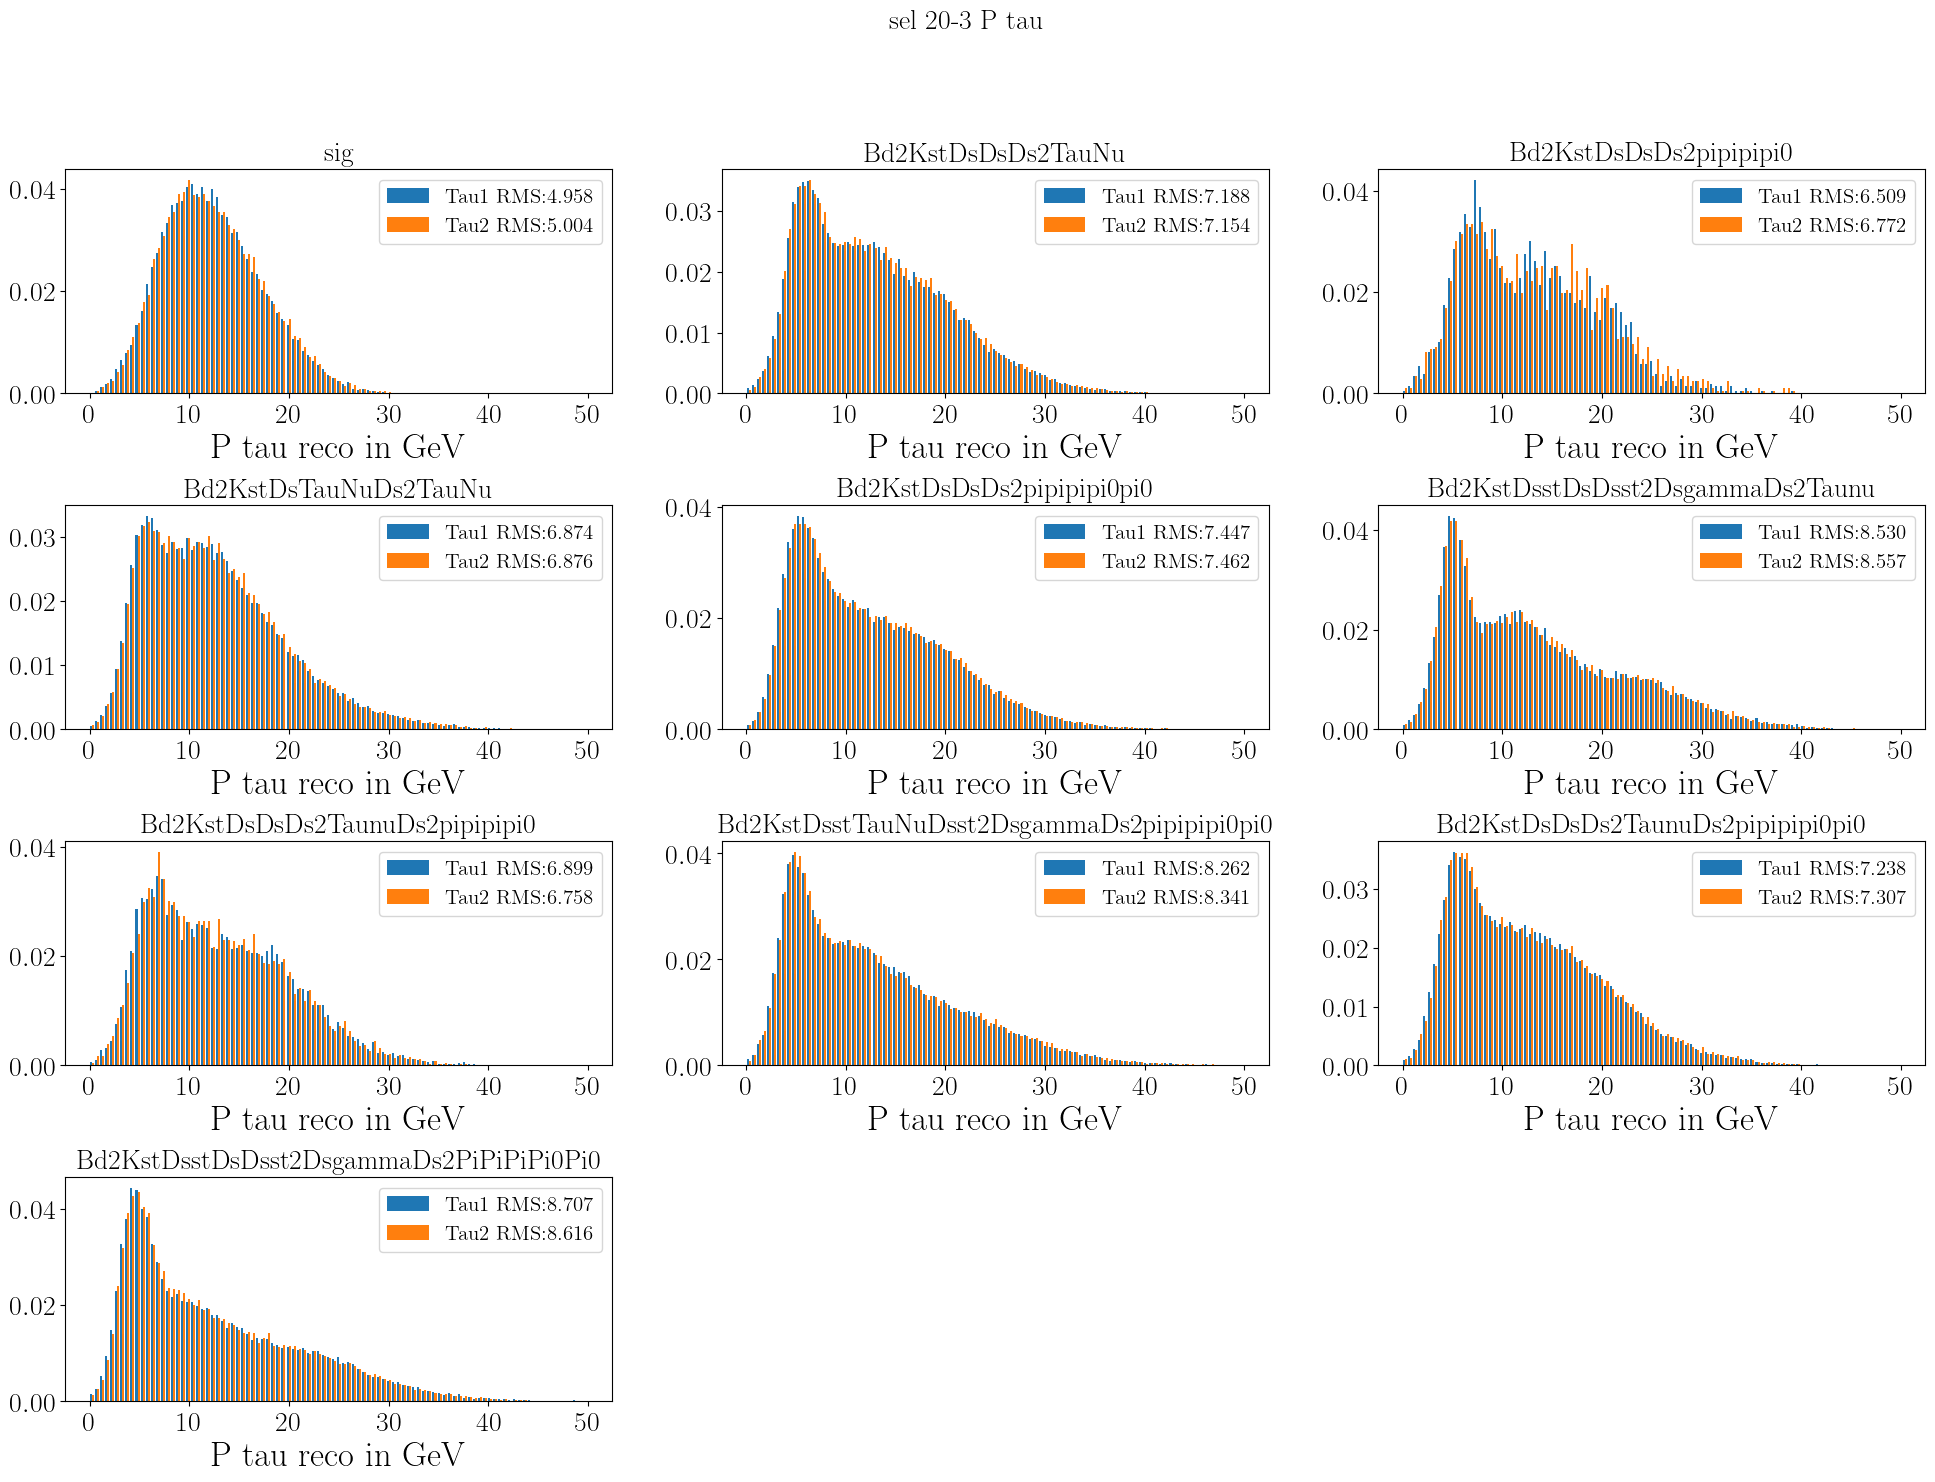

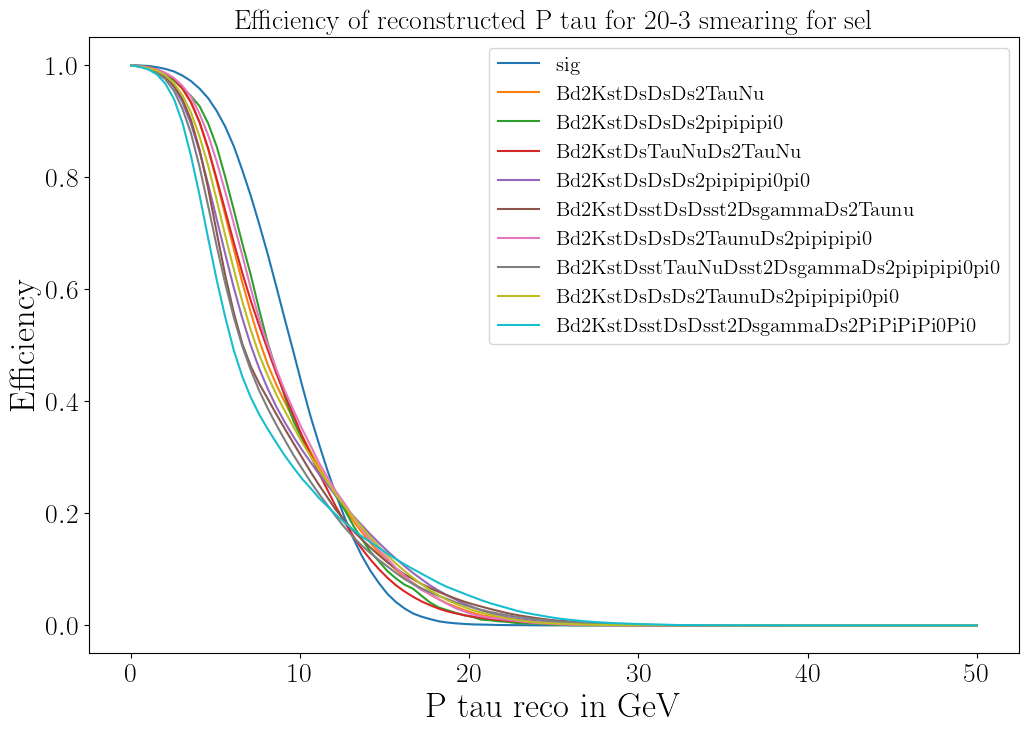

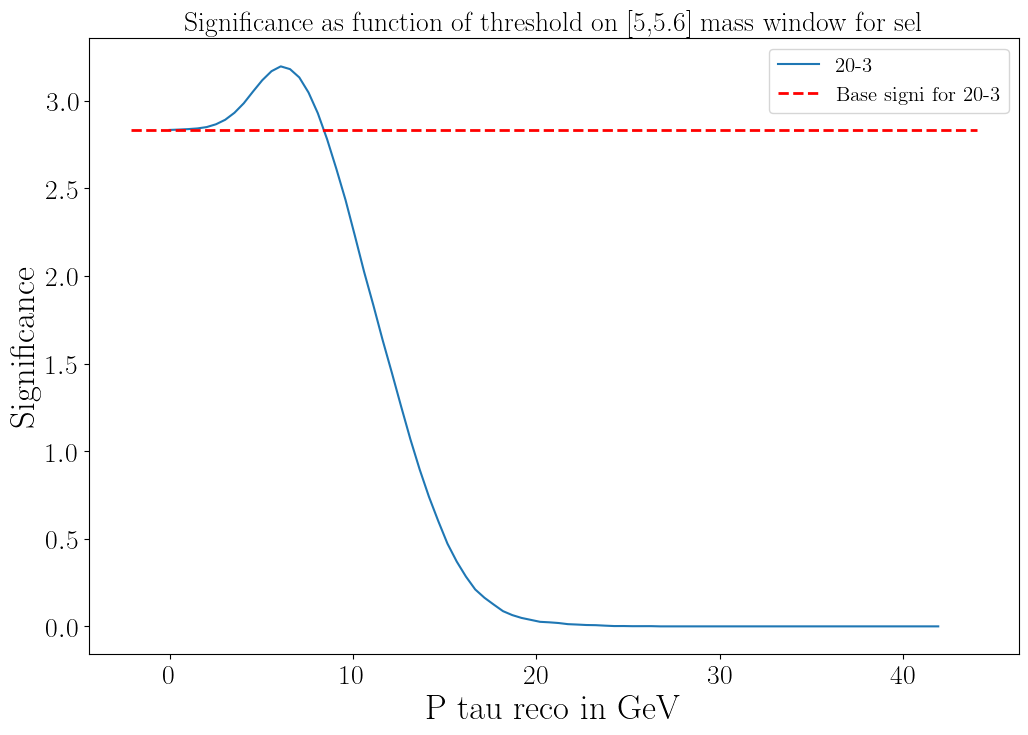

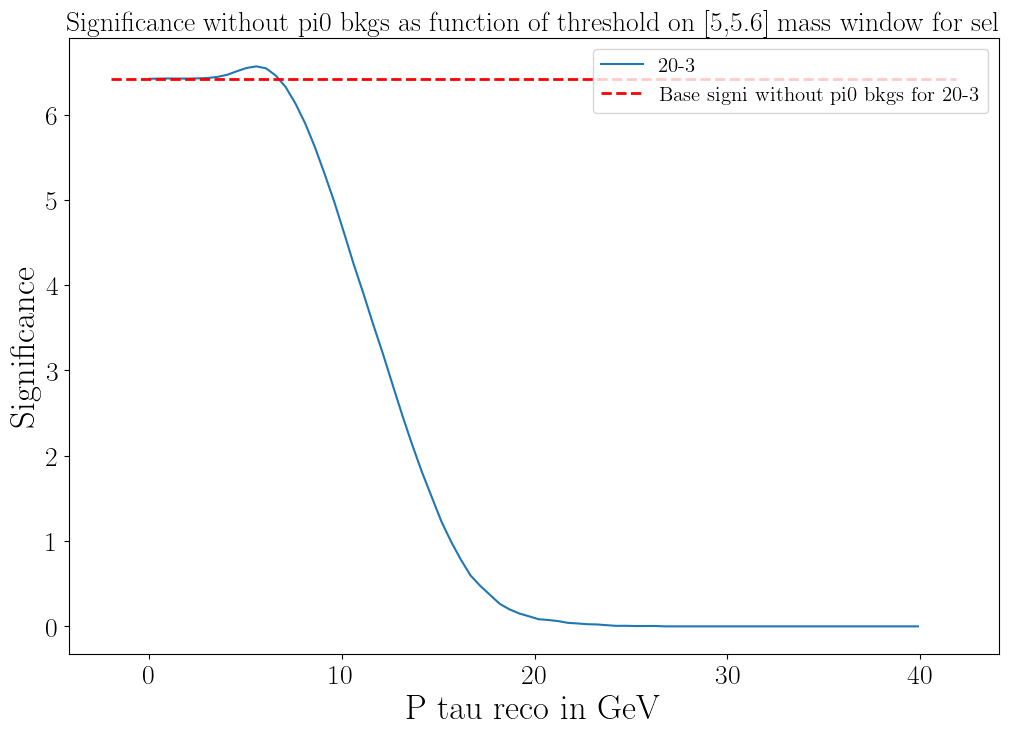

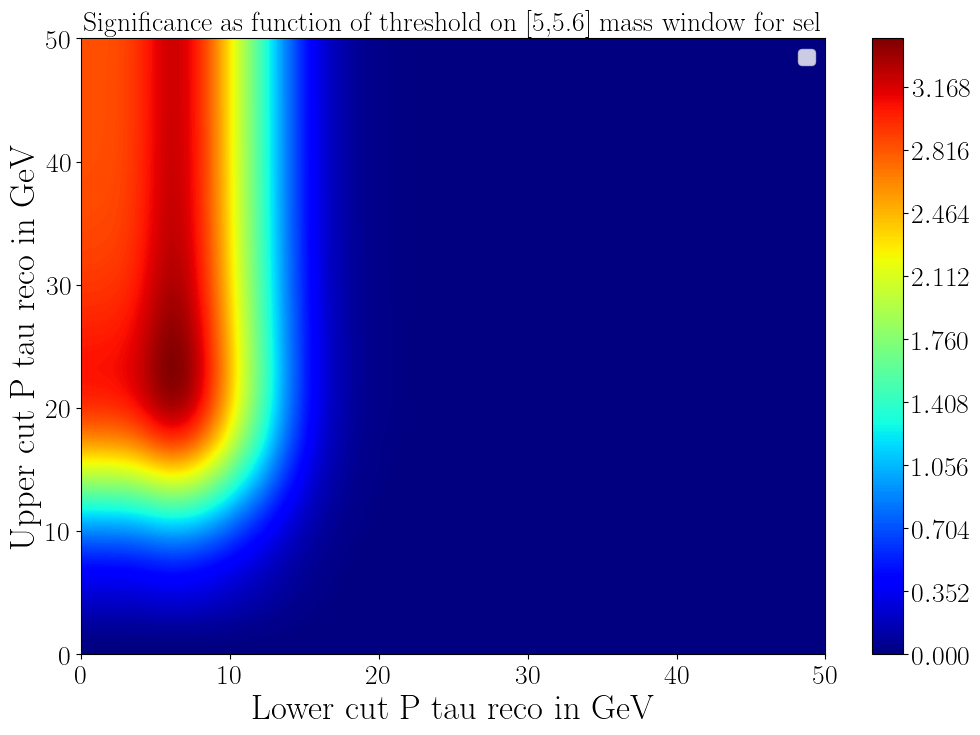

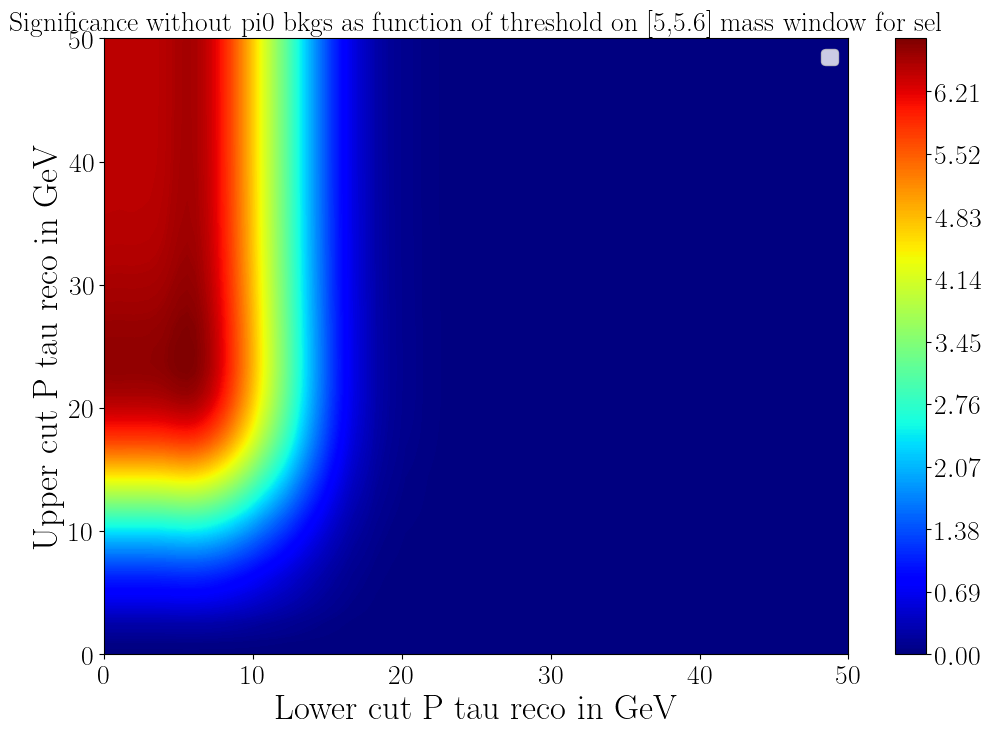

In [101]:
var=f"P_tau"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,50,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study"],data[f"{mode}_{smearing}"][f"{i}_cut_study_{var}_{tau}"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')


for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_P_tau_1"],data[f"sig_{smearing}"][f"{i}_cut_study_P_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights"],data[f"sig_{smearing}"][f"{i}_weights"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('P tau reco in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_1"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_2"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_2"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights"],data[f"{mode}_{smearing}"][f"{i}_weights"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('P tau reco in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_1"]>T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_2"]>T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut_sup"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_1"]<T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_P_tau_2"]<T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study"][data[f"{mode}_{smearing}"][f"{i}_cut_sup"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study"]))

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of reconstructed {varname} for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('P tau reco in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('P tau reco in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('P tau reco in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    cutinf, cutsup=np.meshgrid(Tlist,Tlist)
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=cutinf*0
        for mode in listmod:
            cutinfeff,cutsupeff=np.meshgrid(data[f"{mode}_{smearing}"][f"{i}_eff_cut"], data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"])
            if (mode=="sig"):
                cutinfeffsig,cutsupeffsig=np.meshgrid(data[f"{mode}_{smearing}"][f"{i}_eff_cut"], data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"])
            denom_signi+=(cutinfeff*cutsupeff)*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significance=(cutinfeffsig*cutsupeffsig)*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signi)
        significance=significance*((cutinfeffsig*cutsupeffsig)>0)#to highlight point which keep at least 0.x sig
        significance[np.isnan(significance)==True]=0.0
        plt.contourf(cutinf, cutsup, significance,500,cmap='jet')
        plt.colorbar()
        indices_max=np.unravel_index(np.argmax(significance), np.shape(significance))
        print(np.max(significance))
        print(f"Optimal cut : [{Tlist[indices_max[1]]},{Tlist[indices_max[0]]}]")
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Lower cut P tau reco in GeV')
    plt.ylabel('Upper cut P tau reco in GeV')
    plt.legend();
    
for i in listsol:
    cutinf, cutsup=np.meshgrid(Tlist,Tlist)
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=cutinf*0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                cutinfeff,cutsupeff=np.meshgrid(data[f"{mode}_{smearing}"][f"{i}_eff_cut"], data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"])
                if (mode=="sig"):
                    cutinfeffsig,cutsupeffsig=np.meshgrid(data[f"{mode}_{smearing}"][f"{i}_eff_cut"], data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"])
                denom_signinopi0+=(cutinfeff*cutsupeff)*data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        significancenopi0=(cutinfeffsig*cutsupeffsig)*data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/np.sqrt(denom_signinopi0)
        significancenopi0[np.isnan(significancenopi0)==True]=0.0
        significancenopi0=significancenopi0*((cutinfeffsig*cutsupeffsig)>0)#to highlight point which keep at least 0.x sig
        plt.contourf(cutinf, cutsup, significancenopi0,500, cmap='jet')
        plt.colorbar()
        indices_max=np.unravel_index(np.argmax(significancenopi0), np.shape(significancenopi0))
        print(np.max(significancenopi0))
        print(f"Optimal cut : [{Tlist[indices_max[1]]},{Tlist[indices_max[0]]}]")
        #print(np.unravel_index(np.argmax(significancenopi0)), np.shape(significancenopi0))
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Lower cut P tau reco in GeV')
    plt.ylabel('Upper cut P tau reco in GeV')
    plt.legend();

print('Base signi : {}'.format(data[f"sig_{smearing}"][f"{i}_base_signi"]))
print('Base signi without pi0 bkgs : {}'.format(data[f"sig_{smearing}"][f"{i}_base_signi_no_pi0"]))

Computation of the signal purity with the given pi0 detection rate:

In [11]:
for i in listsol:
    print(i)
    for smearing in listsmearing:
        print(smearing)
        denom_purity=0
        for mode in listmod:
            denom_purity+=data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]
        purity=data[f"sig_{smearing}"][f"{i}_cut_study_true_number"]/denom_purity
        print(f"Purity on cut window = {purity}")

sel
20-3
Purity on cut window = 0.056232847608825916


soltype='sel'
solsig=soltype
solbkg=soltype
low = 4.6
high = 6
low3=5.1
high3=5.7
low1=5.26
high1=5.3
low2=5.2
high2=5.5
obs = zfit.Space('mB', limits=(low, high))

#PDF
rand += 1
"""#Crystal Ball parameters
mu = zfit.Parameter(f"mu_{rand}", lp.B_0.mass/1000., low, high)
sigma = zfit.Parameter(f"sigma_{rand}", 0.04, 0.025, 0.2)
alphaL = zfit.Parameter(f"alphaL_{rand}", 0.2, 0., 5.)
nL = zfit.Parameter(f"nL_{rand}", 10., 0., 200.)
alphaR = zfit.Parameter(f"alphaR_{rand}", -0.2, -5., 0.)
nR = zfit.Parameter(f"nR_{rand}", 10., 0., 200.)
# Core gaussian parameters
mu1 = zfit.Parameter(f"mu1_{rand}", lp.B_0.mass/1000., low1, high1)
sigmaG1 = zfit.Parameter(f"sigma1_{rand}", 0.015, 0., 1)
# Fractions
frac = zfit.Parameter(f"frac_{rand}", 0.5, 0., 1.)
frac_CB = zfit.Parameter(f"frac_CB{rand}", 0.5, 0., 1.)



pdf_sigL = zfit.pdf.CrystalBall(obs=obs, mu=mu, sigma=sigma, alpha=alphaL, n=nL)
pdf_sigR = zfit.pdf.CrystalBall(obs=obs, mu=mu, sigma=sigma, alpha=alphaR, n=nR)

pdf_sigG1=zfit.pdf.Gauss(obs=obs, mu=mu1, sigma=sigmaG1)

pdf_int_CBs = zfit.pdf.SumPDF([pdf_sigL, pdf_sigR], frac_CB)
pdf = zfit.pdf.SumPDF([pdf_int_CBs, pdf_sigG1], frac)"""

#Crystal Ball parameters
mu = zfit.Parameter(f"mu_{rand}", lp.B_0.mass/1000., low, high)
sigma = zfit.Parameter(f"sigma_{rand}", 0.5, 0., 2.)
alphaR = zfit.Parameter(f"alphaR_{rand}", 0.2, 0., 5.)
nR = zfit.Parameter(f"nR_{rand}", 10., 0., 200.)
alphaL = zfit.Parameter(f"alphaL_{rand}", 0.2, 0., 5.)
nL = zfit.Parameter(f"nL_{rand}", 10., 0., 200.)
# Core gaussian parameters
sigmaG1 = zfit.Parameter(f"sigmaG1_{rand}", 0.015, 0., 1)
# Fractions
frac = zfit.Parameter(f"frac_{rand}", 0.5, 0., 1.)

pdfCB = zfit.pdf.DoubleCB(obs=obs, mu=mu, sigma=sigma, alphal=alphaL, nl=nL,alphar=alphaR, nr=nR)
pdf_sigG1=zfit.pdf.Gauss(obs=obs, mu=mu, sigma=sigmaG1)
pdf = zfit.pdf.SumPDF([pdfCB, pdf_sigG1], frac)


data_np = np.array(data[f"sig_{smearing}"][f"{solsig}_plot"])
data_low_cut = data_np >= low
data_high_cut = data_np <= high
data_cut = np.logical_and(data_low_cut, data_high_cut)
data_np = data_np[data_cut]
datazf = zfit.Data.from_numpy(obs=obs, array=data_np)

nll = zfit.loss.UnbinnedNLL(model=pdf, data=datazf)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)
param_errors = result.hesse()

print("Fit function minimum:", result.fmin)
print("Fit converged:", result.converged)
print("Fit full minimizer information:", result.info)

params = result.params
print(params);

#only sig plot
PV_smear=True
SV_smear=True
TV_smear=True
PV_scale=3e-3
SV_scale=20e-3
TV_scale=3e-3

#fracCBL=params[frac_CB]['value']*params[frac]['value']
#fracCBR=(1-params[frac_CB]['value'])*params[frac]['value']
fracG=(1-params[frac]['value'])

fig, ax = plt.subplots(figsize=(12,8))
n = len(data_np)
bins = 2*int(np.sqrt(n))

bins=int((6-4.6)/0.03)
bin_w = (high - low)/bins

bng=np.linspace(low,high,bins)

units = "GeV/$c^2$"
counts, bin_edges = np.histogram(data_np, bins, range=(low,high))
true_number=data[f"sig_{smearing}"][f"{solsig}_plot_true_number"]
print('Expected number of events in window is {}'.format(true_number))
rescale=(true_number/np.sum(counts))#signal scale factor to consider a realist number of events
data[f"sig_{smearing}"][f"{solsig}_rescale"]=rescale
counts=counts
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)

data_hist=[]
labellist=["sig"]
weights_list=[]
for mode in labellist:
    if (mode=='sig'):
        i=solsig
    else:
        i=solbkg
    data_hist.append(data[f"{mode}_{smearing}"][f"{i}_plot"])
    weights_list.append(np.ones(len(data[f"{mode}_{smearing}"][f"{i}_plot"]))*data[f"{mode}_{smearing}"][f"{i}_rescale"])
plt.errorbar(bin_centres, counts, yerr=err, fmt='o', label='sig', color="black")

#mult=20
x_plot = np.linspace(low, high, num=500)#num=len(Counts[0][1])*mult)
y_plot_tot = zfit.run(pdf.pdf(x_plot, norm_range=obs))
#level_list=[]
#for i in Counts[0][1]:
#    for j in range(mult):
#        level_list.append(i)
plt.plot(x_plot, (y_plot_tot*len(data_np)/bins*obs.area()), color='blue', linewidth=1, alpha=1,label='sig fit')
ax.tick_params(axis='both', which='major', labelsize=25,width=2,length=6)
ax.tick_params(axis='both', which='minor',width=1,length=4)
plt.ylabel("Candidates / (%.3f GeV/$c^2$)" % bin_w,fontsize=25)
plt.xlabel("$m(K^* [3\pi]_\\tau [3\pi]_\\tau)$ [GeV/$c^2$]",fontsize=25)
plt.xlim(low,high)
#plt.yscale('log')
ymin, ymax = plt.ylim()
plt.ylim(0,1.05*ymax)    
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax.yaxis.set_minor_locator(tick.AutoMinorLocator())
#plt.text((high-low)*0.6+low,0.9*ymax,"\\textbf{FCC-ee}",fontsize=20)
#plt.text((high-low)*0.55+low,0.74*ymax,"$Z^0 \\to b\\bar{b}$ sim.",fontsize=20)
#plt.text((high-low)*0.55+low,0.74*ymax,"$\\cdot$ $B^0 \\to K^{*0} \\tau^+ \\tau^-$ excl.",fontsize=20)
if ((PV_smear==False)&(SV_smear==False)&(TV_smear==False)):
    plt.text((high-low)*0.52+low,0.98*ymax,"TRUE DECAY VERTICES USED",fontsize=18)
if ((PV_smear==True)&(SV_smear==False)&(TV_smear==False)):
    plt.text((high-low)*0.52+low,0.98*ymax,f"PRIMARY VERTEX ({PV_scale*1000}$\mu$m) SMEARED",fontsize=18)
if ((PV_smear==False)&(SV_smear==True)&(TV_smear==False)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{SECONDARY VERTEX SMEARED}",fontsize=18)
if ((PV_smear==False)&(SV_smear==False)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{TERTIARY VERTEX SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==True)&(TV_smear==False)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{PV \& SV SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==False)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{PV \& TV SMEARED}",fontsize=18)
if ((PV_smear==False)&(SV_smear==True)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{SV \& TV SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==True)&(TV_smear==True)):
    plt.text((high-low)*0.4+low,0.95*ymax,f"PV (3.0$\mu$m, 0.0238$\mu$m, 3.0$\mu$m)"+f" \& SV \& TV ({SV_scale*1000}$\mu$m, {TV_scale*1000}$\mu$m)",fontsize=18)
sigma_min=params[sigmaG1]['value']
sigma_val = 1000.*sigma_min
plt.text((high-low)*0.52+low,0.90*ymax,"Core $\\sigma = %.1f$ MeV/$c^2$" % sigma_val,fontsize=18)
plt.text((high-low)*0.52+low,0.82*ymax,"Core gaussian fraction = %.2f" % fracG,fontsize=18)
##plt.text((high-low)*0.52+low,0.74*ymax,"Probability to identify a $\\pi^0$ = %.2f " % probpi0k,fontsize=18)
plt.tight_layout()
plt.title(f"Invariant B0 mass with {soltype} for sel")

"""hhhh1 = ROOT.TH1F("caracteristics","rr",100,4.5,7.5)
for i in (ak.to_numpy(data_np)):
    hhhh1.Fill(i)
rms= hhhh1.GetRMS() 
errrms=hhhh1.GetRMSError()
print('RMS : {} +- {} MeV'.format(rms*1000,errrms*1000))"""

Expected number of events in window is 167.4918432
Expected number of Bd2KstDsDsDs2TauNu in window is 256.27180526555514
Expected number of Bd2KstDsDsDs2pipipipi0 in window is 0.6035587129265616
Expected number of Bd2KstDsTauNuDs2TauNu in window is 702.7729347874862
Expected number of Bd2KstDsDsDs2pipipipi0pi0 in window is 1048.0188411556387
Expected number of Bd2KstDsstDsDsst2DsgammaDs2Taunu in window is 809.364641202058
Expected number of Bd2KstDsDsDs2TaunuDs2pipipipi0 in window is 12.279718100232735
Expected number of Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 in window is 3106.5989054502593
Expected number of Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 in window is 518.4848287752063
Expected number of Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 in window is 3307.021964384736


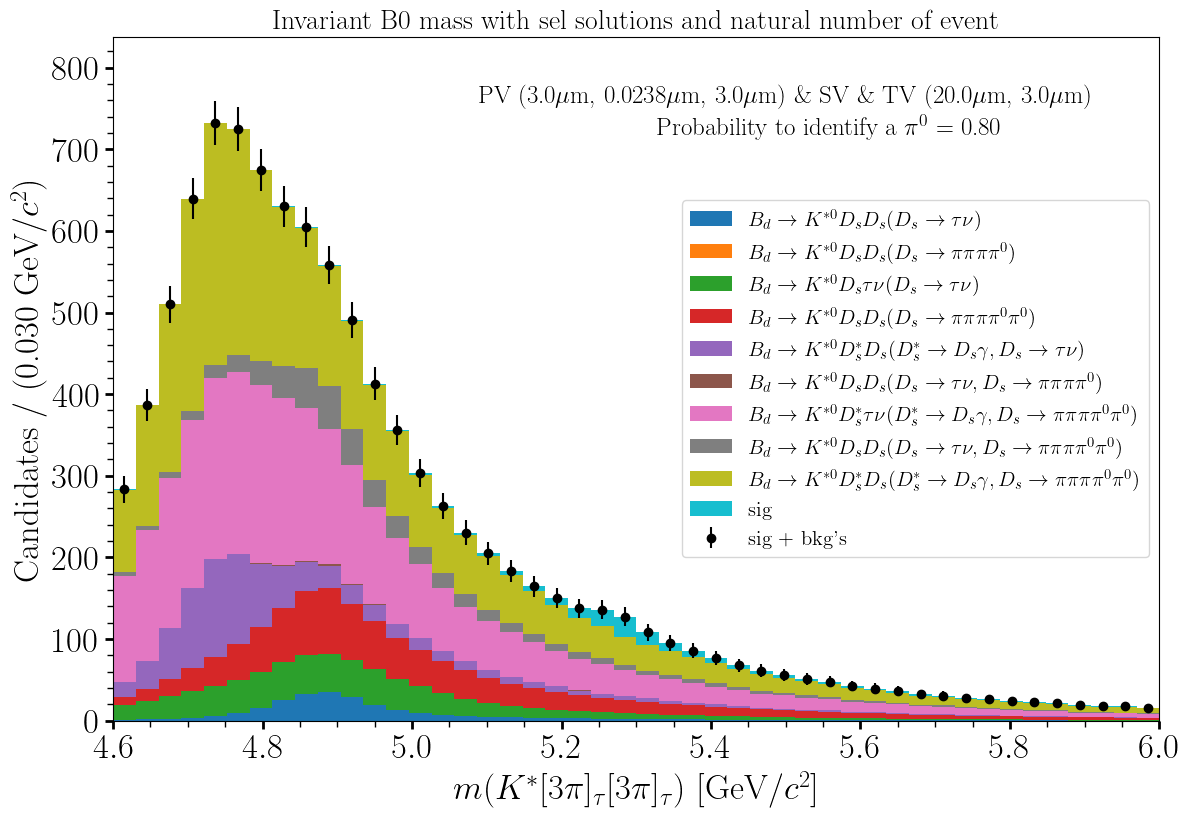

In [12]:
soltype='sel'
solsig=soltype
solbkg=soltype
low = 4.6
high = 6

data_np = np.array(data[f"sig_{smearing}"][f"{solsig}_plot"])
data_low_cut = data_np >= low
data_high_cut = data_np <= high
data_cut = np.logical_and(data_low_cut, data_high_cut)
data_np = data_np[data_cut]

PV_smear=True
SV_smear=True
TV_smear=True
PV_scale=3e-3
SV_scale=20e-3
TV_scale=3e-3

labelTeX={"Bd2KstDsDsDs2TauNu":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2pipipipi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\pi\\pi\\pi\\pi^0)$", "Bd2KstDsTauNuDs2TauNu":"$B_d\\to K^{*0}D_s\\tau\\nu(D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2pipipipi0pi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$", "Bd2KstDsstDsDsst2DsgammaDs2Taunu":"$B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2TaunuDs2pipipipi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0)$","sig":"sig","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0":"$B_d\\to K^{*0}D_s^*\\tau\\nu(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0\\pi^0)$", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0":"$B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$"}
#fracCBL=params[frac_CB]['value']*params[frac]['value']
#fracCBR=(1-params[frac_CB]['value'])*params[frac]['value']
#fracG=(1-params[frac]['value'])

fig, ax = plt.subplots(figsize=(12,8))
n = len(data_np)
bins = 2*int(np.sqrt(n))

bins=int((6-4.6)/0.03)
bin_w = (high - low)/bins

bng=np.linspace(low,high,bins)

units = "GeV/$c^2$"
counts, bin_edges = np.histogram(data_np, bins, range=(low,high))
true_number=data[f"sig_{smearing}"][f"{solsig}_plot_true_number"]
print('Expected number of events in window is {}'.format(true_number))
rescale=(true_number/np.sum(counts))#signal scale factor to consider a realist number of events
data[f"sig_{smearing}"][f"{solsig}_rescale"]=rescale
counts=counts*rescale
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)

probpi0k=probPI0#probability to identify a pi0 -> to study the effect of pi0 identification (it allow us to eliminate a fraction of Ds->pipipipi0 bkg)
rescale1pi0=(1-probpi0k)
rescale2pi0=(1-probpi0k)**2
#rescale4pi0=(1-probpi0k**2)**2#with eta and omega the probability for a Ds->pipipipi0pi0 to be found is equal to the one of a Ds->pipipipi0

listbkg=["Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0"]
for mode in listbkg:
    print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{solbkg}_plot_true_number"]))
countstot=counts
errtot=err**2
for mode in listbkg:
    counst_bkg, bin_edges_bkg=np.histogram(data[f"{mode}_{smearing}"][f"{solbkg}_plot"], bins, range=(low,high))
    data[f"{mode}_{smearing}"][f"{solbkg}_rescale"]=data[f"{mode}_{smearing}"][f"{solbkg}_plot_true_number"]/np.sum(counst_bkg)
    counst_bkg=counst_bkg*data[f"{mode}_{smearing}"][f"{solbkg}_rescale"]
    countstot+=counst_bkg
    err_bkg=np.sqrt(counst_bkg)
    errtot+=err_bkg**2
errtot=np.sqrt(errtot)

data_hist=[]
labellist=["Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0","sig"]
weights_list=[]
for mode in labellist:
    if (mode=='sig'):
        i=solsig
    else:
        i=solbkg
    data_hist.append(data[f"{mode}_{smearing}"][f"{i}_plot"])
    weights_list.append(np.ones(len(data[f"{mode}_{smearing}"][f"{i}_plot"]))*data[f"{mode}_{smearing}"][f"{i}_rescale"])
#print(data_hist)
#print(weights_list)
#plt.hist(bin_edges[:-1], bin_edges, weights=counts,label='sig rr',color='blue',alpha=1)
#plt.errorbar(bin_centres, counts1, yerr=err1, fmt='o', label='sig wr')
#plt.errorbar(bin_centres, counts2, yerr=err2, fmt='o', label='sig rw')
#plt.errorbar(bin_centres, counts3, yerr=err3, fmt='o', label='sig ww')
#plt.hist(Dspipipipi0_20_3_mm, bin_edges4, alpha=1,weights=np.ones(len(Dspipipipi0_20_3_mm))*scale_Dspipipipi0*rescale*rescale2pi0,label='BK Ds2pipipipi0',color='orange')
#plt.hist(bin_edges4[:-1], bin_edges4, weights=counts4,label='BK Ds2pipipipi0',color='orange',alpha=0.75)
#plt.hist(DsTauNu_20_3_mm, bin_edges5, alpha=0.75,weights=np.ones(len(DsTauNu_20_3_mm))*scale_DsTauNu*rescale,label='BK Ds2TauNu',color='green')
#plt.hist(bin_edges5[:-1], bin_edges5, weights=counts5,label='BK Ds2TauNu',color='green',alpha=0.5)
#plt.hist(data_np, bin_edges, alpha=0.5,weights=np.ones(len(data_np))*rescale, label='sig rr',color='blue')
plt.hist(data_hist,bin_edges, stacked=True, weights=weights_list,label=list(map(labelTeX.__getitem__, labellist)))
plt.errorbar(bin_centres, countstot, yerr=errtot, fmt='o', label='sig + bkg\'s', color="black")
#plt.errorbar(bin_centres, counts, yerr=err,fmt=' ', color='blue')
#plt.errorbar(bin_centres, counts4, yerr=err4,fmt=' ', color='orange')
#plt.errorbar(bin_centres, counts5, yerr=err5, fmt=' ', color='green')

#mult=20
#x_plot = np.linspace(low, high, num=500)#num=len(Counts[0][1])*mult)
#y_plot_tot = zfit.run(pdf.pdf(x_plot, norm_range=obs))
#level_list=[]
#for i in Counts[0][1]:
#    for j in range(mult):
#        level_list.append(i)
#plt.plot(x_plot, (y_plot_tot*len(data_np)/bins*obs.area()*rescale), color='black', linewidth=1, alpha=1,label='sig fit')
ax.tick_params(axis='both', which='major', labelsize=25,width=2,length=6)
ax.tick_params(axis='both', which='minor',width=1,length=4)
plt.ylabel("Candidates / (%.3f GeV/$c^2$)" % bin_w,fontsize=25)
plt.xlabel("$m(K^* [3\pi]_\\tau [3\pi]_\\tau)$ [GeV/$c^2$]",fontsize=25)
plt.xlim(low,high)
ymin, ymax = plt.ylim()
YMIN, YMAX = plt.ylim(0,1.05*ymax)#in order to keep same y window  in the following 
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax.yaxis.set_minor_locator(tick.AutoMinorLocator())
#plt.text((high-low)*0.6+low,0.9*ymax,"\\textbf{FCC-ee}",fontsize=20)
#plt.text((high-low)*0.55+low,0.74*ymax,"$Z^0 \\to b\\bar{b}$ sim.",fontsize=20)
#plt.text((high-low)*0.55+low,0.74*ymax,"$\\cdot$ $B^0 \\to K^{*0} \\tau^+ \\tau^-$ excl.",fontsize=20)
if ((PV_smear==False)&(SV_smear==False)&(TV_smear==False)):
    plt.text((high-low)*0.52+low,0.98*ymax,"TRUE DECAY VERTICES USED",fontsize=18)
if ((PV_smear==True)&(SV_smear==False)&(TV_smear==False)):
    plt.text((high-low)*0.52+low,0.98*ymax,f"PRIMARY VERTEX ({PV_scale*1000}$\mu$m) SMEARED",fontsize=18)
if ((PV_smear==False)&(SV_smear==True)&(TV_smear==False)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{SECONDARY VERTEX SMEARED}",fontsize=18)
if ((PV_smear==False)&(SV_smear==False)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{TERTIARY VERTEX SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==True)&(TV_smear==False)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{PV \& SV SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==False)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{PV \& TV SMEARED}",fontsize=18)
if ((PV_smear==False)&(SV_smear==True)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{SV \& TV SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==True)&(TV_smear==True)):
    plt.text((high-low)*0.35+low,0.95*ymax,f"PV (3.0$\mu$m, 0.0238$\mu$m, 3.0$\mu$m)"+f" \& SV \& TV ({SV_scale*1000}$\mu$m, {TV_scale*1000}$\mu$m)",fontsize=18)
#sigma_min=params[sigmaG1]['value']
#sigma_val = 1000.*sigma_min
#plt.text((high-low)*0.52+low,0.90*ymax,"Core $\\sigma = %.1f$ MeV/$c^2$" % sigma_val,fontsize=18)
#plt.text((high-low)*0.52+low,0.82*ymax,"Core gaussian fraction = %.2f" % fracG,fontsize=18)
plt.text((high-low)*0.52+low,0.90*ymax,"Probability to identify a $\\pi^0$ = %.2f " % probpi0k,fontsize=18)
plt.tight_layout()
plt.title(f"Invariant B0 mass with {soltype} solutions and natural number of event")
plt.legend(loc='right')

string_proba=str(probpi0k)

if(SAVEMOD=="yes"):
    plt.savefig(f'new_vertexing_final_plots/rr_--_20_3_{string_proba}.pdf');
#mask_centre=(bin_centres>=5.2)&(bin_centres<=5.4)
#mask_centre1=(bin_centres>=5.2)&(bin_centres<=5.4)
#print(np.sum(counts[mask_centre])/np.sum(counts1[mask_centre1]))
#print(np.sum(counts1[mask_centre1])/np.sum(counts[mask_centre]))
#plot RMS evolution of the distribution (with ROOT ?)
#print(data[f"sig_20_3"][f"SV_{SVMOD}_eff_reco"][0], data[f"Bd2KstDsDsDs2pipipipi0_20_3"][f"SV_{SVMOD}_eff_reco"][0], data[f"Bd2KstDsDsDs2TauNu_20_3"][f"SV_{SVMOD}_eff_reco"][0])

Same plot + fit with ROOT 

Expected number of sig in window is 167.4918432
Expected number of Bd2KstDsDsDs2TauNu in window is 256.27180526555514
Expected number of Bd2KstDsDsDs2pipipipi0 in window is 0.6035587129265616
Expected number of Bd2KstDsTauNuDs2TauNu in window is 702.7729347874862
Expected number of Bd2KstDsDsDs2pipipipi0pi0 in window is 1048.0188411556387
Expected number of Bd2KstDsstDsDsst2DsgammaDs2Taunu in window is 809.364641202058
Expected number of Bd2KstDsDsDs2TaunuDs2pipipipi0 in window is 12.279718100232735
Expected number of Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 in window is 3106.5989054502593
Expected number of Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 in window is 518.4848287752063
Expected number of Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 in window is 3307.021964384736


Warning in <TROOT::Append>: Replacing existing TH1: sig mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Bd2KstDsDsDs2TauNu mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Bd2KstDsDsDs2pipipipi0 mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Bd2KstDsTauNuDs2TauNu mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Bd2KstDsDsDs2pipipipi0pi0 mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Bd2KstDsstDsDsst2DsgammaDs2Taunu mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Bd2KstDsDsDs2TaunuDs2pipipipi0 mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 mass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 mass (Potential memory leak).
Warning in <TROOT::Append>:

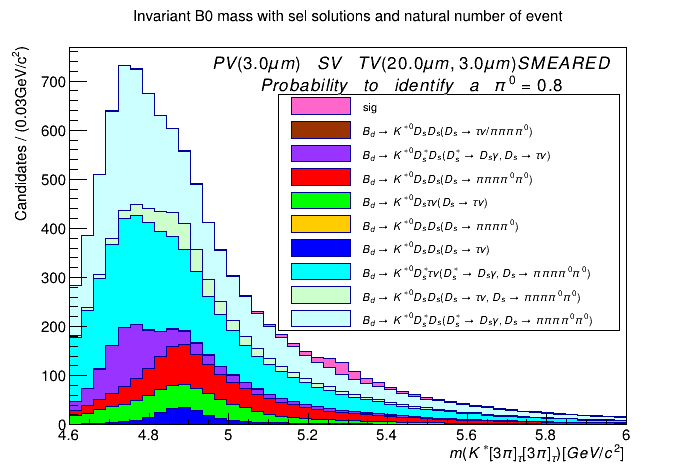

In [104]:
PV_smear=True
SV_smear=True
TV_smear=True
PV_scale=3e-3
SV_scale=20e-3
TV_scale=3e-3

low = 4.6
high = 6

bins=int((6-4.6)/0.03)
bin_w = (high - low)/bins

sig_hist=ROOT.TH1D("sig mass", "sig mass", bins, 4.6, 6.0)
for i in data[f"sig_{smearing}"][f"sel_plot"]:
    sig_hist.Fill(i, data[f"sig_{smearing}"][f"sel_plot_true_number"]/len(data[f"sig_{smearing}"][f"sel_plot"]))
sig_hist.SetFillColor(906)

Bd2KstDsDsDs2TauNu_hist=ROOT.TH1D("Bd2KstDsDsDs2TauNu mass", "Bd2KstDsDsDs2TauNu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot"]:
    Bd2KstDsDsDs2TauNu_hist.Fill(i, data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot"]))
Bd2KstDsDsDs2TauNu_hist.SetFillColor(600)

Bd2KstDsDsDs2pipipipi0_hist=ROOT.TH1D("Bd2KstDsDsDs2pipipipi0 mass", "Bd2KstDsDsDs2pipipipi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot"]:
    Bd2KstDsDsDs2pipipipi0_hist.Fill(i, data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot"]))
Bd2KstDsDsDs2pipipipi0_hist.SetFillColor(800)

Bd2KstDsTauNuDs2TauNu_hist=ROOT.TH1D("Bd2KstDsTauNuDs2TauNu mass", "Bd2KstDsTauNuDs2TauNu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot"]:
    Bd2KstDsTauNuDs2TauNu_hist.Fill(i, data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot"]))
Bd2KstDsTauNuDs2TauNu_hist.SetFillColor(416)

Bd2KstDsDsDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsDsDs2pipipipi0pi0 mass", "Bd2KstDsDsDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot"]:
    Bd2KstDsDsDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot"]))
Bd2KstDsDsDs2pipipipi0pi0_hist.SetFillColor(632)

Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist=ROOT.TH1D("Bd2KstDsstDsDsst2DsgammaDs2Taunu mass", "Bd2KstDsstDsDsst2DsgammaDs2Taunu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot"]:
    Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist.Fill(i, data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot"]))
Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist.SetFillColor(881)

Bd2KstDsDsDs2TaunuDs2pipipipi0_hist=ROOT.TH1D("Bd2KstDsDsDs2TaunuDs2pipipipi0 mass", "Bd2KstDsDsDs2TaunuDs2pipipipi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot"]:
    Bd2KstDsDsDs2TaunuDs2pipipipi0_hist.Fill(i, data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot"]))
Bd2KstDsDsDs2TaunuDs2pipipipi0_hist.SetFillColor(804)


Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 mass", "Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot"]:
    Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot"]))
Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist.SetFillColor(432)

Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 mass", "Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot"]:
    Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot"]))
Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist.SetFillColor(406)

Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist=ROOT.TH1D("Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 mass", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot"]:
    Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist.Fill(i, data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_true_number"]/len(data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot"]))
Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist.SetFillColor(422)

stack_hist=ROOT.THStack("stack histo", f"Invariant B0 mass with sel solutions and natural number of event")
stack_hist.Add(Bd2KstDsDsDs2TauNu_hist)
stack_hist.Add(Bd2KstDsDsDs2pipipipi0_hist)
stack_hist.Add(Bd2KstDsTauNuDs2TauNu_hist)
stack_hist.Add(Bd2KstDsDsDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist)
stack_hist.Add(Bd2KstDsDsDs2TaunuDs2pipipipi0_hist)
stack_hist.Add(Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist)
stack_hist.Add(sig_hist)
legend=ROOT.TLegend(0.4,0.3,0.89,0.8)
legend.AddEntry(sig_hist,"sig","f")
legend.AddEntry(Bd2KstDsDsDs2TaunuDs2pipipipi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to\\tau\\nu/\pi\pi\pi\pi^{0})","f")
legend.AddEntry(Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist,"B_{d}\\to K^{*0} D_{s}^{*} D_{s} (D_{s}^{*}\\to D_{s}\\gamma, D_{s}\\to\\tau\\nu)","f")
legend.AddEntry(Bd2KstDsDsDs2pipipipi0pi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\pi\\pi\\pi\\pi^{0}\\pi^{0})","f")
legend.AddEntry(Bd2KstDsTauNuDs2TauNu_hist,"B_{d}\\to K^{*0} D_{s} \\tau\\nu (D_{s}\\to \\tau\\nu)","f")
legend.AddEntry(Bd2KstDsDsDs2pipipipi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\pi\\pi\\pi\\pi^{0})","f")
legend.AddEntry(Bd2KstDsDsDs2TauNu_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\tau\\nu)","f")
legend.AddEntry(Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist,"B_d\\to K^{*0}D_s^*\\tau\\nu(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.AddEntry(Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist,"B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.AddEntry(Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist,"B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.SetFillStyle(0)
ttext=ROOT.TPaveText(0.3,0.8,0.89,0.89,"NDC")
ttext.SetTextSize(0.04)
ttext.AddText(f"PV ({PV_scale*1000}"+"\\mu m)"+f" \\& SV \\& TV ({SV_scale*1000}\mu m, {TV_scale*1000}\\mu m) SMEARED")
ttext.AddText("Probability\tto\tidentify\ta\t\\pi^0"+f"={probPI0}")
ttext.SetFillColor(0)
ttext.SetBorderSize(0)
c1=ROOT.TCanvas()
stack_hist.Draw("HIST")
xaxis=stack_hist.GetXaxis()
xaxis.SetTitle("m(K^{*} [3\\pi]_\\tau [3\\pi]_\\tau) [GeV/c^{2}]")
yaxis=stack_hist.GetYaxis()
yaxis.SetTitle(f"Candidates / ({bin_w:.2f}"+ "GeV/c^{2})")
legend.Draw()
ttext.Draw()
c1.Draw()


for mode in listmod:
    print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"sel_plot_true_number"]))

Signal fit by making RooDataSet

mass_high=6.
mass_low=5.
mass = ROOT.RooRealVar("mass", "mass", mass_low, mass_high)
bins=int((mass_high-mass_low)/0.03)
npsigmass=np.array(data[f"sig_{smearing}"][f"sel_plot"])

signal_mass = ROOT.RooDataSet.from_numpy(data={"mass": npsigmass}, variables=[mass])
#np.savetxt('data1.txt',X=npsigmass)
low = 4.6
high = 6

rand+=1

#signal fit
#crystal ball parameters
mu=ROOT.RooRealVar(f"mu_{rand}", f"mu_{rand}", lp.B_0.mass/1000., low, high)
sigma = ROOT.RooRealVar(f"sigma_{rand}", f"sigma_{rand}", 0.2, 0., 1.)
alphaR = ROOT.RooRealVar(f"alphaR_{rand}", f"alphaR_{rand}", 0.2, 0., 5.)
nR = ROOT.RooRealVar(f"nR_{rand}", f"nR_{rand}", 10., 0., 200.)
alphaL = ROOT.RooRealVar(f"alphaL_{rand}", f"alphaL_{rand}", 0.2, 0., 5.)
nL = ROOT.RooRealVar(f"nL_{rand}", f"nL_{rand}", 10., 0., 200.)
# Core gaussian parameters
sigmaG1 = ROOT.RooRealVar(f"sigmaG1_{rand}", f"sigmaG1_{rand}", 0.015, 0., 1)
# Fractions
frac = ROOT.RooRealVar(f"frac_{rand}", f"frac_{rand}", 0.5, 0., 1.)

#signal model
CB = ROOT.RooCrystalBall(f"CB_{rand}",f"CB_{rand}",x=mass,x0=mu,sigmaLR=sigma,alphaR=alphaR, nR=nR,alphaL=alphaL, nL=nL )
Gau = ROOT.RooGaussian(f"gau_{rand}",f"gau_{rand}",_x=mass,_mean=mu,_sigma=sigmaG1)
sig_fit= ROOT.RooAddPdf( f"sig_fit_{rand}",f"sig_fit_{rand}",CB, Gau,frac)
minimiz=ROOT.RooFit.Minimizer("Minuit2","migrad")
sig_fit.fitTo(signal_mass,minimiz)#,ROOT.RooFit.Extended(),ROOT.RooFit.NumCPU(7))
c22=ROOT.TCanvas()
Mframe = mass.frame(bins)
signal_mass.plotOn(Mframe)
sig_fit.plotOn(Mframe)
Mframe.Draw()
c22.Draw('mass')


Signal + bkg fit via RooDataSet

weight = ROOT.RooRealVar("weight", "weight", 0., 100000.)

npsigbkgmass=np.array([])
npsigbkgweight=np.array([])
npbkgmass=np.array([])#array to determine number of bkg on fit window
for sigbkgmode in ["sig","Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0"]:
    if (sigbkgmode!="sig"):
        npbkgmass=np.concatenate((npbkgmass,np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot"])),axis=None)
    npsigbkgmass=np.concatenate((npsigbkgmass,np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot"])),axis=None)
    npsigbkgweight=np.concatenate((npsigbkgweight,(np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot"])*0+data[f"{sigbkgmode}_{smearing}"][f"sel_plot_true_number"]/len(data[f"{sigbkgmode}_{smearing}"][f"sel_plot"]))),axis=None)
sigbkg_mass = ROOT.RooDataSet.from_numpy(data={"mass": npsigbkgmass, "weight": npsigbkgweight}, variables=[mass, weight], weight_name="weight")
#np.savetxt('data2.txt',X=np.stack((npsigbkgmass,npsigbkgweight)))

#fix signal model parameters
mu.setConstant()
sigma.setConstant()
alphaR.setConstant()
nR.setConstant()
alphaL.setConstant()
nL.setConstant()
sigmaG1.setConstant()
frac.setConstant()
#background model
c_exp1=ROOT.RooRealVar(f"c_exp1_{rand}", f"c_exp1_{rand}", -1., -10., 0.)#-7.63421
#c_exp1.setConstant()
c_exp2=ROOT.RooRealVar(f"c_exp2_{rand}", f"c_exp2_{rand}", -1., -10., 0.)
frac_expo=ROOT.RooRealVar(f"frac_expo_{rand}", f"frac_expo_{rand}", 0.5, 0., 1.)
expo1=ROOT.RooExponential(f"expo1_{rand}",f"expo1_{rand}",_x=mass,_c=c_exp1)
expo2=ROOT.RooExponential(f"expo2_{rand}",f"expo2_{rand}",_x=mass,_c=c_exp2)
bkg_fit=ROOT.RooAddPdf( f"bkg_fit_{rand}",f"bkg_fit_{rand}",expo1, expo2,frac_expo)
#yield
nsig0=data[f"sig_{smearing}"][f"sel_plot_true_number"]
nbkg0=data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_true_number"]+data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_true_number"]+data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_true_number"]+data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_true_number"]+data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_true_number"]+data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_true_number"]+data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_true_number"]+data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_true_number"]+data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_true_number"]
nsig=ROOT.RooRealVar(f"nSig_{rand}",f"nSig_{rand}",nsig0,0.,10000.)
nbkg=ROOT.RooRealVar(f"nBkg_{rand}",f"nBkg_{rand}",nbkg0,0,1000000.)
#total model
sigbkg_fit=ROOT.RooAddPdf("sigbkg_fit","sigbkg_fit",ROOT.RooArgList(sig_fit,bkg_fit),ROOT.RooArgList(nsig,nbkg))

#mass.setRange('fitrange',5.0,6.0)
minimiz=ROOT.RooFit.Minimizer("Minuit2","migrad")
sigbkg_fit.fitTo(sigbkg_mass,minimiz)#Range=('fitrange')

#plot_sig=ROOT.RooExtendPdf(f'sig_plot_{rand}', f'sig_plot_{rand}', sig_fit, nsig)
#plot_bkg=ROOT.RooExtendPdf(f'bkg_plot_{rand}', f'bkg_plot_{rand}', bkg_fit, nbkg)
c222=ROOT.TCanvas()
Mframe = mass.frame(bins)
sigbkg_mass.plotOn(Mframe)
sigbkg_fit.plotOn(Mframe)
sigbkg_fit.plotOn(Mframe, LineColor='r',Components=ROOT.RooArgSet(sig_fit))
sigbkg_fit.plotOn(Mframe, LineColor='m',Components=ROOT.RooArgSet(bkg_fit))
Mframe.Draw()
c222.Draw('mass')

prop_sig_fit_window=len(npsigmass[(npsigmass>mass_low)&(npsigmass<mass_high)])/len(npsigmass)
prop_bkg_fit_window=len(npbkgmass[(npbkgmass>mass_low)&(npbkgmass<mass_high)])/len(npbkgmass)
nbsig_expected=0
for mode in ["sig"]:
    nbsig_expected+=data[f"{mode}_{smearing}"][f"sel_plot_true_number"]*(len(data[f"{mode}_{smearing}"][f"sel_plot"][(data[f"{mode}_{smearing}"][f"sel_plot"]>mass_low)*(data[f"{mode}_{smearing}"][f"sel_plot"]<mass_high)])/len(data[f"{mode}_{smearing}"][f"sel_plot"]))
print(nbsig_expected)
nbbkg_expected=0
for mode in listbkg:
    nbbkg_expected+=data[f"{mode}_{smearing}"][f"sel_plot_true_number"]*(len(data[f"{mode}_{smearing}"][f"sel_plot"][(data[f"{mode}_{smearing}"][f"sel_plot"]>mass_low)*(data[f"{mode}_{smearing}"][f"sel_plot"]<mass_high)])/len(data[f"{mode}_{smearing}"][f"sel_plot"]))
print(nbbkg_expected)
print(prop_sig_fit_window)
print(prop_bkg_fit_window)
print(nsig0*prop_sig_fit_window)
print(nsig)
print(nbkg0*prop_bkg_fit_window)
print(nbkg)

print(nsig0*prop_sig_fit_window+nbkg0*prop_bkg_fit_window)
print(nsig.getVal()+nbkg.getVal())
print(nbsig_expected+nbbkg_expected)

Make signal and bkgs toy from the model:

nb_sig_fit_window=int(np.round(nbsig_expected))
nb_bkg_fit_window=int(np.round(nbbkg_expected))

print(nb_sig_fit_window, nb_bkg_fit_window)


signal_mass_toy = sig_fit.generate(mass,nb_sig_fit_window)
ROOT.SetOwnership(signal_mass_toy, True) # because generate returns an owning pointer
sigbkg_mass_toy = bkg_fit.generate(mass,nb_bkg_fit_window)
ROOT.SetOwnership(sigbkg_mass_toy, True) # because generate returns an owning pointer

sigbkg_mass_toy.append(signal_mass_toy)

Refit signal + bkg:

rand+=1
#signal fit
#crystal ball parameters
mu_toy=ROOT.RooRealVar(f"mu_toy_{rand}", f"mu_toy_{rand}", mu.getVal(), low, high)
sigma_toy = ROOT.RooRealVar(f"sigma_toy_{rand}", f"sigma_toy_{rand}", sigma.getVal(), 0., 2.)
alphaR_toy = ROOT.RooRealVar(f"alphaR_toy_{rand}", f"alphaR_toy_{rand}", alphaR.getVal(), 0., 5.)
nR_toy = ROOT.RooRealVar(f"nR_toy_{rand}", f"nR_toy_{rand}", nR.getVal(), 0., 200.)
alphaL_toy = ROOT.RooRealVar(f"alphaL_toy_{rand}", f"alphaL_toy_{rand}", alphaL.getVal(), 0., 5.)
nL_toy = ROOT.RooRealVar(f"nL_toy_{rand}", f"nL_toy_{rand}", nL.getVal(), 0., 200.)
# Core gaussian parameters
sigmaG1_toy = ROOT.RooRealVar(f"sigmaG1_toy_{rand}", f"sigmaG1_toy_{rand}", sigmaG1.getVal(), 0., 1)
# Fractions
frac_toy = ROOT.RooRealVar(f"frac_toy_{rand}", f"frac_toy_{rand}", frac.getVal(), 0., 1.)
#signal model
CB_toy = ROOT.RooCrystalBall(f"CB_toy_{rand}",f"CB_toy_{rand}",x=mass,x0=mu_toy,sigmaLR=sigma_toy,alphaR=alphaR_toy, nR=nR_toy,alphaL=alphaL_toy, nL=nL_toy )
Gau_toy = ROOT.RooGaussian(f"gau_toy_{rand}",f"gau_toy_{rand}",_x=mass,_mean=mu_toy,_sigma=sigmaG1_toy)
sig_fit_toy= ROOT.RooAddPdf( f"sig_fit_toy_{rand}",f"sig_fit_toy_{rand}",CB_toy, Gau_toy,frac_toy)
#background model
c_exp1_toy=ROOT.RooRealVar(f"c_exp1_toy_{rand}", f"c_exp1_toy_{rand}", c_exp1.getVal(), -10., 0.)#-7.63421
#c_exp1.setConstant()
c_exp2_toy=ROOT.RooRealVar(f"c_exp2_toy_{rand}", f"c_exp2_toy_{rand}", c_exp2.getVal(), -10., 0.)
frac_expo_toy=ROOT.RooRealVar(f"frac_expo_toy_{rand}", f"frac_expo_toy_{rand}", frac_expo.getVal(), 0., 1.)
expo1_toy=ROOT.RooExponential(f"expo1_toy_{rand}",f"expo1_toy_{rand}",_x=mass,_c=c_exp1_toy)
expo2_toy=ROOT.RooExponential(f"expo2_toy_{rand}",f"expo2_toy_{rand}",_x=mass,_c=c_exp2_toy)
bkg_fit_toy=ROOT.RooAddPdf( f"bkg_fit_{rand}",f"bkg_fit_{rand}",expo1_toy, expo2_toy,frac_expo_toy)
#yield
nsig_toy=ROOT.RooRealVar(f"nSig_toy_{rand}",f"nSig_toy_{rand}",nsig0,0.,10000.)
nbkg_toy=ROOT.RooRealVar(f"nBkg_toy_{rand}",f"nBkg_toy_{rand}",nbkg0,0,1000000.)
#total model
sigbkg_fit_toy=ROOT.RooAddPdf("sigbkg_fit","sigbkg_fit",ROOT.RooArgList(sig_fit_toy,bkg_fit_toy),ROOT.RooArgList(nsig_toy,nbkg_toy))

mu_toy.setConstant()
sigma_toy.setConstant()
alphaR_toy.setConstant()
nR_toy.setConstant()
alphaL_toy.setConstant()
nL_toy.setConstant()
sigmaG1_toy.setConstant()
frac_toy.setConstant()
c_exp1_toy.setConstant()
c_exp2_toy.setConstant()
frac_expo_toy.setConstant()


c_exp1_toy.setConstant(False)
c_exp2_toy.setConstant(False)
frac_expo_toy.setConstant(False)
#mu_toy.setConstant(False)
sigma_toy.setConstant(False)



"""#total model
sigbkg_fit_toy=ROOT.RooAddPdf("sigbkg_fit_toy","sigbkg_fit_toy",ROOT.RooArgList(sig_fit,bkg_fit),ROOT.RooArgList(nsig,nbkg))"""

#mass.setRange('fitrange',5.0,6.0)

sigbkg_fit_toy.fitTo(sigbkg_mass_toy)#Range=('fitrange')

#plot_sig=ROOT.RooExtendPdf(f'sig_plot_{rand}', f'sig_plot_{rand}', sig_fit, nsig)
#plot_bkg=ROOT.RooExtendPdf(f'bkg_plot_{rand}', f'bkg_plot_{rand}', bkg_fit, nbkg)
c222=ROOT.TCanvas()
Mframe = mass.frame(bins)
sigbkg_mass_toy.plotOn(Mframe)
sigbkg_fit_toy.plotOn(Mframe)
sigbkg_fit_toy.plotOn(Mframe, LineColor='r',Components=ROOT.RooArgSet(sig_fit_toy))
sigbkg_fit_toy.plotOn(Mframe, LineColor='m',Components=ROOT.RooArgSet(bkg_fit_toy))
Mframe.Draw()
c222.Draw('mass')


print(nbsig_expected)
print(nsig_toy)
print(nbbkg_expected)
print(nbkg_toy)
print(np.round(nbsig_expected)+np.round(nbbkg_expected))
print(nsig_toy.getVal()+nbkg_toy.getVal())



true_number=data[f"sig_{smearing}"][f"{solsig}_cut_study_true_number"]
print('Expected number of events in window is {}'.format(true_number))

significance=[]
probpi0list=np.linspace(0.5,1,100)
for probPI0l in probpi0list:
    probpi0k=probPI0l#probability to identify a pi0 -> to study the effect of pi0 identification (it allow us to eliminate a fraction of Ds->pipipipi0 bkg)
    rescale1pi0=(1-probpi0k)
    rescale2pi0=(1-probpi0k)**2
    #rescale4pi0=(1-probpi0k**2)**2#with eta and omega the probability for a Ds->pipipipi0pi0 to be found is equal to the one of a Ds->pipipipi0
    denom_signi=data[f"sig_{smearing}"][f"{solsig}_cut_study_true_number"]
    for mode in listbkg:
        if ((mode=='Bd2KstDsDsDs2pipipipi0')|(mode=='Bd2KstDsDsDs2pipipipi0pi0')):
            rescale_TN=rescale2pi0
        #elif (mode=='Bd2KstDsDsDs2pipipipi0pi0'):
        #    rescale_TN=rescale4pi0
        elif (mode=='Bd2KstDsDsDs2TaunuDs2pipipipi0'):
            rescale_TN=rescale1pi0
        else:
            rescale_TN=1
        data[f"{mode}_{smearing}"][f"{solbkg}_cut_study_true_number_rescaled"]=data[f"{mode}_{smearing}"][f"{solbkg}_cut_study_true_number"]*rescale_TN
        #print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{solbkg}_plot_true_number_rescale"]))
        denom_signi+=data[f"{mode}_{smearing}"][f"{solbkg}_cut_study_true_number_rescaled"]
    significance.append(data[f"sig_{smearing}"][f"{solsig}_cut_study_true_number"]/np.sqrt(denom_signi))

print(np.min(significance),np.max(significance))
plt.figure(figsize=(12,8))
plt.plot(probpi0list, significance)
plt.title(f'Significance as function of the pi0 detection rate for ({0.02*1000}$\mu$m, {0.003*1000}$\mu$m) {soltype}')
plt.xlabel('pi0 detection rate')
plt.ylabel('Significance');
print(probpi0list[np.array(significance)>3])

true_number=data[f"sig_{smearing}"][f"{solsig}_cut_study_true_number"]
print('Expected number of events in window is {}'.format(true_number))

probpi0k=0.93#probability to identify a pi0 -> to study the effect of pi0 identification (it allow us to eliminate a fraction of Ds->pipipipi0 bkg)
rescale1pi0=(1-probpi0k)
rescale2pi0=(1-probpi0k)**2
#rescale4pi0=(1-probpi0k**2)**2#with eta and omega the probability for a Ds->pipipipi0pi0 to be found is equal to the one of a Ds->pipipipi0
denom_signi=data[f"sig_{smearing}"][f"{solsig}_cut_study_true_number"]
for mode in listbkg:
    if ((mode=='Bd2KstDsDsDs2pipipipi0')|(mode=='Bd2KstDsDsDs2pipipipi0pi0')):
        rescale_TN=rescale2pi0
    #elif (mode=='Bd2KstDsDsDs2pipipipi0pi0'):
    #    rescale_TN=rescale4pi0
    elif (mode=='Bd2KstDsDsDs2TaunuDs2pipipipi0'):
        rescale_TN=rescale1pi0
    else:
        rescale_TN=1
    data[f"{mode}_{smearing}"][f"{solbkg}_cut_study_true_number_rescaled"]=data[f"{mode}_{smearing}"][f"{solbkg}_cut_study_true_number"]*rescale_TN
    print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{solbkg}_cut_study_true_number_rescaled"]))
    denom_signi+=data[f"{mode}_{smearing}"][f"{solbkg}_cut_study_true_number_rescaled"]
significance=(data[f"sig_{smearing}"][f"{solsig}_cut_study_true_number"]/np.sqrt(denom_signi))
print(significance)

In [12]:
for mode in listmod:
    for smearing in listsmearing:
        smearname=smearing
        print(f'Eff reco {mode} {smearname} :', data[f"{mode}_{smearing}"][f"eff_reco"][0],'+-',data[f"{mode}_{smearing}"][f"eff_reco"][1])

Eff reco sig 20-3 : 0.49763469289889445 +- 0.0018000206119756436
Eff reco Bd2KstDsDsDs2TauNu 20-3 : 0.606479690307553 +- 0.0008729395123457008
Eff reco Bd2KstDsDsDs2pipipipi0 20-3 : 0.032927655842306246 +- 0.0003459291953772444
Eff reco Bd2KstDsTauNuDs2TauNu 20-3 : 0.5533103307748334 +- 0.0008932483284928335
Eff reco Bd2KstDsDsDs2pipipipi0pi0 20-3 : 0.712599899104194 +- 0.0008050496886322414
Eff reco Bd2KstDsstDsDsst2DsgammaDs2Taunu 20-3 : 0.6050971396322593 +- 0.0008654016750901191
Eff reco Bd2KstDsDsDs2TaunuDs2pipipipi0 20-3 : 0.14042484949309605 +- 0.0006465881866920199
Eff reco Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 20-3 : 0.6029967768249384 +- 0.00087387453315629
Eff reco Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 20-3 : 0.6567844232723141 +- 0.000846569655308736
Eff reco Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 20-3 : 0.7139654168752505 +- 0.0007976089496084204


In [13]:
for mode in listmod:
    for smearing in listsmearing:
        smearname=smearing
        print(f'Eff RP candidate {mode} {smearname} :', data[f"{mode}_{smearing}"][f"eff_RP_candidates"],'+-',data[f"{mode}_{smearing}"][f"eff_RP_candidates_err"])

Eff RP candidate sig 20-3 : 0.77157 +- 0.0013275908070636826
Eff RP candidate Bd2KstDsDsDs2TauNu 20-3 : 0.7829825 +- 0.0006517685645490852
Eff RP candidate Bd2KstDsDsDs2pipipipi0 20-3 : 0.6652325 +- 0.0007461538396064012
Eff RP candidate Bd2KstDsTauNuDs2TauNu 20-3 : 0.7744075 +- 0.0006608716288806586
Eff RP candidate Bd2KstDsDsDs2pipipipi0pi0 20-3 : 0.789995 +- 0.0006440164981873523
Eff RP candidate Bd2KstDsstDsDsst2DsgammaDs2Taunu 20-3 : 0.797665 +- 0.0006352077372305064
Eff RP candidate Bd2KstDsDsDs2TaunuDs2pipipipi0 20-3 : 0.7217925 +- 0.0007085338505388258
Eff RP candidate Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 20-3 : 0.78369 +- 0.0006509992010363761
Eff RP candidate Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 20-3 : 0.78633 +- 0.0006481032539264095
Eff RP candidate Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 20-3 : 0.80252 +- 0.0006294474751716778


In [14]:
for mode in listmod:
    for smearing in listsmearing:
        smearname=smearing
        data[f"{mode}_{smearing}"][f"eff_reco_tot"]=data[f"{mode}_{smearing}"][f"eff_reco"][0]*data[f"{mode}_{smearing}"][f"eff_RP_candidates"]
        data[f"{mode}_{smearing}"][f"eff_reco_tot_err"]=np.sqrt((data[f"{mode}_{smearing}"][f"eff_reco"][0]*data[f"{mode}_{smearing}"][f"eff_RP_candidates_err"])**2+(data[f"{mode}_{smearing}"][f"eff_RP_candidates_err"]*data[f"{mode}_{smearing}"][f"eff_reco"][1])**2)
        print(f'Eff reco tot {mode} {smearname} :', data[f"{mode}_{smearing}"][f"eff_reco_tot"],'+-',data[f"{mode}_{smearing}"][f"eff_reco_tot_err"])

Eff reco tot sig 20-3 : 0.38395999999999997 +- 0.0006606595654925432
Eff reco tot Bd2KstDsDsDs2TauNu 20-3 : 0.4748629841162336 +- 0.0003952848066434621
Eff reco tot Bd2KstDsDsDs2pipipipi0 20-3 : 0.021904546815116988 +- 2.457045264967868e-05
Eff reco tot Bd2KstDsTauNuDs2TauNu 20-3 : 0.4284876699795118 +- 0.00036566757607518833
Eff reco tot Bd2KstDsDsDs2pipipipi0pi0 20-3 : 0.5629503572928177 +- 0.0004589263844940709
Eff reco tot Bd2KstDsstDsDsst2DsgammaDs2Taunu 20-3 : 0.4826648098847661 +- 0.0003843627779640154
Eff reco tot Bd2KstDsDsDs2TaunuDs2pipipipi0 20-3 : 0.10135760317774553 +- 9.949681404920914e-05
Eff reco tot Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 20-3 : 0.4725625440299359 +- 0.0003925508321646723
Eff reco tot Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 20-3 : 0.5164492955517187 +- 0.0004256644754544845
Eff reco tot Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 20-3 : 0.572971526350726 +- 0.00044940400944702745


In [108]:
8*(10**12)*0.1512*2*0.407*1.3*(10**(-7))*(0.0931**2)*0.69*0.2850*0.8

174.5391413262841

In [109]:
174.5391413262841*np.sqrt((5/1512)**2+(7/407)**2+0.1**2+2*(5/931)**2+(5/2850)**2)

17.77174090497256

In [110]:
for mode in listmod:
    for smearing in listsmearing:
        print(f'Eff in cut window {mode} {smearname} :', data[f"{mode}_{smearing}"][f"sel_eff_cut_study_window"])

Eff in cut window sig 20-3 : 0.8099281175122408
Eff in cut window Bd2KstDsDsDs2TauNu 20-3 : 0.21255626628760957
Eff in cut window Bd2KstDsDsDs2pipipipi0 20-3 : 0.2354485277333942
Eff in cut window Bd2KstDsTauNuDs2TauNu 20-3 : 0.2594591440823828
Eff in cut window Bd2KstDsDsDs2pipipipi0pi0 20-3 : 0.3384181543653966
Eff in cut window Bd2KstDsstDsDsst2DsgammaDs2Taunu 20-3 : 0.12652150041954566
Eff in cut window Bd2KstDsDsDs2TaunuDs2pipipipi0 20-3 : 0.22225784969045212
Eff in cut window Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 20-3 : 0.2128554424017987
Eff in cut window Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 20-3 : 0.29176106109013455
Eff in cut window Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 20-3 : 0.22237978262482055


In [111]:
for mode in listmod:
    for smearing in listsmearing:
        print(f'Eff reco tot * in cut window {mode} {smearname} :', data[f"{mode}_{smearing}"][f"sel_eff_cut_study_window"]*data[f"{mode}_{smearing}"][f"eff_reco_tot"])

Eff reco tot * in cut window sig 20-3 : 0.31098
Eff reco tot * in cut window Bd2KstDsDsDs2TauNu 20-3 : 0.10093510290193906
Eff reco tot * in cut window Bd2KstDsDsDs2pipipipi0 20-3 : 0.005157393298286504
Eff reco tot * in cut window Bd2KstDsTauNuDs2TauNu 20-3 : 0.11117504410273865
Eff reco tot * in cut window Bd2KstDsDsDs2pipipipi0pi0 20-3 : 0.19051262091437596
Eff reco tot * in cut window Bd2KstDsstDsDsst2DsgammaDs2Taunu 20-3 : 0.06106747594633536
Eff reco tot * in cut window Bd2KstDsDsDs2TaunuDs2pipipipi0 20-3 : 0.022527522932063858
Eff reco tot * in cut window Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 20-3 : 0.1005875093720115
Eff reco tot * in cut window Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 20-3 : 0.15067979446942195
Eff reco tot * in cut window Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 20-3 : 0.1274172834800861


By eye selection first stage

In [13]:
for i in listsol:
    print(i)
    for smearing in listsmearing:
        print(smearing)
        denom_purity=0
        for mode in listmod:
            #cut to obtain cut study variable from plot variable
            cut_cut_window=(data[f"{mode}_{smearing}"][f"{i}_plot"]!=0)*(data[f"{mode}_{smearing}"][f"{i}_plot"]>5)*(data[f"{mode}_{smearing}"][f"{i}_plot"]<5.6)
            #cut obtain with selection by eye on plot variables
            #cut on the square Dalitz against Ds->pipipipi0pi0
            square_cut=~((data[f"{mode}_{smearing}"][f"{i}_plot_tau_1_m2pi_min"]**2<0.3)&(data[f"{mode}_{smearing}"][f"{i}_plot_tau_1_m2pi_max"]**2<0.5))
            square_cut*=(~((data[f"{mode}_{smearing}"][f"{i}_plot_tau_2_m2pi_min"]**2<0.3)&(data[f"{mode}_{smearing}"][f"{i}_plot_tau_2_m2pi_max"]**2<0.5)))
            new_cut=(data[f"{mode}_{smearing}"][f"{i}_plot_p_Kst"]>1)
            new_cut*=(data[f"{mode}_{smearing}"][f"{i}_plot_p_tau_1"]>1)*(data[f"{mode}_{smearing}"][f"{i}_plot_p_tau_2"]>1)#p_3pi cut
            new_cut*=(data[f"{mode}_{smearing}"][f"{i}_plot_p_pi_min_tau_1"]>0.2)*(data[f"{mode}_{smearing}"][f"{i}_plot_p_pi_min_tau_2"]>0.2)#p_2pi min cut
            new_cut*=(data[f"{mode}_{smearing}"][f"{i}_plot_p_pi_max_tau_1"]>0.25)*(data[f"{mode}_{smearing}"][f"{i}_plot_p_pi_max_tau_2"]>0.25)#p_2pi max cut
            new_cut*=(data[f"{mode}_{smearing}"][f"{i}_plot_B_FD"]>0.3)#B FD cut
            new_cut*=(data[f"{mode}_{smearing}"][f"{i}_plot_tau1_FD"]<4)*(data[f"{mode}_{smearing}"][f"{i}_plot_tau2_FD"]<4)#tau FD cut
            new_cut*=(data[f"{mode}_{smearing}"][f"{i}_plot_tau_1_m3pi"]>0.75)*(data[f"{mode}_{smearing}"][f"{i}_plot_tau_2_m3pi"]>0.75)#m_3pi cut
            new_cut*=(data[f"{mode}_{smearing}"][f"{i}_plot_tau_1_m2pi_min"]<1)*(data[f"{mode}_{smearing}"][f"{i}_plot_tau_2_m2pi_min"]<1)#m_2pi min cut
            new_cut*=(data[f"{mode}_{smearing}"][f"{i}_plot_tau_1_m2pi_max"]>0.5)*(data[f"{mode}_{smearing}"][f"{i}_plot_tau_2_m2pi_max"]>0.5)#m_2pi max cut
            new_cut*=square_cut
            #efficiency of the selection on plot variables and on cut study variables
            data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_plot"]=len(data[f"{mode}_{smearing}"][f"{i}_plot"][new_cut])/len(data[f"{mode}_{smearing}"][f"{i}_plot"])
            data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_in_cut_window"]=len(data[f"{mode}_{smearing}"][f"{i}_plot"][cut_cut_window])/len(data[f"{mode}_{smearing}"][f"{i}_plot"])
            data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_cut"]=len(data[f"{mode}_{smearing}"][f"{i}_plot"][new_cut*cut_cut_window])/len(data[f"{mode}_{smearing}"][f"{i}_plot"][cut_cut_window])
            #obtained new plot variables
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"]=data[f"{mode}_{smearing}"][f"{i}_plot"][new_cut]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]*data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_plot"]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_P_tau_1"]=data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_1"][new_cut]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_P_tau_2"]=data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_2"][new_cut]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_tau1_FD"]=data[f"{mode}_{smearing}"][f"{i}_plot_tau1_FD"][new_cut]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_tau2_FD"]=data[f"{mode}_{smearing}"][f"{i}_plot_tau2_FD"][new_cut]
            #obtained new cut study variables
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"]=data[f"{mode}_{smearing}"][f"{i}_plot"][new_cut*cut_cut_window]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]*data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_cut"]*data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_in_cut_window"]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"]=data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_1"][new_cut*cut_cut_window]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_2"]=data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_2"][new_cut*cut_cut_window]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau1_FD"]=data[f"{mode}_{smearing}"][f"{i}_plot_tau1_FD"][new_cut*cut_cut_window]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau2_FD"]=data[f"{mode}_{smearing}"][f"{i}_plot_tau2_FD"][new_cut*cut_cut_window]
            #new weight for cut study
            data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"]=np.ones(len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"]))/len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"])
            print("Efficiency of the cut for {} on [5,5.6] = {}".format(mode, data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_cut"]))
            denom_purity+=data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
        purity=data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/denom_purity
        print(data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"], denom_purity)
        print(f"Purity on cut window = {purity}")

sel
20-3
Efficiency of the cut for sig on [5,5.6] = 0.700141488198598
Efficiency of the cut for Bd2KstDsDsDs2TauNu on [5,5.6] = 0.596522514489523
Efficiency of the cut for Bd2KstDsDsDs2pipipipi0 on [5,5.6] = 0.6025206010664081
Efficiency of the cut for Bd2KstDsTauNuDs2TauNu on [5,5.6] = 0.6431976613447268
Efficiency of the cut for Bd2KstDsDsDs2pipipipi0pi0 on [5,5.6] = 0.10150252608096581
Efficiency of the cut for Bd2KstDsstDsDsst2DsgammaDs2Taunu on [5,5.6] = 0.5893069144798788
Efficiency of the cut for Bd2KstDsDsDs2TaunuDs2pipipipi0 on [5,5.6] = 0.6082565752968594
Efficiency of the cut for Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 on [5,5.6] = 0.22880576612402137
Efficiency of the cut for Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 on [5,5.6] = 0.23687616140164588
Efficiency of the cut for Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 on [5,5.6] = 0.07930621774873937
100.01645280000001 623.4203455588658
Purity on cut window = 0.16043180738726157


for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            #cut to obtain cut study variable from plot variable
            cut_cut_window=(data[f"{mode}_{smearing}"][f"{i}_plot"]!=0)*(data[f"{mode}_{smearing}"][f"{i}_plot"]>5)*(data[f"{mode}_{smearing}"][f"{i}_plot"]<5.6)
            #cut obtain with selection by eye on plot variables
            #cut on the square Dalitz against Ds->pipipipi0pi0
            #square_cut=(data[f"{mode}_{smearing}"][f"{i}_plot_tau_1_m2pi_min"]**2>0.25)#~((data[f"{mode}_{smearing}"][f"{i}_plot_tau_1_m2pi_min"]**2<0.3)&(data[f"{mode}_{smearing}"][f"{i}_plot_tau_1_m2pi_max"]**2<0.5))
            new_cut=((data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_1"]>8)&(data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_2"]>8)&(data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_1"]<22)&(data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_2"]<22))
            #efficiency of the selection on plot variables and on cut study variables
            data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_plot"]=len(data[f"{mode}_{smearing}"][f"{i}_plot"][new_cut])/len(data[f"{mode}_{smearing}"][f"{i}_plot"])
            data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_cut"]=len(data[f"{mode}_{smearing}"][f"{i}_plot"][new_cut*cut_cut_window])/len(data[f"{mode}_{smearing}"][f"{i}_plot"][cut_cut_window])
            #obtained new plot variables
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"]=data[f"{mode}_{smearing}"][f"{i}_plot"][new_cut]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]*data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_plot"]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_P_tau_1"]=data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_1"][new_cut]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_P_tau_2"]=data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_1"][new_cut]
            #obtained new cut study variables
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"]=data[f"{mode}_{smearing}"][f"{i}_plot"][new_cut*cut_cut_window]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_true_number"]*data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_cut"]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"]=data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_1"][new_cut*cut_cut_window]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_2"]=data[f"{mode}_{smearing}"][f"{i}_plot_P_tau_2"][new_cut*cut_cut_window]
            #new weight for cut study
            data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"]=np.ones(len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"]))/len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"])

soltype='sel'
solsig=soltype
solbkg=soltype
low = 4.6
high = 6
low3=5.1
high3=5.7
low1=5.26
high1=5.3
low2=5.2
high2=5.5
obs = zfit.Space('mB', limits=(low, high))

#PDF
rand += 1
#Crystal Ball parameters
mu = zfit.Parameter(f"mu_{rand}", lp.B_0.mass/1000., low, high)
sigma = zfit.Parameter(f"sigma_{rand}", 0.5, 0., 2.)
alphaR = zfit.Parameter(f"alphaR_{rand}", 0.2, 0., 5.)
nR = zfit.Parameter(f"nR_{rand}", 10., 0., 200.)
alphaL = zfit.Parameter(f"alphaL_{rand}", 0.2, 0., 5.)
nL = zfit.Parameter(f"nL_{rand}", 10., 0., 200.)
# Core gaussian parameters
sigmaG1 = zfit.Parameter(f"sigmaG1_{rand}", 0.015, 0., 1)
# Fractions
frac = zfit.Parameter(f"frac_{rand}", 0.5, 0., 1.)

pdfCB = zfit.pdf.DoubleCB(obs=obs, mu=mu, sigma=sigma, alphal=alphaL, nl=nL,alphar=alphaR, nr=nR)
pdf_sigG1=zfit.pdf.Gauss(obs=obs, mu=mu, sigma=sigmaG1)
pdf = zfit.pdf.SumPDF([pdfCB, pdf_sigG1], frac)
data_np = np.array(data[f"sig_{smearing}"][f"{solsig}_plot_cuted1"])
data_low_cut = data_np >= low
data_high_cut = data_np <= high
data_cut = np.logical_and(data_low_cut, data_high_cut)
data_np = data_np[data_cut]
datazf = zfit.Data.from_numpy(obs=obs, array=data_np)

nll = zfit.loss.UnbinnedNLL(model=pdf, data=datazf)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)
param_errors = result.hesse()

print("Fit function minimum:", result.fmin)
print("Fit converged:", result.converged)
print("Fit full minimizer information:", result.info)

params = result.params
print(params);

Expected number of events in window is 115.88734080000002
Expected number of Bd2KstDsDsDs2TauNu in window is 157.9644890426082
Expected number of Bd2KstDsDsDs2pipipipi0 in window is 0.3729090848547644
Expected number of Bd2KstDsTauNuDs2TauNu in window is 459.250214182902
Expected number of Bd2KstDsDsDs2pipipipi0pi0 in window is 127.42337687295219
Expected number of Bd2KstDsstDsDsst2DsgammaDs2Taunu in window is 507.07708026909825
Expected number of Bd2KstDsDsDs2TaunuDs2pipipipi0 in window is 7.660039797595959
Expected number of Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 in window is 896.2615075071195
Expected number of Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 in window is 141.93513439733204
Expected number of Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 in window is 400.9434146777235


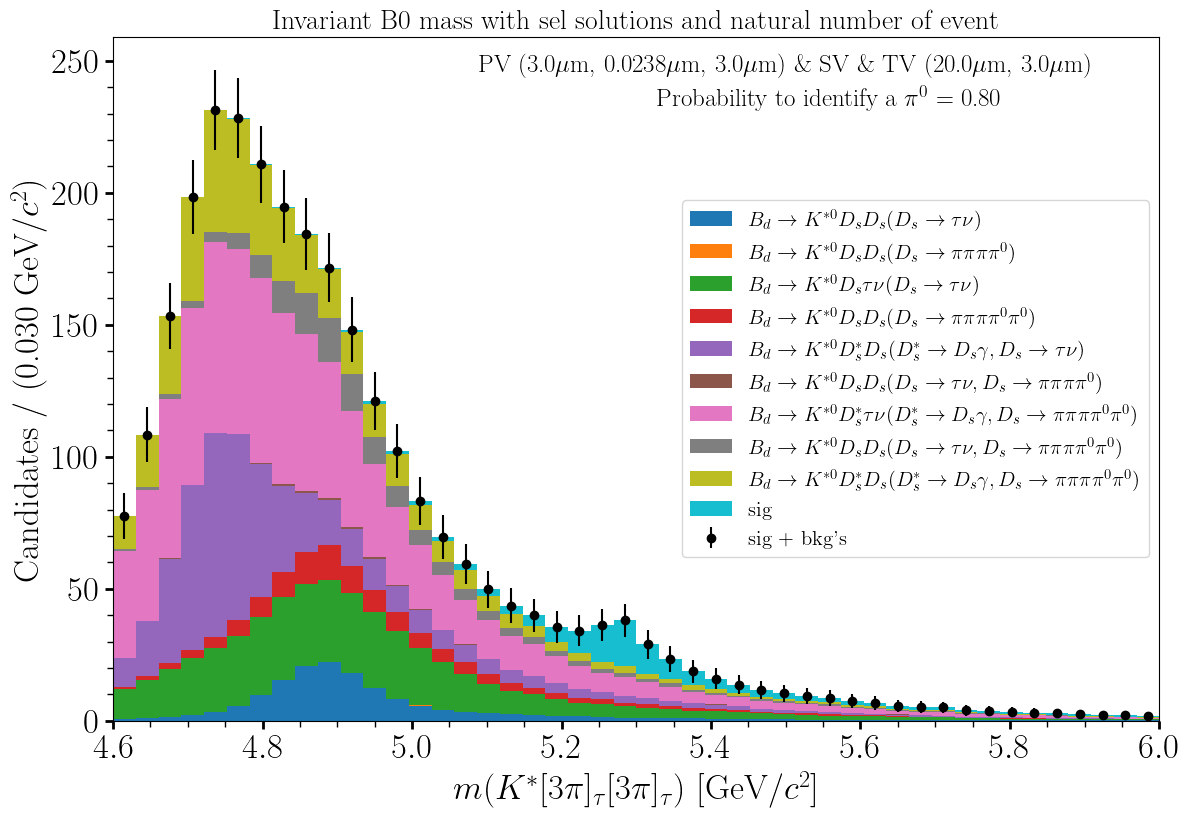

In [14]:
soltype='sel'
solsig=soltype
solbkg=soltype
low = 4.6
high = 6

data_np = np.array(data[f"sig_{smearing}"][f"{solsig}_plot_cuted1"])
data_low_cut = data_np >= low
data_high_cut = data_np <= high
data_cut = np.logical_and(data_low_cut, data_high_cut)
data_np = data_np[data_cut]


PV_smear=True
SV_smear=True
TV_smear=True
PV_scale=3e-3
SV_scale=20e-3
TV_scale=3e-3

labelTeX={"Bd2KstDsDsDs2TauNu":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2pipipipi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\pi\\pi\\pi\\pi^0)$", "Bd2KstDsTauNuDs2TauNu":"$B_d\\to K^{*0}D_s\\tau\\nu(D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2pipipipi0pi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$", "Bd2KstDsstDsDsst2DsgammaDs2Taunu":"$B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2TaunuDs2pipipipi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0)$","sig":"sig","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0":"$B_d\\to K^{*0}D_s^*\\tau\\nu(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0\\pi^0)$", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0":"$B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$"}
#fracCBL=params[frac_CB]['value']*params[frac]['value']
#fracCBR=(1-params[frac_CB]['value'])*params[frac]['value']
#fracG=(1-params[frac]['value'])

fig, ax = plt.subplots(figsize=(12,8))
n = len(data_np)
bins = 2*int(np.sqrt(n))

bins=int((6-4.6)/0.03)
bin_w = (high - low)/bins

bng=np.linspace(low,high,bins)

units = "GeV/$c^2$"
counts, bin_edges = np.histogram(data_np, bins, range=(low,high))
true_number=data[f"sig_{smearing}"][f"{solsig}_plot_cuted1_true_number"]
print('Expected number of events in window is {}'.format(true_number))
rescale=(true_number/np.sum(counts))#signal scale factor to consider a realist number of events
data[f"sig_{smearing}"][f"{solsig}_rescale"]=rescale
counts=counts*rescale
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)

probpi0k=probPI0#probability to identify a pi0 -> to study the effect of pi0 identification (it allow us to eliminate a fraction of Ds->pipipipi0 bkg)
rescale1pi0=(1-probpi0k)
rescale2pi0=(1-probpi0k)**2
#rescale4pi0=(1-probpi0k**2)**2#with eta and omega the probability for a Ds->pipipipi0pi0 to be found is equal to the one of a Ds->pipipipi0

for mode in listbkg:
    print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{solbkg}_plot_cuted1_true_number"]))
countstot=counts
errtot=err**2
for mode in listbkg:
    counst_bkg, bin_edges_bkg=np.histogram(data[f"{mode}_{smearing}"][f"{solbkg}_plot_cuted1"], bins, range=(low,high))
    data[f"{mode}_{smearing}"][f"{solbkg}_rescale"]=data[f"{mode}_{smearing}"][f"{solbkg}_plot_cuted1_true_number"]/np.sum(counst_bkg)
    counst_bkg=counst_bkg*data[f"{mode}_{smearing}"][f"{solbkg}_rescale"]
    countstot+=counst_bkg
    err_bkg=np.sqrt(counst_bkg)
    errtot+=err_bkg**2
errtot=np.sqrt(errtot)

data_hist=[]
labellist=["Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0","sig"]
weights_list=[]
for mode in labellist:
    if (mode=='sig'):
        i=solsig
    else:
        i=solbkg
    data_hist.append(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"])
    weights_list.append(np.ones(len(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"]))*data[f"{mode}_{smearing}"][f"{i}_rescale"])
#print(data_hist)
#print(weights_list)
#plt.hist(bin_edges[:-1], bin_edges, weights=counts,label='sig rr',color='blue',alpha=1)
#plt.errorbar(bin_centres, counts1, yerr=err1, fmt='o', label='sig wr')
#plt.errorbar(bin_centres, counts2, yerr=err2, fmt='o', label='sig rw')
#plt.errorbar(bin_centres, counts3, yerr=err3, fmt='o', label='sig ww')
#plt.hist(Dspipipipi0_20_3_mm, bin_edges4, alpha=1,weights=np.ones(len(Dspipipipi0_20_3_mm))*scale_Dspipipipi0*rescale*rescale2pi0,label='BK Ds2pipipipi0',color='orange')
#plt.hist(bin_edges4[:-1], bin_edges4, weights=counts4,label='BK Ds2pipipipi0',color='orange',alpha=0.75)
#plt.hist(DsTauNu_20_3_mm, bin_edges5, alpha=0.75,weights=np.ones(len(DsTauNu_20_3_mm))*scale_DsTauNu*rescale,label='BK Ds2TauNu',color='green')
#plt.hist(bin_edges5[:-1], bin_edges5, weights=counts5,label='BK Ds2TauNu',color='green',alpha=0.5)
#plt.hist(data_np, bin_edges, alpha=0.5,weights=np.ones(len(data_np))*rescale, label='sig rr',color='blue')
plt.hist(data_hist,bin_edges, stacked=True, weights=weights_list,label=list(map(labelTeX.__getitem__, labellist)))
plt.errorbar(bin_centres, countstot, yerr=errtot, fmt='o', label='sig + bkg\'s', color="black")
#plt.errorbar(bin_centres, counts, yerr=err,fmt=' ', color='blue')
#plt.errorbar(bin_centres, counts4, yerr=err4,fmt=' ', color='orange')
#plt.errorbar(bin_centres, counts5, yerr=err5, fmt=' ', color='green')

#mult=20
#x_plot = np.linspace(low, high, num=500)#num=len(Counts[0][1])*mult)
#y_plot_tot = zfit.run(pdf.pdf(x_plot, norm_range=obs))
#level_list=[]
#for i in Counts[0][1]:
#    for j in range(mult):
#        level_list.append(i)
#plt.plot(x_plot, (y_plot_tot*len(data_np)/bins*obs.area()*rescale), color='black', linewidth=1, alpha=1,label='sig fit')
ax.tick_params(axis='both', which='major', labelsize=25,width=2,length=6)
ax.tick_params(axis='both', which='minor',width=1,length=4)
plt.ylabel("Candidates / (%.3f GeV/$c^2$)" % bin_w,fontsize=25)
plt.xlabel("$m(K^* [3\pi]_\\tau [3\pi]_\\tau)$ [GeV/$c^2$]",fontsize=25)
plt.xlim(low,high)
#plt.ylim(YMIN, YMAX)#in order to keep same y window
ymin,ymax=plt.ylim() 
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax.yaxis.set_minor_locator(tick.AutoMinorLocator())
#plt.text((high-low)*0.6+low,0.9*ymax,"\\textbf{FCC-ee}",fontsize=20)
#plt.text((high-low)*0.55+low,0.74*ymax,"$Z^0 \\to b\\bar{b}$ sim.",fontsize=20)
#plt.text((high-low)*0.55+low,0.74*ymax,"$\\cdot$ $B^0 \\to K^{*0} \\tau^+ \\tau^-$ excl.",fontsize=20)
if ((PV_smear==False)&(SV_smear==False)&(TV_smear==False)):
    plt.text((high-low)*0.52+low,0.98*ymax,"TRUE DECAY VERTICES USED",fontsize=18)
if ((PV_smear==True)&(SV_smear==False)&(TV_smear==False)):
    plt.text((high-low)*0.52+low,0.98*ymax,f"PRIMARY VERTEX ({PV_scale*1000}$\mu$m) SMEARED",fontsize=18)
if ((PV_smear==False)&(SV_smear==True)&(TV_smear==False)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{SECONDARY VERTEX SMEARED}",fontsize=18)
if ((PV_smear==False)&(SV_smear==False)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{TERTIARY VERTEX SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==True)&(TV_smear==False)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{PV \& SV SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==False)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{PV \& TV SMEARED}",fontsize=18)
if ((PV_smear==False)&(SV_smear==True)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{SV \& TV SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==True)&(TV_smear==True)):
    #plt.text((high-low)*0.4+low,0.95*ymax,f"PV ({PV_scale*1000}"+"$\mu$m)"+f" \& SV \& TV ({SV_scale*1000}$\mu$m, {TV_scale*1000}$\mu$m) SMEARED",fontsize=18)
    plt.text((high-low)*0.35+low,0.95*ymax,f"PV (3.0$\mu$m, 0.0238$\mu$m, 3.0$\mu$m)"+f" \& SV \& TV ({SV_scale*1000}$\mu$m, {TV_scale*1000}$\mu$m)",fontsize=18)
#sigma_min=params[sigmaG1]['value']
#sigma_val = 1000.*sigma_min
#plt.text((high-low)*0.52+low,0.90*ymax,"Core $\\sigma = %.1f$ MeV/$c^2$" % sigma_val,fontsize=18)
#plt.text((high-low)*0.52+low,0.82*ymax,"Core gaussian fraction = %.2f" % fracG,fontsize=18)
plt.text((high-low)*0.52+low,0.90*ymax,"Probability to identify a $\\pi^0$ = %.2f " % probpi0k,fontsize=18)
plt.tight_layout()
plt.title(f"Invariant B0 mass with {soltype} solutions and natural number of event")
plt.legend(loc='right')

string_proba=str(probpi0k)

if(SAVEMOD=="yes"):
    plt.savefig(f'new_vertexing_final_plots/rr_--_20_3_{string_proba}.pdf');

Same plot + fit with ROOT 

PV_smear=True
SV_smear=True
TV_smear=True
PV_scale=3e-3
SV_scale=20e-3
TV_scale=3e-3

low = 4.6
high = 6

bins=int((6-4.6)/0.03)
bin_w = (high - low)/bins

sig_hist=ROOT.TH1D("sig mass", "sig mass", bins, 4.6, 6.0)
for i in data[f"sig_{smearing}"][f"sel_plot_cuted1"]:
    sig_hist.Fill(i, data[f"sig_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"sig_{smearing}"][f"sel_plot_cuted1"]))
sig_hist.SetFillColor(906)

Bd2KstDsDsDs2TauNu_hist=ROOT.TH1D("Bd2KstDsDsDs2TauNu mass", "Bd2KstDsDsDs2TauNu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsDsDs2TauNu_hist.Fill(i, data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsDsDs2TauNu_hist.SetFillColor(600)

Bd2KstDsDsDs2pipipipi0_hist=ROOT.TH1D("Bd2KstDsDsDs2pipipipi0 mass", "Bd2KstDsDsDs2pipipipi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsDsDs2pipipipi0_hist.Fill(i, data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsDsDs2pipipipi0_hist.SetFillColor(800)

Bd2KstDsTauNuDs2TauNu_hist=ROOT.TH1D("Bd2KstDsTauNuDs2TauNu mass", "Bd2KstDsTauNuDs2TauNu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsTauNuDs2TauNu_hist.Fill(i, data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsTauNuDs2TauNu_hist.SetFillColor(416)

Bd2KstDsDsDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsDsDs2pipipipi0pi0 mass", "Bd2KstDsDsDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsDsDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsDsDs2pipipipi0pi0_hist.SetFillColor(632)

Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist=ROOT.TH1D("Bd2KstDsstDsDsst2DsgammaDs2Taunu mass", "Bd2KstDsstDsDsst2DsgammaDs2Taunu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist.Fill(i, data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist.SetFillColor(881)

Bd2KstDsDsDs2TaunuDs2pipipipi0_hist=ROOT.TH1D("Bd2KstDsDsDs2TaunuDs2pipipipi0 mass", "Bd2KstDsDsDs2TaunuDs2pipipipi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsDsDs2TaunuDs2pipipipi0_hist.Fill(i, data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsDsDs2TaunuDs2pipipipi0_hist.SetFillColor(804)

Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 mass", "Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist.SetFillColor(432)

Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 mass", "Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist.SetFillColor(406)

Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist=ROOT.TH1D("Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 mass", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_cuted1"]:
    Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist.Fill(i, data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_cuted1"]))
Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist.SetFillColor(422)

stack_hist=ROOT.THStack("stack histo", f"Invariant B0 mass after first stage selection")
stack_hist.Add(Bd2KstDsDsDs2TauNu_hist)
stack_hist.Add(Bd2KstDsDsDs2pipipipi0_hist)
stack_hist.Add(Bd2KstDsTauNuDs2TauNu_hist)
stack_hist.Add(Bd2KstDsDsDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist)
stack_hist.Add(Bd2KstDsDsDs2TaunuDs2pipipipi0_hist)
stack_hist.Add(Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist)
stack_hist.Add(sig_hist)
legend=ROOT.TLegend(0.4,0.3,0.89,0.8)
legend.AddEntry(sig_hist,"sig","f")
legend.AddEntry(Bd2KstDsDsDs2TaunuDs2pipipipi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to\\tau\\nu/\pi\pi\pi\pi^{0})","f")
legend.AddEntry(Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist,"B_{d}\\to K^{*0} D_{s}^{*} D_{s} (D_{s}^{*}\\to D_{s}\\gamma, D_{s}\\to\\tau\\nu)","f")
legend.AddEntry(Bd2KstDsDsDs2pipipipi0pi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\pi\\pi\\pi\\pi^{0}\\pi^{0})","f")
legend.AddEntry(Bd2KstDsTauNuDs2TauNu_hist,"B_{d}\\to K^{*0} D_{s} \\tau\\nu (D_{s}\\to \\tau\\nu)","f")
legend.AddEntry(Bd2KstDsDsDs2pipipipi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\pi\\pi\\pi\\pi^{0})","f")
legend.AddEntry(Bd2KstDsDsDs2TauNu_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\tau\\nu)","f")
legend.AddEntry(Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist,"B_d\\to K^{*0}D_s^*\\tau\\nu(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.AddEntry(Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist,"B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.AddEntry(Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist,"B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.SetFillStyle(0)
ttext=ROOT.TPaveText(0.3,0.8,0.89,0.89,"NDC")
ttext.SetTextSize(0.04)
ttext.AddText(f"PV ({PV_scale*1000}"+"\\mu m)"+f" \\& SV \\& TV ({SV_scale*1000}\mu m, {TV_scale*1000}\\mu m) SMEARED")
ttext.AddText("Probability\tto\tidentify\ta\t\\pi^0"+f"={probPI0}")
ttext.SetFillColor(0)
ttext.SetBorderSize(0)
c1=ROOT.TCanvas()
stack_hist.Draw("HIST")
xaxis=stack_hist.GetXaxis()
xaxis.SetTitle("m(K^{*} [3\\pi]_\\tau [3\\pi]_\\tau) [GeV/c^{2}]")
yaxis=stack_hist.GetYaxis()
yaxis.SetTitle(f"Candidates / ({bin_w:.2f}"+ "GeV/c^{2})")
legend.Draw()
ttext.Draw()
c1.Draw()


for mode in listmod:
    print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"sel_plot_cuted1_true_number"]))

Signal fit by making RooDataSet

mass_high=6.
mass_low=5.
mass = ROOT.RooRealVar("mass", "mass", mass_low, mass_high)
bins=int((mass_high-mass_low)/0.03)
npsigmass=np.array(data[f"sig_{smearing}"][f"sel_plot_cuted1"])

signal_mass = ROOT.RooDataSet.from_numpy(data={"mass": npsigmass}, variables=[mass])
#np.savetxt('data1.txt',X=npsigmass)
low = 4.6
high = 6

rand+=1

#signal fit
#crystal ball parameters
mu=ROOT.RooRealVar(f"mu_{rand}", f"mu_{rand}", lp.B_0.mass/1000., low, high)
sigma = ROOT.RooRealVar(f"sigma_{rand}", f"sigma_{rand}", 0.5, 0., 1.)
alphaR = ROOT.RooRealVar(f"alphaR_{rand}", f"alphaR_{rand}", 1., 0., 5.)
nR = ROOT.RooRealVar(f"nR_{rand}", f"nR_{rand}", 10., 0., 200.)
alphaL = ROOT.RooRealVar(f"alphaL_{rand}", f"alphaL_{rand}", 1., 0., 5.)
nL = ROOT.RooRealVar(f"nL_{rand}", f"nL_{rand}", 10., 0., 200.)
# Core gaussian parameters
sigmaG1 = ROOT.RooRealVar(f"sigmaG1_{rand}", f"sigmaG1_{rand}", 0.02, 0., 1)
# Fractions
frac = ROOT.RooRealVar(f"frac_{rand}", f"frac_{rand}", 0.5, 0., 1.)

#signal model
CB = ROOT.RooCrystalBall(f"CB_{rand}",f"CB_{rand}",x=mass,x0=mu,sigmaLR=sigma,alphaR=alphaR, nR=nR,alphaL=alphaL, nL=nL )
Gau = ROOT.RooGaussian(f"gau_{rand}",f"gau_{rand}",_x=mass,_mean=mu,_sigma=sigmaG1)
sig_fit= ROOT.RooAddPdf( f"sig_fit_{rand}",f"sig_fit_{rand}",CB, Gau,frac)
minimiz=ROOT.RooFit.Minimizer("Minuit2","migrad")
sig_fit.fitTo(signal_mass,minimiz)#,ROOT.RooFit.Extended(),ROOT.RooFit.NumCPU(7))
c22=ROOT.TCanvas()
Mframe = mass.frame(bins)
signal_mass.plotOn(Mframe)
sig_fit.plotOn(Mframe)
Mframe.Draw()
c22.Draw('mass')

Signal + bkg fit via RooDataSet

weight = ROOT.RooRealVar("weight", "weight", 0., 100000.)

npsigbkgmass=np.array([])
npsigbkgweight=np.array([])
npbkgmass=np.array([])#array to determine number of bkg on fit window
for sigbkgmode in ["sig","Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0"]:
    if (sigbkgmode!="sig"):
        npbkgmass=np.concatenate((npbkgmass,np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted1"])),axis=None)
    npsigbkgmass=np.concatenate((npsigbkgmass,np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted1"])),axis=None)
    npsigbkgweight=np.concatenate((npsigbkgweight,(np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted1"])*0+data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted1_true_number"]/len(data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted1"]))),axis=None)
sigbkg_mass = ROOT.RooDataSet.from_numpy(data={"mass": npsigbkgmass, "weight": npsigbkgweight}, variables=[mass, weight], weight_name="weight")

#fix signal model parameters
mu.setConstant()
sigma.setConstant()
alphaR.setConstant()
nR.setConstant()
alphaL.setConstant()
nL.setConstant()
sigmaG1.setConstant()
frac.setConstant()
#background model
c_exp1=ROOT.RooRealVar(f"c_exp1_{rand}", f"c_exp1_{rand}", -1., -10., 0.)
c_exp2=ROOT.RooRealVar(f"c_exp2_{rand}", f"c_exp2_{rand}", -1., -10., 0.)
frac_expo=ROOT.RooRealVar(f"frac_expo_{rand}", f"frac_expo_{rand}", 0.5, 0., 1.)
expo1=ROOT.RooExponential(f"expo1_{rand}",f"expo1_{rand}",_x=mass,_c=c_exp1)
expo2=ROOT.RooExponential(f"expo2_{rand}",f"expo2_{rand}",_x=mass,_c=c_exp2)
bkg_fit=ROOT.RooAddPdf( f"bkg_fit_{rand}",f"bkg_fit_{rand}",expo1, expo2,frac_expo)
#yield
nsig0=data[f"sig_{smearing}"][f"sel_plot_cuted1_true_number"]
nbkg0=data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_cuted1_true_number"]+data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_cuted1_true_number"]+data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_cuted1_true_number"]+data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1_true_number"]+data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_cuted1_true_number"]+data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_cuted1_true_number"]+data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1_true_number"]+data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted1_true_number"]+data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_cuted1_true_number"]
nsig=ROOT.RooRealVar(f"nSig_{rand}",f"nSig_{rand}",nsig0,0.,10000.)
nbkg=ROOT.RooRealVar(f"nBkg_{rand}",f"nBkg_{rand}",nbkg0,0,1000000.)
#total model
sigbkg_fit=ROOT.RooAddPdf("sigbkg_fit","sigbkg_fit",ROOT.RooArgList(sig_fit,bkg_fit),ROOT.RooArgList(nsig,nbkg))

#mass.setRange('fitrange',5.0,6.0)
minimiz=ROOT.RooFit.Minimizer("Minuit2","migrad")
sigbkg_fit.fitTo(sigbkg_mass,minimiz)#Range=('fitrange')

#plot_cuted1_sig=ROOT.RooExtendPdf(f'sig_plot_cuted1_{rand}', f'sig_plot_cuted1_{rand}', sig_fit, nsig)
#plot_cuted1_bkg=ROOT.RooExtendPdf(f'bkg_plot_cuted1_{rand}', f'bkg_plot_cuted1_{rand}', bkg_fit, nbkg)
c222=ROOT.TCanvas()
Mframe = mass.frame(bins)
sigbkg_mass.plotOn(Mframe)
sigbkg_fit.plotOn(Mframe)
sigbkg_fit.plotOn(Mframe, LineColor='r',Components=ROOT.RooArgSet(sig_fit))
sigbkg_fit.plotOn(Mframe, LineColor='m',Components=ROOT.RooArgSet(bkg_fit))
Mframe.Draw()
c222.Draw('mass')

prop_sig_fit_window=len(npsigmass[(npsigmass>mass_low)&(npsigmass<mass_high)])/len(npsigmass)
prop_bkg_fit_window=len(npbkgmass[(npbkgmass>mass_low)&(npbkgmass<mass_high)])/len(npbkgmass)
nbsig_expected=0
for mode in ["sig"]:
    nbsig_expected+=data[f"{mode}_{smearing}"][f"sel_plot_cuted1_true_number"]*(len(data[f"{mode}_{smearing}"][f"sel_plot_cuted1"][(data[f"{mode}_{smearing}"][f"sel_plot_cuted1"]>mass_low)*(data[f"{mode}_{smearing}"][f"sel_plot_cuted1"]<mass_high)])/len(data[f"{mode}_{smearing}"][f"sel_plot_cuted1"]))
print(nbsig_expected)
nbbkg_expected=0
for mode in listbkg:
    print(mode)
    nbbkg_expected+=data[f"{mode}_{smearing}"][f"sel_plot_cuted1_true_number"]*(len(data[f"{mode}_{smearing}"][f"sel_plot_cuted1"][(data[f"{mode}_{smearing}"][f"sel_plot_cuted1"]>mass_low)*(data[f"{mode}_{smearing}"][f"sel_plot_cuted1"]<mass_high)])/len(data[f"{mode}_{smearing}"][f"sel_plot_cuted1"]))
    print("ok")
print(nbbkg_expected)
print(prop_sig_fit_window)
print(prop_bkg_fit_window)
print(nsig0*prop_sig_fit_window)
print(nsig)
print(nbkg0*prop_bkg_fit_window)
print(nbkg)

print(nsig0*prop_sig_fit_window+nbkg0*prop_bkg_fit_window)
print(nsig.getVal()+nbkg.getVal())
print(nbsig_expected+nbbkg_expected)

Make signal and bkgs toy from the model:

nb_sig_fit_window=int(np.round(nbsig_expected))
nb_bkg_fit_window=int(np.round(nbbkg_expected))

print(nb_sig_fit_window, nb_bkg_fit_window)


signal_mass_toy = sig_fit.generate(mass,nb_sig_fit_window)
ROOT.SetOwnership(signal_mass_toy, True) # because generate returns an owning pointer
sigbkg_mass_toy = bkg_fit.generate(mass,nb_bkg_fit_window)
ROOT.SetOwnership(sigbkg_mass_toy, True) # because generate returns an owning pointer

sigbkg_mass_toy.append(signal_mass_toy)

Refit signal + bkg:

rand+=1
#signal fit
#crystal ball parameters
mu_toy=ROOT.RooRealVar(f"mu_toy_{rand}", f"mu_toy_{rand}", mu.getVal(), low, high)
sigma_toy = ROOT.RooRealVar(f"sigma_toy_{rand}", f"sigma_toy_{rand}", sigma.getVal(), 0., 2.)
alphaR_toy = ROOT.RooRealVar(f"alphaR_toy_{rand}", f"alphaR_toy_{rand}", alphaR.getVal(), 0., 5.)
nR_toy = ROOT.RooRealVar(f"nR_toy_{rand}", f"nR_toy_{rand}", nR.getVal(), 0., 200.)
alphaL_toy = ROOT.RooRealVar(f"alphaL_toy_{rand}", f"alphaL_toy_{rand}", alphaL.getVal(), 0., 5.)
nL_toy = ROOT.RooRealVar(f"nL_toy_{rand}", f"nL_toy_{rand}", nL.getVal(), 0., 200.)
# Core gaussian parameters
sigmaG1_toy = ROOT.RooRealVar(f"sigmaG1_toy_{rand}", f"sigmaG1_toy_{rand}", sigmaG1.getVal(), 0., 1)
# Fractions
frac_toy = ROOT.RooRealVar(f"frac_toy_{rand}", f"frac_toy_{rand}", frac.getVal(), 0., 1.)
#signal model
CB_toy = ROOT.RooCrystalBall(f"CB_toy_{rand}",f"CB_toy_{rand}",x=mass,x0=mu_toy,sigmaLR=sigma_toy,alphaR=alphaR_toy, nR=nR_toy,alphaL=alphaL_toy, nL=nL_toy )
Gau_toy = ROOT.RooGaussian(f"gau_toy_{rand}",f"gau_toy_{rand}",_x=mass,_mean=mu_toy,_sigma=sigmaG1_toy)
sig_fit_toy= ROOT.RooAddPdf( f"sig_fit_toy_{rand}",f"sig_fit_toy_{rand}",CB_toy, Gau_toy,frac_toy)
#background model
c_exp1_toy=ROOT.RooRealVar(f"c_exp1_toy_{rand}", f"c_exp1_toy_{rand}", c_exp1.getVal(), -10., 0.)#-7.63421
#c_exp1.setConstant()
c_exp2_toy=ROOT.RooRealVar(f"c_exp2_toy_{rand}", f"c_exp2_toy_{rand}", c_exp2.getVal(), -10., 0.)
frac_expo_toy=ROOT.RooRealVar(f"frac_expo_toy_{rand}", f"frac_expo_toy_{rand}", frac_expo.getVal(), 0., 1.)
expo1_toy=ROOT.RooExponential(f"expo1_toy_{rand}",f"expo1_toy_{rand}",_x=mass,_c=c_exp1_toy)
expo2_toy=ROOT.RooExponential(f"expo2_toy_{rand}",f"expo2_toy_{rand}",_x=mass,_c=c_exp2_toy)
bkg_fit_toy=ROOT.RooAddPdf( f"bkg_fit_{rand}",f"bkg_fit_{rand}",expo1_toy, expo2_toy,frac_expo_toy)
#yield
nsig_toy=ROOT.RooRealVar(f"nSig_toy_{rand}",f"nSig_toy_{rand}",nsig0,0.,10000.)
nbkg_toy=ROOT.RooRealVar(f"nBkg_toy_{rand}",f"nBkg_toy_{rand}",nbkg0,0,1000000.)
#total model
sigbkg_fit_toy=ROOT.RooAddPdf("sigbkg_fit","sigbkg_fit",ROOT.RooArgList(sig_fit_toy,bkg_fit_toy),ROOT.RooArgList(nsig_toy,nbkg_toy))

mu_toy.setConstant()
sigma_toy.setConstant()
alphaR_toy.setConstant()
nR_toy.setConstant()
alphaL_toy.setConstant()
nL_toy.setConstant()
sigmaG1_toy.setConstant()
frac_toy.setConstant()
c_exp1_toy.setConstant()
c_exp2_toy.setConstant()
frac_expo_toy.setConstant()


c_exp1_toy.setConstant(False)
c_exp2_toy.setConstant(False)
frac_expo_toy.setConstant(False)
#mu_toy.setConstant(False)
sigma_toy.setConstant(False)



"""#total model
sigbkg_fit_toy=ROOT.RooAddPdf("sigbkg_fit_toy","sigbkg_fit_toy",ROOT.RooArgList(sig_fit,bkg_fit),ROOT.RooArgList(nsig,nbkg))"""

#mass.setRange('fitrange',5.0,6.0)

sigbkg_fit_toy.fitTo(sigbkg_mass_toy)#Range=('fitrange')

#plot_sig=ROOT.RooExtendPdf(f'sig_plot_{rand}', f'sig_plot_{rand}', sig_fit, nsig)
#plot_bkg=ROOT.RooExtendPdf(f'bkg_plot_{rand}', f'bkg_plot_{rand}', bkg_fit, nbkg)
c222=ROOT.TCanvas()
Mframe = mass.frame(bins)
sigbkg_mass_toy.plotOn(Mframe)
sigbkg_fit_toy.plotOn(Mframe)
sigbkg_fit_toy.plotOn(Mframe, LineColor='r',Components=ROOT.RooArgSet(sig_fit_toy))
sigbkg_fit_toy.plotOn(Mframe, LineColor='m',Components=ROOT.RooArgSet(bkg_fit_toy))
Mframe.Draw()
c222.Draw('mass')

print(nbsig_expected)
print(nsig_toy)
print(nbbkg_expected)
print(nbkg_toy)
print(np.round(nbsig_expected)+np.round(nbbkg_expected))
print(nsig_toy.getVal()+nbkg_toy.getVal())

In [114]:
for i in listsol:
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
            #print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]))
        significance=data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signi)
        data[f"sig_{smearing}"][f"{i}_base_signi_cuted1"]=significance
        print('Base significance on cut window for {} smearing and {} sol: {}'.format(smearname,i,significance))
        
for i in listsol:
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
            #print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{i}_cut_study_true_number"]))
        significancenopi0=data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signinopi0)
        data[f"sig_{smearing}"][f"{i}_base_signi_cuted1_no_pi0"]=significancenopi0
        print('Base significance without pi0 bkgs on cut window for {} smearing and {} sol: {}'.format(smearname,i,significancenopi0))

Base significance on cut window for 20-3 smearing and sel sol: 4.00572344167277
Base significance without pi0 bkgs on cut window for 20-3 smearing and sel sol: 5.605370505616063


/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/2159197603.py:90: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/2159197603.py:108: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signinopi0)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/2159197603.py:129: RuntimeWarning: invalid value encountered in divide
  significance=(cutinfeffsig*cutsupeffsig)*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signi)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/fo

4.449144226394717
Optimal cut : [6.0606060606060606,23.232323232323235]
5.919635396772663
Optimal cut : [5.555555555555556,23.73737373737374]
Base signi : 4.00572344167277
Base signi without pi0 bkgs : 5.605370505616063


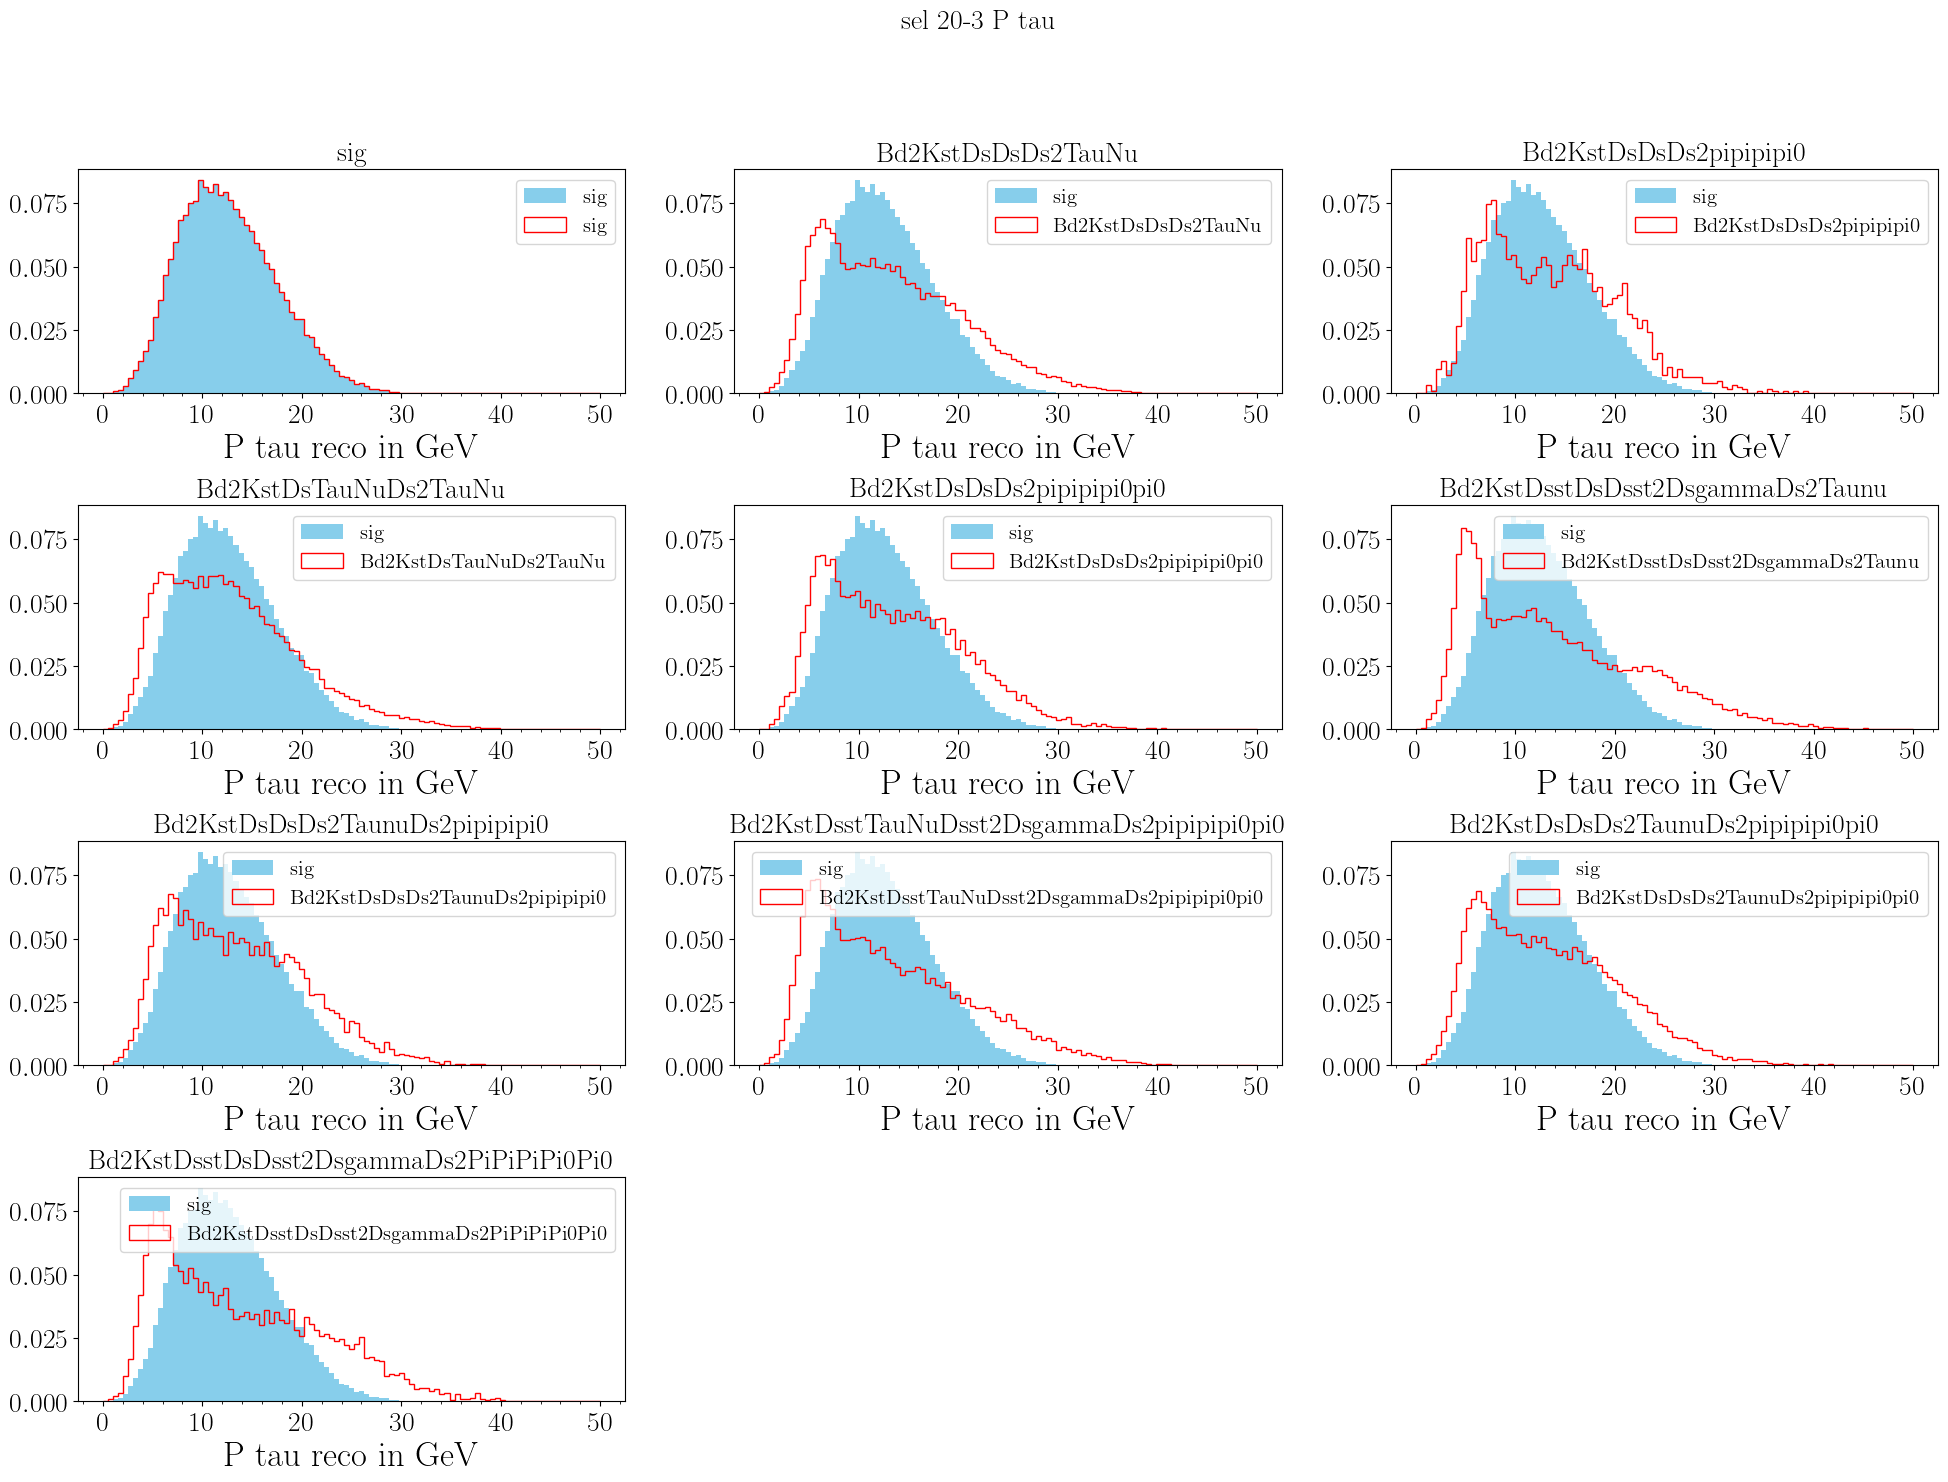

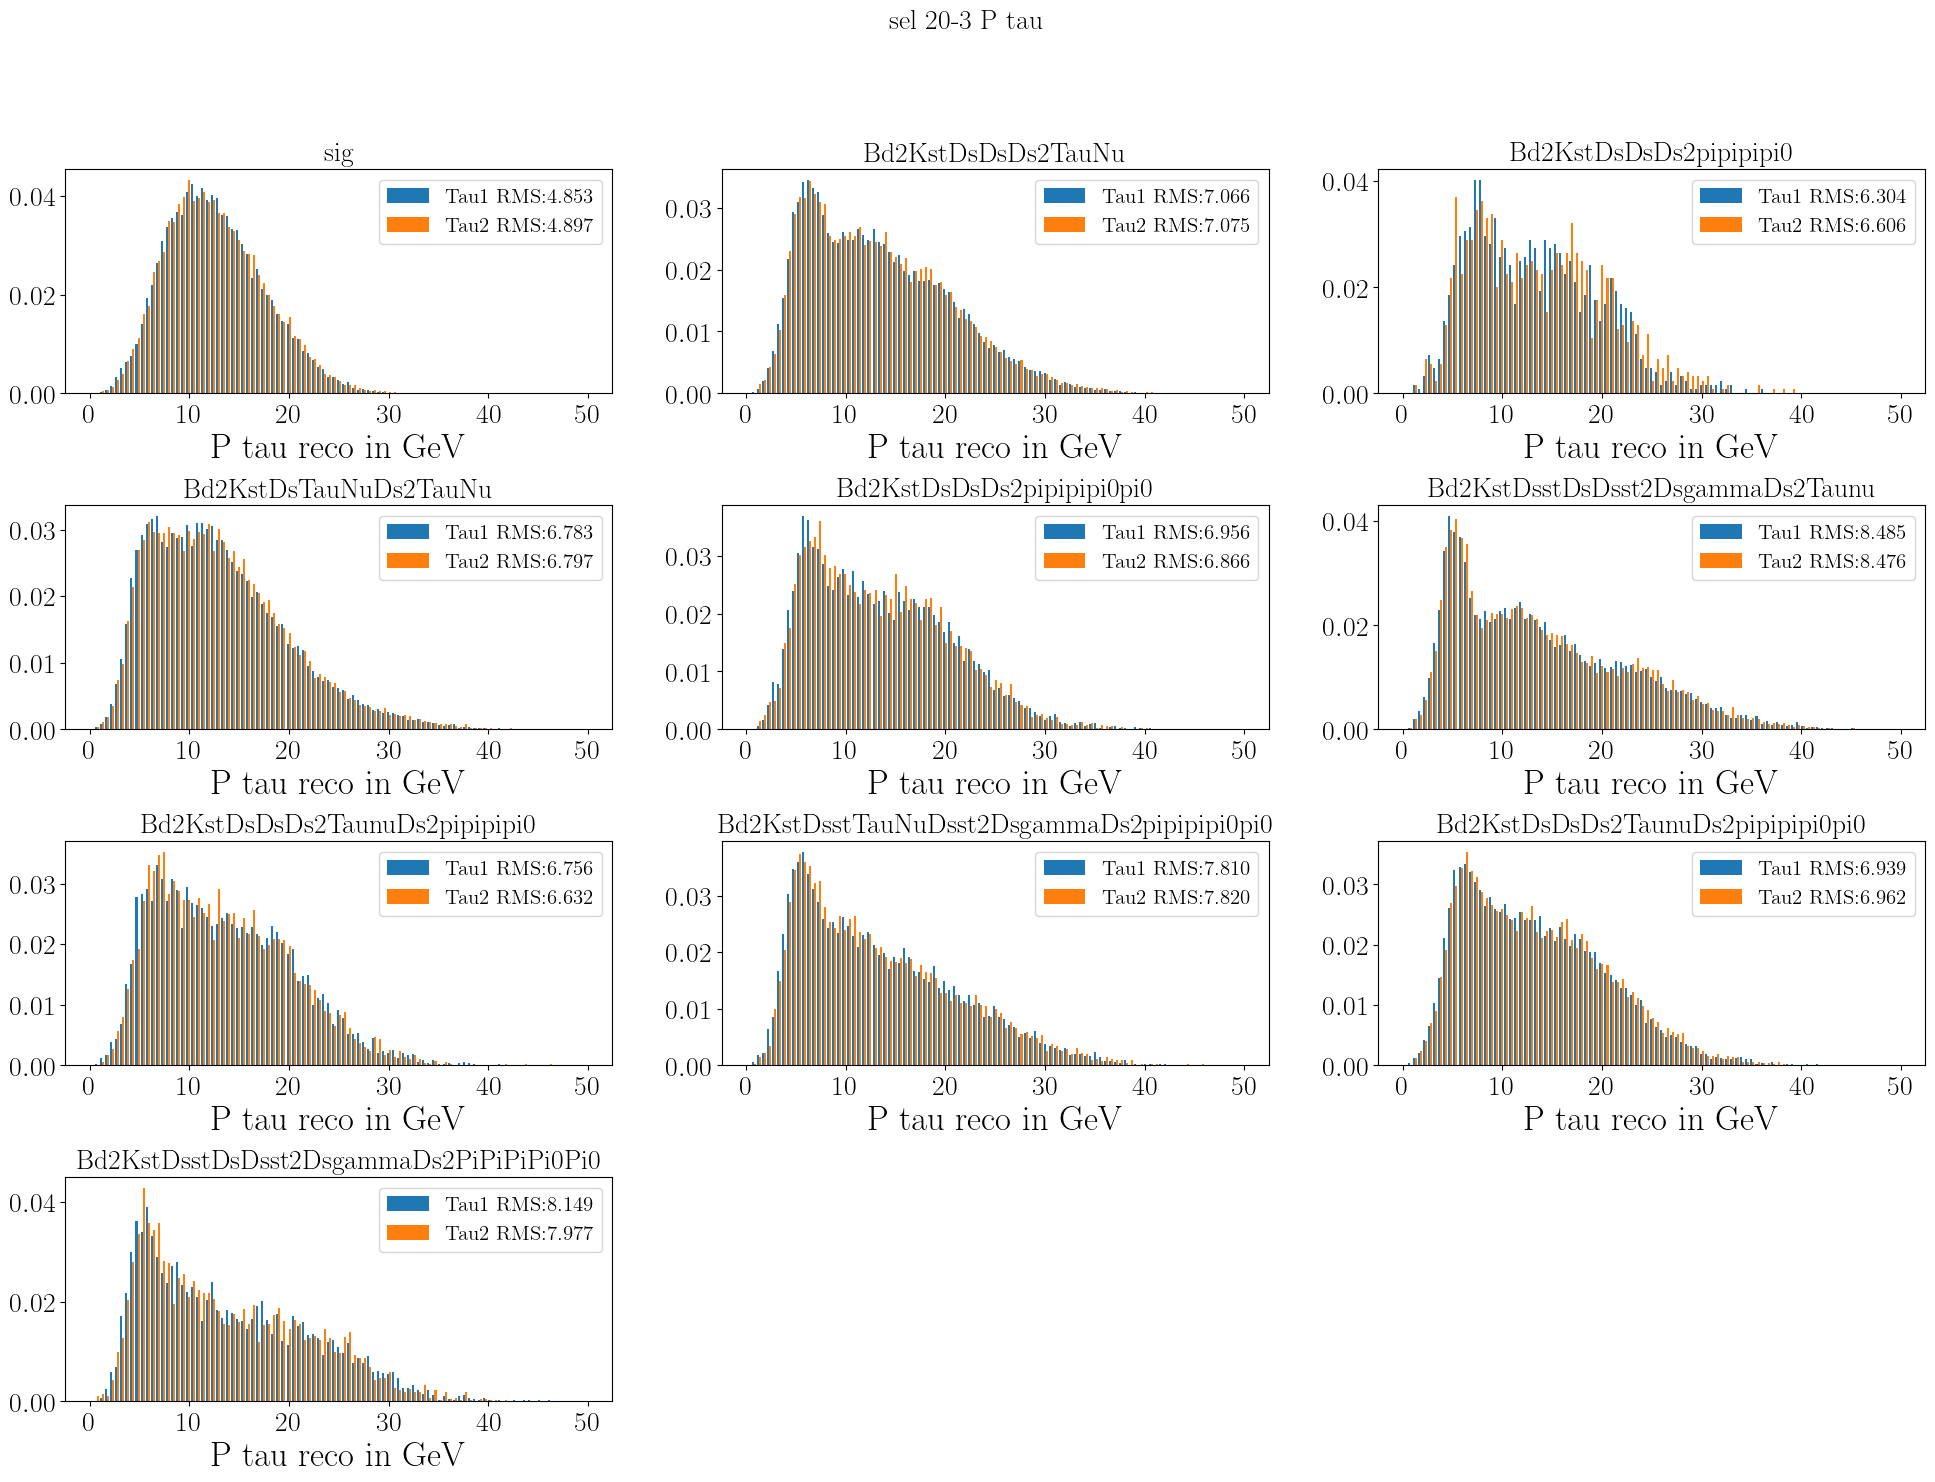

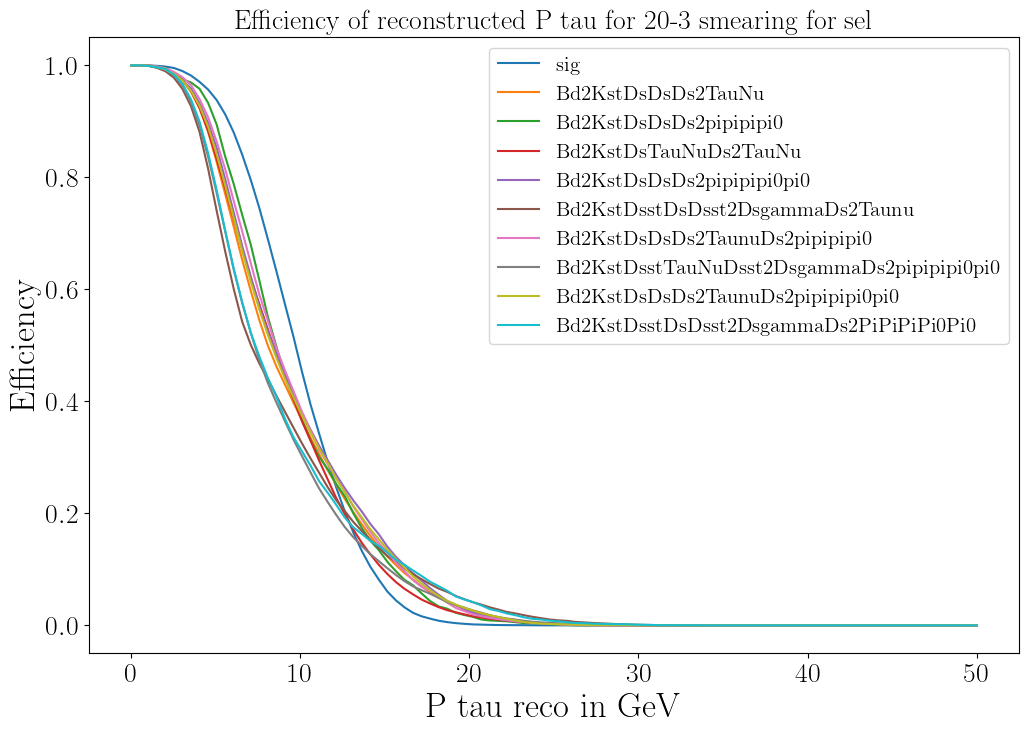

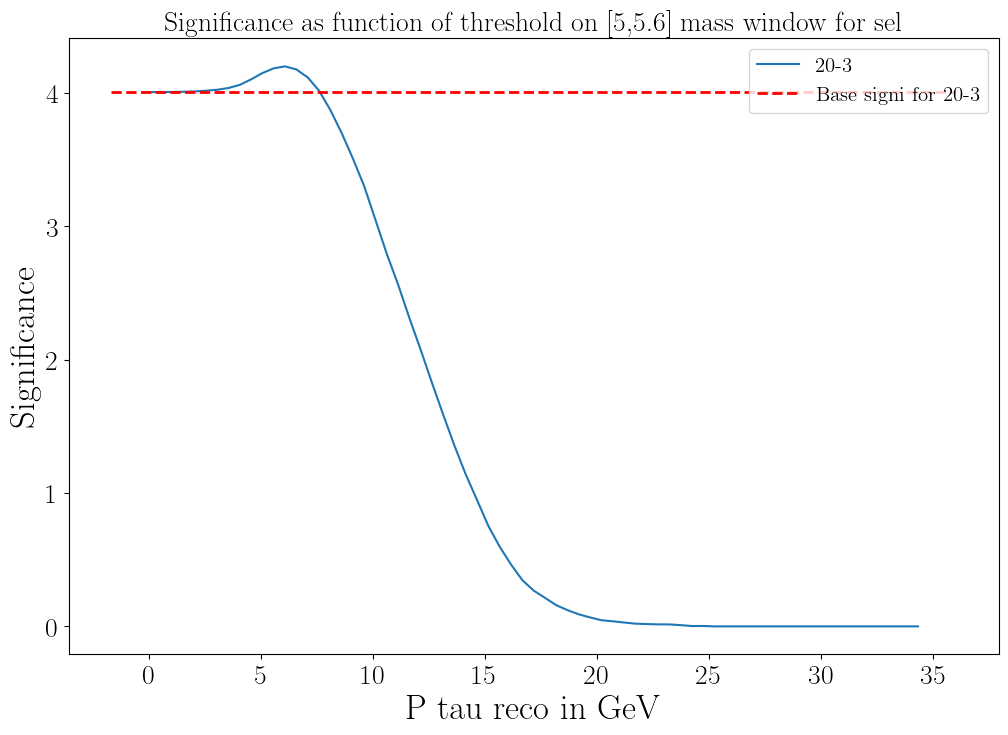

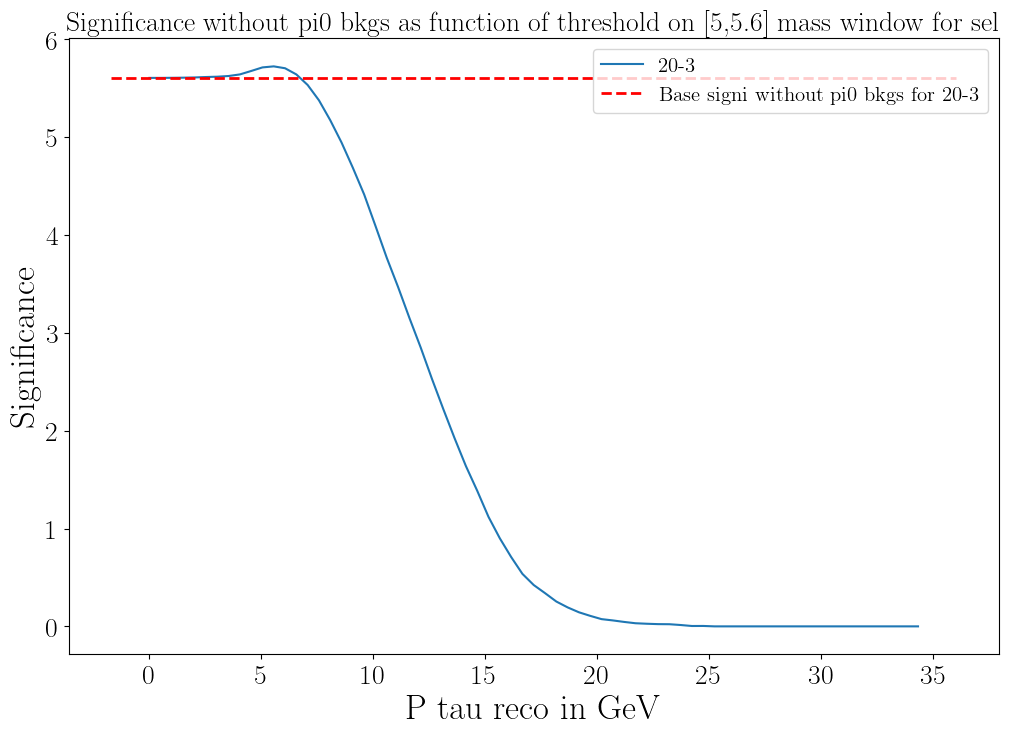

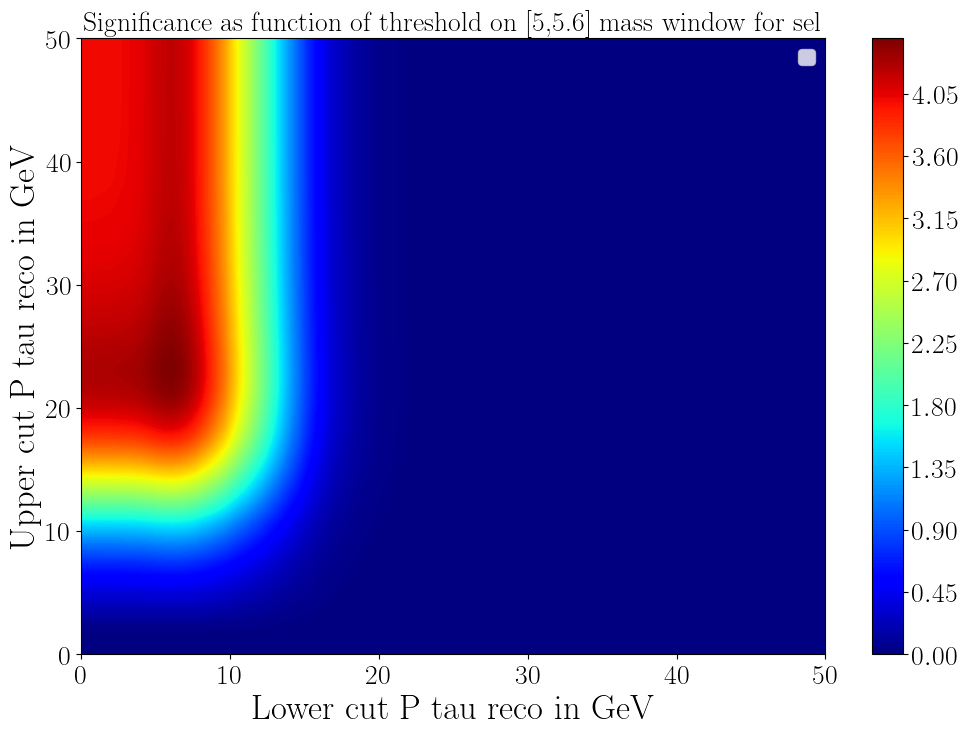

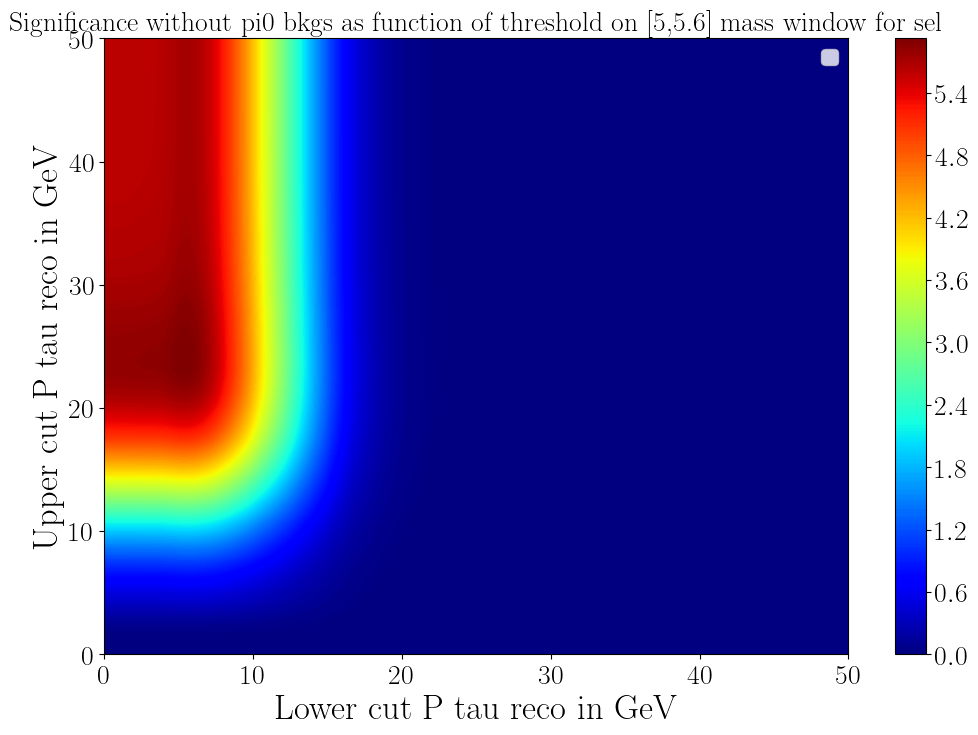

In [115]:
var=f"P_tau"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,50,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_{var}_{tau}"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')


for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"],data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_P_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights_cuted1"],data[f"sig_{smearing}"][f"{i}_weights_cuted1"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_2"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"],data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('P tau reco in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_2"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_2"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"],data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('P tau reco in GeV')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"]>T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_2"]>T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"]))

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut_sup"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_1"]<T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_P_tau_2"]<T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"][data[f"{mode}_{smearing}"][f"{i}_cut_sup"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"]))

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of reconstructed {varname} for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('P tau reco in GeV')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_cuted1"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('P tau reco in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_cuted1_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('P tau reco in GeV')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    cutinf, cutsup=np.meshgrid(Tlist,Tlist)
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=cutinf*0
        for mode in listmod:
            cutinfeff,cutsupeff=np.meshgrid(data[f"{mode}_{smearing}"][f"{i}_eff_cut"], data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"])
            if (mode=="sig"):
                cutinfeffsig,cutsupeffsig=np.meshgrid(data[f"{mode}_{smearing}"][f"{i}_eff_cut"], data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"])
            denom_signi+=(cutinfeff*cutsupeff)*data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
        significance=(cutinfeffsig*cutsupeffsig)*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signi)
        significance=significance*((cutinfeffsig*cutsupeffsig)>0)#to highlight point which keep at least 0.x sig
        significance[np.isnan(significance)==True]=0.0
        plt.contourf(cutinf, cutsup, significance,500,cmap='jet')
        plt.colorbar()
        indices_max=np.unravel_index(np.argmax(significance), np.shape(significance))
        print(np.max(significance))
        print(f"Optimal cut : [{Tlist[indices_max[1]]},{Tlist[indices_max[0]]}]")
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Lower cut P tau reco in GeV')
    plt.ylabel('Upper cut P tau reco in GeV')
    plt.legend();
    
for i in listsol:
    cutinf, cutsup=np.meshgrid(Tlist,Tlist)
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=cutinf*0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                cutinfeff,cutsupeff=np.meshgrid(data[f"{mode}_{smearing}"][f"{i}_eff_cut"], data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"])
                if (mode=="sig"):
                    cutinfeffsig,cutsupeffsig=np.meshgrid(data[f"{mode}_{smearing}"][f"{i}_eff_cut"], data[f"{mode}_{smearing}"][f"{i}_eff_cut_sup"])
                denom_signinopi0+=(cutinfeff*cutsupeff)*data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
        significancenopi0=(cutinfeffsig*cutsupeffsig)*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signinopi0)
        significancenopi0[np.isnan(significancenopi0)==True]=0.0
        significancenopi0=significancenopi0*((cutinfeffsig*cutsupeffsig)>0)#to highlight point which keep at least 0.x sig
        plt.contourf(cutinf, cutsup, significancenopi0,500, cmap='jet')
        plt.colorbar()
        indices_max=np.unravel_index(np.argmax(significancenopi0), np.shape(significancenopi0))
        print(np.max(significancenopi0))
        print(f"Optimal cut : [{Tlist[indices_max[1]]},{Tlist[indices_max[0]]}]")
        #print(np.unravel_index(np.argmax(significancenopi0)), np.shape(significancenopi0))
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Lower cut P tau reco in GeV')
    plt.ylabel('Upper cut P tau reco in GeV')
    plt.legend();

print('Base signi : {}'.format(data[f"sig_{smearing}"][f"{i}_base_signi_cuted1"]))
print('Base signi without pi0 bkgs : {}'.format(data[f"sig_{smearing}"][f"{i}_base_signi_cuted1_no_pi0"]))

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/620642996.py:81: RuntimeWarning: invalid value encountered in divide
  significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signi)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_20751/620642996.py:99: RuntimeWarning: invalid value encountered in divide
  significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signinopi0)


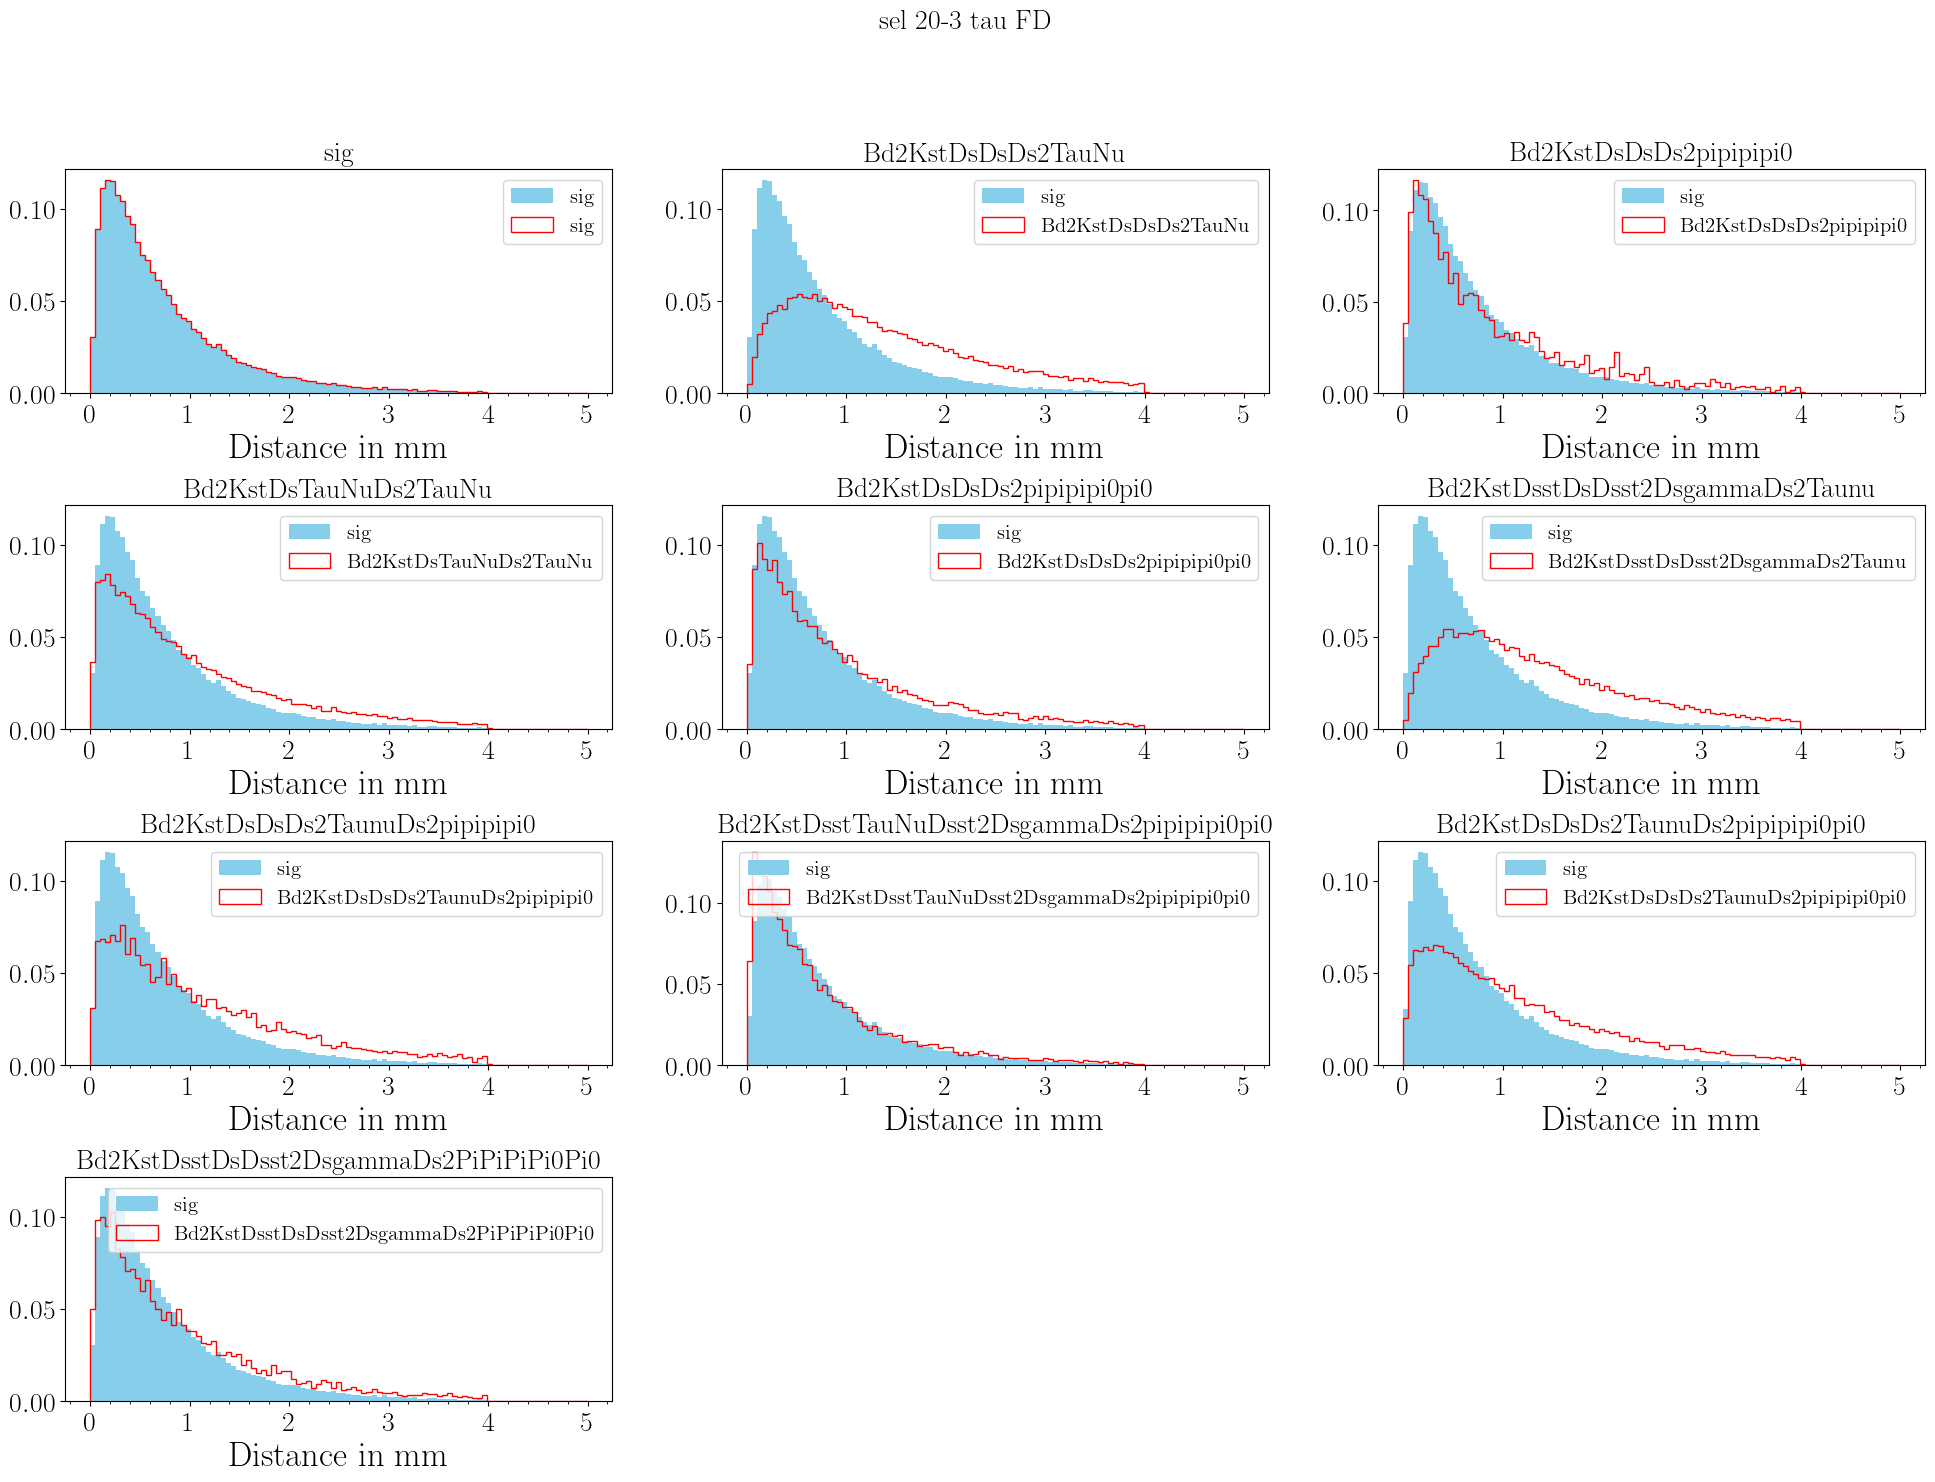

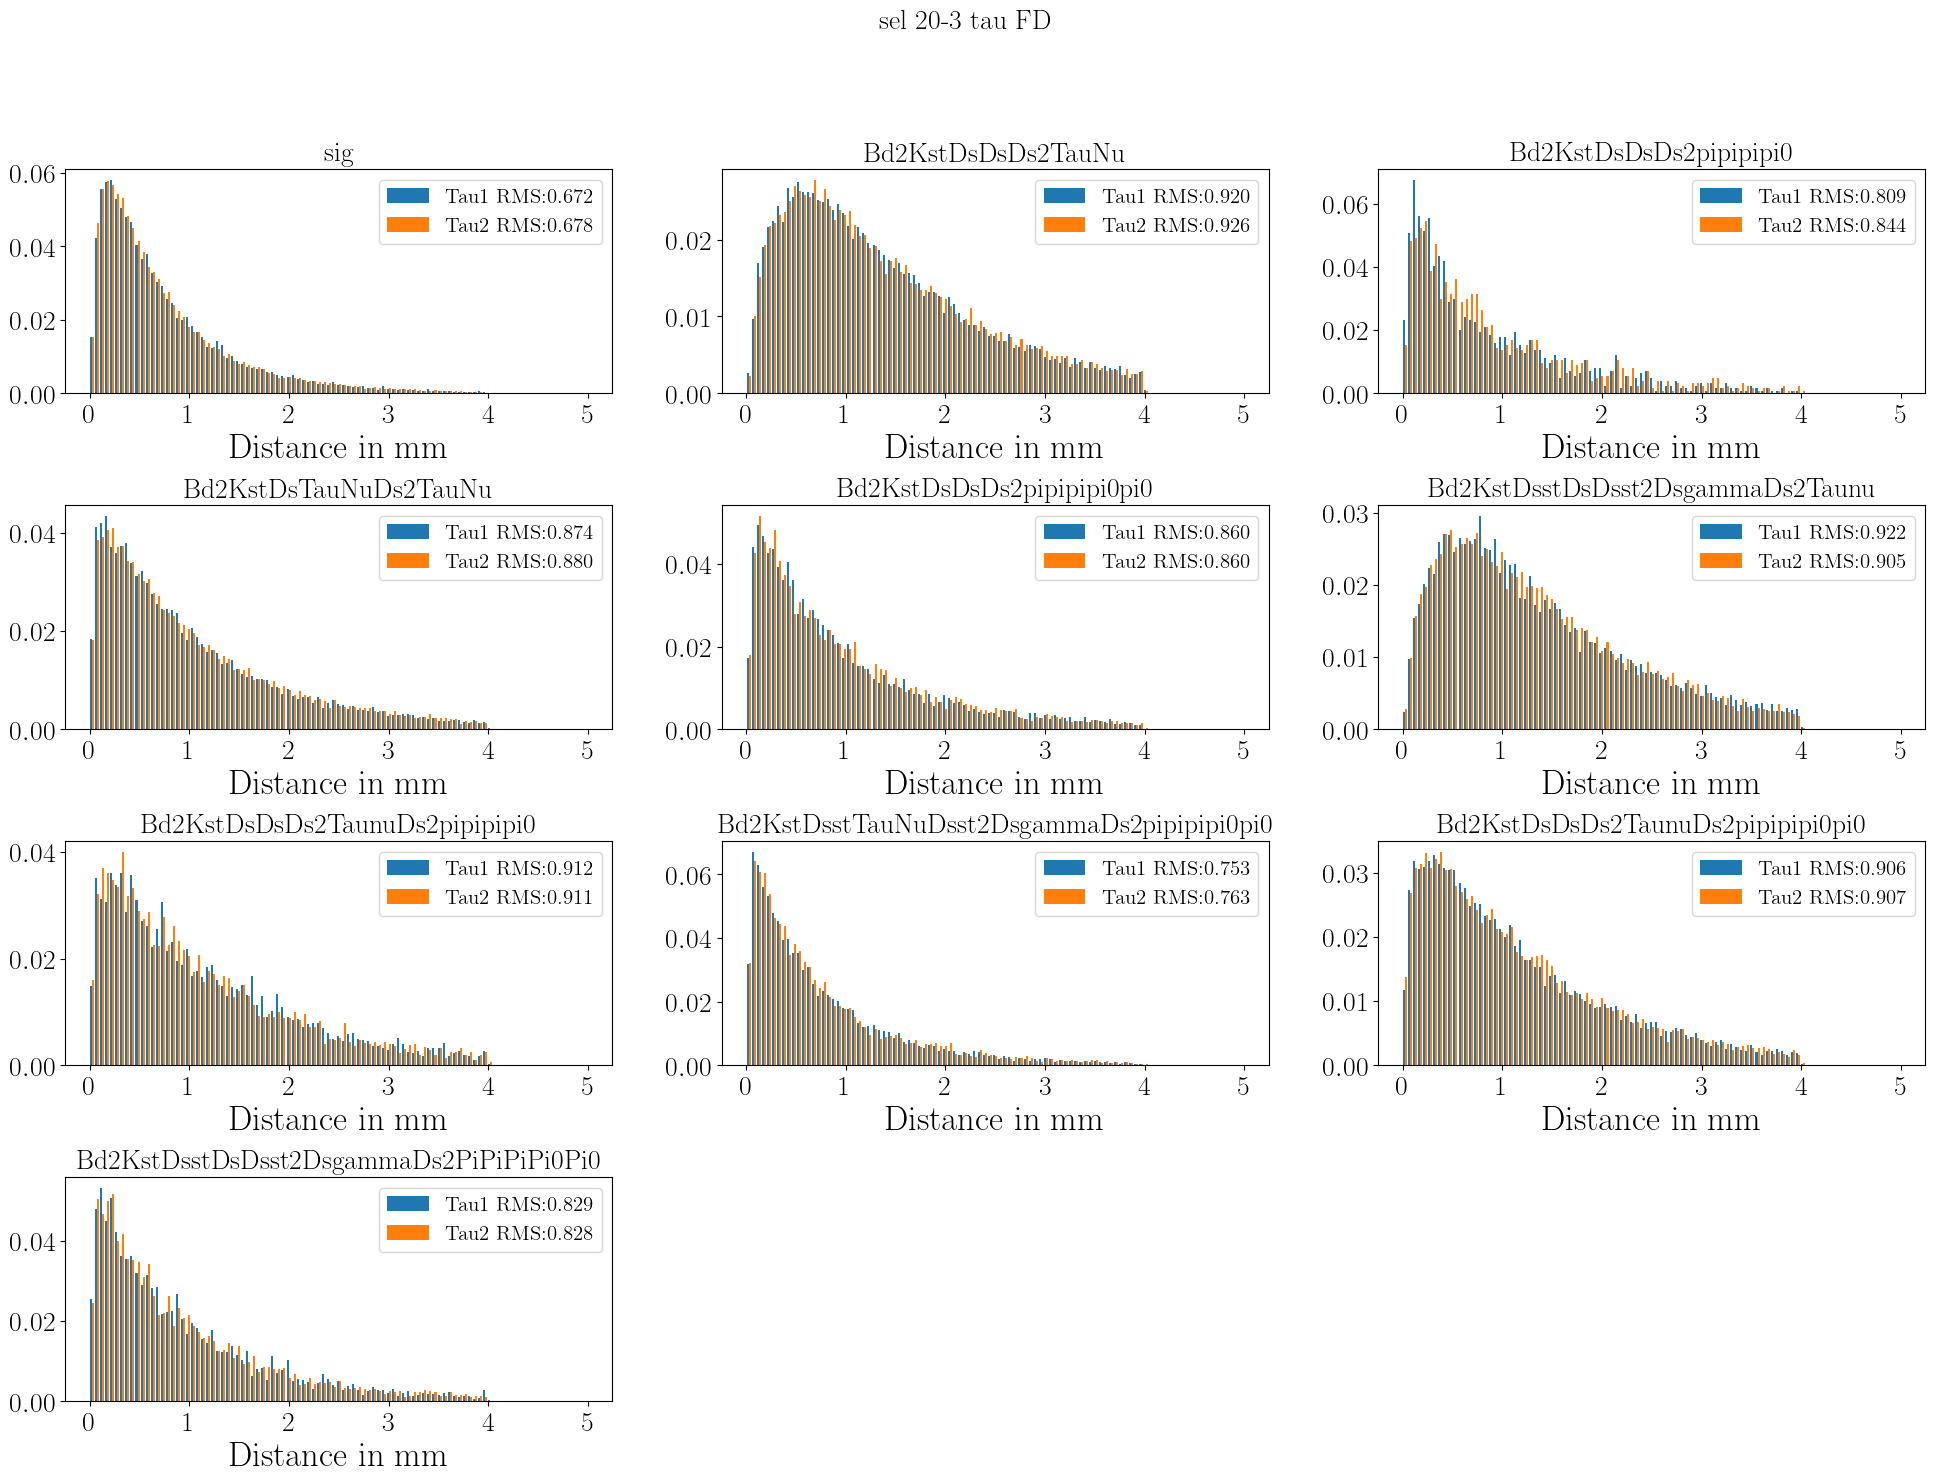

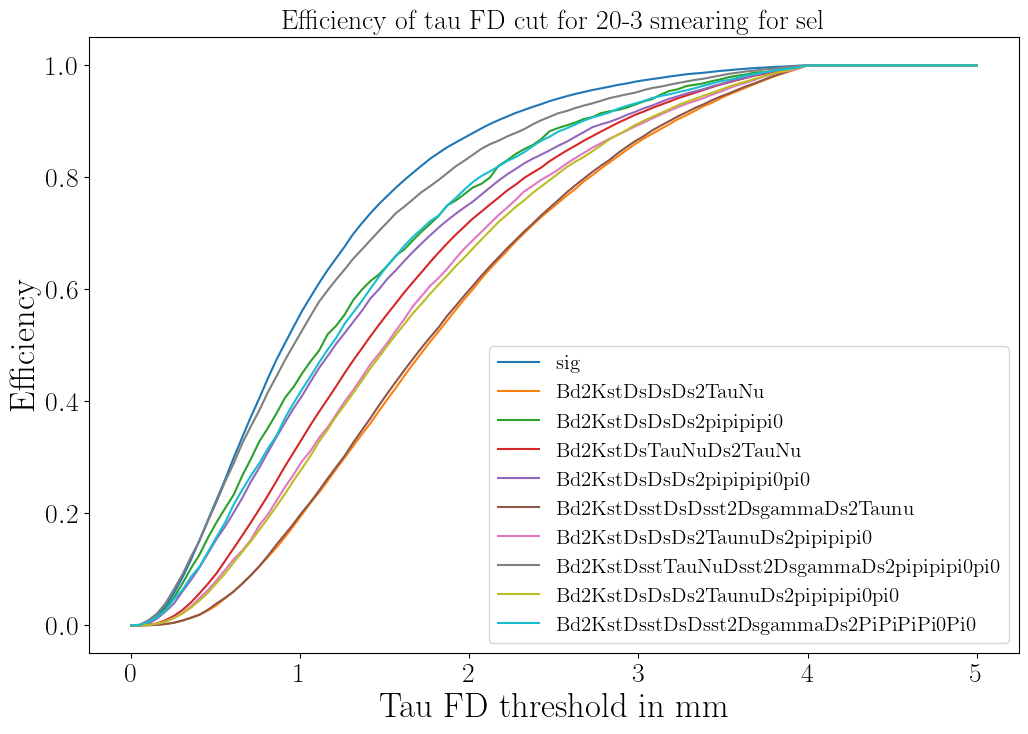

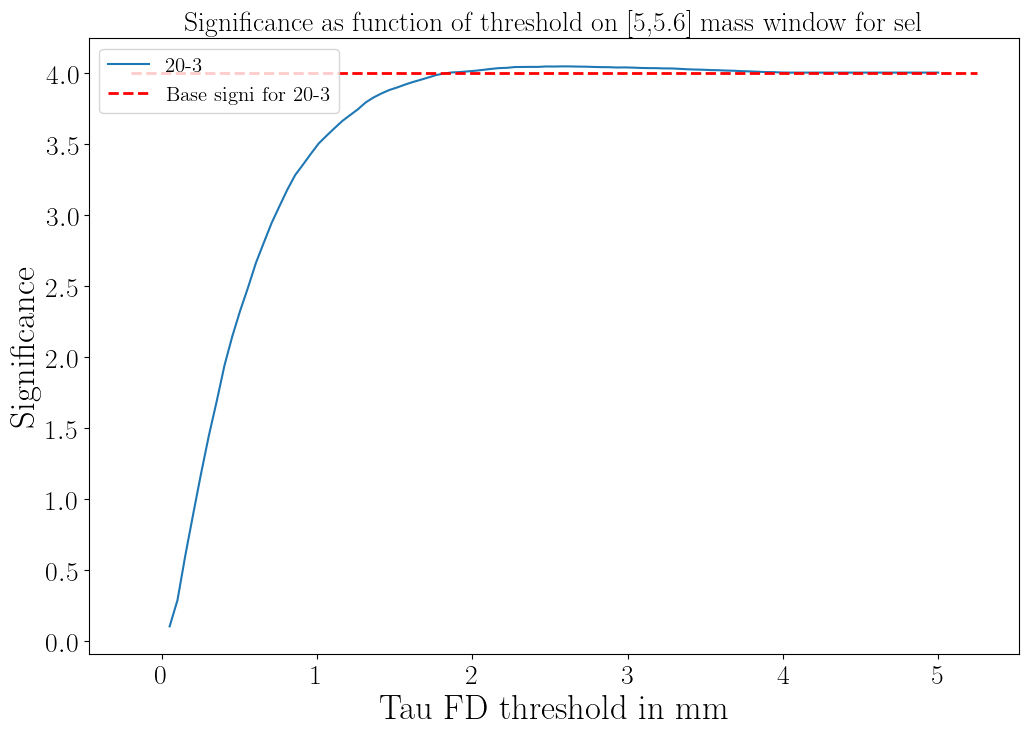

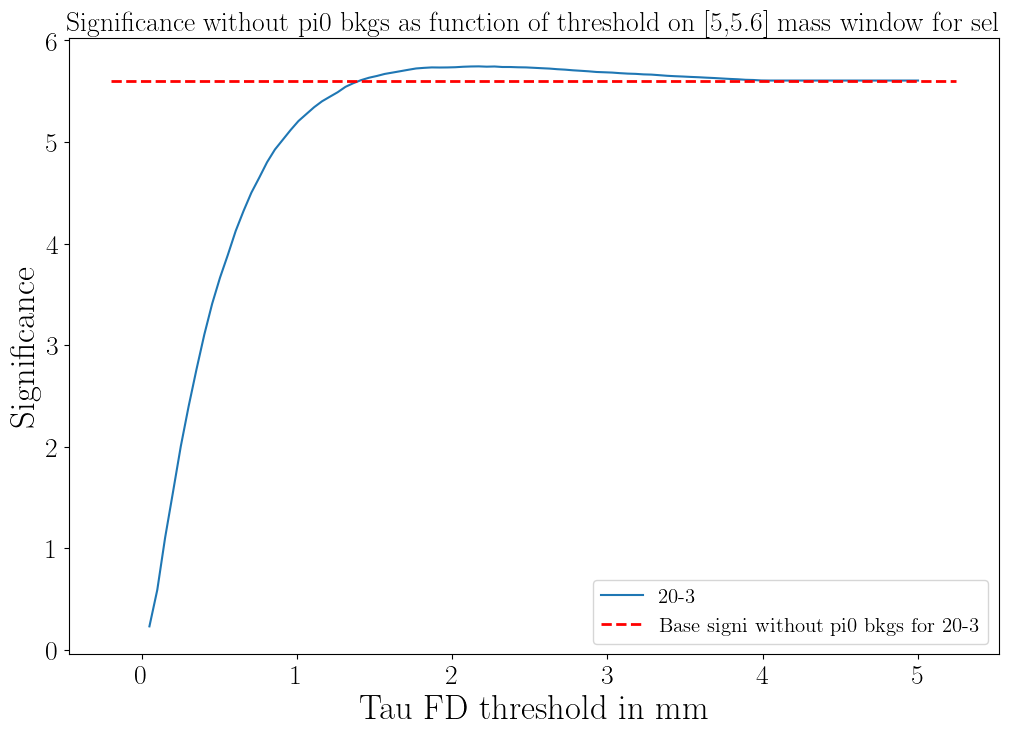

In [116]:
var=f"tau_FD"#particular case -> use tau1 and tau2 simultenaously
varname=var.replace('_',' ')
Tlist=np.linspace(0,5,100)

if(check_correlation):
    for i in listsol:
        nami=i
        for smearing in listsmearing:
            for tau in [1,2]:
                smearname=smearing
                plt.figure(figsize=(24, 16))
                plt.subplots_adjust(hspace=0.5)
                plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
                for n, mode in enumerate(listmod):
                    ax = plt.subplot(4, 3, n + 1)
                    regplot(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"],data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau{tau}_FD"], x_bins=100, ax=ax)
                    ax.set_xlabel(f'M in GeV')
                    ax.set_ylabel(f'{varname}')
                    ax.set_title(f'{mode} tau {tau}')

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            ax = plt.subplot(4, 3, n + 1)
            ax.hist(np.concatenate((data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_tau1_FD"],data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_tau2_FD"])),bins=Tlist,weights=np.concatenate((data[f"sig_{smearing}"][f"{i}_weights_cuted1"],data[f"sig_{smearing}"][f"{i}_weights_cuted1"])),label=f'sig', color='skyblue')
            ax.hist(np.concatenate((data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau1_FD"],data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau2_FD"])),bins=Tlist,weights=np.concatenate((data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"],data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"])),label=f'{mode}', histtype='step', edgecolor='red')
            ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
            ax.set_xlabel('Distance in mm')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(24, 16))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"{nami} {smearname} {varname}", fontsize=20,)
        for n, mode in enumerate(listmod):
            RMS1=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau1_FD"]))**0.5
            RMS2=(np.var(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau2_FD"]))**0.5
            ax = plt.subplot(4, 3, n + 1)
            ax.hist([data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau1_FD"],data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau2_FD"]],bins=Tlist,weights=[data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"],data[f"{mode}_{smearing}"][f"{i}_weights_cuted1"]],label=[f'Tau1 RMS:{RMS1:.3f}',f'Tau2 RMS:{RMS2:.3f}'])
            ax.set_xlabel('Distance in mm')
            ax.set_title(f'{mode}')
            ax.legend()

for i in listsol:
    for smearing in listsmearing:
        for mode in listmod:
            data[f"{mode}_{smearing}"][f"{i}_eff_cut"]=[]
            for T in Tlist:
                data[f"{mode}_{smearing}"][f"{i}_cut"]=((data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau1_FD"]<T)&(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_tau2_FD"]<T))
                data[f"{mode}_{smearing}"][f"{i}_eff_cut"].append(len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"][data[f"{mode}_{smearing}"][f"{i}_cut"]])/len(data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1"]))

for i in listsol:
    nami=i
    for smearing in listsmearing:
        smearname=smearing
        plt.figure(figsize=(12,8))
        plt.title(f'Efficiency of {varname} cut for {smearname} smearing for {nami}')
        for mode in listmod:
            plt.plot(Tlist, data[f"{mode}_{smearing}"][f"{i}_eff_cut"], label=f'{mode}')
        plt.xlabel('Tau FD threshold in mm')
    plt.ylabel('Efficiency')
    plt.legend();
    
for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signi=0
        for mode in listmod:
            denom_signi+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
        significance=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signi)
        plt.plot(Tlist,significance,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_cuted1"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi for {smearname}')
    plt.title(f'Significance as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Tau FD threshold in mm')
    plt.ylabel('Significance')
    plt.legend();

for i in listsol:
    nami=i
    plt.figure(figsize=(12,8))
    for smearing in listsmearing:
        smearname=smearing
        denom_signinopi0=0
        for mode in listmod:
            if ((mode!="Bd2KstDsDsDs2pipipipi0")&(mode!="Bd2KstDsDsDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0")&(mode!="Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0")&(mode!="Bd2KstDsDsDs2TaunuDs2pipipipi0pi0")&(mode!="Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0")):
                denom_signinopi0+=np.array(data[f"{mode}_{smearing}"][f"{i}_eff_cut"])*data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted1_true_number"]
        significancenopi0=np.array(data[f"sig_{smearing}"][f"{i}_eff_cut"])*data[f"sig_{smearing}"][f"{i}_cut_study_cuted1_true_number"]/np.sqrt(denom_signinopi0)
        plt.plot(Tlist,significancenopi0,label=f'{smearname}')
        xmin, xmax = plt.xlim()
        plt.hlines(y=data[f"sig_{smearing}"][f"{i}_base_signi_cuted1_no_pi0"],xmin=xmin, xmax=xmax,color='red',linestyle='--',lw=2,label=f'Base signi without pi0 bkgs for {smearname}')
    plt.title(f'Significance without pi0 bkgs as function of threshold on [5,5.6] mass window for {nami}')
    plt.xlabel('Tau FD threshold in mm')
    plt.ylabel('Significance')
    plt.legend();

By eye selection second stage (not applied for the MVA selection)

In [117]:
for i in listsol:
    print(i)
    for smearing in listsmearing:
        print(smearing)
        denom_purity=0
        for mode in listmod:
            #cut to obtain cut study variable from plot variable
            cut_cut_window=(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"]!=0)*(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"]>5)*(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"]<5.6)
            #cut obtain with selection by eye on p tau reco cuted after second stage
            new_cut=((data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_P_tau_1"]>6)&(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_P_tau_2"]>6)&(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_P_tau_1"]<23)&(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_P_tau_2"]<23))
            #efficiency of the selection on plot and cut window after second stage selection
            data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_plot"]=len(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"][new_cut])/len(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"])
            data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_in_cut_window"]=len(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"][cut_cut_window])/len(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"])
            data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_cut"]=len(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"][new_cut*cut_cut_window])/len(data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"][cut_cut_window])
            #obtain plot variables after second stage selection
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted2"]=data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"][new_cut]
            data[f"{mode}_{smearing}"][f"{i}_plot_cuted2_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_true_number"]*data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_plot"]
            #obtained new cut study variables
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted2"]=data[f"{mode}_{smearing}"][f"{i}_plot_cuted1"][new_cut*cut_cut_window]
            data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted2_true_number"]=data[f"{mode}_{smearing}"][f"{i}_plot_cuted1_true_number"]*data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_cut"]*data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_in_cut_window"]
            print("Efficiency of the cut for {} on [5,5.6] = {}".format(mode, data[f"{mode}_{smearing}"][f"{i}_eff_additionnal_cut_cut"]))
            denom_purity+=data[f"{mode}_{smearing}"][f"{i}_cut_study_cuted2_true_number"]
        purity=data[f"sig_{smearing}"][f"{i}_cut_study_cuted2_true_number"]/denom_purity
        print(data[f"sig_{smearing}"][f"{i}_cut_study_cuted2_true_number"], denom_purity)
        print(f"Purity on cut window = {purity}")

sel
20-3
Efficiency of the cut for sig on [5,5.6] = 0.8322693243925964
Efficiency of the cut for Bd2KstDsDsDs2TauNu on [5,5.6] = 0.5212174057465537
Efficiency of the cut for Bd2KstDsDsDs2pipipipi0 on [5,5.6] = 0.6355591311343524
Efficiency of the cut for Bd2KstDsTauNuDs2TauNu on [5,5.6] = 0.5636821312449743
Efficiency of the cut for Bd2KstDsDsDs2pipipipi0pi0 on [5,5.6] = 0.5503555268261151
Efficiency of the cut for Bd2KstDsstDsDsst2DsgammaDs2Taunu on [5,5.6] = 0.28454324418200766
Efficiency of the cut for Bd2KstDsDsDs2TaunuDs2pipipipi0 on [5,5.6] = 0.5869366903849662
Efficiency of the cut for Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 on [5,5.6] = 0.3835542037801434
Efficiency of the cut for Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 on [5,5.6] = 0.5397492470406948
Efficiency of the cut for Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 on [5,5.6] = 0.342899554675903
83.24062560000002 314.48995747033547
Purity on cut window = 0.26468452687508076


soltype='sel'
solsig=soltype
solbkg=soltype
low = 4.6
high = 6
low3=5.1
high3=5.7
low1=5.26
high1=5.3
low2=5.2
high2=5.5
obs = zfit.Space('mB', limits=(low, high))
#Crystal Ball parameters
mu = zfit.Parameter(f"mu_{rand}", lp.B_0.mass/1000., low, high)
sigma = zfit.Parameter(f"sigma_{rand}", 0.5, 0., 2.)
alphaR = zfit.Parameter(f"alphaR_{rand}", 0.2, 0., 5.)
nR = zfit.Parameter(f"nR_{rand}", 10., 0., 200.)
alphaL = zfit.Parameter(f"alphaL_{rand}", 0.2, 0., 5.)
nL = zfit.Parameter(f"nL_{rand}", 10., 0., 200.)
# Core gaussian parameters
sigmaG1 = zfit.Parameter(f"sigmaG1_{rand}", 0.015, 0., 1)
# Fractions
frac = zfit.Parameter(f"frac_{rand}", 0.5, 0., 1.)

pdfCB = zfit.pdf.DoubleCB(obs=obs, mu=mu, sigma=sigma, alphal=alphaL, nl=nL,alphar=alphaR, nr=nR)
pdf_sigG1=zfit.pdf.Gauss(obs=obs, mu=mu, sigma=sigmaG1)
pdf = zfit.pdf.SumPDF([pdfCB, pdf_sigG1], frac)

data_np = np.array(data[f"sig_{smearing}"][f"{solsig}_plot_cuted2"])
data_low_cut = data_np >= low
data_high_cut = data_np <= high
data_cut = np.logical_and(data_low_cut, data_high_cut)
data_np = data_np[data_cut]
datazf = zfit.Data.from_numpy(obs=obs, array=data_np)

nll = zfit.loss.UnbinnedNLL(model=pdf, data=datazf)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)
param_errors = result.hesse()

print("Fit function minimum:", result.fmin)
print("Fit converged:", result.converged)
print("Fit full minimizer information:", result.info)

params = result.params
print(params);

Expected number of events in window is 90.53066880000002
Expected number of Bd2KstDsDsDs2TauNu in window is 127.8670903587272
Expected number of Bd2KstDsDsDs2pipipipi0 in window is 0.31493348431650037
Expected number of Bd2KstDsTauNuDs2TauNu in window is 355.797861143727
Expected number of Bd2KstDsDsDs2pipipipi0pi0 in window is 97.23462171278071
Expected number of Bd2KstDsstDsDsst2DsgammaDs2Taunu in window is 405.5614402547555
Expected number of Bd2KstDsDsDs2TaunuDs2pipipipi0 in window is 6.345529659480334
Expected number of Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 in window is 674.8186228746844
Expected number of Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 in window is 111.26922422631293
Expected number of Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 in window is 307.01746228589104


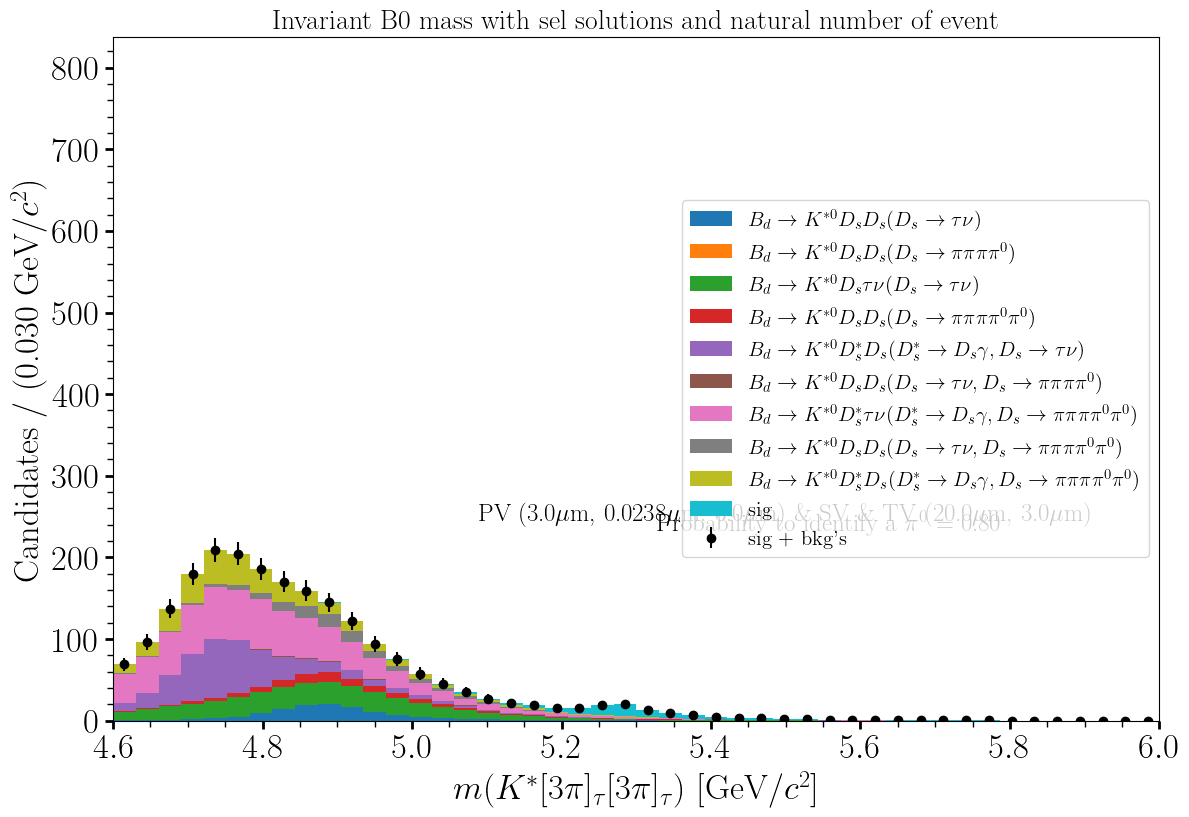

In [118]:
soltype='sel'
solsig=soltype
solbkg=soltype
low = 4.6
high = 6

data_np = np.array(data[f"sig_{smearing}"][f"{solsig}_plot_cuted2"])
data_low_cut = data_np >= low
data_high_cut = data_np <= high
data_cut = np.logical_and(data_low_cut, data_high_cut)
data_np = data_np[data_cut]

PV_smear=True
SV_smear=True
TV_smear=True
PV_scale=3e-3
SV_scale=20e-3
TV_scale=3e-3

labelTeX={"Bd2KstDsDsDs2TauNu":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2pipipipi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\pi\\pi\\pi\\pi^0)$", "Bd2KstDsTauNuDs2TauNu":"$B_d\\to K^{*0}D_s\\tau\\nu(D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2pipipipi0pi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$", "Bd2KstDsstDsDsst2DsgammaDs2Taunu":"$B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\tau\\nu)$","Bd2KstDsDsDs2TaunuDs2pipipipi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0)$","sig":"sig","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0":"$B_d\\to K^{*0}D_s^*\\tau\\nu(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0":"$B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0\\pi^0)$", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0":"$B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)$"}
#fracCBL=params[frac_CB]['value']*params[frac]['value']
#fracCBR=(1-params[frac_CB]['value'])*params[frac]['value']
#fracG=(1-params[frac]['value'])

fig, ax = plt.subplots(figsize=(12,8))
n = len(data_np)
bins = 2*int(np.sqrt(n))

bins=int((6-4.6)/0.03)
bin_w = (high - low)/bins

bng=np.linspace(low,high,bins)

units = "GeV/$c^2$"
counts, bin_edges = np.histogram(data_np, bins, range=(low,high))
true_number=data[f"sig_{smearing}"][f"{solsig}_plot_cuted2_true_number"]
print('Expected number of events in window is {}'.format(true_number))
rescale=(true_number/np.sum(counts))#signal scale factor to consider a realist number of events
data[f"sig_{smearing}"][f"{solsig}_rescale"]=rescale
counts=counts*rescale
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)

probpi0k=probPI0#probability to identify a pi0 -> to study the effect of pi0 identification (it allow us to eliminate a fraction of Ds->pipipipi0 bkg)
rescale1pi0=(1-probpi0k)
rescale2pi0=(1-probpi0k)**2
#rescale4pi0=(1-probpi0k**2)**2#with eta and omega the probability for a Ds->pipipipi0pi0 to be found is equal to the one of a Ds->pipipipi0

for mode in listbkg:
    print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"{solbkg}_plot_cuted2_true_number"]))
countstot=counts
errtot=err**2
for mode in listbkg:
    counst_bkg, bin_edges_bkg=np.histogram(data[f"{mode}_{smearing}"][f"{solbkg}_plot_cuted2"], bins, range=(low,high))
    data[f"{mode}_{smearing}"][f"{solbkg}_rescale"]=data[f"{mode}_{smearing}"][f"{solbkg}_plot_cuted2_true_number"]/np.sum(counst_bkg)
    counst_bkg=counst_bkg*data[f"{mode}_{smearing}"][f"{solbkg}_rescale"]
    countstot+=counst_bkg
    err_bkg=np.sqrt(counst_bkg)
    errtot+=err_bkg**2
errtot=np.sqrt(errtot)

data_hist=[]
labellist=["Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0","sig"]
weights_list=[]
for mode in labellist:
    if (mode=='sig'):
        i=solsig
    else:
        i=solbkg
    data_hist.append(data[f"{mode}_{smearing}"][f"{i}_plot_cuted2"])
    weights_list.append(np.ones(len(data[f"{mode}_{smearing}"][f"{i}_plot_cuted2"]))*data[f"{mode}_{smearing}"][f"{i}_rescale"])
#print(data_hist)
#print(weights_list)
#plt.hist(bin_edges[:-1], bin_edges, weights=counts,label='sig rr',color='blue',alpha=1)
#plt.errorbar(bin_centres, counts1, yerr=err1, fmt='o', label='sig wr')
#plt.errorbar(bin_centres, counts2, yerr=err2, fmt='o', label='sig rw')
#plt.errorbar(bin_centres, counts3, yerr=err3, fmt='o', label='sig ww')
#plt.hist(Dspipipipi0_20_3_mm, bin_edges4, alpha=1,weights=np.ones(len(Dspipipipi0_20_3_mm))*scale_Dspipipipi0*rescale*rescale2pi0,label='BK Ds2pipipipi0',color='orange')
#plt.hist(bin_edges4[:-1], bin_edges4, weights=counts4,label='BK Ds2pipipipi0',color='orange',alpha=0.75)
#plt.hist(DsTauNu_20_3_mm, bin_edges5, alpha=0.75,weights=np.ones(len(DsTauNu_20_3_mm))*scale_DsTauNu*rescale,label='BK Ds2TauNu',color='green')
#plt.hist(bin_edges5[:-1], bin_edges5, weights=counts5,label='BK Ds2TauNu',color='green',alpha=0.5)
#plt.hist(data_np, bin_edges, alpha=0.5,weights=np.ones(len(data_np))*rescale, label='sig rr',color='blue')
plt.hist(data_hist,bin_edges, stacked=True, weights=weights_list,label=list(map(labelTeX.__getitem__, labellist)))
plt.errorbar(bin_centres, countstot, yerr=errtot, fmt='o', label='sig + bkg\'s', color="black")
#plt.errorbar(bin_centres, counts, yerr=err,fmt=' ', color='blue')
#plt.errorbar(bin_centres, counts4, yerr=err4,fmt=' ', color='orange')
#plt.errorbar(bin_centres, counts5, yerr=err5, fmt=' ', color='green')

#mult=20
#x_plot = np.linspace(low, high, num=500)#num=len(Counts[0][1])*mult)
#y_plot_tot = zfit.run(pdf.pdf(x_plot, norm_range=obs))
#level_list=[]
#for i in Counts[0][1]:
#    for j in range(mult):
#        level_list.append(i)
#plt.plot(x_plot, (y_plot_tot*len(data_np)/bins*obs.area()*rescale), color='black', linewidth=1, alpha=1,label='sig fit')
ax.tick_params(axis='both', which='major', labelsize=25,width=2,length=6)
ax.tick_params(axis='both', which='minor',width=1,length=4)
plt.ylabel("Candidates / (%.3f GeV/$c^2$)" % bin_w,fontsize=25)
plt.xlabel("$m(K^* [3\pi]_\\tau [3\pi]_\\tau)$ [GeV/$c^2$]",fontsize=25)
plt.xlim(low,high)
plt.ylim(YMIN, YMAX)#in order to keep same y window
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax.yaxis.set_minor_locator(tick.AutoMinorLocator())
#plt.text((high-low)*0.6+low,0.9*ymax,"\\textbf{FCC-ee}",fontsize=20)
#plt.text((high-low)*0.55+low,0.74*ymax,"$Z^0 \\to b\\bar{b}$ sim.",fontsize=20)
#plt.text((high-low)*0.55+low,0.74*ymax,"$\\cdot$ $B^0 \\to K^{*0} \\tau^+ \\tau^-$ excl.",fontsize=20)
if ((PV_smear==False)&(SV_smear==False)&(TV_smear==False)):
    plt.text((high-low)*0.52+low,0.98*ymax,"TRUE DECAY VERTICES USED",fontsize=18)
if ((PV_smear==True)&(SV_smear==False)&(TV_smear==False)):
    plt.text((high-low)*0.52+low,0.98*ymax,f"PRIMARY VERTEX ({PV_scale*1000}$\mu$m) SMEARED",fontsize=18)
if ((PV_smear==False)&(SV_smear==True)&(TV_smear==False)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{SECONDARY VERTEX SMEARED}",fontsize=18)
if ((PV_smear==False)&(SV_smear==False)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{TERTIARY VERTEX SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==True)&(TV_smear==False)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{PV \& SV SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==False)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{PV \& TV SMEARED}",fontsize=18)
if ((PV_smear==False)&(SV_smear==True)&(TV_smear==True)):
    plt.text((high-low)*0.55+low,0.82*ymax,"\\textbf{SV \& TV SMEARED}",fontsize=18)
if ((PV_smear==True)&(SV_smear==True)&(TV_smear==True)):
    plt.text((high-low)*0.35+low,0.95*ymax,f"PV (3.0$\mu$m, 0.0238$\mu$m, 3.0$\mu$m)"+f" \& SV \& TV ({SV_scale*1000}$\mu$m, {TV_scale*1000}$\mu$m)",fontsize=18)
#sigma_min=params[sigmaG1]['value']
#sigma_val = 1000.*sigma_min
#plt.text((high-low)*0.52+low,0.90*ymax,"Core $\\sigma = %.1f$ MeV/$c^2$" % sigma_val,fontsize=18)
#plt.text((high-low)*0.52+low,0.82*ymax,"Core gaussian fraction = %.2f" % fracG,fontsize=18)
plt.text((high-low)*0.52+low,0.90*ymax,"Probability to identify a $\\pi^0$ = %.2f " % probpi0k,fontsize=18)
plt.tight_layout()
plt.title(f"Invariant B0 mass with {soltype} solutions and natural number of event")
plt.legend(loc='right')

string_proba=str(probpi0k)

if(SAVEMOD=="yes"):
    plt.savefig(f'new_vertexing_final_plots/rr_--_20_3_{string_proba}.pdf');

Same plot + fit in RooFit: 

PV_smear=True
SV_smear=True
TV_smear=True
PV_scale=3e-3
SV_scale=20e-3
TV_scale=3e-3

low = 4.6
high = 6

bins=int((6-4.6)/0.03)
bin_w = (high - low)/bins

sig_hist=ROOT.TH1D("sig mass", "sig mass", bins, 4.6, 6.0)
for i in data[f"sig_{smearing}"][f"sel_plot_cuted2"]:
    sig_hist.Fill(i, data[f"sig_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"sig_{smearing}"][f"sel_plot_cuted2"]))
sig_hist.SetFillColor(906)

Bd2KstDsDsDs2TauNu_hist=ROOT.TH1D("Bd2KstDsDsDs2TauNu mass", "Bd2KstDsDsDs2TauNu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsDsDs2TauNu_hist.Fill(i, data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsDsDs2TauNu_hist.SetFillColor(600)

Bd2KstDsDsDs2pipipipi0_hist=ROOT.TH1D("Bd2KstDsDsDs2pipipipi0 mass", "Bd2KstDsDsDs2pipipipi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsDsDs2pipipipi0_hist.Fill(i, data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsDsDs2pipipipi0_hist.SetFillColor(800)

Bd2KstDsTauNuDs2TauNu_hist=ROOT.TH1D("Bd2KstDsTauNuDs2TauNu mass", "Bd2KstDsTauNuDs2TauNu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsTauNuDs2TauNu_hist.Fill(i, data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsTauNuDs2TauNu_hist.SetFillColor(416)

Bd2KstDsDsDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsDsDs2pipipipi0pi0 mass", "Bd2KstDsDsDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsDsDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsDsDs2pipipipi0pi0_hist.SetFillColor(632)

Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist=ROOT.TH1D("Bd2KstDsstDsDsst2DsgammaDs2Taunu mass", "Bd2KstDsstDsDsst2DsgammaDs2Taunu mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist.Fill(i, data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist.SetFillColor(881)

Bd2KstDsDsDs2TaunuDs2pipipipi0_hist=ROOT.TH1D("Bd2KstDsDsDs2TaunuDs2pipipipi0 mass", "Bd2KstDsDsDs2TaunuDs2pipipipi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsDsDs2TaunuDs2pipipipi0_hist.Fill(i, data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsDsDs2TaunuDs2pipipipi0_hist.SetFillColor(804)
Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 mass", "Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist.SetFillColor(432)

Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist=ROOT.TH1D("Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 mass", "Bd2KstDsDsDs2TaunuDs2pipipipi0pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist.Fill(i, data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist.SetFillColor(406)

Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist=ROOT.TH1D("Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 mass", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0 mass", bins, 4.6, 6.0)
for i in data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_cuted2"]:
    Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist.Fill(i, data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_cuted2"]))
Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist.SetFillColor(422)

stack_hist=ROOT.THStack("stack histo", f"Invariant B0 mass after second stage selection")
stack_hist.Add(Bd2KstDsDsDs2TauNu_hist)
stack_hist.Add(Bd2KstDsDsDs2pipipipi0_hist)
stack_hist.Add(Bd2KstDsTauNuDs2TauNu_hist)
stack_hist.Add(Bd2KstDsDsDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist)
stack_hist.Add(Bd2KstDsDsDs2TaunuDs2pipipipi0_hist)
stack_hist.Add(Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist)
stack_hist.Add(Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist)
stack_hist.Add(sig_hist)
legend=ROOT.TLegend(0.4,0.3,0.89,0.8)
legend.AddEntry(sig_hist,"sig","f")
legend.AddEntry(Bd2KstDsDsDs2TaunuDs2pipipipi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to\\tau\\nu/\pi\pi\pi\pi^{0})","f")
legend.AddEntry(Bd2KstDsstDsDsst2DsgammaDs2Taunu_hist,"B_{d}\\to K^{*0} D_{s}^{*} D_{s} (D_{s}^{*}\\to D_{s}\\gamma, D_{s}\\to\\tau\\nu)","f")
legend.AddEntry(Bd2KstDsDsDs2pipipipi0pi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\pi\\pi\\pi\\pi^{0}\\pi^{0})","f")
legend.AddEntry(Bd2KstDsTauNuDs2TauNu_hist,"B_{d}\\to K^{*0} D_{s} \\tau\\nu (D_{s}\\to \\tau\\nu)","f")
legend.AddEntry(Bd2KstDsDsDs2pipipipi0_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\pi\\pi\\pi\\pi^{0})","f")
legend.AddEntry(Bd2KstDsDsDs2TauNu_hist,"B_{d}\\to K^{*0} D_{s} D_{s} (D_{s}\\to \\tau\\nu)","f")
legend.AddEntry(Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_hist,"B_d\\to K^{*0}D_s^*\\tau\\nu(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.AddEntry(Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_hist,"B_d\\to K^{*0}D_sD_s(D_s\\to \\tau\\nu, D_s\\to\\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.AddEntry(Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_hist,"B_d\\to K^{*0}D_s^*D_s(D_s^*\\to D_s\\gamma, D_s\\to \\pi\\pi\\pi\\pi^0\\pi^0)","f")
legend.SetFillStyle(0)
ttext=ROOT.TPaveText(0.3,0.8,0.89,0.89,"NDC")
ttext.SetTextSize(0.04)
ttext.AddText(f"PV ({PV_scale*1000}"+"\\mu m)"+f" \\& SV \\& TV ({SV_scale*1000}\mu m, {TV_scale*1000}\\mu m) SMEARED")
ttext.AddText("Probability\tto\tidentify\ta\t\\pi^0"+f"={probPI0}")
ttext.SetFillColor(0)
ttext.SetBorderSize(0)
c1=ROOT.TCanvas()
stack_hist.Draw("HIST")
xaxis=stack_hist.GetXaxis()
xaxis.SetTitle("m(K^{*} [3\\pi]_\\tau [3\\pi]_\\tau) [GeV/c^{2}]")
yaxis=stack_hist.GetYaxis()
yaxis.SetTitle(f"Candidates / ({bin_w:.2f}"+ "GeV/c^{2})")
legend.Draw()
ttext.Draw()
c1.Draw()


for mode in listmod:
    print('Expected number of {} in window is {}'.format(mode,data[f"{mode}_{smearing}"][f"sel_plot_cuted2_true_number"]))

Signal fit by making RooDataSet

mass_high=6.
mass_low=5.
mass = ROOT.RooRealVar("mass", "mass", mass_low, mass_high)
bins=int((mass_high-mass_low)/0.03)
npsigmass=np.array(data[f"sig_{smearing}"][f"sel_plot_cuted2"])

signal_mass = ROOT.RooDataSet.from_numpy(data={"mass": npsigmass}, variables=[mass])
#np.savetxt('data1.txt',X=npsigmass)
low = 4.6
high = 6

rand+=1

#signal fit
#crystal ball parameters
mu=ROOT.RooRealVar(f"mu_{rand}", f"mu_{rand}", lp.B_0.mass/1000., low, high)
sigma = ROOT.RooRealVar(f"sigma_{rand}", f"sigma_{rand}", 0.2, 0., 1.)
alphaR = ROOT.RooRealVar(f"alphaR_{rand}", f"alphaR_{rand}", 1., 0., 5.)
nR = ROOT.RooRealVar(f"nR_{rand}", f"nR_{rand}", 5., 0., 200.)
alphaL = ROOT.RooRealVar(f"alphaL_{rand}", f"alphaL_{rand}", 1., 0., 5.)
nL = ROOT.RooRealVar(f"nL_{rand}", f"nL_{rand}", 5., 0., 200.)
# Core gaussian parameters
sigmaG1 = ROOT.RooRealVar(f"sigmaG1_{rand}", f"sigmaG1_{rand}", 0.015, 0., 1)
# Fractions
frac = ROOT.RooRealVar(f"frac_{rand}", f"frac_{rand}", 0.5, 0., 1.)

#signal model
CB = ROOT.RooCrystalBall(f"CB_{rand}",f"CB_{rand}",x=mass,x0=mu,sigmaLR=sigma,alphaR=alphaR, nR=nR,alphaL=alphaL, nL=nL )
Gau = ROOT.RooGaussian(f"gau_{rand}",f"gau_{rand}",_x=mass,_mean=mu,_sigma=sigmaG1)
sig_fit= ROOT.RooAddPdf( f"sig_fit_{rand}",f"sig_fit_{rand}",CB, Gau,frac)
minimiz=ROOT.RooFit.Minimizer("Minuit2","migrad")
sig_fit.fitTo(signal_mass,minimiz)#,ROOT.RooFit.Extended(),ROOT.RooFit.NumCPU(7))
c22=ROOT.TCanvas()
Mframe = mass.frame(bins)
signal_mass.plotOn(Mframe)
sig_fit.plotOn(Mframe)
Mframe.Draw()
c22.Draw('mass')


Signal + background fit via RooDataSet:

weight = ROOT.RooRealVar("weight", "weight", 0., 100000.)

npsigbkgmass=np.array([])
npsigbkgweight=np.array([])
npbkgmass=np.array([])#array to determine number of bkg on fit window
for sigbkgmode in ["sig","Bd2KstDsDsDs2TauNu","Bd2KstDsDsDs2pipipipi0","Bd2KstDsTauNuDs2TauNu","Bd2KstDsDsDs2pipipipi0pi0","Bd2KstDsstDsDsst2DsgammaDs2Taunu","Bd2KstDsDsDs2TaunuDs2pipipipi0","Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0","Bd2KstDsDsDs2TaunuDs2pipipipi0pi0", "Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0"]:
    if (sigbkgmode!="sig"):
        npbkgmass=np.concatenate((npbkgmass,np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted2"])),axis=None)
    npsigbkgmass=np.concatenate((npsigbkgmass,np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted2"])),axis=None)
    npsigbkgweight=np.concatenate((npsigbkgweight,(np.array(data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted2"])*0+data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted2_true_number"]/len(data[f"{sigbkgmode}_{smearing}"][f"sel_plot_cuted2"]))),axis=None)
sigbkg_mass = ROOT.RooDataSet.from_numpy(data={"mass": npsigbkgmass, "weight": npsigbkgweight}, variables=[mass, weight], weight_name="weight")

#fix signal model parameters
mu.setConstant()
sigma.setConstant()
alphaR.setConstant()
nR.setConstant()
alphaL.setConstant()
nL.setConstant()
sigmaG1.setConstant()
frac.setConstant()
#background model
c_exp1=ROOT.RooRealVar(f"c_exp1_{rand}", f"c_exp1_{rand}", -1., -10., 0.)
c_exp2=ROOT.RooRealVar(f"c_exp2_{rand}", f"c_exp2_{rand}", -1., -10., 0.)
frac_expo=ROOT.RooRealVar(f"frac_expo_{rand}", f"frac_expo_{rand}", 0.5, 0., 1.)
expo1=ROOT.RooExponential(f"expo1_{rand}",f"expo1_{rand}",_x=mass,_c=c_exp1)
expo2=ROOT.RooExponential(f"expo2_{rand}",f"expo2_{rand}",_x=mass,_c=c_exp2)
bkg_fit=ROOT.RooAddPdf( f"bkg_fit_{rand}",f"bkg_fit_{rand}",expo1, expo2,frac_expo)
#yield
nsig0=data[f"sig_{smearing}"][f"sel_plot_cuted2_true_number"]
nbkg0=data[f"Bd2KstDsDsDs2TauNu_{smearing}"][f"sel_plot_cuted2_true_number"]+data[f"Bd2KstDsDsDs2pipipipi0_{smearing}"][f"sel_plot_cuted2_true_number"]+data[f"Bd2KstDsTauNuDs2TauNu_{smearing}"][f"sel_plot_cuted2_true_number"]+data[f"Bd2KstDsDsDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2_true_number"]+data[f"Bd2KstDsstDsDsst2DsgammaDs2Taunu_{smearing}"][f"sel_plot_cuted2_true_number"]+data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0_{smearing}"][f"sel_plot_cuted2_true_number"]+data[f"Bd2KstDsstTauNuDsst2DsgammaDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2_true_number"]+data[f"Bd2KstDsDsDs2TaunuDs2pipipipi0pi0_{smearing}"][f"sel_plot_cuted2_true_number"]+data[f"Bd2KstDsstDsDsst2DsgammaDs2PiPiPiPi0Pi0_{smearing}"][f"sel_plot_cuted2_true_number"]
nsig=ROOT.RooRealVar(f"nSig_{rand}",f"nSig_{rand}",nsig0,0.,10000.)
nbkg=ROOT.RooRealVar(f"nBkg_{rand}",f"nBkg_{rand}",nbkg0,0,1000000.)
#total model
sigbkg_fit=ROOT.RooAddPdf("sigbkg_fit","sigbkg_fit",ROOT.RooArgList(sig_fit,bkg_fit),ROOT.RooArgList(nsig,nbkg))

#mass.setRange('fitrange',5.0,6.0)
minimiz=ROOT.RooFit.Minimizer("Minuit2","migrad")
sigbkg_fit.fitTo(sigbkg_mass,minimiz)#Range=('fitrange')

#plot_cuted2_sig=ROOT.RooExtendPdf(f'sig_plot_cuted2_{rand}', f'sig_plot_cuted2_{rand}', sig_fit, nsig)
#plot_cuted2_bkg=ROOT.RooExtendPdf(f'bkg_plot_cuted2_{rand}', f'bkg_plot_cuted2_{rand}', bkg_fit, nbkg)
c222=ROOT.TCanvas()
Mframe = mass.frame(bins)
sigbkg_mass.plotOn(Mframe)
sigbkg_fit.plotOn(Mframe)
sigbkg_fit.plotOn(Mframe, LineColor='r',Components=ROOT.RooArgSet(sig_fit))
sigbkg_fit.plotOn(Mframe, LineColor='m',Components=ROOT.RooArgSet(bkg_fit))
#bkg_fit.plotOn(Mframe, LineColor='m')
Mframe.Draw()
#c222.SetLogy()
c222.Draw('mass')

prop_sig_fit_window=len(npsigmass[(npsigmass>mass_low)&(npsigmass<mass_high)])/len(npsigmass)
prop_bkg_fit_window=len(npbkgmass[(npbkgmass>mass_low)&(npbkgmass<mass_high)])/len(npbkgmass)
nbsig_expected=0
for mode in ["sig"]:
    nbsig_expected+=data[f"{mode}_{smearing}"][f"sel_plot_cuted2_true_number"]*(len(data[f"{mode}_{smearing}"][f"sel_plot_cuted2"][(data[f"{mode}_{smearing}"][f"sel_plot_cuted2"]>mass_low)*(data[f"{mode}_{smearing}"][f"sel_plot_cuted2"]<mass_high)])/len(data[f"{mode}_{smearing}"][f"sel_plot_cuted2"]))
print(nbsig_expected)
nbbkg_expected=0
for mode in listbkg:
    nbbkg_expected+=data[f"{mode}_{smearing}"][f"sel_plot_cuted2_true_number"]*(len(data[f"{mode}_{smearing}"][f"sel_plot_cuted2"][(data[f"{mode}_{smearing}"][f"sel_plot_cuted2"]>mass_low)*(data[f"{mode}_{smearing}"][f"sel_plot_cuted2"]<mass_high)])/len(data[f"{mode}_{smearing}"][f"sel_plot_cuted2"]))
print(nbbkg_expected)
print(prop_sig_fit_window)
print(prop_bkg_fit_window)
print(nsig0*prop_sig_fit_window)
print(nsig)
print(nbkg0*prop_bkg_fit_window)
print(nbkg)

print(nsig0*prop_sig_fit_window+nbkg0*prop_bkg_fit_window)
print(nsig.getVal()+nbkg.getVal())
print(nbsig_expected+nbbkg_expected)

print(nsig.getError())

Make signal and bkgs toy from the model:

nb_sig_fit_window=int(np.round(nbsig_expected))
nb_bkg_fit_window=int(np.round(nbbkg_expected))

print(nb_sig_fit_window, nb_bkg_fit_window)


signal_mass_toy = sig_fit.generate(mass,nb_sig_fit_window)
ROOT.SetOwnership(signal_mass_toy, True) # because generate returns an owning pointer
sigbkg_mass_toy = bkg_fit.generate(mass,nb_bkg_fit_window)
ROOT.SetOwnership(sigbkg_mass_toy, True) # because generate returns an owning pointer

sigbkg_mass_toy.append(signal_mass_toy)

Refit signal + bkg:

rand+=1
#signal fit
#crystal ball parameters
mu_toy=ROOT.RooRealVar(f"mu_toy_{rand}", f"mu_toy_{rand}", mu.getVal(), low, high)
sigma_toy = ROOT.RooRealVar(f"sigma_toy_{rand}", f"sigma_toy_{rand}", sigma.getVal(), 0., 2.)
alphaR_toy = ROOT.RooRealVar(f"alphaR_toy_{rand}", f"alphaR_toy_{rand}", alphaR.getVal(), 0., 5.)
nR_toy = ROOT.RooRealVar(f"nR_toy_{rand}", f"nR_toy_{rand}", nR.getVal(), 0., 200.)
alphaL_toy = ROOT.RooRealVar(f"alphaL_toy_{rand}", f"alphaL_toy_{rand}", alphaL.getVal(), 0., 5.)
nL_toy = ROOT.RooRealVar(f"nL_toy_{rand}", f"nL_toy_{rand}", nL.getVal(), 0., 200.)
# Core gaussian parameters
sigmaG1_toy = ROOT.RooRealVar(f"sigmaG1_toy_{rand}", f"sigmaG1_toy_{rand}", sigmaG1.getVal(), 0., 1)
# Fractions
frac_toy = ROOT.RooRealVar(f"frac_toy_{rand}", f"frac_toy_{rand}", frac.getVal(), 0., 1.)
#signal model
CB_toy = ROOT.RooCrystalBall(f"CB_toy_{rand}",f"CB_toy_{rand}",x=mass,x0=mu_toy,sigmaLR=sigma_toy,alphaR=alphaR_toy, nR=nR_toy,alphaL=alphaL_toy, nL=nL_toy )
Gau_toy = ROOT.RooGaussian(f"gau_toy_{rand}",f"gau_toy_{rand}",_x=mass,_mean=mu_toy,_sigma=sigmaG1_toy)
sig_fit_toy= ROOT.RooAddPdf( f"sig_fit_toy_{rand}",f"sig_fit_toy_{rand}",CB_toy, Gau_toy,frac_toy)
#background model
c_exp1_toy=ROOT.RooRealVar(f"c_exp1_toy_{rand}", f"c_exp1_toy_{rand}", c_exp1.getVal(), -10., 0.)#-7.63421
#c_exp1.setConstant()
c_exp2_toy=ROOT.RooRealVar(f"c_exp2_toy_{rand}", f"c_exp2_toy_{rand}", c_exp2.getVal(), -10., 0.)
frac_expo_toy=ROOT.RooRealVar(f"frac_expo_toy_{rand}", f"frac_expo_toy_{rand}", frac_expo.getVal(), 0., 1.)
expo1_toy=ROOT.RooExponential(f"expo1_toy_{rand}",f"expo1_toy_{rand}",_x=mass,_c=c_exp1_toy)
expo2_toy=ROOT.RooExponential(f"expo2_toy_{rand}",f"expo2_toy_{rand}",_x=mass,_c=c_exp2_toy)
bkg_fit_toy=ROOT.RooAddPdf( f"bkg_fit_{rand}",f"bkg_fit_{rand}",expo1_toy, expo2_toy,frac_expo_toy)
#yield
nsig_toy=ROOT.RooRealVar(f"nSig_toy_{rand}",f"nSig_toy_{rand}",nsig0,0.,10000.)
nbkg_toy=ROOT.RooRealVar(f"nBkg_toy_{rand}",f"nBkg_toy_{rand}",nbkg0,0,1000000.)
#total model
sigbkg_fit_toy=ROOT.RooAddPdf("sigbkg_fit","sigbkg_fit",ROOT.RooArgList(sig_fit_toy,bkg_fit_toy),ROOT.RooArgList(nsig_toy,nbkg_toy))

mu_toy.setConstant()
sigma_toy.setConstant()
alphaR_toy.setConstant()
nR_toy.setConstant()
alphaL_toy.setConstant()
nL_toy.setConstant()
sigmaG1_toy.setConstant()
frac_toy.setConstant()
c_exp1_toy.setConstant()
c_exp2_toy.setConstant()
frac_expo_toy.setConstant()


c_exp1_toy.setConstant(False)
c_exp2_toy.setConstant(False)
frac_expo_toy.setConstant(False)
#mu_toy.setConstant(False)
#sigma_toy.setConstant(False)



"""#total model
sigbkg_fit_toy=ROOT.RooAddPdf("sigbkg_fit_toy","sigbkg_fit_toy",ROOT.RooArgList(sig_fit,bkg_fit),ROOT.RooArgList(nsig,nbkg))"""

#mass.setRange('fitrange',5.0,6.0)

sigbkg_fit_toy.fitTo(sigbkg_mass_toy, verbosity=)#Range=('fitrange')

#plot_sig=ROOT.RooExtendPdf(f'sig_plot_{rand}', f'sig_plot_{rand}', sig_fit, nsig)
#plot_bkg=ROOT.RooExtendPdf(f'bkg_plot_{rand}', f'bkg_plot_{rand}', bkg_fit, nbkg)
c222=ROOT.TCanvas()
Mframe = mass.frame(bins)
sigbkg_mass_toy.plotOn(Mframe)
sigbkg_fit_toy.plotOn(Mframe)
sigbkg_fit_toy.plotOn(Mframe, LineColor='r',Components=ROOT.RooArgSet(sig_fit_toy))
sigbkg_fit_toy.plotOn(Mframe, LineColor='m',Components=ROOT.RooArgSet(bkg_fit_toy))
Mframe.Draw()
c222.Draw('mass')

print(nbsig_expected)
print(nsig_toy)
print(nbbkg_expected)
print(nbkg_toy)
print(np.round(nbsig_expected)+np.round(nbbkg_expected))
print(nsig_toy.getVal()+nbkg_toy.getVal())